In [4]:
import math
import os
from tqdm import tqdm
from time import time

import numpy as np
from numpy import *
import cv2 as cv
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
from sklearn.metrics import classification_report

In [5]:
def seg(img_root):
    mask = cv.imread(img_root, 0)
    img = cv.imread(img_root)
    mask1 = mask.reshape((-1, 1))
    mask1[mask1 != 0] = 1
    lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    a = lab[:, :, 1].astype(np.float32)

    a = a.reshape((-1, 1))
    z = a * mask1
    idx = np.flatnonzero(z)
    a = pd.DataFrame(z).replace(0, np.NAN)
    a.dropna(inplace=True)
    a = np.float32(a)
    criteria = (cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    k = 2
    ret, label, center = cv.kmeans(a, k, None, criteria, 10, cv.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    # label = label.reshape((mask.shape))

    cmax = np.min(center)
    res = center[label.flatten()]
    res2 = np.zeros_like(mask1)
    res2[idx] = res
    res2[res2 != cmax] = 0
    res2[res2 == cmax] = 1
    res2 = res2.reshape((mask.shape))
    coat = cv.merge([res2, res2, res2])
    sub = 1 - coat

    coats = img * coat
    subs = img * sub
    return coats

In [6]:
def get_colorbar_list(cm):
    """
    计算色度条中所有的像素点
    :param cm: 使用LinearSegmentedColormap.from_list构造的色度条
    :return: [[1, 1, 1], [0.2, 0.3, 0.4], [0.4, 0.6 , 0.5]...]
    """
    color_list = [[cm(i)[0],cm(i)[1],cm(i)[2] ]for i in range(cm.N)]
    np_list = np.array(color_list)
    # np.savetxt('black2read_cmp.txt',npList,fmt='%.3e') # 存储数据
    
    return np_list

In [19]:
def structure_uint_bar(colors=[(255, 255, 255),(255, 245, 230)], num=20):
    """
    构造阶段色条
    """
#     fig, ax = plt.subplots(figsize=(6, 1))
#     fig.subplots_adjust(bottom=0.5)
#     colors = [(255, 255, 255),(255, 245, 230), #(255, 200, 200),
#               #(255, 230, 220), (255, 220, 200),
#               (255, 220, 180),(255, 220, 130),
#               [255, 213, 100],(255, 180, 100),(255, 155, 51),
#               (99, 71, 75)]
    # 对colors做归一化处理
    for i in range(len(colors)):
        colors[i] = list(colors[i])
        for j in range(len(colors[i])):

            colors[i][j] = colors[i][j] / 255
        colors[i] = tuple(colors[i])

    cmap_name = 'my_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=num )
    
    # 获取色条中的每个像素
    color_list = [[cm(i)[0],cm(i)[1],cm(i)[2] ]for i in range(cm.N)]
    np_list = list(color_list)
    
    return list(np_list)

In [16]:
def structure_bar1():
    """
    构造色条
    """
    
    # 配置色条各分段的参数
    white_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)   
    yellowish_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)
    yellow_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)
    brown_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)
    
    colors = white_bar + yellowish_bar + yellow_bar  + brown_bar

    cmap_name = 'my_cmap'
    
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    
    # 绘制色条
#     fig, ax = plt.subplots(figsize=(6, 1))
#     fig.subplots_adjust(bottom=0.5)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm),
#                  cax=ax, orientation='horizontal', label='coating color')
    
    return cm

In [13]:
def structure_bar2():
    """
    构造色条
    """
    
    # 配置色条各分段的参数
    white_bar1 = structure_uint_bar(colors=[[255, 255, 255], [255, 255, 237], [255, 255, 224], [255, 176, 161], [255, 169, 142]], num=10)   
    yellowish_bar = structure_uint_bar(colors=[[255,233,223], [255,228,216], [255,220,210], [255,216,217], [], []], num=10)
    yellow_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)
    brown_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)
    
    colors = white_bar + yellowish_bar + yellow_bar  + brown_bar

    cmap_name = 'my_cmap'
    
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    
    # 绘制色条
#     fig, ax = plt.subplots(figsize=(6, 1))
#     fig.subplots_adjust(bottom=0.5)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm),
#                  cax=ax, orientation='horizontal', label='coating color')
    
    return cm

In [18]:
def structure_bar3():
    """
    构造色条
    """
    
    # 配置色条各分段的参数
    white_bar1 = structure_uint_bar(colors=[[255, 243, 252], [255,241,246], [255,237,241], [255, 224, 235], [255, 217, 224], []], num=10)   
    white_bar2 = structure_uint_bar(colors=[[255, 240, 240], [255, 233, 218], [255, 215, 205], [255, 203, 192], [], []], num=10)
    yellow_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)
    yellow_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)
    brown_bar = structure_uint_bar(colors=[[], [], [], [], []], num=10)
    
    colors = white_bar + yellowish_bar + yellow_bar  + brown_bar

    cmap_name = 'my_cmap'
    
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    
    # 绘制色条
#     fig, ax = plt.subplots(figsize=(6, 1))
#     fig.subplots_adjust(bottom=0.5)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm),
#                  cax=ax, orientation='horizontal', label='coating color')
    
    return cm

In [17]:
structure_bar1()

ValueError: RGBA sequence should have length 3 or 4

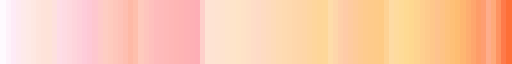

In [11]:
structure_bar2()

In [7]:
def eucliDist(A,B):
    """
    计算欧氏距离
    :param A,B:list
    """
    return math.sqrt(sum([(a - b)**2 for (a,b) in zip(A,B)]))

In [8]:
def norm_point(point=[255, 255, 255]):
    """
    对每一个像素点进行归一化，若亮度过低则除以255
    """
    max_channel = max(point)
    if point[0]>50:
        for idx, p in enumerate(point):
            point[idx] = float(p)/max_channel
    else:
        for idx, p in enumerate(point):
            point[idx] = float(p)/255
    return point

In [9]:
def cal_min_distance_ratio(point, np_list):
    """
    计算点point在np_list中离得最近的点，返回位置(0-1)以及色条上的像素点
    :param np_list:色条上的点
    :param point:采样点，格式是归一化[0.6, 0.2, 0.2]
    :return:[黄度值(一位小数)、对应的色条点、最小的距离]
    """
    ecu_list = []
    for p in np_list:
        ecu_list.append(eucliDist(p, point))
    nearest_distance = min(ecu_list)
    idx = ecu_list.index(nearest_distance)
    ratio = idx/len(ecu_list)
    ratio = ratio * 10
    
    return round(ratio, 1), list(np_list[idx]), nearest_distance

In [19]:
def mean_value(arr):
    """ 
    计算非零像素点每个通道的均值
    :param arr:图片某一行的像素，每个像素点都是三维通道
    """
    exist = (arr != 0)
    return arr.sum()/exist.sum()
    
    
def sample_pixel(img, np_list, distance_threshold=0.03):
    """
    1、在舌苔图片上随机选取一千个(R+G+B)>50的点
    2、筛选色条附近的点，并计算其在色条上的位置，只保留距离小于阈值的点
    3、选取在色条上前30%的点的平均值作为采样点
    :param img:舌象分割后的舌苔图片
    :param np_list:色条列表(归一化后的像素)
    :param threshold:离色条的距离阈值
    :return :归一化后的采样点
    """
    # 1、随机选取1000个(R+G+B)>100的点
    points = img.reshape(-1, 3)
    points = points[[np.sum(points[i])>100 and points[i][2]>20 for i in range(points.shape[0])], :]
    points = points[np.random.choice(points.shape[0], size=100, replace=True), :]
    
    # 2、筛选色条附近的点，并计算其在色条上的位置，只保留距离小于阈值的点
    points = points.astype(np.float32)
    points = points[:,::-1]
    points_norm = np.apply_along_axis(norm_point, 1, points)
    points_info = np.apply_along_axis(cal_min_distance_ratio, 1, points_norm, np_list)
    # 筛选小于阈值的点
    points = points[[points_info[i][2]<distance_threshold for i in range(points.shape[0])], :]
    points_info = points_info[[points_info[i][2]<distance_threshold for i in range(points_info.shape[0])], :]
    
    # 3、选取在色条上前30%的点的平均值作为采样点
    ratios = points_info[:, 0]
    arr_index = ratios.argsort()
    points = points[arr_index][int(points.shape[0]*0.6):int(points.shape[0]*1), :]
    sample = np.mean(points, axis=0)
    
    return sample

# 单点测试色条

In [20]:
def point_test(point):
    """
    依次调用上述函数，完成单点量化
    """

    # 对采样点进行归一化处理
    if point[0]>10:
        sample_point = norm_point(point)
    else:
        sample_point = point
    # print(sample_point[0]*255, sample_point[1]*255, sample_point[2]*255)
    # 获取色条
    cm = structure_bar()
    # 获取色条值
    np_list = get_colorbar_list(cm)
    # 量化,返回量化值和具体的归一化后的像素值
    rat, pixel, nearest_distance = cal_min_distance_ratio(sample_point, np_list)
    # print(rat, pixel)
    
    return rat, pixel
point_test([197, 182, 177])

(0.5, [0.99609375, 0.91796875, 0.9028303872053872])

# 量化全流程

In [21]:
def coated_tongue_color_quantization(img_root):
    """
    依次调用相关函数，完成苔色量化
    """
    # 获取色条
    cm = structure_bar()
    # 获取色条值
    np_list = get_colorbar_list(cm)
    
    # 获取舌苔图片
    img = seg(img_root)
    # 获取采样点
    sample_point = sample_pixel(img, np_list)
    sample_point = list(sample_point)
    print(sample_point)
    
    # 输出在色条上的位置
    rat, pixel, nearest_distance = cal_min_distance_ratio(sample_point, np_list)
    # print(rat, pixel)
    
    # 对输出值做范围限定，防止过大或国小
    if rat <= 0.1:
        rat = 0.1
        
    return rat, pixel

In [22]:
# coated_tongue_color_quantization(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data2all\category\0\20220508083039-1.png')
t1 = time()
rat, pixel = coated_tongue_color_quantization(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data2all\category\3\20220510145856-1.png')
print(rat)
print(time()-t1)

[1.0, 0.724409, 0.5405671]
8.6
1.1239383220672607


In [20]:
root = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data1&data2\category'
lst = []
pred_labels = []
true_labels = []
for i in os.listdir(root):
    lst.append([])
    for img in tqdm(os.listdir(os.path.join(root, i))):
        img_root = os.path.join(root, i, img)
        info = coated_tongue_color_quantization(img_root)
        print(i, info, img)
        lst[int(i)].append(info[0])
        
        # 用于输出报告
        true_labels.append(int(i))
        if info[0]<3:
            temp_label = 0
        elif 3<=info[0]<5.5:
            temp_label = 1
        elif 5.5<= info[0]<8:
            temp_label = 2
        elif 8<= info[0]:
            temp_label = 3
        
        pred_labels.append(temp_label)
print(classification_report(true_labels, pred_labels))
for i in lst:
    print(mean(i))

  0%|                                                                                 | 1/1851 [00:00<23:13,  1.33it/s]

[1.0, 0.7094866, 0.6944646]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1001.png


  0%|                                                                                 | 2/1851 [00:01<27:01,  1.14it/s]

[1.0, 0.66449744, 0.5224522]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 1002.png


  0%|▏                                                                                | 3/1851 [00:02<28:21,  1.09it/s]

[1.0, 0.88934535, 0.89933515]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 1003.png


  0%|▏                                                                                | 4/1851 [00:03<27:16,  1.13it/s]

[1.0, 0.68640035, 0.71290016]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 1004.png


  0%|▏                                                                                | 5/1851 [00:04<26:42,  1.15it/s]

[1.0, 0.7859792, 0.85195714]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 1006.png


  0%|▎                                                                                | 6/1851 [00:05<32:19,  1.05s/it]

[1.0, 0.7579286, 0.73542774]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1009.png


  0%|▎                                                                                | 7/1851 [00:06<31:34,  1.03s/it]

[1.0, 0.5796527, 0.4510646]
0 (9.4, [0.99609375, 0.6197916666666671, 0.4477982954545464]) 1010.png


  0%|▎                                                                                | 8/1851 [00:07<33:08,  1.08s/it]

[1.0, 0.75435877, 0.78474325]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 1011.png


  0%|▍                                                                                | 9/1851 [00:09<34:46,  1.13s/it]

[1.0, 0.76754624, 0.6706172]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 1012.png


  1%|▍                                                                               | 10/1851 [00:10<37:44,  1.23s/it]

[1.0, 0.70824707, 0.6977486]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1017.png


  1%|▍                                                                               | 11/1851 [00:11<35:51,  1.17s/it]

[1.0, 0.67260844, 0.5762032]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 1018.png


  1%|▌                                                                               | 12/1851 [00:12<33:37,  1.10s/it]

[1.0, 0.6564103, 0.5692308]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 1020.png


  1%|▌                                                                               | 13/1851 [00:14<38:21,  1.25s/it]

[1.0, 0.7066581, 0.764052]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 1022.png


  1%|▌                                                                               | 14/1851 [00:15<38:09,  1.25s/it]

[1.0, 0.7373946, 0.72020847]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1024.png


  1%|▋                                                                               | 15/1851 [00:17<41:45,  1.36s/it]

[1.0, 0.7293026, 0.73089576]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1026.png


  1%|▋                                                                               | 16/1851 [00:18<40:37,  1.33s/it]

[1.0, 0.72259086, 0.7298012]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1029.png


  1%|▋                                                                               | 17/1851 [00:19<39:52,  1.30s/it]

[1.0, 0.7930433, 0.75995404]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 103.png


  1%|▊                                                                               | 18/1851 [00:20<40:09,  1.31s/it]

[1.0, 0.70239365, 0.720261]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1031.png


  1%|▊                                                                               | 19/1851 [00:22<40:28,  1.33s/it]

[1.0, 0.7023422, 0.73260754]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1034.png


  1%|▊                                                                               | 20/1851 [00:23<44:12,  1.45s/it]

[1.0, 0.85101026, 0.8559287]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 1038.png


  1%|▉                                                                               | 21/1851 [00:25<48:15,  1.58s/it]

[1.0, 0.7221266, 0.658954]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 1039.png


  1%|▉                                                                               | 22/1851 [00:27<50:17,  1.65s/it]

[1.0, 0.8209428, 0.88920194]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 1040.png


  1%|▉                                                                               | 23/1851 [00:29<51:47,  1.70s/it]

[1.0, 0.7959711, 0.7936335]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 1042.png


  1%|█                                                                               | 24/1851 [00:30<47:38,  1.56s/it]

[1.0, 0.71259725, 0.7078532]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1045.png


  1%|█                                                                               | 25/1851 [00:32<47:22,  1.56s/it]

[1.0, 0.6604254, 0.4762812]
0 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 1047.png


  1%|█                                                                               | 26/1851 [00:33<44:01,  1.45s/it]

[1.0, 0.7959709, 0.7659057]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 1049.png


  1%|█▏                                                                              | 27/1851 [00:34<39:14,  1.29s/it]

[1.0, 0.7069741, 0.70313036]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 106.png


  2%|█▏                                                                              | 28/1851 [00:35<36:18,  1.19s/it]

[1.0, 0.7405078, 0.72843516]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1072.png


  2%|█▎                                                                              | 29/1851 [00:36<36:22,  1.20s/it]

[1.0, 0.7615943, 0.7415742]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1073.png


  2%|█▎                                                                              | 30/1851 [00:37<35:01,  1.15s/it]

[1.0, 0.7519949, 0.7365459]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1074.png


  2%|█▎                                                                              | 31/1851 [00:38<34:55,  1.15s/it]

[1.0, 0.7214947, 0.71501064]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1075.png


  2%|█▍                                                                              | 32/1851 [00:39<33:31,  1.11s/it]

[1.0, 0.69186467, 0.70604014]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 1076.png


  2%|█▍                                                                              | 33/1851 [00:40<32:47,  1.08s/it]

[1.0, 0.7101573, 0.69609123]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1077.png


  2%|█▍                                                                              | 34/1851 [00:41<31:27,  1.04s/it]

[1.0, 0.70546126, 0.6935637]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1078.png


  2%|█▌                                                                              | 35/1851 [00:42<31:03,  1.03s/it]

[1.0, 0.7175956, 0.70877254]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1079.png


  2%|█▌                                                                              | 36/1851 [00:44<40:50,  1.35s/it]

[1.0, 0.667893, 0.5611602]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 108.png


  2%|█▌                                                                              | 37/1851 [00:45<37:37,  1.24s/it]

[1.0, 0.71080315, 0.68785393]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1081.png


  2%|█▋                                                                              | 38/1851 [00:46<35:37,  1.18s/it]

[1.0, 0.7022841, 0.6911033]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1082.png


  2%|█▋                                                                              | 39/1851 [00:48<36:50,  1.22s/it]

[1.0, 0.7367818, 0.7035602]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 1083.png


  2%|█▋                                                                              | 40/1851 [00:49<36:31,  1.21s/it]

[1.0, 0.7349259, 0.72853106]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1084.png


  2%|█▊                                                                              | 41/1851 [00:50<33:56,  1.13s/it]

[1.0, 0.7160763, 0.7057458]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1085.png


  2%|█▊                                                                              | 42/1851 [00:51<32:09,  1.07s/it]

[1.0, 0.7311443, 0.7204518]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1086.png


  2%|█▊                                                                              | 43/1851 [00:52<31:01,  1.03s/it]

[1.0, 0.74153376, 0.73205537]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 1087.png


  2%|█▉                                                                              | 44/1851 [00:53<30:45,  1.02s/it]

[1.0, 0.71907353, 0.7040901]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1088.png


  2%|█▉                                                                              | 45/1851 [00:54<31:05,  1.03s/it]

[1.0, 0.7130014, 0.7105541]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1089.png


  2%|█▉                                                                              | 46/1851 [00:55<32:35,  1.08s/it]

[1.0, 0.72601223, 0.72087497]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1090.png


  3%|██                                                                              | 47/1851 [00:56<32:38,  1.09s/it]

[1.0, 0.70496935, 0.68989027]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1091.png


  3%|██                                                                              | 48/1851 [00:57<33:12,  1.11s/it]

[1.0, 0.7307201, 0.7153444]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1092.png


  3%|██                                                                              | 49/1851 [00:58<32:46,  1.09s/it]

[1.0, 0.7560651, 0.71054405]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 1093.png


  3%|██▏                                                                             | 50/1851 [00:59<31:52,  1.06s/it]

[1.0, 0.7298823, 0.7284775]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1094.png


  3%|██▏                                                                             | 51/1851 [01:01<34:22,  1.15s/it]

[1.0, 0.72788036, 0.71802247]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1095.png


  3%|██▏                                                                             | 52/1851 [01:02<34:24,  1.15s/it]

[1.0, 0.7416031, 0.7162439]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1096.png


  3%|██▎                                                                             | 53/1851 [01:03<33:22,  1.11s/it]

[1.0, 0.7017414, 0.7132028]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1097.png


  3%|██▎                                                                             | 54/1851 [01:04<31:42,  1.06s/it]

[1.0, 0.74823123, 0.73609805]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1098.png


  3%|██▍                                                                             | 55/1851 [01:05<32:12,  1.08s/it]

[1.0, 0.71960205, 0.71709687]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1099.png


  3%|██▍                                                                             | 56/1851 [01:08<50:18,  1.68s/it]

[1.0, 0.68393093, 0.7033045]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 110.png


  3%|██▍                                                                             | 57/1851 [01:09<45:11,  1.51s/it]

[1.0, 0.7386003, 0.7018721]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 1101.png


  3%|██▌                                                                             | 58/1851 [01:10<39:25,  1.32s/it]

[1.0, 0.71886873, 0.71049094]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1102.png


  3%|██▌                                                                             | 59/1851 [01:11<36:25,  1.22s/it]

[1.0, 0.7108472, 0.6917496]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1103.png


  3%|██▌                                                                             | 60/1851 [01:12<34:48,  1.17s/it]

[1.0, 0.7036474, 0.7078098]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1104.png


  3%|██▋                                                                             | 61/1851 [01:13<34:34,  1.16s/it]

[1.0, 0.713099, 0.69632524]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1105.png


  3%|██▋                                                                             | 62/1851 [01:14<34:45,  1.17s/it]

[1.0, 0.73424536, 0.71661216]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1106.png


  3%|██▋                                                                             | 63/1851 [01:15<34:15,  1.15s/it]

[1.0, 0.72872704, 0.7209501]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1107.png


  3%|██▊                                                                             | 64/1851 [01:16<33:23,  1.12s/it]

[1.0, 0.71753925, 0.70850945]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1108.png


  4%|██▊                                                                             | 65/1851 [01:17<32:13,  1.08s/it]

[1.0, 0.7165243, 0.7139462]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1109.png


  4%|██▊                                                                             | 66/1851 [01:18<31:02,  1.04s/it]

[1.0, 0.71530664, 0.7097535]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1110.png


  4%|██▉                                                                             | 67/1851 [01:19<31:26,  1.06s/it]

[1.0, 0.7473746, 0.72484595]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1111.png


  4%|██▉                                                                             | 68/1851 [01:20<30:42,  1.03s/it]

[1.0, 0.7208378, 0.7248903]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1112.png


  4%|██▉                                                                             | 69/1851 [01:22<31:10,  1.05s/it]

[1.0, 0.71620774, 0.7045008]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1113.png


  4%|███                                                                             | 70/1851 [01:23<30:57,  1.04s/it]

[1.0, 0.73846954, 0.73380494]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 1115.png


  4%|███                                                                             | 71/1851 [01:24<30:38,  1.03s/it]

[1.0, 0.70539534, 0.70483965]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1116.png


  4%|███                                                                             | 72/1851 [01:25<30:07,  1.02s/it]

[1.0, 0.7167273, 0.7147415]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1117.png


  4%|███▏                                                                            | 73/1851 [01:25<28:28,  1.04it/s]

[1.0, 0.7149291, 0.7062607]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1118.png


  4%|███▏                                                                            | 74/1851 [01:26<27:36,  1.07it/s]

[1.0, 0.734008, 0.73369193]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1119.png


  4%|███▏                                                                            | 75/1851 [01:27<27:45,  1.07it/s]

[1.0, 0.7042886, 0.7063649]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1120.png


  4%|███▎                                                                            | 76/1851 [01:28<29:06,  1.02it/s]

[1.0, 0.7514732, 0.74175143]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1122.png


  4%|███▎                                                                            | 77/1851 [01:29<29:19,  1.01it/s]

[1.0, 0.7050465, 0.70097435]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1123.png


  4%|███▎                                                                            | 78/1851 [01:30<28:49,  1.03it/s]

[1.0, 0.7110701, 0.7166815]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1124.png


  4%|███▍                                                                            | 79/1851 [01:31<28:57,  1.02it/s]

[1.0, 0.7141377, 0.704318]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1125.png


  4%|███▍                                                                            | 80/1851 [01:32<29:27,  1.00it/s]

[1.0, 0.72839606, 0.71547025]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1126.png


  4%|███▌                                                                            | 81/1851 [01:33<30:16,  1.03s/it]

[1.0, 0.74197, 0.7363196]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 1127.png


  4%|███▌                                                                            | 82/1851 [01:34<30:19,  1.03s/it]

[1.0, 0.74722046, 0.73387945]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1128.png


  4%|███▌                                                                            | 83/1851 [01:35<29:20,  1.00it/s]

[1.0, 0.7027264, 0.6989373]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1129.png


  5%|███▋                                                                            | 84/1851 [01:36<30:23,  1.03s/it]

[1.0, 0.7423179, 0.7308435]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1130.png


  5%|███▋                                                                            | 85/1851 [01:37<28:34,  1.03it/s]

[1.0, 0.7678063, 0.7140913]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 1131.png


  5%|███▋                                                                            | 86/1851 [01:38<28:21,  1.04it/s]

[1.0, 0.7542903, 0.72708684]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 1132.png


  5%|███▊                                                                            | 87/1851 [01:39<29:36,  1.01s/it]

[1.0, 0.725137, 0.7119519]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1133.png


  5%|███▊                                                                            | 88/1851 [01:40<31:19,  1.07s/it]

[1.0, 0.75539637, 0.7365145]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1134.png


  5%|███▊                                                                            | 89/1851 [01:42<32:09,  1.10s/it]

[1.0, 0.7375724, 0.7304742]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1135.png


  5%|███▉                                                                            | 90/1851 [01:43<31:28,  1.07s/it]

[1.0, 0.72713596, 0.72166544]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1136.png


  5%|███▉                                                                            | 91/1851 [01:44<31:29,  1.07s/it]

[1.0, 0.72049636, 0.72026485]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1137.png


  5%|███▉                                                                            | 92/1851 [01:45<30:25,  1.04s/it]

[1.0, 0.70953363, 0.7006255]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1138.png


  5%|████                                                                            | 93/1851 [01:46<29:00,  1.01it/s]

[1.0, 0.72298163, 0.7201484]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1139.png


  5%|████                                                                            | 94/1851 [01:47<33:20,  1.14s/it]

[1.0, 0.77283514, 0.82424664]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 114.png


  5%|████                                                                            | 95/1851 [01:48<30:58,  1.06s/it]

[1.0, 0.68379253, 0.7137037]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 1140.png


  5%|████▏                                                                           | 96/1851 [01:49<29:18,  1.00s/it]

[1.0, 0.7009146, 0.6945691]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1141.png


  5%|████▏                                                                           | 97/1851 [01:50<30:23,  1.04s/it]

[1.0, 0.72210866, 0.71085316]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1142.png


  5%|████▏                                                                           | 98/1851 [01:51<29:58,  1.03s/it]

[1.0, 0.69475484, 0.6992355]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1143.png


  5%|████▎                                                                           | 99/1851 [01:52<29:36,  1.01s/it]

[1.0, 0.73403347, 0.7253854]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1144.png


  5%|████▎                                                                          | 100/1851 [01:53<29:07,  1.00it/s]

[1.0, 0.6830304, 0.7000404]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 1145.png


  5%|████▎                                                                          | 101/1851 [01:54<30:12,  1.04s/it]

[1.0, 0.7227013, 0.7142851]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1146.png


  6%|████▎                                                                          | 102/1851 [01:55<30:30,  1.05s/it]

[1.0, 0.7086522, 0.7032085]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1147.png


  6%|████▍                                                                          | 103/1851 [01:56<30:29,  1.05s/it]

[1.0, 0.742956, 0.72940916]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1148.png


  6%|████▍                                                                          | 104/1851 [01:57<29:48,  1.02s/it]

[1.0, 0.72479486, 0.71320355]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1149.png


  6%|████▍                                                                          | 105/1851 [01:58<32:32,  1.12s/it]

[1.0, 0.79159635, 0.7800593]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 115.png


  6%|████▌                                                                          | 106/1851 [02:00<33:27,  1.15s/it]

[1.0, 0.7594354, 0.744444]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1150.png


  6%|████▌                                                                          | 107/1851 [02:01<33:24,  1.15s/it]

[1.0, 0.7220591, 0.71406096]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1151.png


  6%|████▌                                                                          | 108/1851 [02:02<31:58,  1.10s/it]

[1.0, 0.7166234, 0.70423484]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1152.png


  6%|████▋                                                                          | 109/1851 [02:03<32:05,  1.11s/it]

[1.0, 0.74918514, 0.7295805]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1153.png


  6%|████▋                                                                          | 110/1851 [02:04<31:46,  1.09s/it]

[1.0, 0.710021, 0.7014846]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1154.png


  6%|████▋                                                                          | 111/1851 [02:05<30:47,  1.06s/it]

[1.0, 0.69758606, 0.69558805]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1155.png


  6%|████▊                                                                          | 112/1851 [02:06<30:20,  1.05s/it]

[1.0, 0.72792035, 0.7148777]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1156.png


  6%|████▊                                                                          | 113/1851 [02:07<30:40,  1.06s/it]

[1.0, 0.71376956, 0.7098432]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1157.png


  6%|████▊                                                                          | 114/1851 [02:08<29:24,  1.02s/it]

[1.0, 0.7066006, 0.6986183]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1158.png


  6%|████▉                                                                          | 115/1851 [02:09<29:27,  1.02s/it]

[1.0, 0.7425731, 0.7333324]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 1160.png


  6%|████▉                                                                          | 116/1851 [02:10<29:03,  1.01s/it]

[1.0, 0.74207956, 0.72795993]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1161.png


  6%|████▉                                                                          | 117/1851 [02:11<29:00,  1.00s/it]

[1.0, 0.74682206, 0.73323494]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1162.png


  6%|█████                                                                          | 118/1851 [02:12<28:43,  1.01it/s]

[1.0, 0.7445103, 0.7433707]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 1163.png


  6%|█████                                                                          | 119/1851 [02:13<28:24,  1.02it/s]

[1.0, 0.7306659, 0.7262515]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1164.png


  6%|█████                                                                          | 120/1851 [02:14<28:53,  1.00s/it]

[1.0, 0.7262803, 0.7310539]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1166.png


  7%|█████▏                                                                         | 121/1851 [02:15<28:55,  1.00s/it]

[1.0, 0.7572087, 0.744933]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1167.png


  7%|█████▏                                                                         | 122/1851 [02:16<29:01,  1.01s/it]

[1.0, 0.7071513, 0.70663834]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1168.png


  7%|█████▏                                                                         | 123/1851 [02:17<28:52,  1.00s/it]

[1.0, 0.7317998, 0.7131423]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1169.png


  7%|█████▎                                                                         | 124/1851 [02:18<28:51,  1.00s/it]

[1.0, 0.69437873, 0.7067058]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 1171.png


  7%|█████▎                                                                         | 125/1851 [02:19<30:28,  1.06s/it]

[1.0, 0.7270951, 0.71669537]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1172.png


  7%|█████▍                                                                         | 126/1851 [02:20<30:49,  1.07s/it]

[1.0, 0.7112507, 0.709005]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1173.png


  7%|█████▍                                                                         | 127/1851 [02:21<29:54,  1.04s/it]

[1.0, 0.6961345, 0.7032529]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1175.png


  7%|█████▍                                                                         | 128/1851 [02:22<28:57,  1.01s/it]

[1.0, 0.7109259, 0.7000782]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1176.png


  7%|█████▌                                                                         | 129/1851 [02:23<29:08,  1.02s/it]

[1.0, 0.75705695, 0.7430301]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1177.png


  7%|█████▌                                                                         | 130/1851 [02:24<28:55,  1.01s/it]

[1.0, 0.72976714, 0.72471285]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1178.png


  7%|█████▌                                                                         | 131/1851 [02:26<34:32,  1.20s/it]

[1.0, 0.7478623, 0.74599445]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 118.png


  7%|█████▋                                                                         | 132/1851 [02:27<32:15,  1.13s/it]

[1.0, 0.7172521, 0.7099286]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1180.png


  7%|█████▋                                                                         | 133/1851 [02:28<32:04,  1.12s/it]

[1.0, 0.73989093, 0.7297661]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1181.png


  7%|█████▋                                                                         | 134/1851 [02:29<32:02,  1.12s/it]

[1.0, 0.75296503, 0.738647]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1182.png


  7%|█████▊                                                                         | 135/1851 [02:30<30:38,  1.07s/it]

[1.0, 0.7090831, 0.69560724]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1183.png


  7%|█████▊                                                                         | 136/1851 [02:31<30:27,  1.07s/it]

[1.0, 0.7676888, 0.7539255]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 1184.png


  7%|█████▊                                                                         | 137/1851 [02:32<28:24,  1.01it/s]

[1.0, 0.7100044, 0.70436144]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1187.png


  7%|█████▉                                                                         | 138/1851 [02:33<29:24,  1.03s/it]

[1.0, 0.74007183, 0.7277926]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1188.png


  8%|█████▉                                                                         | 139/1851 [02:34<29:13,  1.02s/it]

[1.0, 0.7151588, 0.6972901]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1189.png


  8%|█████▉                                                                         | 140/1851 [02:35<30:12,  1.06s/it]

[1.0, 0.7126962, 0.7130806]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1190.png


  8%|██████                                                                         | 141/1851 [02:36<29:47,  1.05s/it]

[1.0, 0.70746595, 0.69749385]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1192.png


  8%|██████                                                                         | 142/1851 [02:37<30:16,  1.06s/it]

[1.0, 0.759401, 0.72030073]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 1193.png


  8%|██████                                                                         | 143/1851 [02:38<29:39,  1.04s/it]

[1.0, 0.7633592, 0.7282521]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 1194.png


  8%|██████▏                                                                        | 144/1851 [02:39<30:03,  1.06s/it]

[1.0, 0.73720235, 0.7151349]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1195.png


  8%|██████▏                                                                        | 145/1851 [02:40<29:28,  1.04s/it]

[1.0, 0.70989704, 0.70533043]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1197.png


  8%|██████▏                                                                        | 146/1851 [02:41<29:37,  1.04s/it]

[1.0, 0.712723, 0.69411534]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1198.png


  8%|██████▎                                                                        | 147/1851 [02:42<29:33,  1.04s/it]

[1.0, 0.71064746, 0.6852073]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1199.png


  8%|██████▎                                                                        | 148/1851 [02:44<37:29,  1.32s/it]

[1.0, 0.7713681, 0.7879398]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 120.png


  8%|██████▎                                                                        | 149/1851 [02:46<36:31,  1.29s/it]

[1.0, 0.7710927, 0.6998782]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 1200.png


  8%|██████▍                                                                        | 150/1851 [02:47<35:49,  1.26s/it]

[1.0, 0.76317585, 0.73608124]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1201.png


  8%|██████▍                                                                        | 151/1851 [02:48<33:11,  1.17s/it]

[1.0, 0.7167654, 0.7113312]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1202.png


  8%|██████▍                                                                        | 152/1851 [02:49<33:33,  1.18s/it]

[1.0, 0.7306925, 0.72309965]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1204.png


  8%|██████▌                                                                        | 153/1851 [02:50<32:30,  1.15s/it]

[1.0, 0.7157755, 0.7162302]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1205.png


  8%|██████▌                                                                        | 154/1851 [02:51<30:18,  1.07s/it]

[1.0, 0.7035627, 0.6946923]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1206.png


  8%|██████▌                                                                        | 155/1851 [02:52<29:50,  1.06s/it]

[1.0, 0.7496768, 0.72374827]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 1207.png


  8%|██████▋                                                                        | 156/1851 [02:53<30:41,  1.09s/it]

[1.0, 0.73763704, 0.7225579]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1208.png


  8%|██████▋                                                                        | 157/1851 [02:54<29:41,  1.05s/it]

[1.0, 0.7513163, 0.72164387]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 1210.png


  9%|██████▋                                                                        | 158/1851 [02:55<28:10,  1.00it/s]

[1.0, 0.74294734, 0.7239853]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1211.png


  9%|██████▊                                                                        | 159/1851 [02:56<27:55,  1.01it/s]

[1.0, 0.74831593, 0.7170394]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 1212.png


  9%|██████▊                                                                        | 160/1851 [02:57<28:19,  1.00s/it]

[1.0, 0.71922296, 0.7210432]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1213.png


  9%|██████▊                                                                        | 161/1851 [02:58<27:14,  1.03it/s]

[1.0, 0.75011855, 0.7387169]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1214.png


  9%|██████▉                                                                        | 162/1851 [02:59<26:16,  1.07it/s]

[1.0, 0.7134865, 0.70066285]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1216.png


  9%|██████▉                                                                        | 163/1851 [03:00<26:10,  1.07it/s]

[1.0, 0.73057956, 0.70748097]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1217.png


  9%|██████▉                                                                        | 164/1851 [03:01<28:25,  1.01s/it]

[1.0, 0.7516684, 0.7334566]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1219.png


  9%|███████                                                                        | 165/1851 [03:02<27:29,  1.02it/s]

[1.0, 0.7374045, 0.73726445]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 122.png


  9%|███████                                                                        | 166/1851 [03:03<28:31,  1.02s/it]

[1.0, 0.72891986, 0.71267235]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1220.png


  9%|███████▏                                                                       | 167/1851 [03:04<28:15,  1.01s/it]

[1.0, 0.73502463, 0.7203924]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1221.png


  9%|███████▏                                                                       | 168/1851 [03:05<28:28,  1.02s/it]

[1.0, 0.7235024, 0.7137722]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1222.png


  9%|███████▏                                                                       | 169/1851 [03:06<27:49,  1.01it/s]

[1.0, 0.7132585, 0.7070973]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1224.png


  9%|███████▎                                                                       | 170/1851 [03:07<28:31,  1.02s/it]

[1.0, 0.7022379, 0.7032854]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1225.png


  9%|███████▎                                                                       | 171/1851 [03:08<28:32,  1.02s/it]

[1.0, 0.7327657, 0.71847886]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1226.png


  9%|███████▎                                                                       | 172/1851 [03:09<27:42,  1.01it/s]

[1.0, 0.75142705, 0.7356289]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1227.png


  9%|███████▍                                                                       | 173/1851 [03:10<28:43,  1.03s/it]

[1.0, 0.69447935, 0.7047292]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 1228.png


  9%|███████▍                                                                       | 174/1851 [03:11<28:40,  1.03s/it]

[1.0, 0.7091199, 0.7076669]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1229.png


  9%|███████▍                                                                       | 175/1851 [03:12<29:50,  1.07s/it]

[1.0, 0.75798035, 0.73238915]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1230.png


 10%|███████▌                                                                       | 176/1851 [03:13<29:19,  1.05s/it]

[1.0, 0.72880447, 0.721709]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1231.png


 10%|███████▌                                                                       | 177/1851 [03:14<29:27,  1.06s/it]

[1.0, 0.72263145, 0.7330794]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1232.png


 10%|███████▌                                                                       | 178/1851 [03:15<29:08,  1.05s/it]

[1.0, 0.73007905, 0.72338027]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1233.png


 10%|███████▋                                                                       | 179/1851 [03:16<28:36,  1.03s/it]

[1.0, 0.72686756, 0.7153463]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1234.png


 10%|███████▋                                                                       | 180/1851 [03:17<27:37,  1.01it/s]

[1.0, 0.7311688, 0.72197855]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1235.png


 10%|███████▋                                                                       | 181/1851 [03:18<28:30,  1.02s/it]

[1.0, 0.75082725, 0.7290623]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1236.png


 10%|███████▊                                                                       | 182/1851 [03:19<28:23,  1.02s/it]

[1.0, 0.716001, 0.6968901]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1237.png


 10%|███████▊                                                                       | 183/1851 [03:20<27:55,  1.00s/it]

[1.0, 0.72261274, 0.7070182]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1239.png


 10%|███████▊                                                                       | 184/1851 [03:22<31:42,  1.14s/it]

[1.0, 0.75460565, 0.7212387]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 124.png


 10%|███████▉                                                                       | 185/1851 [03:23<30:56,  1.11s/it]

[1.0, 0.7559738, 0.7408094]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1240.png


 10%|███████▉                                                                       | 186/1851 [03:24<30:23,  1.10s/it]

[1.0, 0.71820354, 0.70499635]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1241.png


 10%|███████▉                                                                       | 187/1851 [03:25<30:00,  1.08s/it]

[1.0, 0.7205719, 0.71162283]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1242.png


 10%|████████                                                                       | 188/1851 [03:26<31:08,  1.12s/it]

[1.0, 0.74412805, 0.72788715]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1243.png


 10%|████████                                                                       | 189/1851 [03:27<31:08,  1.12s/it]

[1.0, 0.7088024, 0.69850534]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1244.png


 10%|████████                                                                       | 190/1851 [03:28<30:26,  1.10s/it]

[1.0, 0.7287539, 0.7080669]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1246.png


 10%|████████▏                                                                      | 191/1851 [03:29<29:28,  1.07s/it]

[1.0, 0.71451914, 0.70571727]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1247.png


 10%|████████▏                                                                      | 192/1851 [03:30<28:32,  1.03s/it]

[1.0, 0.7336625, 0.68626153]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 1248.png


 10%|████████▏                                                                      | 193/1851 [03:31<28:57,  1.05s/it]

[1.0, 0.7109172, 0.6988252]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1250.png


 10%|████████▎                                                                      | 194/1851 [03:32<28:20,  1.03s/it]

[1.0, 0.7634218, 0.74233717]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1251.png


 11%|████████▎                                                                      | 195/1851 [03:33<27:23,  1.01it/s]

[1.0, 0.7437585, 0.6762164]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 1252.png


 11%|████████▎                                                                      | 196/1851 [03:34<27:08,  1.02it/s]

[1.0, 0.73541945, 0.710236]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1253.png


 11%|████████▍                                                                      | 197/1851 [03:35<26:49,  1.03it/s]

[1.0, 0.7329355, 0.71356314]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 1254.png


 11%|████████▍                                                                      | 198/1851 [03:36<27:58,  1.02s/it]

[1.0, 0.7127306, 0.6989361]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1255.png


 11%|████████▍                                                                      | 199/1851 [03:37<29:33,  1.07s/it]

[1.0, 0.71438634, 0.6977834]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1256.png


 11%|████████▌                                                                      | 200/1851 [03:39<31:22,  1.14s/it]

[1.0, 0.7560386, 0.71801764]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 1257.png


 11%|████████▌                                                                      | 201/1851 [03:40<30:13,  1.10s/it]

[1.0, 0.72955185, 0.68952334]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 1259.png


 11%|████████▌                                                                      | 202/1851 [03:42<36:59,  1.35s/it]

[1.0, 0.79719645, 0.77565414]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 126.png


 11%|████████▋                                                                      | 203/1851 [03:43<33:54,  1.23s/it]

[1.0, 0.7413688, 0.7044624]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 1260.png


 11%|████████▋                                                                      | 204/1851 [03:44<32:26,  1.18s/it]

[1.0, 0.7084622, 0.7021478]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1261.png


 11%|████████▋                                                                      | 205/1851 [03:45<31:33,  1.15s/it]

[1.0, 0.7158098, 0.69645447]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1262.png


 11%|████████▊                                                                      | 206/1851 [03:46<31:54,  1.16s/it]

[1.0, 0.7361942, 0.7245052]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 1264.png


 11%|████████▊                                                                      | 207/1851 [03:47<32:33,  1.19s/it]

[1.0, 0.73572505, 0.7209558]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1266.png


 11%|████████▉                                                                      | 208/1851 [03:48<30:45,  1.12s/it]

[1.0, 0.708304, 0.69858694]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 1267.png


 11%|████████▉                                                                      | 209/1851 [03:49<29:57,  1.09s/it]

[1.0, 0.7138145, 0.700414]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 1268.png


 11%|████████▉                                                                      | 210/1851 [03:50<28:10,  1.03s/it]

[1.0, 0.7281648, 0.7236414]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 1269.png


 11%|█████████                                                                      | 211/1851 [03:51<28:26,  1.04s/it]

[1.0, 0.7579856, 0.73365647]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 1270.png


 11%|█████████                                                                      | 212/1851 [03:53<33:56,  1.24s/it]

[1.0, 0.82756716, 0.89124805]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 128.png


 12%|█████████                                                                      | 213/1851 [03:55<39:28,  1.45s/it]

[1.0, 0.7970257, 0.82622606]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 129.png


 12%|█████████▏                                                                     | 214/1851 [03:57<44:47,  1.64s/it]

[1.0, 0.712353, 0.7160812]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 130.png


 12%|█████████▏                                                                     | 215/1851 [03:59<50:55,  1.87s/it]

[1.0, 0.7867121, 0.75781155]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 132.png


 12%|█████████▏                                                                     | 216/1851 [04:01<47:14,  1.73s/it]

[1.0, 0.7552963, 0.7219274]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 135.png


 12%|█████████▎                                                                     | 217/1851 [04:03<48:59,  1.80s/it]

[1.0, 0.8177305, 0.82124466]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 136.png


 12%|█████████▎                                                                     | 218/1851 [04:05<51:46,  1.90s/it]

[1.0, 0.76553065, 0.80265915]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 140.png


 12%|█████████▎                                                                     | 219/1851 [04:07<52:47,  1.94s/it]

[1.0, 0.74538237, 0.74055123]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 142.png


 12%|█████████▍                                                                     | 220/1851 [04:08<47:21,  1.74s/it]

[1.0, 0.79081285, 0.75633633]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 143.png


 12%|█████████▍                                                                     | 221/1851 [04:10<51:01,  1.88s/it]

[1.0, 0.6841006, 0.7069602]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 144.png


 12%|█████████▍                                                                     | 222/1851 [04:12<49:42,  1.83s/it]

[1.0, 0.7332423, 0.7160536]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 148.png


 12%|█████████▌                                                                     | 223/1851 [04:13<43:56,  1.62s/it]

[1.0, 0.70444375, 0.69604266]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 153.png


 12%|█████████▌                                                                     | 224/1851 [04:14<40:28,  1.49s/it]

[1.0, 0.7058493, 0.7102352]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 154.png


 12%|█████████▌                                                                     | 225/1851 [04:15<34:51,  1.29s/it]

[1.0, 0.7018877, 0.7090738]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 1547.png


 12%|█████████▋                                                                     | 226/1851 [04:17<36:16,  1.34s/it]

[1.0, 0.73764527, 0.74688566]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 156.png


 12%|█████████▋                                                                     | 227/1851 [04:18<38:27,  1.42s/it]

[1.0, 0.7118376, 0.7055434]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 157.png


 12%|█████████▋                                                                     | 228/1851 [04:19<35:14,  1.30s/it]

[1.0, 0.69765025, 0.7591698]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 159.png


 12%|█████████▊                                                                     | 229/1851 [04:21<41:45,  1.54s/it]

[1.0, 0.8089493, 0.80509657]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 161.png


 12%|█████████▊                                                                     | 230/1851 [04:22<36:51,  1.36s/it]

[1.0, 0.7494506, 0.7460765]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 163.png


 12%|█████████▊                                                                     | 231/1851 [04:23<35:09,  1.30s/it]

[1.0, 0.81913066, 0.78232855]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 166.png


 13%|█████████▉                                                                     | 232/1851 [04:24<33:41,  1.25s/it]

[1.0, 0.8002387, 0.7760114]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 172.png


 13%|█████████▉                                                                     | 233/1851 [04:26<34:26,  1.28s/it]

[1.0, 0.82043445, 0.85107243]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 173.png


 13%|█████████▉                                                                     | 234/1851 [04:27<33:56,  1.26s/it]

[1.0, 0.7447595, 0.7740118]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 174.png


 13%|██████████                                                                     | 235/1851 [04:28<33:39,  1.25s/it]

[1.0, 0.7637199, 0.7953676]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 175.png


 13%|██████████                                                                     | 236/1851 [04:29<31:35,  1.17s/it]

[1.0, 0.84559625, 0.88180226]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 178.png


 13%|██████████                                                                     | 237/1851 [04:30<31:44,  1.18s/it]

[1.0, 0.7337355, 0.6948006]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 182.png


 13%|██████████▏                                                                    | 238/1851 [04:32<36:21,  1.35s/it]

[1.0, 0.77853376, 0.8140555]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 184.png


 13%|██████████▏                                                                    | 239/1851 [04:34<38:56,  1.45s/it]

[1.0, 0.7348649, 0.7940468]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 185.png


 13%|██████████▏                                                                    | 240/1851 [04:35<36:00,  1.34s/it]

[1.0, 0.7192524, 0.7124553]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 187.png


 13%|██████████▎                                                                    | 241/1851 [04:37<38:28,  1.43s/it]

[1.0, 0.7546921, 0.7658579]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 188.png


 13%|██████████▎                                                                    | 242/1851 [04:38<36:12,  1.35s/it]

[1.0, 0.75658333, 0.7481446]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 190.png


 13%|██████████▎                                                                    | 243/1851 [04:39<38:18,  1.43s/it]

[1.0, 0.7446712, 0.7654207]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 193.png


 13%|██████████▍                                                                    | 244/1851 [04:41<37:45,  1.41s/it]

[1.0, 0.83378077, 0.8712657]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 194.png


 13%|██████████▍                                                                    | 245/1851 [04:43<44:30,  1.66s/it]

[1.0, 0.68373245, 0.71818763]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 195.png


 13%|██████████▍                                                                    | 246/1851 [04:44<41:56,  1.57s/it]

[1.0, 0.7325225, 0.7190485]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 196.png


 13%|██████████▌                                                                    | 247/1851 [04:48<56:45,  2.12s/it]

[1.0, 0.68664867, 0.5790831]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 199.png


 13%|██████████▌                                                                    | 248/1851 [04:49<49:33,  1.85s/it]

[1.0, 0.7822143, 0.8029285]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20.png


 13%|██████████▋                                                                    | 249/1851 [04:50<42:56,  1.61s/it]

[1.0, 0.71099895, 0.7108825]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220508081924-1.png


 14%|██████████▋                                                                    | 250/1851 [04:51<38:17,  1.43s/it]

[1.0, 0.84717566, 0.86988616]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220508083039-1.png


 14%|██████████▋                                                                    | 251/1851 [04:52<36:30,  1.37s/it]

[1.0, 0.70500475, 0.71962917]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220508083452-1.png


 14%|██████████▊                                                                    | 252/1851 [04:54<38:24,  1.44s/it]

[1.0, 0.77976644, 0.8096029]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220508084834-1.png


 14%|██████████▊                                                                    | 253/1851 [04:55<37:56,  1.42s/it]

[1.0, 0.7562246, 0.784109]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220508090406-1.png


 14%|██████████▊                                                                    | 254/1851 [04:56<35:07,  1.32s/it]

[1.0, 0.77284646, 0.7633624]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220508092230-1.png


 14%|██████████▉                                                                    | 255/1851 [04:58<37:42,  1.42s/it]

[1.0, 0.6969806, 0.71220404]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220508093841-1.png


 14%|██████████▉                                                                    | 256/1851 [04:59<34:33,  1.30s/it]

[1.0, 0.7272668, 0.74531156]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220508094045-1.png


 14%|██████████▉                                                                    | 257/1851 [05:00<31:09,  1.17s/it]

[1.0, 0.831475, 0.8315571]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220508102258-1.png


 14%|███████████                                                                    | 258/1851 [05:01<31:17,  1.18s/it]

[1.0, 0.7631354, 0.70646864]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220508103538-1.png


 14%|███████████                                                                    | 259/1851 [05:02<32:16,  1.22s/it]

[1.0, 0.70804054, 0.7062828]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220508130943-1.png


 14%|███████████                                                                    | 260/1851 [05:04<33:04,  1.25s/it]

[1.0, 0.779591, 0.8272868]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220508162203-1.png


 14%|███████████▏                                                                   | 261/1851 [05:05<33:12,  1.25s/it]

[1.0, 0.7792588, 0.77147144]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220509081413-1.png


 14%|███████████▏                                                                   | 262/1851 [05:07<36:15,  1.37s/it]

[1.0, 0.74984396, 0.74889904]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220509083257-1.png


 14%|███████████▏                                                                   | 263/1851 [05:09<43:55,  1.66s/it]

[1.0, 0.76156574, 0.7937911]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220509090338-1.png


 14%|███████████▎                                                                   | 264/1851 [05:11<45:25,  1.72s/it]

[1.0, 0.7504098, 0.79006666]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220509090829-1.png


 14%|███████████▎                                                                   | 265/1851 [05:12<44:13,  1.67s/it]

[1.0, 0.75306207, 0.75650334]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220509092037-1.png


 14%|███████████▎                                                                   | 266/1851 [05:13<38:42,  1.47s/it]

[1.0, 0.85603535, 0.9126863]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220509093008-1.png


 14%|███████████▍                                                                   | 267/1851 [05:14<33:58,  1.29s/it]

[1.0, 0.8199345, 0.8814904]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220509093029-1.png


 14%|███████████▍                                                                   | 268/1851 [05:16<36:38,  1.39s/it]

[1.0, 0.7899364, 0.7718536]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220509094537-1.png


 15%|███████████▍                                                                   | 269/1851 [05:17<32:28,  1.23s/it]

[1.0, 0.76600456, 0.7421802]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220509094624-1.png


 15%|███████████▌                                                                   | 270/1851 [05:19<38:12,  1.45s/it]

[1.0, 0.86907774, 0.8789128]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220509094753-1.png


 15%|███████████▌                                                                   | 271/1851 [05:20<39:29,  1.50s/it]

[1.0, 0.6827269, 0.72473866]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220509102112-1.png


 15%|███████████▌                                                                   | 272/1851 [05:22<44:41,  1.70s/it]

[0.99915314, 0.9309093, 0.9642344]
0 (0.2, [0.99609375, 0.9246501473063973, 0.9689604377104377]) 20220509103938-1.png


 15%|███████████▋                                                                   | 273/1851 [05:24<40:57,  1.56s/it]

[1.0, 0.7802397, 0.7658357]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220509110016-1.png


 15%|███████████▋                                                                   | 274/1851 [05:26<46:33,  1.77s/it]

[1.0, 0.7052308, 0.721749]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220509111225-1.png


 15%|███████████▋                                                                   | 275/1851 [05:27<40:59,  1.56s/it]

[1.0, 0.7796035, 0.82275146]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220509111313-1.png


 15%|███████████▊                                                                   | 276/1851 [05:29<44:33,  1.70s/it]

[1.0, 0.81372195, 0.82954764]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220509111820-1.png


 15%|███████████▊                                                                   | 277/1851 [05:30<40:02,  1.53s/it]

[1.0, 0.79804057, 0.7560412]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220509113835-1.png


 15%|███████████▊                                                                   | 278/1851 [05:32<41:31,  1.58s/it]

[1.0, 0.8248757, 0.7978063]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220509114519-1.png


 15%|███████████▉                                                                   | 279/1851 [05:33<39:51,  1.52s/it]

[1.0, 0.7586197, 0.76196563]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220509114911-1.png


 15%|███████████▉                                                                   | 280/1851 [05:35<40:35,  1.55s/it]

[1.0, 0.8032708, 0.85183555]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220509120506-1.png


 15%|███████████▉                                                                   | 281/1851 [05:36<39:39,  1.52s/it]

[1.0, 0.83091867, 0.84448576]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220509122515-1.png


 15%|████████████                                                                   | 282/1851 [05:38<37:55,  1.45s/it]

[1.0, 0.77814037, 0.836975]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220509143504-1.png


 15%|████████████                                                                   | 283/1851 [05:39<34:04,  1.30s/it]

[1.0, 0.8148514, 0.8489642]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220509145952-1.png


 15%|████████████                                                                   | 284/1851 [05:40<32:37,  1.25s/it]

[1.0, 0.8306609, 0.8395561]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220509153248-1.png


 15%|████████████▏                                                                  | 285/1851 [05:41<31:47,  1.22s/it]

[1.0, 0.83442324, 0.8698896]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220509154934-1.png


 15%|████████████▏                                                                  | 286/1851 [05:42<28:56,  1.11s/it]

[1.0, 0.76250565, 0.80165106]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220509160417-1.png


 16%|████████████▏                                                                  | 287/1851 [05:42<26:14,  1.01s/it]

[1.0, 0.7926087, 0.761497]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220509160957-1.png


 16%|████████████▎                                                                  | 288/1851 [05:43<23:14,  1.12it/s]

[1.0, 0.70116806, 0.7242001]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220509163441-1.png


 16%|████████████▎                                                                  | 289/1851 [05:44<22:06,  1.18it/s]

[1.0, 0.7442606, 0.72827816]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220509164227-1.png


 16%|████████████▍                                                                  | 290/1851 [05:45<23:16,  1.12it/s]

[1.0, 0.771245, 0.8187124]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220509170502-1.png


 16%|████████████▍                                                                  | 291/1851 [05:46<23:26,  1.11it/s]

[1.0, 0.740435, 0.74041384]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220509170533-1.png


 16%|████████████▍                                                                  | 292/1851 [05:47<24:14,  1.07it/s]

[1.0, 0.7639311, 0.79402477]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220509171723-1.png


 16%|████████████▌                                                                  | 293/1851 [05:48<25:43,  1.01it/s]

[1.0, 0.7664783, 0.746996]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220509175651-1.png


 16%|████████████▌                                                                  | 294/1851 [05:49<24:49,  1.05it/s]

[1.0, 0.84711415, 0.865963]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220509180616-1.png


 16%|████████████▌                                                                  | 295/1851 [05:50<25:49,  1.00it/s]

[1.0, 0.8848232, 0.9075983]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220509211439-1.png


 16%|████████████▋                                                                  | 296/1851 [05:51<26:32,  1.02s/it]

[1.0, 0.75579995, 0.74268]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220510092016-1.png


 16%|████████████▋                                                                  | 297/1851 [05:52<28:47,  1.11s/it]

[1.0, 0.7516242, 0.7343716]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220510092101-1.png


 16%|████████████▋                                                                  | 298/1851 [05:54<30:38,  1.18s/it]

[1.0, 0.67766905, 0.5580225]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220510094603-1.png


 16%|████████████▊                                                                  | 299/1851 [05:55<31:02,  1.20s/it]

[1.0, 0.7143975, 0.737355]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220510095803-1.png


 16%|████████████▊                                                                  | 300/1851 [05:56<31:34,  1.22s/it]

[1.0, 0.6811039, 0.71788996]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220510101639-1.png


 16%|████████████▊                                                                  | 301/1851 [05:57<30:16,  1.17s/it]

[1.0, 0.79443336, 0.81979454]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220510101746-1.png


 16%|████████████▉                                                                  | 302/1851 [05:59<34:55,  1.35s/it]

[1.0, 0.74482226, 0.7708206]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220510103835-1.png


 16%|████████████▉                                                                  | 303/1851 [06:00<35:15,  1.37s/it]

[1.0, 0.72149163, 0.723462]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220510104003-1.png


 16%|████████████▉                                                                  | 304/1851 [06:01<32:47,  1.27s/it]

[1.0, 0.7754872, 0.81010133]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220510104608-1.png


 16%|█████████████                                                                  | 305/1851 [06:03<32:14,  1.25s/it]

[1.0, 0.73085386, 0.77324146]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220510105126-1.png


 17%|█████████████                                                                  | 306/1851 [06:04<31:05,  1.21s/it]

[1.0, 0.72752076, 0.71209514]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220510105355-1.png


 17%|█████████████                                                                  | 307/1851 [06:05<33:13,  1.29s/it]

[1.0, 0.7717495, 0.75498164]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220510105649-1.png


 17%|█████████████▏                                                                 | 308/1851 [06:06<32:48,  1.28s/it]

[1.0, 0.7189046, 0.73696244]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220510110256-1.png


 17%|█████████████▏                                                                 | 309/1851 [06:08<31:33,  1.23s/it]

[1.0, 0.75849295, 0.7180975]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220510111108-1.png


 17%|█████████████▏                                                                 | 310/1851 [06:09<34:14,  1.33s/it]

[1.0, 0.79213464, 0.7816417]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220510111238-1.png


 17%|█████████████▎                                                                 | 311/1851 [06:11<40:37,  1.58s/it]

[1.0, 0.86975485, 0.9019057]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220510111811-1.png


 17%|█████████████▎                                                                 | 312/1851 [06:13<37:46,  1.47s/it]

[1.0, 0.8549885, 0.85405934]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220510112858-1.png


 17%|█████████████▎                                                                 | 313/1851 [06:14<36:09,  1.41s/it]

[1.0, 0.75632006, 0.71447855]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220510113506-1.png


 17%|█████████████▍                                                                 | 314/1851 [06:15<33:59,  1.33s/it]

[1.0, 0.745406, 0.7843449]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220510113742-1.png


 17%|█████████████▍                                                                 | 315/1851 [06:16<32:14,  1.26s/it]

[1.0, 0.7835114, 0.8225753]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220510113854-1.png


 17%|█████████████▍                                                                 | 316/1851 [06:17<32:44,  1.28s/it]

[1.0, 0.79524904, 0.7564012]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220510114720-1.png


 17%|█████████████▌                                                                 | 317/1851 [06:19<33:07,  1.30s/it]

[1.0, 0.79759926, 0.7774553]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220510115540-1.png


 17%|█████████████▌                                                                 | 318/1851 [06:20<30:12,  1.18s/it]

[1.0, 0.7117322, 0.7075385]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220510122416-1.png


 17%|█████████████▌                                                                 | 319/1851 [06:21<29:23,  1.15s/it]

[1.0, 0.8216627, 0.87759703]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220510144457-1.png


 17%|█████████████▋                                                                 | 320/1851 [06:22<27:42,  1.09s/it]

[1.0, 0.7349827, 0.74983156]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220510144853-1.png


 17%|█████████████▋                                                                 | 321/1851 [06:23<29:27,  1.16s/it]

[1.0, 0.6982683, 0.70663285]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220510145010-1.png


 17%|█████████████▋                                                                 | 322/1851 [06:24<31:04,  1.22s/it]

[1.0, 0.7754437, 0.8098558]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220510145652-1.png


 17%|█████████████▊                                                                 | 323/1851 [06:25<30:25,  1.19s/it]

[1.0, 0.7629265, 0.7109583]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220510150207-1.png


 18%|█████████████▊                                                                 | 324/1851 [06:27<30:56,  1.22s/it]

[1.0, 0.7615031, 0.75019556]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220510150318-1.png


 18%|█████████████▊                                                                 | 325/1851 [06:28<31:37,  1.24s/it]

[1.0, 0.760046, 0.8136997]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220510150621-1.png


 18%|█████████████▉                                                                 | 326/1851 [06:29<30:26,  1.20s/it]

[1.0, 0.7993357, 0.793045]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220510151052-1.png


 18%|█████████████▉                                                                 | 327/1851 [06:30<31:14,  1.23s/it]

[1.0, 0.7659066, 0.8250991]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220510184816-1.png


 18%|█████████████▉                                                                 | 328/1851 [06:31<28:22,  1.12s/it]

[1.0, 0.71224266, 0.7234742]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220510185931-1.png


 18%|██████████████                                                                 | 329/1851 [06:33<30:00,  1.18s/it]

[1.0, 0.76811004, 0.8351513]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220510190638-1.png


 18%|██████████████                                                                 | 330/1851 [06:34<31:05,  1.23s/it]

[1.0, 0.7416926, 0.7441079]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220510191233-1.png


 18%|██████████████▏                                                                | 331/1851 [06:35<30:25,  1.20s/it]

[1.0, 0.75558347, 0.7413247]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220510192842-1.png


 18%|██████████████▏                                                                | 332/1851 [06:36<29:36,  1.17s/it]

[1.0, 0.7595563, 0.7703522]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220510193525-1.png


 18%|██████████████▏                                                                | 333/1851 [06:37<28:20,  1.12s/it]

[1.0, 0.7035153, 0.71361387]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220510194133-1.png


 18%|██████████████▎                                                                | 334/1851 [06:39<31:55,  1.26s/it]

[1.0, 0.76080334, 0.7850241]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220510195101-1.png


 18%|██████████████▎                                                                | 335/1851 [06:40<31:25,  1.24s/it]

[1.0, 0.8208403, 0.8623117]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220510200451-1.png


 18%|██████████████▎                                                                | 336/1851 [06:41<29:41,  1.18s/it]

[1.0, 0.7910122, 0.8185482]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511082332-1.png


 18%|██████████████▍                                                                | 337/1851 [06:42<28:25,  1.13s/it]

[1.0, 0.82163954, 0.78682095]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220511084141-1.png


 18%|██████████████▍                                                                | 338/1851 [06:44<31:55,  1.27s/it]

[1.0, 0.72257245, 0.7315011]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220511084535-1.png


 18%|██████████████▍                                                                | 339/1851 [06:45<30:30,  1.21s/it]

[1.0, 0.7404889, 0.71284676]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220511084612-1.png


 18%|██████████████▌                                                                | 340/1851 [06:46<30:36,  1.22s/it]

[1.0, 0.77741253, 0.7625589]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511085537-1.png


 18%|██████████████▌                                                                | 341/1851 [06:47<30:49,  1.22s/it]

[1.0, 0.8321727, 0.8055931]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220511085926-1.png


 18%|██████████████▌                                                                | 342/1851 [06:48<29:56,  1.19s/it]

[1.0, 0.73886156, 0.72997737]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220511090140-1.png


 19%|██████████████▋                                                                | 343/1851 [06:50<32:00,  1.27s/it]

[1.0, 0.795284, 0.84081364]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220511090344-1.png


 19%|██████████████▋                                                                | 344/1851 [06:51<35:01,  1.39s/it]

[1.0, 0.73988974, 0.74115103]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220511090402-1.png


 19%|██████████████▋                                                                | 345/1851 [06:53<37:17,  1.49s/it]

[1.0, 0.7354271, 0.7053763]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220511090431-1.png


 19%|██████████████▊                                                                | 346/1851 [06:54<34:26,  1.37s/it]

[1.0, 0.76757693, 0.7329776]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511090612-1.png


 19%|██████████████▊                                                                | 347/1851 [06:56<33:55,  1.35s/it]

[1.0, 0.76461935, 0.73585206]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511090718-1.png


 19%|██████████████▊                                                                | 348/1851 [06:56<31:04,  1.24s/it]

[1.0, 0.7466719, 0.69294536]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220511090807-1.png


 19%|██████████████▉                                                                | 349/1851 [06:58<33:27,  1.34s/it]

[1.0, 0.7861799, 0.73205537]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220511090810-1.png


 19%|██████████████▉                                                                | 350/1851 [06:59<34:19,  1.37s/it]

[1.0, 0.77239364, 0.7154835]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220511090903-1.png


 19%|██████████████▉                                                                | 351/1851 [07:01<37:27,  1.50s/it]

[1.0, 0.7498079, 0.7073404]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220511091150-1.png


 19%|███████████████                                                                | 352/1851 [07:03<36:10,  1.45s/it]

[1.0, 0.79085094, 0.8313934]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220511091622-1.png


 19%|███████████████                                                                | 353/1851 [07:04<37:39,  1.51s/it]

[1.0, 0.84119904, 0.8562987]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220511091744-1.png


 19%|███████████████                                                                | 354/1851 [07:05<35:33,  1.43s/it]

[1.0, 0.75612146, 0.75341135]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220511092231-1.png


 19%|███████████████▏                                                               | 355/1851 [07:07<34:34,  1.39s/it]

[1.0, 0.72107404, 0.69990367]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220511092718-1.png


 19%|███████████████▏                                                               | 356/1851 [07:09<39:14,  1.57s/it]

[1.0, 0.76767147, 0.78297716]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220511093022-1.png


 19%|███████████████▏                                                               | 357/1851 [07:10<38:45,  1.56s/it]

[1.0, 0.7907883, 0.8137723]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511095609-1.png


 19%|███████████████▎                                                               | 358/1851 [07:12<39:57,  1.61s/it]

[1.0, 0.7859323, 0.7366545]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220511100441-1.png


 19%|███████████████▎                                                               | 359/1851 [07:13<36:42,  1.48s/it]

[1.0, 0.7329148, 0.71796924]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220511100507-1.png


 19%|███████████████▎                                                               | 360/1851 [07:15<37:45,  1.52s/it]

[1.0, 0.79843354, 0.7663311]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220511101301-1.png


 20%|███████████████▍                                                               | 361/1851 [07:16<36:20,  1.46s/it]

[1.0, 0.8071633, 0.7823321]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220511101822-1.png


 20%|███████████████▍                                                               | 362/1851 [07:18<35:38,  1.44s/it]

[1.0, 0.80701965, 0.75071627]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220511101940-1.png


 20%|███████████████▍                                                               | 363/1851 [07:19<34:41,  1.40s/it]

[1.0, 0.8062889, 0.83734614]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220511103548-1.png


 20%|███████████████▌                                                               | 364/1851 [07:20<34:08,  1.38s/it]

[1.0, 0.79035944, 0.74132466]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220511104736-1.png


 20%|███████████████▌                                                               | 365/1851 [07:21<29:32,  1.19s/it]

[1.0, 0.74247813, 0.75730026]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220511104848-1.png


 20%|███████████████▌                                                               | 366/1851 [07:22<28:16,  1.14s/it]

[1.0, 0.8317875, 0.8051025]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220511105007-1.png


 20%|███████████████▋                                                               | 367/1851 [07:23<26:01,  1.05s/it]

[1.0, 0.77840126, 0.77182555]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220511105247-1.png


 20%|███████████████▋                                                               | 368/1851 [07:24<24:52,  1.01s/it]

[1.0, 0.720901, 0.7012914]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220511105654-1.png


 20%|███████████████▋                                                               | 369/1851 [07:26<35:52,  1.45s/it]

[1.0, 0.7109128, 0.71003276]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220511110009-1.png


 20%|███████████████▊                                                               | 370/1851 [07:27<30:56,  1.25s/it]

[1.0, 0.63721323, 0.49756086]
0 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 20220511110629-1.png


 20%|███████████████▊                                                               | 371/1851 [07:28<27:37,  1.12s/it]

[1.0, 0.74021524, 0.7346872]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220511110755-1.png


 20%|███████████████▉                                                               | 372/1851 [07:29<25:21,  1.03s/it]

[1.0, 0.82052094, 0.7796845]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220511111443-1.png


 20%|███████████████▉                                                               | 373/1851 [07:31<32:31,  1.32s/it]

[1.0, 0.82655615, 0.87067753]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220511112040-1.png


 20%|███████████████▉                                                               | 374/1851 [07:31<28:45,  1.17s/it]

[1.0, 0.80159825, 0.76723725]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220511112411-1.png


 20%|████████████████                                                               | 375/1851 [07:32<26:35,  1.08s/it]

[1.0, 0.7244044, 0.69511193]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220511112504-1.png


 20%|████████████████                                                               | 376/1851 [07:33<25:19,  1.03s/it]

[1.0, 0.71594334, 0.6618263]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220511112754-1.png


 20%|████████████████                                                               | 377/1851 [07:34<22:46,  1.08it/s]

[1.0, 0.73769933, 0.66675586]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220511112941-1.png


 20%|████████████████▏                                                              | 378/1851 [07:36<32:24,  1.32s/it]

[1.0, 0.84988654, 0.8744906]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220511113014-1.png


 20%|████████████████▏                                                              | 379/1851 [07:37<31:30,  1.28s/it]

[1.0, 0.73430437, 0.7271775]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220511113332-1.png


 21%|████████████████▏                                                              | 380/1851 [07:38<27:05,  1.10s/it]

[1.0, 0.7337598, 0.69126207]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220511114701-1.png


 21%|████████████████▎                                                              | 381/1851 [07:40<31:55,  1.30s/it]

[1.0, 0.7838373, 0.75771874]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220511120222-1.png


 21%|████████████████▎                                                              | 382/1851 [07:41<31:44,  1.30s/it]

[1.0, 0.71794057, 0.7280389]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220511121040-1.png


 21%|████████████████▎                                                              | 383/1851 [07:43<34:23,  1.41s/it]

[1.0, 0.7731106, 0.7775125]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220511121108-1.png


 21%|████████████████▍                                                              | 384/1851 [07:44<31:54,  1.30s/it]

[1.0, 0.7646913, 0.81098074]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511142014-1.png


 21%|████████████████▍                                                              | 385/1851 [07:45<29:07,  1.19s/it]

[1.0, 0.7014185, 0.727754]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220511142837-1.png


 21%|████████████████▍                                                              | 386/1851 [07:46<29:16,  1.20s/it]

[1.0, 0.766516, 0.79414624]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511143635-1.png


 21%|████████████████▌                                                              | 387/1851 [07:47<26:06,  1.07s/it]

[1.0, 0.78419083, 0.81550264]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511143845-1.png


 21%|████████████████▌                                                              | 388/1851 [07:48<26:32,  1.09s/it]

[1.0, 0.7432203, 0.7286239]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220511144352-1.png


 21%|████████████████▌                                                              | 389/1851 [07:49<25:51,  1.06s/it]

[1.0, 0.7624057, 0.8192079]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511144424-1.png


 21%|████████████████▋                                                              | 390/1851 [07:50<29:24,  1.21s/it]

[1.0, 0.83657795, 0.8761161]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220511144743-1.png


 21%|████████████████▋                                                              | 391/1851 [07:52<30:05,  1.24s/it]

[1.0, 0.7192078, 0.71547383]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220511145053-1.png


 21%|████████████████▋                                                              | 392/1851 [07:53<28:11,  1.16s/it]

[1.0, 0.75333583, 0.74741155]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220511145416-1.png


 21%|████████████████▊                                                              | 393/1851 [07:54<29:07,  1.20s/it]

[1.0, 0.7394815, 0.7480197]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220511145537-1.png


 21%|████████████████▊                                                              | 394/1851 [07:55<28:08,  1.16s/it]

[1.0, 0.78550905, 0.8320845]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220511145559-1.png


 21%|████████████████▊                                                              | 395/1851 [07:56<28:01,  1.15s/it]

[1.0, 0.71141917, 0.7172203]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220511145950-1.png


 21%|████████████████▉                                                              | 396/1851 [07:57<25:37,  1.06s/it]

[1.0, 0.77099687, 0.8070052]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511150148-1.png


 21%|████████████████▉                                                              | 397/1851 [07:58<25:49,  1.07s/it]

[1.0, 0.84786975, 0.8059644]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220511150545-1.png


 22%|████████████████▉                                                              | 398/1851 [07:59<23:31,  1.03it/s]

[1.0, 0.75346094, 0.8082085]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511151413-1.png


 22%|█████████████████                                                              | 399/1851 [08:01<31:45,  1.31s/it]

[1.0, 0.8112716, 0.80043423]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220511152331-1.png


 22%|█████████████████                                                              | 400/1851 [08:02<33:03,  1.37s/it]

[1.0, 0.75446385, 0.7180547]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220511152900-1.png


 22%|█████████████████                                                              | 401/1851 [08:04<32:27,  1.34s/it]

[1.0, 0.7926786, 0.81896317]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511153327-1.png


 22%|█████████████████▏                                                             | 402/1851 [08:05<31:50,  1.32s/it]

[1.0, 0.82008505, 0.7821455]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220511153402-1.png


 22%|█████████████████▏                                                             | 403/1851 [08:06<29:15,  1.21s/it]

[1.0, 0.7764695, 0.76803666]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511154017-1.png


 22%|█████████████████▏                                                             | 404/1851 [08:07<31:01,  1.29s/it]

[1.0, 0.764451, 0.74328715]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511154021-1.png


 22%|█████████████████▎                                                             | 405/1851 [08:09<32:24,  1.34s/it]

[1.0, 0.7858985, 0.82597077]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220511154140-1.png


 22%|█████████████████▎                                                             | 406/1851 [08:10<30:24,  1.26s/it]

[1.0, 0.71151507, 0.72318786]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220511155349-1.png


 22%|█████████████████▎                                                             | 407/1851 [08:11<31:39,  1.32s/it]

[1.0, 0.77866316, 0.7600642]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511155753-1.png


 22%|█████████████████▍                                                             | 408/1851 [08:13<34:58,  1.45s/it]

[1.0, 0.8162204, 0.76872057]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220511160107-1.png


 22%|█████████████████▍                                                             | 409/1851 [08:14<32:51,  1.37s/it]

[1.0, 0.7790538, 0.71787477]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220511160632-1.png


 22%|█████████████████▍                                                             | 410/1851 [08:17<38:53,  1.62s/it]

[1.0, 0.779442, 0.76473933]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511161649-1.png


 22%|█████████████████▌                                                             | 411/1851 [08:18<38:02,  1.59s/it]

[1.0, 0.7945523, 0.78044826]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220511162611-1.png


 22%|█████████████████▌                                                             | 412/1851 [08:20<38:08,  1.59s/it]

[1.0, 0.70660233, 0.72291726]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220511162851-1.png


 22%|█████████████████▋                                                             | 413/1851 [08:21<36:26,  1.52s/it]

[1.0, 0.76236737, 0.72388434]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220511163533-1.png


 22%|█████████████████▋                                                             | 414/1851 [08:22<35:03,  1.46s/it]

[1.0, 0.6827725, 0.6210018]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220511164106-1.png


 22%|█████████████████▋                                                             | 415/1851 [08:24<32:52,  1.37s/it]

[1.0, 0.753245, 0.76511323]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220511164217-1.png


 22%|█████████████████▊                                                             | 416/1851 [08:25<32:50,  1.37s/it]

[1.0, 0.7733012, 0.7308182]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220511164530-1.png


 23%|█████████████████▊                                                             | 417/1851 [08:26<31:56,  1.34s/it]

[1.0, 0.74286425, 0.7150363]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220511165718-1.png


 23%|█████████████████▊                                                             | 418/1851 [08:27<29:54,  1.25s/it]

[1.0, 0.78341085, 0.7514397]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220511170626-1.png


 23%|█████████████████▉                                                             | 419/1851 [08:29<31:55,  1.34s/it]

[1.0, 0.7740435, 0.73144716]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220511172726-1.png


 23%|█████████████████▉                                                             | 420/1851 [08:30<32:31,  1.36s/it]

[1.0, 0.66535527, 0.5651455]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220511172810-1.png


 23%|█████████████████▉                                                             | 421/1851 [08:31<30:20,  1.27s/it]

[1.0, 0.7333228, 0.6369555]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220511172816-1.png


 23%|██████████████████                                                             | 422/1851 [08:33<32:45,  1.38s/it]

[1.0, 0.7924828, 0.74075794]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220511175525-1.png


 23%|██████████████████                                                             | 423/1851 [08:34<34:21,  1.44s/it]

[1.0, 0.7630707, 0.75635576]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220511181846-1.png


 23%|██████████████████                                                             | 424/1851 [08:36<32:43,  1.38s/it]

[1.0, 0.73949295, 0.76519644]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220511204107-1.png


 23%|██████████████████▏                                                            | 425/1851 [08:37<34:53,  1.47s/it]

[1.0, 0.76261574, 0.80761635]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220512083814-1.png


 23%|██████████████████▏                                                            | 426/1851 [08:39<33:04,  1.39s/it]

[1.0, 0.7516358, 0.75364673]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220512083829-1.png


 23%|██████████████████▏                                                            | 427/1851 [08:39<29:37,  1.25s/it]

[1.0, 0.70538855, 0.7174179]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220512090901-1.png


 23%|██████████████████▎                                                            | 428/1851 [08:41<29:44,  1.25s/it]

[1.0, 0.73729926, 0.77586454]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220512090941-1.png


 23%|██████████████████▎                                                            | 429/1851 [08:42<29:32,  1.25s/it]

[1.0, 0.77420783, 0.8067838]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220512093132-1.png


 23%|██████████████████▎                                                            | 430/1851 [08:44<31:37,  1.34s/it]

[1.0, 0.78192407, 0.8484785]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220512100136-1.png


 23%|██████████████████▍                                                            | 431/1851 [08:45<31:45,  1.34s/it]

[1.0, 0.7036373, 0.70821005]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220512100900-1.png


 23%|██████████████████▍                                                            | 432/1851 [08:46<31:13,  1.32s/it]

[1.0, 0.77534544, 0.834709]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220512101153-1.png


 23%|██████████████████▍                                                            | 433/1851 [08:47<29:09,  1.23s/it]

[1.0, 0.78696364, 0.8447183]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220512101524-1.png


 23%|██████████████████▌                                                            | 434/1851 [08:48<29:26,  1.25s/it]

[1.0, 0.7767014, 0.8338084]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220512103404-1.png


 24%|██████████████████▌                                                            | 435/1851 [08:49<27:53,  1.18s/it]

[1.0, 0.79716784, 0.78128695]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220512103917-1.png


 24%|██████████████████▌                                                            | 436/1851 [08:51<28:17,  1.20s/it]

[1.0, 0.7274949, 0.7715302]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220512104758-1.png


 24%|██████████████████▋                                                            | 437/1851 [08:52<26:30,  1.12s/it]

[1.0, 0.8094188, 0.83811367]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220512104832-1.png


 24%|██████████████████▋                                                            | 438/1851 [08:53<25:25,  1.08s/it]

[1.0, 0.78836626, 0.7557475]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220512110614-1.png


 24%|██████████████████▋                                                            | 439/1851 [08:54<26:33,  1.13s/it]

[1.0, 0.70050454, 0.60325205]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220512113246-1.png


 24%|██████████████████▊                                                            | 440/1851 [08:55<28:11,  1.20s/it]

[1.0, 0.72620827, 0.7226251]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220512122723-1.png


 24%|██████████████████▊                                                            | 441/1851 [08:57<29:27,  1.25s/it]

[1.0, 0.7531348, 0.71378183]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220512124949-1.png


 24%|██████████████████▊                                                            | 442/1851 [08:58<29:46,  1.27s/it]

[1.0, 0.75384134, 0.71495986]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220512140531-1.png


 24%|██████████████████▉                                                            | 443/1851 [09:00<34:03,  1.45s/it]

[1.0, 0.7989988, 0.77772593]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220512141753-1.png


 24%|██████████████████▉                                                            | 444/1851 [09:01<31:39,  1.35s/it]

[1.0, 0.758436, 0.74186116]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220512144442-1.png


 24%|██████████████████▉                                                            | 445/1851 [09:02<30:11,  1.29s/it]

[1.0, 0.71915126, 0.7197055]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220512144742-1.png


 24%|███████████████████                                                            | 446/1851 [09:03<29:47,  1.27s/it]

[1.0, 0.6958812, 0.69652677]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220512145532-1.png


 24%|███████████████████                                                            | 447/1851 [09:05<31:07,  1.33s/it]

[1.0, 0.7250742, 0.7083641]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220512153150-1.png


 24%|███████████████████                                                            | 448/1851 [09:06<30:05,  1.29s/it]

[1.0, 0.81225604, 0.78620654]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220512153653-1.png


 24%|███████████████████▏                                                           | 449/1851 [09:07<30:08,  1.29s/it]

[1.0, 0.6914052, 0.72279084]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220512154808-1.png


 24%|███████████████████▏                                                           | 450/1851 [09:08<27:33,  1.18s/it]

[1.0, 0.8499274, 0.8759477]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220512154900-1.png


 24%|███████████████████▏                                                           | 451/1851 [09:09<27:52,  1.19s/it]

[1.0, 0.7458008, 0.73019195]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220512155746-1.png


 24%|███████████████████▎                                                           | 452/1851 [09:11<27:48,  1.19s/it]

[1.0, 0.7913304, 0.7717221]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220512160549-1.png


 24%|███████████████████▎                                                           | 453/1851 [09:12<27:39,  1.19s/it]

[1.0, 0.8070764, 0.84416515]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220512160645-1.png


 25%|███████████████████▍                                                           | 454/1851 [09:13<26:32,  1.14s/it]

[1.0, 0.77812004, 0.7434471]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220512161349-1.png


 25%|███████████████████▍                                                           | 455/1851 [09:14<25:53,  1.11s/it]

[1.0, 0.733636, 0.6592367]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220512162838-1.png


 25%|███████████████████▍                                                           | 456/1851 [09:15<25:44,  1.11s/it]

[1.0, 0.7903707, 0.76696527]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220512163007-1.png


 25%|███████████████████▌                                                           | 457/1851 [09:16<26:46,  1.15s/it]

[1.0, 0.7730719, 0.7420739]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220512163610-1.png


 25%|███████████████████▌                                                           | 458/1851 [09:18<29:52,  1.29s/it]

[1.0, 0.77805376, 0.7519581]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220512165555-1.png


 25%|███████████████████▌                                                           | 459/1851 [09:19<29:02,  1.25s/it]

[1.0, 0.83596915, 0.8658517]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220512170602-1.png


 25%|███████████████████▋                                                           | 460/1851 [09:20<30:05,  1.30s/it]

[1.0, 0.8108842, 0.8092629]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220512170920-1.png


 25%|███████████████████▋                                                           | 461/1851 [09:21<28:13,  1.22s/it]

[1.0, 0.770712, 0.755897]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220513081739-1.png


 25%|███████████████████▋                                                           | 462/1851 [09:23<29:05,  1.26s/it]

[1.0, 0.7847668, 0.75093544]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220513082407-1.png


 25%|███████████████████▊                                                           | 463/1851 [09:24<27:15,  1.18s/it]

[1.0, 0.7312538, 0.76139706]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220513083544-1.png


 25%|███████████████████▊                                                           | 464/1851 [09:25<29:15,  1.27s/it]

[1.0, 0.7195426, 0.7092673]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220513084814-1.png


 25%|███████████████████▊                                                           | 465/1851 [09:26<28:10,  1.22s/it]

[1.0, 0.74081564, 0.74845034]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220513085540-1.png


 25%|███████████████████▉                                                           | 466/1851 [09:28<29:23,  1.27s/it]

[1.0, 0.76883084, 0.7527984]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220513085947-1.png


 25%|███████████████████▉                                                           | 467/1851 [09:29<30:18,  1.31s/it]

[1.0, 0.7260663, 0.7455581]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220513091148-1.png


 25%|███████████████████▉                                                           | 468/1851 [09:30<29:13,  1.27s/it]

[1.0, 0.7858899, 0.7575548]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220513091944-1.png


 25%|████████████████████                                                           | 469/1851 [09:31<26:55,  1.17s/it]

[1.0, 0.7514, 0.7431056]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220513092942-1.png


 25%|████████████████████                                                           | 470/1851 [09:32<25:58,  1.13s/it]

[1.0, 0.74709404, 0.7658321]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220513093202-1.png


 25%|████████████████████                                                           | 471/1851 [09:33<25:50,  1.12s/it]

[1.0, 0.75496703, 0.7365918]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220513093616-1.png


 25%|████████████████████▏                                                          | 472/1851 [09:34<25:06,  1.09s/it]

[1.0, 0.78007185, 0.77481526]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220513093817-1.png


 26%|████████████████████▏                                                          | 473/1851 [09:36<31:27,  1.37s/it]

[1.0, 0.7221529, 0.7343987]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220513094400-1.png


 26%|████████████████████▏                                                          | 474/1851 [09:38<32:10,  1.40s/it]

[1.0, 0.77770245, 0.74950176]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220513094520-1.png


 26%|████████████████████▎                                                          | 475/1851 [09:39<31:48,  1.39s/it]

[1.0, 0.772082, 0.77483904]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220513094950-1.png


 26%|████████████████████▎                                                          | 476/1851 [09:40<30:51,  1.35s/it]

[1.0, 0.80525535, 0.76497537]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220513095238-1.png


 26%|████████████████████▎                                                          | 477/1851 [09:41<28:14,  1.23s/it]

[1.0, 0.8490988, 0.8744345]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220513095658-1.png


 26%|████████████████████▍                                                          | 478/1851 [09:43<27:26,  1.20s/it]

[1.0, 0.7563824, 0.7795763]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220513095812-1.png


 26%|████████████████████▍                                                          | 479/1851 [09:44<27:03,  1.18s/it]

[1.0, 0.78958035, 0.7587492]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220513101353-1.png


 26%|████████████████████▍                                                          | 480/1851 [09:45<28:15,  1.24s/it]

[1.0, 0.7854706, 0.72263217]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220513101642-1.png


 26%|████████████████████▌                                                          | 481/1851 [09:46<28:21,  1.24s/it]

[1.0, 0.7801404, 0.7537042]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220513101705-1.png


 26%|████████████████████▌                                                          | 482/1851 [09:47<27:00,  1.18s/it]

[1.0, 0.7655492, 0.7349571]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220513102212-1.png


 26%|████████████████████▌                                                          | 483/1851 [09:49<27:09,  1.19s/it]

[1.0, 0.7984544, 0.8342175]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220513104250-1.png


 26%|████████████████████▋                                                          | 484/1851 [09:50<26:03,  1.14s/it]

[1.0, 0.84223306, 0.8870306]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220513104948-1.png


 26%|████████████████████▋                                                          | 485/1851 [09:50<24:06,  1.06s/it]

[1.0, 0.78378445, 0.8402271]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220513105850-1.png


 26%|████████████████████▋                                                          | 486/1851 [09:52<25:12,  1.11s/it]

[1.0, 0.8181327, 0.8681262]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220513105913-1.png


 26%|████████████████████▊                                                          | 487/1851 [09:53<26:05,  1.15s/it]

[1.0, 0.8380873, 0.8084799]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220513111343-1.png


 26%|████████████████████▊                                                          | 488/1851 [09:54<24:28,  1.08s/it]

[1.0, 0.80042845, 0.8578319]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220513112126-1.png


 26%|████████████████████▊                                                          | 489/1851 [09:55<25:14,  1.11s/it]

[1.0, 0.77843654, 0.8177298]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220513112801-1.png


 26%|████████████████████▉                                                          | 490/1851 [09:56<24:05,  1.06s/it]

[1.0, 0.81824094, 0.80982184]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220513114630-1.png


 27%|████████████████████▉                                                          | 491/1851 [09:57<26:50,  1.18s/it]

[1.0, 0.7308359, 0.686199]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220513115416-1.png


 27%|████████████████████▉                                                          | 492/1851 [09:59<29:38,  1.31s/it]

[1.0, 0.8251248, 0.81184745]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220513115940-1.png


 27%|█████████████████████                                                          | 493/1851 [10:01<32:37,  1.44s/it]

[1.0, 0.7773021, 0.77762365]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220513120614-1.png


 27%|█████████████████████                                                          | 494/1851 [10:02<30:45,  1.36s/it]

[1.0, 0.7984627, 0.8199191]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220513121316-1.png


 27%|█████████████████████▏                                                         | 495/1851 [10:03<29:24,  1.30s/it]

[1.0, 0.8446946, 0.8388932]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220513122023-1.png


 27%|█████████████████████▏                                                         | 496/1851 [10:04<27:50,  1.23s/it]

[1.0, 0.82119095, 0.83491206]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220513122605-1.png


 27%|█████████████████████▏                                                         | 497/1851 [10:05<25:45,  1.14s/it]

[1.0, 0.7691716, 0.762211]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220513124300-1.png


 27%|█████████████████████▎                                                         | 498/1851 [10:06<25:57,  1.15s/it]

[1.0, 0.7011289, 0.68486327]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220513141131-1.png


 27%|█████████████████████▎                                                         | 499/1851 [10:08<26:15,  1.17s/it]

[1.0, 0.735526, 0.6830978]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220513141232-1.png


 27%|█████████████████████▎                                                         | 500/1851 [10:08<24:32,  1.09s/it]

[1.0, 0.72880065, 0.72317266]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220513141308-1.png


 27%|█████████████████████▍                                                         | 501/1851 [10:09<22:34,  1.00s/it]

[1.0, 0.6733407, 0.5799478]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220513141358-1.png


 27%|█████████████████████▍                                                         | 502/1851 [10:10<21:40,  1.04it/s]

[1.0, 0.68249625, 0.7224277]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220513141739-1.png


 27%|█████████████████████▍                                                         | 503/1851 [10:11<20:36,  1.09it/s]

[1.0, 0.68909645, 0.7079719]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220513141945-1.png


 27%|█████████████████████▌                                                         | 504/1851 [10:12<21:09,  1.06it/s]

[1.0, 0.7702706, 0.70677567]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220513142031-1.png


 27%|█████████████████████▌                                                         | 505/1851 [10:13<21:12,  1.06it/s]

[1.0, 0.7872779, 0.8223093]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220513142124-1.png


 27%|█████████████████████▌                                                         | 506/1851 [10:14<23:57,  1.07s/it]

[1.0, 0.7892311, 0.740613]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220513144616-1.png


 27%|█████████████████████▋                                                         | 507/1851 [10:16<26:51,  1.20s/it]

[1.0, 0.82341146, 0.90006065]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220513145322-1.png


 27%|█████████████████████▋                                                         | 508/1851 [10:17<29:43,  1.33s/it]

[1.0, 0.8673401, 0.9366569]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220513150453-1.png


 27%|█████████████████████▋                                                         | 509/1851 [10:19<30:05,  1.35s/it]

[1.0, 0.757308, 0.81549865]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220513152854-1.png


 28%|█████████████████████▊                                                         | 510/1851 [10:20<30:46,  1.38s/it]

[1.0, 0.77339214, 0.74640715]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220513154523-1.png


 28%|█████████████████████▊                                                         | 511/1851 [10:21<28:49,  1.29s/it]

[1.0, 0.771897, 0.7089244]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220514081549-1.png


 28%|█████████████████████▊                                                         | 512/1851 [10:23<28:36,  1.28s/it]

[1.0, 0.73492396, 0.73271245]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220514083138-1.png


 28%|█████████████████████▉                                                         | 513/1851 [10:24<27:56,  1.25s/it]

[1.0, 0.76085305, 0.79491717]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220514083555-1.png


 28%|█████████████████████▉                                                         | 514/1851 [10:25<24:52,  1.12s/it]

[1.0, 0.7639547, 0.72703975]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220514084606-1.png


 28%|█████████████████████▉                                                         | 515/1851 [10:26<25:53,  1.16s/it]

[1.0, 0.8645238, 0.8951625]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220514085014-1.png


 28%|██████████████████████                                                         | 516/1851 [10:27<23:57,  1.08s/it]

[1.0, 0.8315102, 0.8559937]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220514091340-1.png


 28%|██████████████████████                                                         | 517/1851 [10:28<26:12,  1.18s/it]

[1.0, 0.76194555, 0.7186767]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220514091552-1.png


 28%|██████████████████████                                                         | 518/1851 [10:29<25:20,  1.14s/it]

[1.0, 0.7308499, 0.72311693]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220514092315-1.png


 28%|██████████████████████▏                                                        | 519/1851 [10:31<28:31,  1.28s/it]

[1.0, 0.74443734, 0.71624565]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220514092920-1.png


 28%|██████████████████████▏                                                        | 520/1851 [10:32<29:51,  1.35s/it]

[1.0, 0.7955833, 0.779025]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220514093312-1.png


 28%|██████████████████████▏                                                        | 521/1851 [10:34<29:29,  1.33s/it]

[1.0, 0.76609343, 0.747437]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220514093912-1.png


 28%|██████████████████████▎                                                        | 522/1851 [10:35<28:10,  1.27s/it]

[1.0, 0.7028942, 0.7253182]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220514093923-1.png


 28%|██████████████████████▎                                                        | 523/1851 [10:36<28:15,  1.28s/it]

[1.0, 0.75977606, 0.7440744]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220514094356-1.png


 28%|██████████████████████▎                                                        | 524/1851 [10:37<26:58,  1.22s/it]

[1.0, 0.729688, 0.7671585]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220514094930-1.png


 28%|██████████████████████▍                                                        | 525/1851 [10:38<27:38,  1.25s/it]

[1.0, 0.7794067, 0.7404161]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220514095210-1.png


 28%|██████████████████████▍                                                        | 526/1851 [10:39<26:17,  1.19s/it]

[1.0, 0.75496, 0.7944736]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220514095257-1.png


 28%|██████████████████████▍                                                        | 527/1851 [10:40<24:41,  1.12s/it]

[1.0, 0.83203757, 0.7996666]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220514095756-1.png


 29%|██████████████████████▌                                                        | 528/1851 [10:41<23:12,  1.05s/it]

[1.0, 0.74576, 0.7794881]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220514101334-1.png


 29%|██████████████████████▌                                                        | 529/1851 [10:42<23:02,  1.05s/it]

[1.0, 0.79808635, 0.7754071]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220514101801-1.png


 29%|██████████████████████▌                                                        | 530/1851 [10:43<23:50,  1.08s/it]

[1.0, 0.8155765, 0.7743778]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220514102658-1.png


 29%|██████████████████████▋                                                        | 531/1851 [10:44<22:45,  1.03s/it]

[1.0, 0.80975163, 0.8374113]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220514102841-1.png


 29%|██████████████████████▋                                                        | 532/1851 [10:46<23:22,  1.06s/it]

[1.0, 0.8407538, 0.88221914]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220514104521-1.png


 29%|██████████████████████▋                                                        | 533/1851 [10:47<24:25,  1.11s/it]

[1.0, 0.71317315, 0.7139993]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220514104945-1.png


 29%|██████████████████████▊                                                        | 534/1851 [10:48<24:17,  1.11s/it]

[1.0, 0.76387054, 0.80458605]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220514105844-1.png


 29%|██████████████████████▊                                                        | 535/1851 [10:49<26:04,  1.19s/it]

[1.0, 0.7875184, 0.7271758]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220514110147-1.png


 29%|██████████████████████▉                                                        | 536/1851 [10:50<24:46,  1.13s/it]

[1.0, 0.77719504, 0.7955392]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220514110806-1.png


 29%|██████████████████████▉                                                        | 537/1851 [10:51<25:09,  1.15s/it]

[1.0, 0.7854342, 0.7662289]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220514110845-1.png


 29%|██████████████████████▉                                                        | 538/1851 [10:53<25:43,  1.18s/it]

[1.0, 0.75659275, 0.7544285]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220514111751-1.png


 29%|███████████████████████                                                        | 539/1851 [10:54<24:48,  1.13s/it]

[1.0, 0.7866445, 0.8285944]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220514112304-1.png


 29%|███████████████████████                                                        | 540/1851 [10:55<26:22,  1.21s/it]

[1.0, 0.7588868, 0.7855356]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220514112958-1.png


 29%|███████████████████████                                                        | 541/1851 [10:56<24:53,  1.14s/it]

[1.0, 0.80755126, 0.783208]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220514114446-1.png


 29%|███████████████████████▏                                                       | 542/1851 [10:57<23:29,  1.08s/it]

[1.0, 0.770959, 0.7873293]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220514115451-1.png


 29%|███████████████████████▏                                                       | 543/1851 [10:58<22:55,  1.05s/it]

[1.0, 0.7728073, 0.8130015]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220514120420-1.png


 29%|███████████████████████▏                                                       | 544/1851 [10:59<22:43,  1.04s/it]

[1.0, 0.89271504, 0.92645997]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220514122715-1.png


 29%|███████████████████████▎                                                       | 545/1851 [11:00<22:37,  1.04s/it]

[1.0, 0.75110406, 0.73461723]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220514124958-1.png


 29%|███████████████████████▎                                                       | 546/1851 [11:01<22:57,  1.06s/it]

[1.0, 0.84337807, 0.8887764]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220514130055-1.png


 30%|███████████████████████▎                                                       | 547/1851 [11:02<22:27,  1.03s/it]

[1.0, 0.7575525, 0.77863777]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220514131242-1.png


 30%|███████████████████████▍                                                       | 548/1851 [11:03<21:21,  1.02it/s]

[1.0, 0.77787447, 0.8319885]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220514132109-1.png


 30%|███████████████████████▍                                                       | 549/1851 [11:05<24:55,  1.15s/it]

[1.0, 0.8205342, 0.87538606]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220514193455-1.png


 30%|███████████████████████▍                                                       | 550/1851 [11:07<30:51,  1.42s/it]

[1.0, 0.7928353, 0.8269957]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220516081109-1.png


 30%|███████████████████████▌                                                       | 551/1851 [11:08<28:35,  1.32s/it]

[1.0, 0.7638664, 0.75813806]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220516092539-1.png


 30%|███████████████████████▌                                                       | 552/1851 [11:09<29:43,  1.37s/it]

[1.0, 0.7507877, 0.7365466]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220516093252-1.png


 30%|███████████████████████▌                                                       | 553/1851 [11:11<30:46,  1.42s/it]

[1.0, 0.7553024, 0.7397023]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220516101117-1.png


 30%|███████████████████████▋                                                       | 554/1851 [11:12<30:21,  1.40s/it]

[1.0, 0.7629867, 0.7831214]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220516110011-1.png


 30%|███████████████████████▋                                                       | 555/1851 [11:13<29:45,  1.38s/it]

[1.0, 0.74601763, 0.7345967]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220516110154-1.png


 30%|███████████████████████▋                                                       | 556/1851 [11:15<34:05,  1.58s/it]

[1.0, 0.76890314, 0.7673553]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220516110244-1.png


 30%|███████████████████████▊                                                       | 557/1851 [11:17<33:30,  1.55s/it]

[1.0, 0.7366699, 0.7215258]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220516110429-1.png


 30%|███████████████████████▊                                                       | 558/1851 [11:18<30:29,  1.41s/it]

[1.0, 0.80960476, 0.8068142]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220516110523-1.png


 30%|███████████████████████▊                                                       | 559/1851 [11:19<27:36,  1.28s/it]

[1.0, 0.7636275, 0.7481341]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220516110905-1.png


 30%|███████████████████████▉                                                       | 560/1851 [11:20<27:12,  1.26s/it]

[1.0, 0.77607846, 0.76582104]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220516111232-1.png


 30%|███████████████████████▉                                                       | 561/1851 [11:22<31:47,  1.48s/it]

[1.0, 0.7254494, 0.73159915]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220516111516-1.png


 30%|███████████████████████▉                                                       | 562/1851 [11:23<29:04,  1.35s/it]

[1.0, 0.69340235, 0.7036295]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220516111544-1.png


 30%|████████████████████████                                                       | 563/1851 [11:25<28:32,  1.33s/it]

[1.0, 0.7442929, 0.744927]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220516111616-1.png


 30%|████████████████████████                                                       | 564/1851 [11:26<31:23,  1.46s/it]

[1.0, 0.6776388, 0.71927226]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220516111737-1.png


 31%|████████████████████████                                                       | 565/1851 [11:27<29:22,  1.37s/it]

[1.0, 0.71051246, 0.68926966]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220517084543-1.png


 31%|████████████████████████▏                                                      | 566/1851 [11:29<29:08,  1.36s/it]

[1.0, 0.70778424, 0.6813332]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220517092447-1.png


 31%|████████████████████████▏                                                      | 567/1851 [11:30<29:08,  1.36s/it]

[1.0, 0.75928277, 0.7459746]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220517094239-1.png


 31%|████████████████████████▏                                                      | 568/1851 [11:31<28:33,  1.34s/it]

[1.0, 0.727622, 0.72809774]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220517095704-1.png


 31%|████████████████████████▎                                                      | 569/1851 [11:33<30:17,  1.42s/it]

[1.0, 0.77941567, 0.75061303]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220517102806-1.png


 31%|████████████████████████▎                                                      | 570/1851 [11:34<27:26,  1.29s/it]

[1.0, 0.713442, 0.71313]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220517103729-1.png


 31%|████████████████████████▎                                                      | 571/1851 [11:35<27:03,  1.27s/it]

[1.0, 0.722254, 0.7199914]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220517110240-1.png


 31%|████████████████████████▍                                                      | 572/1851 [11:37<30:16,  1.42s/it]

[1.0, 0.7527311, 0.69496953]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220517110840-1.png


 31%|████████████████████████▍                                                      | 573/1851 [11:39<30:55,  1.45s/it]

[1.0, 0.8363687, 0.83103275]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220517114245-1.png


 31%|████████████████████████▍                                                      | 574/1851 [11:40<32:33,  1.53s/it]

[1.0, 0.74887836, 0.73472065]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220517115057-1.png


 31%|████████████████████████▌                                                      | 575/1851 [11:42<33:04,  1.56s/it]

[1.0, 0.8387214, 0.7937062]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220517115129-1.png


 31%|████████████████████████▌                                                      | 576/1851 [11:43<32:22,  1.52s/it]

[1.0, 0.740202, 0.73104787]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220517115433-1.png


 31%|████████████████████████▋                                                      | 577/1851 [11:45<32:21,  1.52s/it]

[1.0, 0.803225, 0.7748554]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220517120020-1.png


 31%|████████████████████████▋                                                      | 578/1851 [11:46<28:45,  1.36s/it]

[1.0, 0.76422215, 0.7713655]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220517153658-1.png


 31%|████████████████████████▋                                                      | 579/1851 [11:47<29:31,  1.39s/it]

[1.0, 0.7716998, 0.7866512]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220517154210-1.png


 31%|████████████████████████▊                                                      | 580/1851 [11:49<30:02,  1.42s/it]

[1.0, 0.8156251, 0.8440814]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220517154300-1.png


 31%|████████████████████████▊                                                      | 581/1851 [11:50<28:34,  1.35s/it]

[1.0, 0.7675503, 0.75183487]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220517154421-1.png


 31%|████████████████████████▊                                                      | 582/1851 [11:51<26:45,  1.27s/it]

[1.0, 0.76484525, 0.8040821]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220517154601-1.png


 31%|████████████████████████▉                                                      | 583/1851 [11:52<26:34,  1.26s/it]

[1.0, 0.8265055, 0.82388985]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220517154822-1.png


 32%|████████████████████████▉                                                      | 584/1851 [11:53<26:15,  1.24s/it]

[1.0, 0.77070314, 0.76710355]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220517154946-1.png


 32%|████████████████████████▉                                                      | 585/1851 [11:55<24:54,  1.18s/it]

[1.0, 0.7743123, 0.73183584]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220517155014-1.png


 32%|█████████████████████████                                                      | 586/1851 [11:56<25:59,  1.23s/it]

[1.0, 0.7753321, 0.7560513]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220517155111-1.png


 32%|█████████████████████████                                                      | 587/1851 [11:57<26:38,  1.26s/it]

[1.0, 0.7933805, 0.7966796]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220517155139-1.png


 32%|█████████████████████████                                                      | 588/1851 [11:58<25:24,  1.21s/it]

[1.0, 0.80304945, 0.7720383]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220517155209-1.png


 32%|█████████████████████████▏                                                     | 589/1851 [11:59<25:29,  1.21s/it]

[1.0, 0.77985907, 0.7502469]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220517155335-1.png


 32%|█████████████████████████▏                                                     | 590/1851 [12:01<25:49,  1.23s/it]

[1.0, 0.80634904, 0.77130395]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220517155411-1.png


 32%|█████████████████████████▏                                                     | 591/1851 [12:02<25:27,  1.21s/it]

[1.0, 0.7567199, 0.71684474]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220517155552-1.png


 32%|█████████████████████████▎                                                     | 592/1851 [12:03<26:39,  1.27s/it]

[1.0, 0.6998927, 0.70206904]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220517155732-1.png


 32%|█████████████████████████▎                                                     | 593/1851 [12:05<26:08,  1.25s/it]

[1.0, 0.77720135, 0.7317679]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220517155809-1.png


 32%|█████████████████████████▎                                                     | 594/1851 [12:06<28:22,  1.35s/it]

[1.0, 0.77946943, 0.75482136]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220517155915-1.png


 32%|█████████████████████████▍                                                     | 595/1851 [12:07<27:56,  1.34s/it]

[1.0, 0.83884996, 0.8404296]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220518081551-1.png


 32%|█████████████████████████▍                                                     | 596/1851 [12:09<27:13,  1.30s/it]

[1.0, 0.7918332, 0.77530384]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220518082300-1.png


 32%|█████████████████████████▍                                                     | 597/1851 [12:10<25:01,  1.20s/it]

[1.0, 0.8328065, 0.88187057]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220518085735-1.png


 32%|█████████████████████████▌                                                     | 598/1851 [12:11<25:19,  1.21s/it]

[1.0, 0.7563295, 0.74050677]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518090133-1.png


 32%|█████████████████████████▌                                                     | 599/1851 [12:12<25:31,  1.22s/it]

[1.0, 0.71858275, 0.7279838]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220518091929-1.png


 32%|█████████████████████████▌                                                     | 600/1851 [12:13<23:14,  1.11s/it]

[1.0, 0.7983855, 0.78687495]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220518092111-1.png


 32%|█████████████████████████▋                                                     | 601/1851 [12:14<23:28,  1.13s/it]

[1.0, 0.76104504, 0.7526316]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518093402-1.png


 33%|█████████████████████████▋                                                     | 602/1851 [12:15<24:16,  1.17s/it]

[1.0, 0.73658526, 0.7210429]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220518093426-1.png


 33%|█████████████████████████▋                                                     | 603/1851 [12:17<26:03,  1.25s/it]

[1.0, 0.77127457, 0.76179117]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518094349-1.png


 33%|█████████████████████████▊                                                     | 604/1851 [12:18<26:30,  1.28s/it]

[1.0, 0.7792034, 0.7405328]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518094446-1.png


 33%|█████████████████████████▊                                                     | 605/1851 [12:19<26:39,  1.28s/it]

[1.0, 0.7908576, 0.8199]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220518094541-1.png


 33%|█████████████████████████▊                                                     | 606/1851 [12:21<26:01,  1.25s/it]

[1.0, 0.78343713, 0.7357663]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220518095040-1.png


 33%|█████████████████████████▉                                                     | 607/1851 [12:22<23:41,  1.14s/it]

[1.0, 0.7514957, 0.77956206]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518100442-1.png


 33%|█████████████████████████▉                                                     | 608/1851 [12:23<23:59,  1.16s/it]

[1.0, 0.784494, 0.7757592]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220518101448-1.png


 33%|█████████████████████████▉                                                     | 609/1851 [12:24<25:28,  1.23s/it]

[1.0, 0.7874048, 0.77360076]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220518102457-1.png


 33%|██████████████████████████                                                     | 610/1851 [12:25<25:15,  1.22s/it]

[1.0, 0.80936134, 0.77423555]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220518103112-1.png


 33%|██████████████████████████                                                     | 611/1851 [12:27<26:43,  1.29s/it]

[1.0, 0.8187143, 0.77464247]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220518103910-1.png


 33%|██████████████████████████                                                     | 612/1851 [12:28<25:06,  1.22s/it]

[1.0, 0.7410939, 0.72111785]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220518104247-1.png


 33%|██████████████████████████▏                                                    | 613/1851 [12:29<24:34,  1.19s/it]

[1.0, 0.73050565, 0.7125811]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220518104331-1.png


 33%|██████████████████████████▏                                                    | 614/1851 [12:30<23:59,  1.16s/it]

[1.0, 0.7621569, 0.7514916]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518104446-1.png


 33%|██████████████████████████▏                                                    | 615/1851 [12:31<23:42,  1.15s/it]

[1.0, 0.86253095, 0.7948588]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220518104636-1.png


 33%|██████████████████████████▎                                                    | 616/1851 [12:33<26:48,  1.30s/it]

[1.0, 0.7345117, 0.74443907]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220518110644-1.png


 33%|██████████████████████████▎                                                    | 617/1851 [12:34<23:52,  1.16s/it]

[1.0, 0.76655996, 0.7514758]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518111616-1.png


 33%|██████████████████████████▍                                                    | 618/1851 [12:35<24:14,  1.18s/it]

[1.0, 0.740878, 0.7443935]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220518111747-1.png


 33%|██████████████████████████▍                                                    | 619/1851 [12:36<25:18,  1.23s/it]

[1.0, 0.74130124, 0.7305181]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220518111814-1.png


 33%|██████████████████████████▍                                                    | 620/1851 [12:38<25:43,  1.25s/it]

[1.0, 0.76059383, 0.7160601]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220518112422-1.png


 34%|██████████████████████████▌                                                    | 621/1851 [12:40<30:37,  1.49s/it]

[1.0, 0.7728737, 0.7415643]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518143907-1.png


 34%|██████████████████████████▌                                                    | 622/1851 [12:41<32:48,  1.60s/it]

[1.0, 0.81267065, 0.7647526]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220518144703-1.png


 34%|██████████████████████████▌                                                    | 623/1851 [12:43<31:56,  1.56s/it]

[1.0, 0.78076243, 0.75201094]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518144711-1.png


 34%|██████████████████████████▋                                                    | 624/1851 [12:44<30:41,  1.50s/it]

[1.0, 0.7743171, 0.75299853]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518144843-1.png


 34%|██████████████████████████▋                                                    | 625/1851 [12:46<28:57,  1.42s/it]

[1.0, 0.7614499, 0.7319705]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220518144952-1.png


 34%|██████████████████████████▋                                                    | 626/1851 [12:47<27:52,  1.37s/it]

[1.0, 0.72175276, 0.7043045]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220518145032-1.png


 34%|██████████████████████████▊                                                    | 627/1851 [12:48<28:17,  1.39s/it]

[1.0, 0.76032144, 0.742553]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518145139-1.png


 34%|██████████████████████████▊                                                    | 628/1851 [12:50<29:32,  1.45s/it]

[1.0, 0.8017538, 0.7478223]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220518145234-1.png


 34%|██████████████████████████▊                                                    | 629/1851 [12:51<29:15,  1.44s/it]

[1.0, 0.7698011, 0.78522074]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220518145236-1.png


 34%|██████████████████████████▉                                                    | 630/1851 [12:52<26:59,  1.33s/it]

[1.0, 0.6992072, 0.71866846]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220518145411-1.png


 34%|██████████████████████████▉                                                    | 631/1851 [12:53<25:40,  1.26s/it]

[1.0, 0.7440558, 0.74155784]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220518145758-1.png


 34%|██████████████████████████▉                                                    | 632/1851 [12:54<24:31,  1.21s/it]

[1.0, 0.81026036, 0.8317184]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220518150242-1.png


 34%|███████████████████████████                                                    | 633/1851 [12:56<26:54,  1.33s/it]

[1.0, 0.71841246, 0.73387074]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220518150416-1.png


 34%|███████████████████████████                                                    | 634/1851 [12:57<25:27,  1.25s/it]

[1.0, 0.6824782, 0.70645136]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220518150450-1.png


 34%|███████████████████████████                                                    | 635/1851 [12:58<24:48,  1.22s/it]

[1.0, 0.73235273, 0.7194548]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220518150517-1.png


 34%|███████████████████████████▏                                                   | 636/1851 [13:00<25:34,  1.26s/it]

[1.0, 0.79725844, 0.7727382]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220518150612-1.png


 34%|███████████████████████████▏                                                   | 637/1851 [13:01<24:18,  1.20s/it]

[1.0, 0.7330377, 0.73046726]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220518151015-1.png


 34%|███████████████████████████▏                                                   | 638/1851 [13:02<23:36,  1.17s/it]

[1.0, 0.7566281, 0.73799133]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518151044-1.png


 35%|███████████████████████████▎                                                   | 639/1851 [13:03<23:43,  1.17s/it]

[1.0, 0.70296884, 0.72869223]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220518151100-1.png


 35%|███████████████████████████▎                                                   | 640/1851 [13:04<25:07,  1.24s/it]

[1.0, 0.7390476, 0.698532]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220518151214-1.png


 35%|███████████████████████████▎                                                   | 641/1851 [13:06<29:35,  1.47s/it]

[1.0, 0.84090763, 0.8051734]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220518151312-1.png


 35%|███████████████████████████▍                                                   | 642/1851 [13:08<31:24,  1.56s/it]

[1.0, 0.77640855, 0.76101685]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518151522-1.png


 35%|███████████████████████████▍                                                   | 643/1851 [13:10<33:56,  1.69s/it]

[1.0, 0.7004037, 0.71232915]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220518151711-1.png


 35%|███████████████████████████▍                                                   | 644/1851 [13:12<32:33,  1.62s/it]

[1.0, 0.6644327, 0.55742586]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220518151744-1.png


 35%|███████████████████████████▌                                                   | 645/1851 [13:13<31:07,  1.55s/it]

[1.0, 0.7460196, 0.70185435]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220518151809-1.png


 35%|███████████████████████████▌                                                   | 646/1851 [13:14<28:57,  1.44s/it]

[1.0, 0.68108964, 0.5709703]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220518151835-1.png


 35%|███████████████████████████▌                                                   | 647/1851 [13:15<27:31,  1.37s/it]

[1.0, 0.762478, 0.74696374]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518151907-1.png


 35%|███████████████████████████▋                                                   | 648/1851 [13:17<29:38,  1.48s/it]

[1.0, 0.74729806, 0.665193]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220518151910-1.png


 35%|███████████████████████████▋                                                   | 649/1851 [13:19<29:14,  1.46s/it]

[1.0, 0.7802039, 0.73438376]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220518151947-1.png


 35%|███████████████████████████▋                                                   | 650/1851 [13:20<29:26,  1.47s/it]

[1.0, 0.68271166, 0.71512395]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220518152038-1.png


 35%|███████████████████████████▊                                                   | 651/1851 [13:22<30:09,  1.51s/it]

[1.0, 0.6846659, 0.7195999]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220518152110-1.png


 35%|███████████████████████████▊                                                   | 652/1851 [13:23<27:23,  1.37s/it]

[1.0, 0.6188262, 0.44023213]
0 (9.4, [0.99609375, 0.6197916666666671, 0.4477982954545464]) 20220518152158-1.png


 35%|███████████████████████████▊                                                   | 653/1851 [13:24<25:59,  1.30s/it]

[1.0, 0.72566956, 0.73141176]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220518152241-1.png


 35%|███████████████████████████▉                                                   | 654/1851 [13:25<27:01,  1.35s/it]

[1.0, 0.7164921, 0.684979]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220518152317-1.png


 35%|███████████████████████████▉                                                   | 655/1851 [13:27<26:26,  1.33s/it]

[1.0, 0.76966155, 0.75890505]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518152346-1.png


 35%|███████████████████████████▉                                                   | 656/1851 [13:28<24:45,  1.24s/it]

[1.0, 0.80462945, 0.7736889]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220518152742-1.png


 35%|████████████████████████████                                                   | 657/1851 [13:29<27:10,  1.37s/it]

[1.0, 0.68084997, 0.70152956]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220518153836-1.png


 36%|████████████████████████████                                                   | 658/1851 [13:31<27:50,  1.40s/it]

[1.0, 0.7646515, 0.7592853]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518153911-1.png


 36%|████████████████████████████▏                                                  | 659/1851 [13:32<28:08,  1.42s/it]

[1.0, 0.7396136, 0.769903]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220518154807-1.png


 36%|████████████████████████████▏                                                  | 660/1851 [13:34<28:26,  1.43s/it]

[1.0, 0.7351741, 0.71778077]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220518155233-1.png


 36%|████████████████████████████▏                                                  | 661/1851 [13:35<27:33,  1.39s/it]

[1.0, 0.7521972, 0.7247071]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220518155648-1.png


 36%|████████████████████████████▎                                                  | 662/1851 [13:36<25:43,  1.30s/it]

[1.0, 0.7002855, 0.64560026]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220518155656-1.png


 36%|████████████████████████████▎                                                  | 663/1851 [13:38<27:07,  1.37s/it]

[1.0, 0.7754923, 0.76274335]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518160155-1.png


 36%|████████████████████████████▎                                                  | 664/1851 [13:39<27:23,  1.38s/it]

[1.0, 0.7548, 0.74767953]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518160203-1.png


 36%|████████████████████████████▍                                                  | 665/1851 [13:40<25:46,  1.30s/it]

[1.0, 0.7675675, 0.7530951]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518160731-1.png


 36%|████████████████████████████▍                                                  | 666/1851 [13:41<25:43,  1.30s/it]

[1.0, 0.73941207, 0.71529686]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220518161620-1.png


 36%|████████████████████████████▍                                                  | 667/1851 [13:43<27:20,  1.39s/it]

[1.0, 0.7202038, 0.77345073]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220518162711-1.png


 36%|████████████████████████████▌                                                  | 668/1851 [13:45<29:13,  1.48s/it]

[1.0, 0.81452435, 0.79575914]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220518163454-1.png


 36%|████████████████████████████▌                                                  | 669/1851 [13:46<28:34,  1.45s/it]

[1.0, 0.68692106, 0.71555]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220518163544-1.png


 36%|████████████████████████████▌                                                  | 670/1851 [13:47<26:05,  1.33s/it]

[1.0, 0.7322971, 0.72374755]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220518163645-1.png


 36%|████████████████████████████▋                                                  | 671/1851 [13:48<23:43,  1.21s/it]

[1.0, 0.7574434, 0.7346387]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518163938-1.png


 36%|████████████████████████████▋                                                  | 672/1851 [13:49<25:13,  1.28s/it]

[1.0, 0.729838, 0.73949647]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220518164342-1.png


 36%|████████████████████████████▋                                                  | 673/1851 [13:51<25:03,  1.28s/it]

[1.0, 0.66717315, 0.5607668]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220518165513-1.png


 36%|████████████████████████████▊                                                  | 674/1851 [13:52<25:51,  1.32s/it]

[1.0, 0.78265697, 0.7800905]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220518165823-1.png


 36%|████████████████████████████▊                                                  | 675/1851 [13:54<26:34,  1.36s/it]

[1.0, 0.72688323, 0.73182327]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220518165922-1.png


 37%|████████████████████████████▊                                                  | 676/1851 [13:55<26:41,  1.36s/it]

[1.0, 0.7472803, 0.7471708]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518170329-1.png


 37%|████████████████████████████▉                                                  | 677/1851 [13:56<27:24,  1.40s/it]

[1.0, 0.7742678, 0.72412884]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220518171544-1.png


 37%|████████████████████████████▉                                                  | 678/1851 [13:57<24:25,  1.25s/it]

[1.0, 0.7802535, 0.7548664]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518171956-1.png


 37%|████████████████████████████▉                                                  | 679/1851 [13:59<24:32,  1.26s/it]

[1.0, 0.76958287, 0.7575523]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518172146-1.png


 37%|█████████████████████████████                                                  | 680/1851 [14:00<25:38,  1.31s/it]

[1.0, 0.7211622, 0.7000381]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220518172454-1.png


 37%|█████████████████████████████                                                  | 681/1851 [14:02<26:34,  1.36s/it]

[1.0, 0.8239073, 0.8321752]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220518172729-1.png


 37%|█████████████████████████████                                                  | 682/1851 [14:03<26:21,  1.35s/it]

[1.0, 0.7653177, 0.75408673]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518174840-1.png


 37%|█████████████████████████████▏                                                 | 683/1851 [14:04<25:19,  1.30s/it]

[1.0, 0.7283657, 0.7287569]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220518201620-1.png


 37%|█████████████████████████████▏                                                 | 684/1851 [14:05<25:13,  1.30s/it]

[1.0, 0.74526983, 0.68385255]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220518201728-1.png


 37%|█████████████████████████████▏                                                 | 685/1851 [14:07<27:12,  1.40s/it]

[1.0, 0.7502278, 0.7436999]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518205555-1.png


 37%|█████████████████████████████▎                                                 | 686/1851 [14:08<24:28,  1.26s/it]

[1.0, 0.73376167, 0.6806804]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220518210055-1.png


 37%|█████████████████████████████▎                                                 | 687/1851 [14:09<25:46,  1.33s/it]

[1.0, 0.77727973, 0.7487895]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220518210446-1.png


 37%|█████████████████████████████▎                                                 | 688/1851 [14:11<26:05,  1.35s/it]

[1.0, 0.8005147, 0.85781235]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220518210746-1.png


 37%|█████████████████████████████▍                                                 | 689/1851 [14:12<26:41,  1.38s/it]

[1.0, 0.77881795, 0.8366524]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220519084844-1.png


 37%|█████████████████████████████▍                                                 | 690/1851 [14:14<27:49,  1.44s/it]

[1.0, 0.76470447, 0.75818104]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220519091301-1.png


 37%|█████████████████████████████▍                                                 | 691/1851 [14:16<30:37,  1.58s/it]

[1.0, 0.73674864, 0.7892628]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220519091922-1.png


 37%|█████████████████████████████▌                                                 | 692/1851 [14:18<34:20,  1.78s/it]

[1.0, 0.8681486, 0.9322688]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220519092040-1.png


 37%|█████████████████████████████▌                                                 | 693/1851 [14:20<37:56,  1.97s/it]

[1.0, 0.71588475, 0.7337171]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220519092043-1.png


 37%|█████████████████████████████▌                                                 | 694/1851 [14:22<37:25,  1.94s/it]

[1.0, 0.87330437, 0.8489913]
0 (0.9, [0.99609375, 0.890625, 0.8484848484848485]) 20220519092449-1.png


 38%|█████████████████████████████▋                                                 | 695/1851 [14:25<39:25,  2.05s/it]

[1.0, 0.7936932, 0.83946353]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220519092648-1.png


 38%|█████████████████████████████▋                                                 | 696/1851 [14:26<37:30,  1.95s/it]

[1.0, 0.78820103, 0.81552404]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220519092739-1.png


 38%|█████████████████████████████▋                                                 | 697/1851 [14:28<34:34,  1.80s/it]

[1.0, 0.75156367, 0.7717058]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220519092756-1.png


 38%|█████████████████████████████▊                                                 | 698/1851 [14:29<33:44,  1.76s/it]

[1.0, 0.7956541, 0.77266437]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220519093128-1.png


 38%|█████████████████████████████▊                                                 | 699/1851 [14:31<33:31,  1.75s/it]

[1.0, 0.7749495, 0.7671655]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220519093235-1.png


 38%|█████████████████████████████▉                                                 | 700/1851 [14:33<34:14,  1.79s/it]

[1.0, 0.8580043, 0.86114186]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220519093325-1.png


 38%|█████████████████████████████▉                                                 | 701/1851 [14:35<33:29,  1.75s/it]

[1.0, 0.8847677, 0.93538874]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220519093353-1.png


 38%|█████████████████████████████▉                                                 | 702/1851 [14:37<39:39,  2.07s/it]

[1.0, 0.8256998, 0.85103416]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220519093505-1.png


 38%|██████████████████████████████                                                 | 703/1851 [14:39<38:31,  2.01s/it]

[1.0, 0.899917, 0.935423]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 20220519093629-1.png


 38%|██████████████████████████████                                                 | 704/1851 [14:41<37:41,  1.97s/it]

[1.0, 0.8203479, 0.7683613]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220519093744-1.png


 38%|██████████████████████████████                                                 | 705/1851 [14:43<34:44,  1.82s/it]

[1.0, 0.7864782, 0.77163595]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220519093925-1.png


 38%|██████████████████████████████▏                                                | 706/1851 [14:44<31:50,  1.67s/it]

[1.0, 0.8317826, 0.7877242]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220519094020-1.png


 38%|██████████████████████████████▏                                                | 707/1851 [14:45<29:00,  1.52s/it]

[1.0, 0.6701178, 0.5644102]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220519095507-1.png


 38%|██████████████████████████████▏                                                | 708/1851 [14:46<26:06,  1.37s/it]

[1.0, 0.7713433, 0.7196792]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220519095547-1.png


 38%|██████████████████████████████▎                                                | 709/1851 [14:47<24:46,  1.30s/it]

[1.0, 0.79493403, 0.7785944]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220519095648-1.png


 38%|██████████████████████████████▎                                                | 710/1851 [14:49<25:54,  1.36s/it]

[1.0, 0.773842, 0.74282444]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220519100153-1.png


 38%|██████████████████████████████▎                                                | 711/1851 [14:50<25:04,  1.32s/it]

[1.0, 0.7767283, 0.7636776]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220519101838-1.png


 38%|██████████████████████████████▍                                                | 712/1851 [14:51<24:12,  1.28s/it]

[1.0, 0.8150455, 0.8089269]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220519110924-1.png


 39%|██████████████████████████████▍                                                | 713/1851 [14:53<26:29,  1.40s/it]

[1.0, 0.7528971, 0.71097803]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220519111133-1.png


 39%|██████████████████████████████▍                                                | 714/1851 [14:55<27:37,  1.46s/it]

[1.0, 0.7491053, 0.76170933]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220519111532-1.png


 39%|██████████████████████████████▌                                                | 715/1851 [14:56<28:49,  1.52s/it]

[1.0, 0.8448147, 0.7585774]
0 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 20220519111728-1.png


 39%|██████████████████████████████▌                                                | 716/1851 [14:58<27:58,  1.48s/it]

[1.0, 0.7941736, 0.76883006]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220519111757-1.png


 39%|██████████████████████████████▌                                                | 717/1851 [14:59<29:11,  1.54s/it]

[1.0, 0.7113641, 0.7063726]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220519130838-1.png


 39%|██████████████████████████████▋                                                | 718/1851 [15:00<26:11,  1.39s/it]

[1.0, 0.76966, 0.7673088]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220519143744-1.png


 39%|██████████████████████████████▋                                                | 719/1851 [15:01<24:08,  1.28s/it]

[1.0, 0.78001183, 0.75328517]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220519143807-1.png


 39%|██████████████████████████████▋                                                | 720/1851 [15:02<23:06,  1.23s/it]

[1.0, 0.7370582, 0.7621835]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220519145911-1.png


 39%|██████████████████████████████▊                                                | 721/1851 [15:04<25:49,  1.37s/it]

[1.0, 0.75283116, 0.7407123]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220519152816-1.png


 39%|██████████████████████████████▊                                                | 722/1851 [15:05<24:27,  1.30s/it]

[1.0, 0.74030244, 0.74695617]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220519155002-1.png


 39%|██████████████████████████████▊                                                | 723/1851 [15:07<24:36,  1.31s/it]

[1.0, 0.735143, 0.65726763]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220519160019-1.png


 39%|██████████████████████████████▉                                                | 724/1851 [15:08<24:55,  1.33s/it]

[1.0, 0.7351165, 0.73063797]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220519161848-1.png


 39%|██████████████████████████████▉                                                | 725/1851 [15:09<25:06,  1.34s/it]

[1.0, 0.7158436, 0.68683195]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220519162838-1.png


 39%|██████████████████████████████▉                                                | 726/1851 [15:11<24:55,  1.33s/it]

[1.0, 0.7861948, 0.7591115]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220519163914-1.png


 39%|███████████████████████████████                                                | 727/1851 [15:12<24:01,  1.28s/it]

[1.0, 0.75498384, 0.7470624]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220519164400-1.png


 39%|███████████████████████████████                                                | 728/1851 [15:14<27:52,  1.49s/it]

[1.0, 0.82704955, 0.8026847]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220519170242-1.png


 39%|███████████████████████████████                                                | 729/1851 [15:15<26:14,  1.40s/it]

[1.0, 0.76347035, 0.7615415]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220519173749-1.png


 39%|███████████████████████████████▏                                               | 730/1851 [15:16<24:49,  1.33s/it]

[1.0, 0.7170689, 0.70203596]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520082624-1.png


 39%|███████████████████████████████▏                                               | 731/1851 [15:17<22:14,  1.19s/it]

[1.0, 0.70648587, 0.7315464]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220520083305-1.png


 40%|███████████████████████████████▏                                               | 732/1851 [15:18<23:38,  1.27s/it]

[1.0, 0.77306116, 0.7311475]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220520083649-1.png


 40%|██████████████████████████████▍                                              | 733/1851 [15:31<1:27:26,  4.69s/it]

[1.0, 0.79210216, 0.76774055]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220520084906-1.png


 40%|██████████████████████████████▌                                              | 734/1851 [15:43<2:06:48,  6.81s/it]

[1.0, 0.7562826, 0.69557667]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220520085005-1.png


 40%|██████████████████████████████▌                                              | 735/1851 [15:53<2:24:46,  7.78s/it]

[1.0, 0.7853103, 0.75813997]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220520085200-1.png


 40%|██████████████████████████████▌                                              | 736/1851 [16:07<3:01:38,  9.77s/it]

[1.0, 0.7139122, 0.703999]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520085300-1.png


 40%|██████████████████████████████▋                                              | 737/1851 [16:19<3:12:32, 10.37s/it]

[1.0, 0.77129406, 0.7314883]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220520085351-1.png


 40%|██████████████████████████████▋                                              | 738/1851 [16:28<3:01:53,  9.81s/it]

[1.0, 0.771297, 0.7263155]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220520085442-1.png


 40%|██████████████████████████████▋                                              | 739/1851 [16:45<3:42:18, 12.00s/it]

[1.0, 0.79135203, 0.8067265]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220520085538-1.png


 40%|██████████████████████████████▊                                              | 740/1851 [16:57<3:45:57, 12.20s/it]

[1.0, 0.79369015, 0.84612584]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220520085620-1.png


 40%|██████████████████████████████▊                                              | 741/1851 [17:05<3:19:27, 10.78s/it]

[1.0, 0.72654647, 0.70925695]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220520085705-1.png


 40%|██████████████████████████████▊                                              | 742/1851 [17:14<3:11:11, 10.34s/it]

[1.0, 0.7461829, 0.73688126]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220520085816-1.png


 40%|██████████████████████████████▉                                              | 743/1851 [17:23<3:02:59,  9.91s/it]

[1.0, 0.6743165, 0.68178517]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220520085905-1.png


 40%|██████████████████████████████▉                                              | 744/1851 [17:32<2:57:21,  9.61s/it]

[1.0, 0.76095676, 0.77722913]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220520085952-1.png


 40%|██████████████████████████████▉                                              | 745/1851 [17:44<3:09:50, 10.30s/it]

[1.0, 0.74090236, 0.7512158]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220520090129-1.png


 40%|███████████████████████████████                                              | 746/1851 [17:53<3:01:25,  9.85s/it]

[1.0, 0.74407285, 0.7292078]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220520090209-1.png


 40%|███████████████████████████████                                              | 747/1851 [18:00<2:44:47,  8.96s/it]

[1.0, 0.6830398, 0.6255785]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220520090337-1.png


 40%|███████████████████████████████                                              | 748/1851 [18:07<2:38:11,  8.61s/it]

[1.0, 0.71835864, 0.69268936]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520090431-1.png


 40%|███████████████████████████████▏                                             | 749/1851 [18:14<2:24:26,  7.86s/it]

[1.0, 0.7537865, 0.7988499]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220520092009-1.png


 41%|███████████████████████████████▏                                             | 750/1851 [18:25<2:41:35,  8.81s/it]

[1.0, 0.7469327, 0.7375344]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220520092135-1.png


 41%|███████████████████████████████▏                                             | 751/1851 [18:34<2:47:47,  9.15s/it]

[1.0, 0.683237, 0.7147154]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220520092202-1.png


 41%|███████████████████████████████▎                                             | 752/1851 [18:43<2:46:09,  9.07s/it]

[1.0, 0.729698, 0.69913554]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520092333-1.png


 41%|███████████████████████████████▎                                             | 753/1851 [18:49<2:27:12,  8.04s/it]

[1.0, 0.77938026, 0.8222551]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220520092400-1.png


 41%|███████████████████████████████▎                                             | 754/1851 [18:57<2:27:12,  8.05s/it]

[1.0, 0.75883394, 0.80980164]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220520092427-1.png


 41%|███████████████████████████████▍                                             | 755/1851 [19:07<2:39:43,  8.74s/it]

[1.0, 0.7947564, 0.8661962]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220520092456-1.png


 41%|███████████████████████████████▍                                             | 756/1851 [19:09<1:59:32,  6.55s/it]

[1.0, 0.79231066, 0.7491035]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220520092508-1.png


 41%|███████████████████████████████▍                                             | 757/1851 [19:16<2:03:12,  6.76s/it]

[1.0, 0.78845316, 0.8341572]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220520092523-1.png


 41%|███████████████████████████████▌                                             | 758/1851 [19:32<2:52:45,  9.48s/it]

[1.0, 0.7055485, 0.6890156]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220520092548-1.png


 41%|███████████████████████████████▌                                             | 759/1851 [19:41<2:47:27,  9.20s/it]

[1.0, 0.7325242, 0.7177969]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220520092614-1.png


 41%|███████████████████████████████▌                                             | 760/1851 [19:50<2:49:54,  9.34s/it]

[1.0, 0.7591043, 0.7252532]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220520092808-1.png


 41%|███████████████████████████████▋                                             | 761/1851 [19:59<2:44:14,  9.04s/it]

[1.0, 0.7103065, 0.629961]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220520092849-1.png


 41%|███████████████████████████████▋                                             | 762/1851 [20:03<2:20:04,  7.72s/it]

[1.0, 0.7952205, 0.750123]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220520093055-1.png


 41%|███████████████████████████████▋                                             | 763/1851 [20:15<2:42:16,  8.95s/it]

[1.0, 0.80992377, 0.8198693]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220520093732-1.png


 41%|███████████████████████████████▊                                             | 764/1851 [20:25<2:48:42,  9.31s/it]

[1.0, 0.79141796, 0.8563641]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220520093826-1.png


 41%|███████████████████████████████▊                                             | 765/1851 [20:38<3:05:55, 10.27s/it]

[1.0, 0.7806333, 0.827153]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220520093925-1.png


 41%|███████████████████████████████▊                                             | 766/1851 [20:44<2:44:08,  9.08s/it]

[1.0, 0.8837796, 0.9346928]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220520094239-1.png


 41%|███████████████████████████████▉                                             | 767/1851 [20:53<2:45:34,  9.16s/it]

[1.0, 0.7671991, 0.8244594]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220520094331-1.png


 41%|███████████████████████████████▉                                             | 768/1851 [21:05<2:56:40,  9.79s/it]

[1.0, 0.78793997, 0.82708055]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220520094654-1.png


 42%|███████████████████████████████▉                                             | 769/1851 [21:17<3:09:26, 10.50s/it]

[1.0, 0.7466293, 0.7495537]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220520094808-1.png


 42%|████████████████████████████████                                             | 770/1851 [21:18<2:19:15,  7.73s/it]

[1.0, 0.7726273, 0.71622896]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220520095836-1.png


 42%|████████████████████████████████                                             | 771/1851 [21:20<1:46:22,  5.91s/it]

[1.0, 0.7937966, 0.76769567]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220520104016-1.png


 42%|████████████████████████████████                                             | 772/1851 [21:42<3:14:19, 10.81s/it]

[1.0, 0.8130605, 0.7700554]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220520104440-1.png


 42%|████████████████████████████████▏                                            | 773/1851 [21:43<2:22:22,  7.92s/it]

[1.0, 0.686877, 0.54828036]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220520104900-1.png


 42%|████████████████████████████████▏                                            | 774/1851 [21:44<1:46:08,  5.91s/it]

[1.0, 0.7949981, 0.770555]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220520112726-1.png


 42%|████████████████████████████████▏                                            | 775/1851 [21:46<1:21:03,  4.52s/it]

[1.0, 0.75553674, 0.74920243]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220520114759-1.png


 42%|████████████████████████████████▎                                            | 776/1851 [21:47<1:02:52,  3.51s/it]

[1.0, 0.73261744, 0.73017764]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220520114824-1.png


 42%|█████████████████████████████████▏                                             | 777/1851 [21:48<51:35,  2.88s/it]

[1.0, 0.74866897, 0.69898516]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220520115236-1.png


 42%|█████████████████████████████████▏                                             | 778/1851 [21:49<43:17,  2.42s/it]

[1.0, 0.72581965, 0.6949828]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520115346-1.png


 42%|█████████████████████████████████▏                                             | 779/1851 [21:51<36:06,  2.02s/it]

[1.0, 0.6698566, 0.56802154]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220520115505-1.png


 42%|█████████████████████████████████▎                                             | 780/1851 [21:52<35:26,  1.99s/it]

[1.0, 0.71459806, 0.68456066]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520115544-1.png


 42%|█████████████████████████████████▎                                             | 781/1851 [21:58<55:24,  3.11s/it]

[1.0, 0.73437464, 0.7251034]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220520123505-1.png


 42%|████████████████████████████████▌                                            | 782/1851 [22:08<1:32:50,  5.21s/it]

[1.0, 0.7655632, 0.7378881]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220520123543-1.png


 42%|████████████████████████████████▌                                            | 783/1851 [22:16<1:45:36,  5.93s/it]

[1.0, 0.75561756, 0.7031707]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220520123956-1.png


 42%|████████████████████████████████▌                                            | 784/1851 [22:25<2:03:04,  6.92s/it]

[1.0, 0.77535707, 0.82588035]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220520124114-1.png


 42%|████████████████████████████████▋                                            | 785/1851 [22:32<2:01:36,  6.85s/it]

[1.0, 0.76465446, 0.74329096]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220520124311-1.png


 42%|████████████████████████████████▋                                            | 786/1851 [22:40<2:10:38,  7.36s/it]

[1.0, 0.7311004, 0.68022144]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220520124419-1.png


 43%|████████████████████████████████▋                                            | 787/1851 [22:44<1:52:16,  6.33s/it]

[1.0, 0.7081789, 0.70067906]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220520124452-1.png


 43%|████████████████████████████████▊                                            | 788/1851 [22:48<1:37:59,  5.53s/it]

[1.0, 0.7153708, 0.7016256]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520124538-1.png


 43%|████████████████████████████████▊                                            | 789/1851 [22:52<1:31:58,  5.20s/it]

[1.0, 0.69837695, 0.6934962]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220520124644-1.png


 43%|████████████████████████████████▊                                            | 790/1851 [23:01<1:52:34,  6.37s/it]

[1.0, 0.7427726, 0.7470437]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220520125718-1.png


 43%|████████████████████████████████▉                                            | 791/1851 [23:24<3:19:15, 11.28s/it]

[1.0, 0.7625493, 0.7408696]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220520125744-1.png


 43%|████████████████████████████████▉                                            | 792/1851 [23:25<2:25:04,  8.22s/it]

[1.0, 0.7357068, 0.6902789]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220520125912-1.png


 43%|████████████████████████████████▉                                            | 793/1851 [23:26<1:47:10,  6.08s/it]

[1.0, 0.73480904, 0.71020377]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220520161803-1.png


 43%|█████████████████████████████████                                            | 794/1851 [23:28<1:22:21,  4.67s/it]

[1.0, 0.77070296, 0.7599857]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220520161854-1.png


 43%|█████████████████████████████████                                            | 795/1851 [23:29<1:02:48,  3.57s/it]

[1.0, 0.7719096, 0.7601697]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220520173052-1.png


 43%|█████████████████████████████████▉                                             | 796/1851 [23:30<49:01,  2.79s/it]

[1.0, 0.7250438, 0.69069487]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520203413-1.png


 43%|██████████████████████████████████                                             | 797/1851 [23:31<40:58,  2.33s/it]

[1.0, 0.73089385, 0.6393633]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220520203648-1.png


 43%|██████████████████████████████████                                             | 798/1851 [23:32<35:13,  2.01s/it]

[1.0, 0.75336605, 0.77663624]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220520203835-1.png


 43%|██████████████████████████████████                                             | 799/1851 [23:33<30:50,  1.76s/it]

[1.0, 0.780016, 0.76335543]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220520205658-1.png


 43%|██████████████████████████████████▏                                            | 800/1851 [23:35<29:23,  1.68s/it]

[1.0, 0.7976116, 0.7720085]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220520205744-1.png


 43%|██████████████████████████████████▏                                            | 801/1851 [23:36<25:38,  1.47s/it]

[1.0, 0.7724399, 0.7790964]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220520210054-1.png


 43%|██████████████████████████████████▏                                            | 802/1851 [23:37<23:35,  1.35s/it]

[1.0, 0.78327316, 0.7478264]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220520210814-1.png


 43%|██████████████████████████████████▎                                            | 803/1851 [23:38<22:17,  1.28s/it]

[1.0, 0.7826362, 0.7911412]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220520211840-1.png


 43%|██████████████████████████████████▎                                            | 804/1851 [23:39<21:57,  1.26s/it]

[1.0, 0.67927647, 0.7268684]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220520212230-1.png


 43%|██████████████████████████████████▎                                            | 805/1851 [23:41<22:12,  1.27s/it]

[1.0, 0.812193, 0.8519638]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220520212559-1.png


 44%|██████████████████████████████████▍                                            | 806/1851 [23:42<23:06,  1.33s/it]

[1.0, 0.79723823, 0.8575164]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220520213126-1.png


 44%|██████████████████████████████████▍                                            | 807/1851 [23:43<22:42,  1.30s/it]

[1.0, 0.86322385, 0.8753784]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220520213301-1.png


 44%|██████████████████████████████████▍                                            | 808/1851 [23:45<26:47,  1.54s/it]

[1.0, 0.77656806, 0.78099114]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220521080315-1.png


 44%|██████████████████████████████████▌                                            | 809/1851 [23:47<25:52,  1.49s/it]

[1.0, 0.78669626, 0.74177295]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220521081059-1.png


 44%|██████████████████████████████████▌                                            | 810/1851 [23:48<23:26,  1.35s/it]

[1.0, 0.7384598, 0.75305545]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220521081410-1.png


 44%|██████████████████████████████████▌                                            | 811/1851 [23:50<26:48,  1.55s/it]

[1.0, 0.75059927, 0.7722395]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220521081522-1.png


 44%|██████████████████████████████████▋                                            | 812/1851 [23:51<25:38,  1.48s/it]

[1.0, 0.8339658, 0.7705505]
0 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 20220521082512-1.png


 44%|██████████████████████████████████▋                                            | 813/1851 [23:53<27:48,  1.61s/it]

[1.0, 0.8320784, 0.7925828]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220521083242-1.png


 44%|██████████████████████████████████▋                                            | 814/1851 [23:55<28:21,  1.64s/it]

[1.0, 0.7702295, 0.7754163]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220521083600-1.png


 44%|██████████████████████████████████▊                                            | 815/1851 [23:56<25:13,  1.46s/it]

[1.0, 0.7557849, 0.7411408]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220521083718-1.png


 44%|██████████████████████████████████▊                                            | 816/1851 [23:57<21:34,  1.25s/it]

[1.0, 0.81363004, 0.8529788]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220521084535-1.png


 44%|██████████████████████████████████▊                                            | 817/1851 [23:58<20:21,  1.18s/it]

[1.0, 0.90722376, 0.94151217]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 20220521085513-1.png


 44%|██████████████████████████████████▉                                            | 818/1851 [23:59<20:27,  1.19s/it]

[1.0, 0.71321326, 0.68688756]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220521090534-1.png


 44%|██████████████████████████████████▉                                            | 819/1851 [24:00<22:06,  1.29s/it]

[1.0, 0.80556226, 0.78807414]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220521090557-1.png


 44%|██████████████████████████████████▉                                            | 820/1851 [24:01<20:23,  1.19s/it]

[1.0, 0.79248816, 0.8115486]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521090836-1.png


 44%|███████████████████████████████████                                            | 821/1851 [24:03<24:57,  1.45s/it]

[1.0, 0.7318521, 0.6763691]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220521091225-1.png


 44%|███████████████████████████████████                                            | 822/1851 [24:04<23:25,  1.37s/it]

[1.0, 0.8366841, 0.8434521]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220521091243-1.png


 44%|███████████████████████████████████▏                                           | 823/1851 [24:06<25:22,  1.48s/it]

[1.0, 0.74976665, 0.7361069]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220521092030-1.png


 45%|███████████████████████████████████▏                                           | 824/1851 [24:08<25:48,  1.51s/it]

[1.0, 0.7109978, 0.7319371]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220521092436-1.png


 45%|███████████████████████████████████▏                                           | 825/1851 [24:09<25:49,  1.51s/it]

[1.0, 0.76866955, 0.7673492]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220521093429-1.png


 45%|███████████████████████████████████▎                                           | 826/1851 [24:10<23:41,  1.39s/it]

[1.0, 0.8268359, 0.8845914]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220521093801-1.png


 45%|███████████████████████████████████▎                                           | 827/1851 [24:12<24:40,  1.45s/it]

[1.0, 0.7280203, 0.7156283]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220521093952-1.png


 45%|███████████████████████████████████▎                                           | 828/1851 [24:13<23:16,  1.37s/it]

[1.0, 0.7007806, 0.7058359]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220521094136-1.png


 45%|███████████████████████████████████▍                                           | 829/1851 [24:14<22:47,  1.34s/it]

[1.0, 0.7205905, 0.7349934]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220521094519-1.png


 45%|███████████████████████████████████▍                                           | 830/1851 [24:16<22:59,  1.35s/it]

[1.0, 0.80876833, 0.79753065]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220521095231-1.png


 45%|███████████████████████████████████▍                                           | 831/1851 [24:17<21:40,  1.27s/it]

[1.0, 0.8196928, 0.84975624]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220521095915-1.png


 45%|███████████████████████████████████▌                                           | 832/1851 [24:18<22:45,  1.34s/it]

[1.0, 0.81972086, 0.8825574]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220521100838-1.png


 45%|███████████████████████████████████▌                                           | 833/1851 [24:20<22:32,  1.33s/it]

[1.0, 0.75599605, 0.80839676]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521100849-1.png


 45%|███████████████████████████████████▌                                           | 834/1851 [24:21<21:51,  1.29s/it]

[1.0, 0.80272365, 0.75521135]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220521101011-1.png


 45%|███████████████████████████████████▋                                           | 835/1851 [24:22<21:30,  1.27s/it]

[1.0, 0.7466189, 0.7291791]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220521101919-1.png


 45%|███████████████████████████████████▋                                           | 836/1851 [24:24<25:42,  1.52s/it]

[1.0, 0.7874646, 0.7582378]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220521102118-1.png


 45%|███████████████████████████████████▋                                           | 837/1851 [24:26<27:49,  1.65s/it]

[0.99994123, 0.8918029, 0.90200454]
0 (0.6, [0.99609375, 0.9121685606060606, 0.8865214646464646]) 20220521103304-1.png


 45%|███████████████████████████████████▊                                           | 838/1851 [24:28<27:19,  1.62s/it]

[1.0, 0.7078159, 0.7264523]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220521103729-1.png


 45%|███████████████████████████████████▊                                           | 839/1851 [24:29<24:29,  1.45s/it]

[1.0, 0.75316006, 0.78552955]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521103807-1.png


 45%|███████████████████████████████████▊                                           | 840/1851 [24:30<23:10,  1.38s/it]

[1.0, 0.84340215, 0.870712]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220521104647-1.png


 45%|███████████████████████████████████▉                                           | 841/1851 [24:32<23:59,  1.43s/it]

[1.0, 0.781874, 0.75729257]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220521104706-1.png


 45%|███████████████████████████████████▉                                           | 842/1851 [24:32<21:28,  1.28s/it]

[1.0, 0.7564637, 0.7972096]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521105213-1.png


 46%|███████████████████████████████████▉                                           | 843/1851 [24:34<21:07,  1.26s/it]

[1.0, 0.7904162, 0.8262099]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220521110431-1.png


 46%|████████████████████████████████████                                           | 844/1851 [24:35<20:55,  1.25s/it]

[1.0, 0.7385889, 0.7017893]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220521111152-1.png


 46%|████████████████████████████████████                                           | 845/1851 [24:36<21:30,  1.28s/it]

[1.0, 0.871416, 0.8597232]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220521111259-1.png


 46%|████████████████████████████████████                                           | 846/1851 [24:38<21:35,  1.29s/it]

[0.9952643, 0.92922026, 0.97668916]
0 (0.2, [0.99609375, 0.9246501473063973, 0.9689604377104377]) 20220521111836-1.png


 46%|████████████████████████████████████▏                                          | 847/1851 [24:40<25:37,  1.53s/it]

[0.9874637, 0.94446284, 0.98983073]
0 (0.1, [0.99609375, 0.9498895202020202, 0.9838620580808081]) 20220521113615-1.png


 46%|████████████████████████████████████▏                                          | 848/1851 [24:41<25:11,  1.51s/it]

[1.0, 0.7163633, 0.72556025]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220521113809-1.png


 46%|████████████████████████████████████▏                                          | 849/1851 [24:43<25:50,  1.55s/it]

[1.0, 0.7611728, 0.7491668]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220521114139-1.png


 46%|████████████████████████████████████▎                                          | 850/1851 [24:44<23:44,  1.42s/it]

[1.0, 0.8318956, 0.8636108]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220521114928-1.png


 46%|████████████████████████████████████▎                                          | 851/1851 [24:46<25:16,  1.52s/it]

[1.0, 0.81395113, 0.8344419]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220521115028-1.png


 46%|████████████████████████████████████▎                                          | 852/1851 [24:47<23:30,  1.41s/it]

[1.0, 0.842674, 0.8951778]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220521115204-1.png


 46%|████████████████████████████████████▍                                          | 853/1851 [24:48<22:31,  1.35s/it]

[1.0, 0.8611162, 0.87120086]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220521120018-1.png


 46%|████████████████████████████████████▍                                          | 854/1851 [24:49<20:40,  1.24s/it]

[1.0, 0.78759104, 0.84140503]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220521120819-1.png


 46%|████████████████████████████████████▍                                          | 855/1851 [24:51<22:59,  1.38s/it]

[1.0, 0.7188304, 0.7673353]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220521120937-1.png


 46%|████████████████████████████████████▌                                          | 856/1851 [24:52<24:11,  1.46s/it]

[1.0, 0.74352306, 0.75336784]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220521123121-1.png


 46%|████████████████████████████████████▌                                          | 857/1851 [24:53<21:37,  1.31s/it]

[1.0, 0.7700715, 0.81393105]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521124052-1.png


 46%|████████████████████████████████████▌                                          | 858/1851 [24:55<22:20,  1.35s/it]

[1.0, 0.80847144, 0.8547406]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220521125004-1.png


 46%|████████████████████████████████████▋                                          | 859/1851 [24:56<22:22,  1.35s/it]

[1.0, 0.8196403, 0.86967826]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220521125218-1.png


 46%|████████████████████████████████████▋                                          | 860/1851 [24:57<22:07,  1.34s/it]

[1.0, 0.78875905, 0.8258548]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521125841-1.png


 47%|████████████████████████████████████▋                                          | 861/1851 [24:59<20:54,  1.27s/it]

[1.0, 0.83605385, 0.87440723]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220521130145-1.png


 47%|████████████████████████████████████▊                                          | 862/1851 [25:00<21:11,  1.29s/it]

[1.0, 0.7734955, 0.8281923]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521130257-1.png


 47%|████████████████████████████████████▊                                          | 863/1851 [25:01<22:22,  1.36s/it]

[1.0, 0.76877075, 0.82014114]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521130709-1.png


 47%|████████████████████████████████████▉                                          | 864/1851 [25:03<21:11,  1.29s/it]

[1.0, 0.8882532, 0.9217755]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220521131044-1.png


 47%|████████████████████████████████████▉                                          | 865/1851 [25:04<23:00,  1.40s/it]

[1.0, 0.81855845, 0.7946625]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220521132200-1.png


 47%|████████████████████████████████████▉                                          | 866/1851 [25:06<25:23,  1.55s/it]

[1.0, 0.73678255, 0.7635962]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220521132805-1.png


 47%|█████████████████████████████████████                                          | 867/1851 [25:08<25:55,  1.58s/it]

[1.0, 0.82482326, 0.874233]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220521132818-1.png


 47%|█████████████████████████████████████                                          | 868/1851 [25:09<23:59,  1.46s/it]

[1.0, 0.8823156, 0.9177583]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220521133550-1.png


 47%|█████████████████████████████████████                                          | 869/1851 [25:11<24:37,  1.50s/it]

[1.0, 0.8549503, 0.85245985]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220521133844-1.png


 47%|█████████████████████████████████████▏                                         | 870/1851 [25:12<24:19,  1.49s/it]

[1.0, 0.7179419, 0.70916075]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220521135534-1.png


 47%|█████████████████████████████████████▏                                         | 871/1851 [25:13<24:21,  1.49s/it]

[1.0, 0.7773052, 0.75087607]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220521135904-1.png


 47%|█████████████████████████████████████▏                                         | 872/1851 [25:19<41:52,  2.57s/it]

[1.0, 0.695026, 0.6761628]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220521175038-1.png


 47%|█████████████████████████████████████▎                                         | 873/1851 [25:20<34:26,  2.11s/it]

[1.0, 0.7824451, 0.8093196]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220521175643-1.png


 47%|█████████████████████████████████████▎                                         | 874/1851 [25:24<45:58,  2.82s/it]

[1.0, 0.8436832, 0.8618752]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220521182105-1.png


 47%|█████████████████████████████████████▎                                         | 875/1851 [25:28<50:59,  3.13s/it]

[1.0, 0.7658552, 0.7409993]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220521182221-1.png


 47%|█████████████████████████████████████▍                                         | 876/1851 [25:29<41:57,  2.58s/it]

[1.0, 0.7210736, 0.72522646]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220521182517-1.png


 47%|█████████████████████████████████████▍                                         | 877/1851 [25:32<40:29,  2.49s/it]

[1.0, 0.7499493, 0.7298329]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220521182608-1.png


 47%|█████████████████████████████████████▍                                         | 878/1851 [25:32<32:17,  1.99s/it]

[1.0, 0.75954175, 0.72071165]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220521200418-1.png


 47%|█████████████████████████████████████▌                                         | 879/1851 [25:33<26:42,  1.65s/it]

[1.0, 0.7638268, 0.7573308]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220521200518-1.png


 48%|█████████████████████████████████████▌                                         | 880/1851 [25:34<24:06,  1.49s/it]

[1.0, 0.8114108, 0.77518857]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220521200553-1.png


 48%|█████████████████████████████████████▌                                         | 881/1851 [25:36<23:20,  1.44s/it]

[1.0, 0.7524027, 0.7381774]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220522002904-1.png


 48%|████████████████████████████████████▋                                        | 882/1851 [25:47<1:10:18,  4.35s/it]

[1.0, 0.7454882, 0.71432996]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220522003248-1.png


 48%|█████████████████████████████████████▋                                         | 883/1851 [25:48<54:37,  3.39s/it]

[1.0, 0.76748675, 0.8223915]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220522081206-1.png


 48%|█████████████████████████████████████▋                                         | 884/1851 [25:49<43:03,  2.67s/it]

[1.0, 0.7108402, 0.7190931]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220522083211-1.png


 48%|█████████████████████████████████████▊                                         | 885/1851 [25:50<34:58,  2.17s/it]

[1.0, 0.74967575, 0.7966198]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220522092317-1.png


 48%|█████████████████████████████████████▊                                         | 886/1851 [25:51<29:02,  1.81s/it]

[1.0, 0.7658945, 0.8367072]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220522094516-1.png


 48%|█████████████████████████████████████▊                                         | 887/1851 [25:52<26:46,  1.67s/it]

[1.0, 0.7930568, 0.8440112]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220522102649-1.png


 48%|█████████████████████████████████████▉                                         | 888/1851 [25:53<23:22,  1.46s/it]

[1.0, 0.7840274, 0.7665074]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220522105547-1.png


 48%|█████████████████████████████████████▉                                         | 889/1851 [25:54<21:45,  1.36s/it]

[1.0, 0.69677263, 0.7066198]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220522111505-1.png


 48%|█████████████████████████████████████▉                                         | 890/1851 [25:55<20:36,  1.29s/it]

[1.0, 0.6785928, 0.72674316]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220522112835-1.png


 48%|██████████████████████████████████████                                         | 891/1851 [25:57<21:24,  1.34s/it]

[1.0, 0.7741297, 0.8381743]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220522113456-1.png


 48%|██████████████████████████████████████                                         | 892/1851 [25:59<23:39,  1.48s/it]

[1.0, 0.7576899, 0.72525895]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220522113517-1.png


 48%|██████████████████████████████████████                                         | 893/1851 [26:00<22:02,  1.38s/it]

[1.0, 0.76216584, 0.8057243]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220522114913-1.png


 48%|██████████████████████████████████████▏                                        | 894/1851 [26:01<21:53,  1.37s/it]

[1.0, 0.73193675, 0.75004196]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220522122327-1.png


 48%|██████████████████████████████████████▏                                        | 895/1851 [26:02<20:46,  1.30s/it]

[1.0, 0.7361271, 0.73304963]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220522130959-1.png


 48%|██████████████████████████████████████▏                                        | 896/1851 [26:04<23:21,  1.47s/it]

[1.0, 0.7614412, 0.79281324]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220522181045-1.png


 48%|██████████████████████████████████████▎                                        | 897/1851 [26:07<27:27,  1.73s/it]

[1.0, 0.8070616, 0.8278237]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220522221414-1.png


 49%|██████████████████████████████████████▎                                        | 898/1851 [26:09<28:49,  1.81s/it]

[1.0, 0.69361126, 0.670493]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220522221432-1.png


 49%|██████████████████████████████████████▎                                        | 899/1851 [26:10<27:12,  1.71s/it]

[1.0, 0.7764928, 0.7289704]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220523092031-1.png


 49%|██████████████████████████████████████▍                                        | 900/1851 [26:12<26:26,  1.67s/it]

[1.0, 0.7514895, 0.75170904]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220523093906-1.png


 49%|██████████████████████████████████████▍                                        | 901/1851 [26:13<24:42,  1.56s/it]

[1.0, 0.72420573, 0.7056453]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220523094215-1.png


 49%|██████████████████████████████████████▍                                        | 902/1851 [26:15<24:55,  1.58s/it]

[1.0, 0.73350745, 0.74227923]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220523103829-1.png


 49%|█████████████████████████████████████▌                                       | 903/1851 [26:26<1:12:23,  4.58s/it]

[1.0, 0.72598124, 0.6560872]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220523103921-1.png


 49%|██████████████████████████████████████▌                                        | 904/1851 [26:28<58:25,  3.70s/it]

[1.0, 0.76348096, 0.73942137]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220523110639-1.png


 49%|██████████████████████████████████████▋                                        | 905/1851 [26:29<48:37,  3.08s/it]

[1.0, 0.734874, 0.7215988]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220523114508-1.png


 49%|██████████████████████████████████████▋                                        | 906/1851 [26:31<40:50,  2.59s/it]

[1.0, 0.77406484, 0.7817072]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220524164044-1.png


 49%|██████████████████████████████████████▋                                        | 907/1851 [26:32<34:12,  2.17s/it]

[1.0, 0.871834, 0.90737283]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220526084749-1.png


 49%|█████████████████████████████████████▊                                       | 908/1851 [26:42<1:08:51,  4.38s/it]

[1.0, 0.77099746, 0.7397289]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220526091949-1.png


 49%|█████████████████████████████████████▊                                       | 909/1851 [26:48<1:16:09,  4.85s/it]

[1.0, 0.74131346, 0.7353394]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220526104602-1.png


 49%|█████████████████████████████████████▊                                       | 910/1851 [26:59<1:46:34,  6.80s/it]

[1.0, 0.6952788, 0.715092]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220526104657-1.png


 49%|█████████████████████████████████████▉                                       | 911/1851 [27:26<3:22:37, 12.93s/it]

[1.0, 0.72018087, 0.72960067]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220526104750-1.png


 49%|█████████████████████████████████████▉                                       | 912/1851 [27:37<3:11:39, 12.25s/it]

[1.0, 0.7488452, 0.77085733]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220526105033-1.png


 49%|█████████████████████████████████████▉                                       | 913/1851 [27:40<2:28:33,  9.50s/it]

[1.0, 0.825051, 0.8639397]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220526105147-1.png


 49%|██████████████████████████████████████                                       | 914/1851 [27:42<1:55:25,  7.39s/it]

[1.0, 0.79239905, 0.8505072]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220526112152-1.png


 49%|██████████████████████████████████████                                       | 915/1851 [27:44<1:30:01,  5.77s/it]

[1.0, 0.79391694, 0.7282246]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220526112741-1.png


 49%|██████████████████████████████████████                                       | 916/1851 [27:46<1:09:45,  4.48s/it]

[1.0, 0.8214612, 0.80536294]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220526164820-1.png


 50%|███████████████████████████████████████▏                                       | 917/1851 [27:47<54:38,  3.51s/it]

[1.0, 0.7190177, 0.71509385]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220527090851-1.png


 50%|███████████████████████████████████████▏                                       | 918/1851 [27:49<45:10,  2.91s/it]

[1.0, 0.7140591, 0.7173599]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220527115402-1.png


 50%|███████████████████████████████████████▏                                       | 919/1851 [27:50<37:12,  2.39s/it]

[1.0, 0.86461586, 0.8956299]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220528084930-1.png


 50%|███████████████████████████████████████▎                                       | 920/1851 [27:51<31:13,  2.01s/it]

[0.99821943, 0.8886545, 0.94658214]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 20220528090414-1.png


 50%|███████████████████████████████████████▎                                       | 921/1851 [27:52<26:10,  1.69s/it]

[1.0, 0.8781536, 0.92800856]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220528091740-1.png


 50%|███████████████████████████████████████▎                                       | 922/1851 [27:53<22:38,  1.46s/it]

[1.0, 0.8235697, 0.8110418]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220528092719-1.png


 50%|███████████████████████████████████████▍                                       | 923/1851 [27:55<25:21,  1.64s/it]

[1.0, 0.7987966, 0.7701739]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220528093812-1.png


 50%|███████████████████████████████████████▍                                       | 924/1851 [27:56<22:19,  1.44s/it]

[1.0, 0.8740795, 0.9185777]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220528095324-1.png


 50%|███████████████████████████████████████▍                                       | 925/1851 [27:57<20:19,  1.32s/it]

[1.0, 0.7835717, 0.8463552]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220528101219-1.png


 50%|███████████████████████████████████████▌                                       | 926/1851 [27:58<18:56,  1.23s/it]

[1.0, 0.826435, 0.8788649]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220528102153-1.png


 50%|███████████████████████████████████████▌                                       | 927/1851 [27:59<20:01,  1.30s/it]

[1.0, 0.712811, 0.69673455]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220528111447-1.png


 50%|███████████████████████████████████████▌                                       | 928/1851 [28:00<18:45,  1.22s/it]

[1.0, 0.78242886, 0.8374318]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220528120844-1.png


 50%|███████████████████████████████████████▋                                       | 929/1851 [28:01<17:54,  1.17s/it]

[1.0, 0.80349046, 0.8538742]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220528124608-1.png


 50%|███████████████████████████████████████▋                                       | 930/1851 [28:02<17:23,  1.13s/it]

[1.0, 0.7890176, 0.84428775]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220528125653-1.png


 50%|███████████████████████████████████████▋                                       | 931/1851 [28:04<18:01,  1.18s/it]

[1.0, 0.8221705, 0.87882453]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220528131500-1.png


 50%|███████████████████████████████████████▊                                       | 932/1851 [28:05<17:22,  1.13s/it]

[1.0, 0.7918387, 0.78922755]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220528133812-1.png


 50%|███████████████████████████████████████▊                                       | 933/1851 [28:06<17:32,  1.15s/it]

[1.0, 0.8685978, 0.9015265]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220528134722-1.png


 50%|███████████████████████████████████████▊                                       | 934/1851 [28:07<17:03,  1.12s/it]

[1.0, 0.8801336, 0.9257177]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220528135438-1.png


 51%|███████████████████████████████████████▉                                       | 935/1851 [28:08<15:57,  1.05s/it]

[1.0, 0.844502, 0.9037975]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220528140154-1.png


 51%|███████████████████████████████████████▉                                       | 936/1851 [28:09<16:31,  1.08s/it]

[1.0, 0.7751442, 0.8420448]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220528141011-1.png


 51%|███████████████████████████████████████▉                                       | 937/1851 [28:10<16:33,  1.09s/it]

[1.0, 0.8375583, 0.77827173]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220528165148-1.png


 51%|████████████████████████████████████████                                       | 938/1851 [28:11<16:19,  1.07s/it]

[1.0, 0.8316298, 0.83083385]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220529092134-1.png


 51%|████████████████████████████████████████                                       | 939/1851 [28:12<17:15,  1.13s/it]

[1.0, 0.7820566, 0.75594187]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220529094606-1.png


 51%|████████████████████████████████████████                                       | 940/1851 [28:14<18:15,  1.20s/it]

[1.0, 0.8170632, 0.73542356]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220529095331-1.png


 51%|████████████████████████████████████████▏                                      | 941/1851 [28:15<19:34,  1.29s/it]

[1.0, 0.77392197, 0.7652374]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220529100515-1.png


 51%|████████████████████████████████████████▏                                      | 942/1851 [28:17<20:06,  1.33s/it]

[1.0, 0.72891694, 0.7143145]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220529103648-1.png


 51%|████████████████████████████████████████▏                                      | 943/1851 [28:18<21:34,  1.43s/it]

[1.0, 0.8009065, 0.7807239]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220529104715-1.png


 51%|████████████████████████████████████████▎                                      | 944/1851 [28:20<22:20,  1.48s/it]

[1.0, 0.707824, 0.6975662]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220529105846-1.png


 51%|████████████████████████████████████████▎                                      | 945/1851 [28:22<23:09,  1.53s/it]

[1.0, 0.79470736, 0.7418143]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220529111759-1.png


 51%|████████████████████████████████████████▎                                      | 946/1851 [28:23<21:02,  1.40s/it]

[1.0, 0.7610381, 0.7443855]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220529112533-1.png


 51%|████████████████████████████████████████▍                                      | 947/1851 [28:24<19:26,  1.29s/it]

[1.0, 0.7548538, 0.73022664]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220529115108-1.png


 51%|████████████████████████████████████████▍                                      | 948/1851 [28:26<23:43,  1.58s/it]

[1.0, 0.71140814, 0.69429207]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220529121027-1.png


 51%|████████████████████████████████████████▌                                      | 949/1851 [28:27<23:00,  1.53s/it]

[1.0, 0.74402714, 0.6770643]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220529123244-1.png


 51%|████████████████████████████████████████▌                                      | 950/1851 [28:30<26:15,  1.75s/it]

[1.0, 0.73695874, 0.72420317]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220529124810-1.png


 51%|████████████████████████████████████████▌                                      | 951/1851 [28:32<27:04,  1.81s/it]

[1.0, 0.81113166, 0.84373385]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220529133311-1.png


 51%|████████████████████████████████████████▋                                      | 952/1851 [28:34<31:54,  2.13s/it]

[1.0, 0.7424363, 0.6680277]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220530082618-1.png


 51%|████████████████████████████████████████▋                                      | 953/1851 [28:37<32:06,  2.15s/it]

[1.0, 0.80529803, 0.83722955]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220530093934-1.png


 52%|████████████████████████████████████████▋                                      | 954/1851 [28:39<31:58,  2.14s/it]

[1.0, 0.78323054, 0.77483475]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220530100906-1.png


 52%|████████████████████████████████████████▊                                      | 955/1851 [28:41<32:30,  2.18s/it]

[1.0, 0.7726497, 0.7645448]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220530104225-1.png


 52%|████████████████████████████████████████▊                                      | 956/1851 [28:43<32:31,  2.18s/it]

[1.0, 0.7477157, 0.74727863]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220530110824-1.png


 52%|████████████████████████████████████████▊                                      | 957/1851 [28:45<32:19,  2.17s/it]

[1.0, 0.76079196, 0.7106473]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220530113140-1.png


 52%|████████████████████████████████████████▉                                      | 958/1851 [28:46<26:38,  1.79s/it]

[1.0, 0.7689239, 0.8058906]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220530144505-1.png


 52%|███████████████████████████████████████▉                                     | 959/1851 [28:59<1:16:53,  5.17s/it]

[1.0, 0.74332917, 0.7367094]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220530144958-1.png


 52%|███████████████████████████████████████▉                                     | 960/1851 [29:08<1:30:53,  6.12s/it]

[1.0, 0.82445186, 0.76726]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220530185817-1.png


 52%|███████████████████████████████████████▉                                     | 961/1851 [29:18<1:48:32,  7.32s/it]

[1.0, 0.76686734, 0.71572906]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220530214757-1.png


 52%|████████████████████████████████████████                                     | 962/1851 [29:31<2:14:15,  9.06s/it]

[1.0, 0.8138871, 0.82698095]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220530215422-1.png


 52%|████████████████████████████████████████                                     | 963/1851 [29:44<2:31:11, 10.22s/it]

[1.0, 0.8412551, 0.87031686]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220530220948-1.png


 52%|████████████████████████████████████████                                     | 964/1851 [29:49<2:09:16,  8.74s/it]

[1.0, 0.82603365, 0.88561803]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220530221013-1.png


 52%|████████████████████████████████████████▏                                    | 965/1851 [29:59<2:16:14,  9.23s/it]

[1.0, 0.81836414, 0.7561516]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220530221048-1.png


 52%|████████████████████████████████████████▏                                    | 966/1851 [30:08<2:11:47,  8.94s/it]

[1.0, 0.81435096, 0.8712347]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220530221109-1.png


 52%|████████████████████████████████████████▏                                    | 967/1851 [30:14<2:01:02,  8.22s/it]

[1.0, 0.68723124, 0.5554502]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220530221548-1.png


 52%|████████████████████████████████████████▎                                    | 968/1851 [30:27<2:19:50,  9.50s/it]

[1.0, 0.81513447, 0.84263]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220530222100-1.png


 52%|████████████████████████████████████████▎                                    | 969/1851 [30:37<2:21:21,  9.62s/it]

[1.0, 0.7363217, 0.71383667]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220530230914-1.png


 52%|████████████████████████████████████████▎                                    | 970/1851 [30:42<2:02:34,  8.35s/it]

[1.0, 0.71667445, 0.64193213]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220530231040-1.png


 52%|████████████████████████████████████████▍                                    | 971/1851 [30:48<1:52:58,  7.70s/it]

[1.0, 0.70143443, 0.69914854]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220530231206-1.png


 53%|████████████████████████████████████████▍                                    | 972/1851 [30:55<1:47:21,  7.33s/it]

[1.0, 0.84478956, 0.86482865]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220530231346-1.png


 53%|████████████████████████████████████████▍                                    | 973/1851 [31:03<1:50:18,  7.54s/it]

[1.0, 0.8197037, 0.75261146]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220531082911-1.png


 53%|████████████████████████████████████████▌                                    | 974/1851 [31:09<1:45:58,  7.25s/it]

[1.0, 0.7843568, 0.7645173]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220531084144-1.png


 53%|████████████████████████████████████████▌                                    | 975/1851 [31:25<2:24:09,  9.87s/it]

[1.0, 0.9058987, 0.8231292]
0 (4.2, [0.99609375, 0.8909478305785125, 0.8210227272727273]) 20220531085220-1.png


 53%|████████████████████████████████████████▌                                    | 976/1851 [31:44<3:03:04, 12.55s/it]

[0.99812394, 0.9359684, 0.9610476]
0 (0.2, [0.99609375, 0.9246501473063973, 0.9689604377104377]) 20220531090926-1.png


 53%|████████████████████████████████████████▋                                    | 977/1851 [32:09<3:55:50, 16.19s/it]

[1.0, 0.8002937, 0.8082788]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220531091623-1.png


 53%|████████████████████████████████████████▋                                    | 978/1851 [32:34<4:37:07, 19.05s/it]

[1.0, 0.8093855, 0.7617588]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220531092436-1.png


 53%|████████████████████████████████████████▋                                    | 979/1851 [32:53<4:36:01, 18.99s/it]

[1.0, 0.8150675, 0.86590713]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220531093216-1.png


 53%|████████████████████████████████████████▊                                    | 980/1851 [33:11<4:29:35, 18.57s/it]

[1.0, 0.8321465, 0.7863899]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220531093940-1.png


 53%|████████████████████████████████████████▊                                    | 981/1851 [33:19<3:42:29, 15.34s/it]

[1.0, 0.79264075, 0.74328625]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220531100122-1.png


 53%|████████████████████████████████████████▊                                    | 982/1851 [33:40<4:06:32, 17.02s/it]

[1.0, 0.83129454, 0.8214259]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220531100550-1.png


 53%|████████████████████████████████████████▉                                    | 983/1851 [33:41<2:56:17, 12.19s/it]

[1.0, 0.77265817, 0.73982865]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220531101631-1.png


 53%|████████████████████████████████████████▉                                    | 984/1851 [34:03<3:41:29, 15.33s/it]

[1.0, 0.80641216, 0.77539796]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220531105815-1.png


 53%|████████████████████████████████████████▉                                    | 985/1851 [34:31<4:33:29, 18.95s/it]

[1.0, 0.7430732, 0.73544705]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220531110439-1.png


 53%|█████████████████████████████████████████                                    | 986/1851 [34:32<3:15:34, 13.57s/it]

[1.0, 0.75927866, 0.7986312]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220531110529-1.png


 53%|█████████████████████████████████████████                                    | 987/1851 [34:56<4:02:54, 16.87s/it]

[1.0, 0.7403192, 0.6709871]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220531110922-1.png


 53%|█████████████████████████████████████████                                    | 988/1851 [35:12<3:58:50, 16.61s/it]

[1.0, 0.76948047, 0.7717638]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220531111422-1.png


 53%|█████████████████████████████████████████▏                                   | 989/1851 [35:34<4:21:31, 18.20s/it]

[1.0, 0.799367, 0.7846207]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220531112153-1.png


 53%|█████████████████████████████████████████▏                                   | 990/1851 [35:51<4:16:37, 17.88s/it]

[0.9971737, 0.9854501, 0.9906227]
0 (0.1, [0.99609375, 0.98046875, 0.99609375]) 20220531113055-1.png


 54%|█████████████████████████████████████████▏                                   | 991/1851 [36:12<4:28:05, 18.70s/it]

[1.0, 0.8357558, 0.74797755]
0 (5.2, [0.99609375, 0.859375, 0.7451467803030303]) 20220531115418-1.png


 54%|█████████████████████████████████████████▎                                   | 992/1851 [36:48<5:41:25, 23.85s/it]

[1.0, 0.7936194, 0.78890014]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220531130007-1.png


 54%|█████████████████████████████████████████▎                                   | 993/1851 [36:59<4:48:56, 20.21s/it]

[1.0, 0.77636844, 0.8174464]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220531161127-1.png


 54%|█████████████████████████████████████████▎                                   | 994/1851 [37:10<4:08:41, 17.41s/it]

[1.0, 0.6903322, 0.70868874]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220531161928-1.png


 54%|█████████████████████████████████████████▍                                   | 995/1851 [37:11<2:57:37, 12.45s/it]

[1.0, 0.7675068, 0.8065426]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220531164345-1.png


 54%|█████████████████████████████████████████▍                                   | 996/1851 [37:14<2:17:31,  9.65s/it]

[1.0, 0.8723965, 0.87758857]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220531164421-1.png


 54%|█████████████████████████████████████████▍                                   | 997/1851 [37:15<1:40:06,  7.03s/it]

[1.0, 0.7722117, 0.8236625]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220531164458-1.png


 54%|█████████████████████████████████████████▌                                   | 998/1851 [37:18<1:23:34,  5.88s/it]

[1.0, 0.80290455, 0.8282441]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220531164537-1.png


 54%|█████████████████████████████████████████▌                                   | 999/1851 [37:20<1:06:49,  4.71s/it]

[1.0, 0.6790987, 0.52045166]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220531164819-1.png


 54%|██████████████████████████████████████████▏                                   | 1000/1851 [37:22<52:25,  3.70s/it]

[1.0, 0.7608955, 0.7562656]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220531164846-1.png


 54%|█████████████████████████████████████████                                   | 1001/1851 [37:39<1:51:20,  7.86s/it]

[1.0, 0.8071969, 0.7749304]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220531170701-1.png


 54%|█████████████████████████████████████████▏                                  | 1002/1851 [37:50<2:04:17,  8.78s/it]

[1.0, 0.7484186, 0.7288686]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220531171003-1.png


 54%|█████████████████████████████████████████▏                                  | 1003/1851 [38:08<2:41:08, 11.40s/it]

[1.0, 0.7781849, 0.74368465]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220531171142-1.png


 54%|█████████████████████████████████████████▏                                  | 1004/1851 [38:17<2:30:31, 10.66s/it]

[1.0, 0.72954845, 0.7264894]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220531190937-1.png


 54%|█████████████████████████████████████████▎                                  | 1005/1851 [38:29<2:38:17, 11.23s/it]

[1.0, 0.7826393, 0.74800634]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220531191014-1.png


 54%|█████████████████████████████████████████▎                                  | 1006/1851 [38:33<2:05:18,  8.90s/it]

[1.0, 0.70488304, 0.701098]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220531205423-1.png


 54%|█████████████████████████████████████████▎                                  | 1007/1851 [38:39<1:55:40,  8.22s/it]

[1.0, 0.6928707, 0.70518565]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220531205443-1.png


 54%|█████████████████████████████████████████▍                                  | 1008/1851 [38:43<1:37:14,  6.92s/it]

[1.0, 0.7380819, 0.6760673]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220531205524-1.png


 55%|█████████████████████████████████████████▍                                  | 1009/1851 [38:50<1:34:28,  6.73s/it]

[1.0, 0.75789, 0.7262186]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220531205541-1.png


 55%|█████████████████████████████████████████▍                                  | 1010/1851 [38:52<1:17:46,  5.55s/it]

[1.0, 0.7341345, 0.69152]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220531205601-1.png


 55%|█████████████████████████████████████████▌                                  | 1011/1851 [39:07<1:57:48,  8.41s/it]

[1.0, 0.76127565, 0.7312637]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220531205958-1.png


 55%|█████████████████████████████████████████▌                                  | 1012/1851 [39:20<2:16:30,  9.76s/it]

[1.0, 0.82627696, 0.75740933]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220531211159-1.png


 55%|█████████████████████████████████████████▌                                  | 1013/1851 [39:21<1:39:48,  7.15s/it]

[1.0, 0.67931145, 0.72067803]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220601093032-1.png


 55%|█████████████████████████████████████████▋                                  | 1014/1851 [39:34<2:02:43,  8.80s/it]

[1.0, 0.73613304, 0.7511736]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220601111542-1.png


 55%|█████████████████████████████████████████▋                                  | 1015/1851 [39:56<2:59:04, 12.85s/it]

[1.0, 0.82030886, 0.832012]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220601131300-1.png


 55%|█████████████████████████████████████████▋                                  | 1016/1851 [40:07<2:50:23, 12.24s/it]

[1.0, 0.75567377, 0.74625677]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220601140711-1.png


 55%|█████████████████████████████████████████▊                                  | 1017/1851 [40:15<2:30:20, 10.82s/it]

[1.0, 0.7578175, 0.74656975]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220601142004-1.png


 55%|█████████████████████████████████████████▊                                  | 1018/1851 [40:39<3:26:54, 14.90s/it]

[1.0, 0.81908035, 0.85940367]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220601144443-1.png


 55%|█████████████████████████████████████████▊                                  | 1019/1851 [41:03<4:02:52, 17.51s/it]

[1.0, 0.77799976, 0.7536259]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220601160126-1.png


 55%|█████████████████████████████████████████▉                                  | 1020/1851 [41:33<4:54:24, 21.26s/it]

[1.0, 0.8044237, 0.78326494]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220601161406-1.png


 55%|█████████████████████████████████████████▉                                  | 1021/1851 [42:02<5:26:33, 23.61s/it]

[1.0, 0.8456452, 0.7938622]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220601163725-1.png


 55%|█████████████████████████████████████████▉                                  | 1022/1851 [42:15<4:41:09, 20.35s/it]

[1.0, 0.7649376, 0.79454017]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220601164819-1.png


 55%|██████████████████████████████████████████                                  | 1023/1851 [42:26<4:03:53, 17.67s/it]

[1.0, 0.74410176, 0.7259286]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220601185414-1.png


 55%|██████████████████████████████████████████                                  | 1024/1851 [42:39<3:42:32, 16.15s/it]

[1.0, 0.78511983, 0.7056402]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220601185458-1.png


 55%|██████████████████████████████████████████                                  | 1025/1851 [42:48<3:15:36, 14.21s/it]

[1.0, 0.7599338, 0.7486915]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220601185613-1.png


 55%|██████████████████████████████████████████▏                                 | 1026/1851 [42:54<2:40:49, 11.70s/it]

[1.0, 0.7142056, 0.7361487]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220601185836-1.png


 55%|██████████████████████████████████████████▏                                 | 1027/1851 [43:09<2:55:06, 12.75s/it]

[1.0, 0.7336257, 0.7149778]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220601193131-1.png


 56%|██████████████████████████████████████████▏                                 | 1028/1851 [43:26<3:11:19, 13.95s/it]

[1.0, 0.8427451, 0.8623488]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220601194330-1.png


 56%|██████████████████████████████████████████▏                                 | 1029/1851 [43:39<3:07:50, 13.71s/it]

[1.0, 0.7858999, 0.7941756]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220601194607-1.png


 56%|██████████████████████████████████████████▎                                 | 1030/1851 [43:45<2:33:59, 11.25s/it]

[1.0, 0.77146524, 0.7478905]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220601194628-1.png


 56%|██████████████████████████████████████████▎                                 | 1031/1851 [43:56<2:32:44, 11.18s/it]

[1.0, 0.8986105, 0.88601106]
0 (0.6, [0.99609375, 0.9121685606060606, 0.8865214646464646]) 20220601194817-1.png


 56%|██████████████████████████████████████████▎                                 | 1032/1851 [44:09<2:41:38, 11.84s/it]

[1.0, 0.75937593, 0.7475108]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220601220221-1.png


 56%|██████████████████████████████████████████▍                                 | 1033/1851 [44:31<3:22:41, 14.87s/it]

[0.98825073, 0.9447005, 0.9854934]
0 (0.1, [0.99609375, 0.9498895202020202, 0.9838620580808081]) 20220602104155-1.png


 56%|██████████████████████████████████████████▍                                 | 1034/1851 [44:52<3:48:36, 16.79s/it]

[1.0, 0.8041547, 0.772369]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220602104922-1.png


 56%|██████████████████████████████████████████▍                                 | 1035/1851 [45:06<3:37:25, 15.99s/it]

[1.0, 0.6959563, 0.6908341]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220602105027-1.png


 56%|██████████████████████████████████████████▌                                 | 1036/1851 [45:24<3:44:37, 16.54s/it]

[1.0, 0.76513755, 0.8168717]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220602111729-1.png


 56%|██████████████████████████████████████████▌                                 | 1037/1851 [45:35<3:19:43, 14.72s/it]

[1.0, 0.8135265, 0.84217155]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220602182244-1.png


 56%|██████████████████████████████████████████▌                                 | 1038/1851 [45:48<3:15:26, 14.42s/it]

[1.0, 0.87481, 0.8910848]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220602182355-1.png


 56%|██████████████████████████████████████████▋                                 | 1039/1851 [46:06<3:28:15, 15.39s/it]

[0.99967045, 0.89103186, 0.89981955]
0 (0.6, [0.99609375, 0.9121685606060606, 0.8865214646464646]) 20220602182505-1.png


 56%|██████████████████████████████████████████▋                                 | 1040/1851 [46:24<3:38:14, 16.15s/it]

[1.0, 0.7735682, 0.73783755]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220602182557-1.png


 56%|██████████████████████████████████████████▋                                 | 1041/1851 [46:34<3:13:38, 14.34s/it]

[1.0, 0.8780308, 0.8818745]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220602182625-1.png


 56%|██████████████████████████████████████████▊                                 | 1042/1851 [46:46<3:02:13, 13.52s/it]

[1.0, 0.768329, 0.80975163]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220602182657-1.png


 56%|██████████████████████████████████████████▊                                 | 1043/1851 [46:58<2:55:46, 13.05s/it]

[1.0, 0.7812494, 0.7946584]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220602182719-1.png


 56%|██████████████████████████████████████████▊                                 | 1044/1851 [47:16<3:15:42, 14.55s/it]

[1.0, 0.75442666, 0.7204506]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220602182855-1.png


 56%|██████████████████████████████████████████▉                                 | 1045/1851 [47:28<3:07:42, 13.97s/it]

[1.0, 0.76635456, 0.7609176]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220602182932-1.png


 57%|██████████████████████████████████████████▉                                 | 1046/1851 [47:37<2:46:31, 12.41s/it]

[1.0, 0.7951467, 0.7752312]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220602182950-1.png


 57%|██████████████████████████████████████████▉                                 | 1047/1851 [47:59<3:26:05, 15.38s/it]

[0.97959185, 0.9755102, 1.0]
0 (0.1, [0.99609375, 0.98046875, 0.99609375]) 20220602191159-1.png


 57%|███████████████████████████████████████████                                 | 1048/1851 [48:06<2:50:30, 12.74s/it]

[1.0, 0.71109825, 0.7056115]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220602195617-1.png


 57%|███████████████████████████████████████████                                 | 1049/1851 [48:14<2:30:56, 11.29s/it]

[1.0, 0.7633291, 0.7460127]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220602195644-1.png


 57%|███████████████████████████████████████████                                 | 1050/1851 [48:20<2:09:14,  9.68s/it]

[1.0, 0.773636, 0.75127363]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220602195749-1.png


 57%|███████████████████████████████████████████▏                                | 1051/1851 [48:28<2:03:24,  9.26s/it]

[1.0, 0.76217395, 0.76620775]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220602195838-1.png


 57%|███████████████████████████████████████████▏                                | 1052/1851 [48:38<2:05:24,  9.42s/it]

[1.0, 0.8101536, 0.76861167]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220602210717-1.png


 57%|███████████████████████████████████████████▏                                | 1053/1851 [48:47<2:05:34,  9.44s/it]

[1.0, 0.846913, 0.80276376]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220602210758-1.png


 57%|███████████████████████████████████████████▎                                | 1054/1851 [49:00<2:17:05, 10.32s/it]

[1.0, 0.7327681, 0.72115445]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220602210947-1.png


 57%|███████████████████████████████████████████▎                                | 1055/1851 [49:06<1:58:51,  8.96s/it]

[1.0, 0.73422104, 0.72231764]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220602211111-1.png


 57%|███████████████████████████████████████████▎                                | 1056/1851 [49:18<2:12:04,  9.97s/it]

[1.0, 0.6941698, 0.71368045]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220602213853-1.png


 57%|███████████████████████████████████████████▍                                | 1057/1851 [49:24<1:56:51,  8.83s/it]

[1.0, 0.75568163, 0.7417779]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220602225435-1.png


 57%|███████████████████████████████████████████▍                                | 1058/1851 [49:36<2:09:27,  9.80s/it]

[1.0, 0.7552132, 0.72006714]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220602225523-1.png


 57%|███████████████████████████████████████████▍                                | 1059/1851 [49:48<2:16:01, 10.31s/it]

[1.0, 0.79291546, 0.75700545]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220602225608-1.png


 57%|███████████████████████████████████████████▌                                | 1060/1851 [50:02<2:32:56, 11.60s/it]

[1.0, 0.8033671, 0.79884994]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220602225647-1.png


 57%|███████████████████████████████████████████▌                                | 1061/1851 [50:20<2:56:52, 13.43s/it]

[1.0, 0.84336066, 0.8256991]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220602225725-1.png


 57%|███████████████████████████████████████████▌                                | 1062/1851 [50:32<2:49:41, 12.90s/it]

[1.0, 0.81989175, 0.8463681]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220602225803-1.png


 57%|███████████████████████████████████████████▋                                | 1063/1851 [50:43<2:42:00, 12.34s/it]

[1.0, 0.9122892, 0.9246519]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220602225845-1.png


 57%|███████████████████████████████████████████▋                                | 1064/1851 [50:59<2:56:17, 13.44s/it]

[1.0, 0.8618585, 0.88308394]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220602225929-1.png


 58%|███████████████████████████████████████████▋                                | 1065/1851 [51:12<2:56:08, 13.45s/it]

[1.0, 0.90453863, 0.9030087]
0 (0.5, [0.99609375, 0.91796875, 0.9028303872053872]) 20220602230050-1.png


 58%|███████████████████████████████████████████▊                                | 1066/1851 [51:30<3:14:41, 14.88s/it]

[1.0, 0.8766493, 0.86779594]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220602230209-1.png


 58%|███████████████████████████████████████████▊                                | 1067/1851 [51:38<2:46:06, 12.71s/it]

[1.0, 0.7338588, 0.74170405]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220602230248-1.png


 58%|███████████████████████████████████████████▊                                | 1068/1851 [51:49<2:39:40, 12.24s/it]

[1.0, 0.861167, 0.85742384]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220602230256-1.png


 58%|███████████████████████████████████████████▉                                | 1069/1851 [51:59<2:32:07, 11.67s/it]

[1.0, 0.86783034, 0.89360076]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220602230341-1.png


 58%|███████████████████████████████████████████▉                                | 1070/1851 [52:15<2:45:30, 12.71s/it]

[1.0, 0.8361892, 0.8319732]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220602230423-1.png


 58%|███████████████████████████████████████████▉                                | 1071/1851 [52:28<2:49:47, 13.06s/it]

[1.0, 0.8701854, 0.85257995]
0 (0.9, [0.99609375, 0.890625, 0.8484848484848485]) 20220602230626-1.png


 58%|████████████████████████████████████████████                                | 1072/1851 [52:38<2:36:31, 12.06s/it]

[1.0, 0.74674195, 0.78661615]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220603082555-1.png


 58%|████████████████████████████████████████████                                | 1073/1851 [52:50<2:34:43, 11.93s/it]

[1.0, 0.7819865, 0.79129833]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220603082913-1.png


 58%|████████████████████████████████████████████                                | 1074/1851 [52:58<2:20:23, 10.84s/it]

[1.0, 0.75135493, 0.79093945]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220603083008-1.png


 58%|████████████████████████████████████████████▏                               | 1075/1851 [53:10<2:23:44, 11.11s/it]

[1.0, 0.8924265, 0.8902236]
0 (0.6, [0.99609375, 0.9121685606060606, 0.8865214646464646]) 20220603083305-1.png


 58%|████████████████████████████████████████████▏                               | 1076/1851 [53:22<2:26:36, 11.35s/it]

[1.0, 0.7170755, 0.69994754]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220603083352-1.png


 58%|████████████████████████████████████████████▏                               | 1077/1851 [53:33<2:24:36, 11.21s/it]

[1.0, 0.80354315, 0.7473816]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220603083617-1.png


 58%|████████████████████████████████████████████▎                               | 1078/1851 [53:46<2:34:08, 11.96s/it]

[1.0, 0.7615321, 0.7050979]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220603083733-1.png


 58%|████████████████████████████████████████████▎                               | 1079/1851 [53:58<2:33:29, 11.93s/it]

[1.0, 0.73286664, 0.71169335]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220603083925-1.png


 58%|████████████████████████████████████████████▎                               | 1080/1851 [54:12<2:41:58, 12.60s/it]

[1.0, 0.7679039, 0.7051916]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220603084354-1.png


 58%|████████████████████████████████████████████▍                               | 1081/1851 [54:26<2:45:22, 12.89s/it]

[1.0, 0.82842577, 0.8661531]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220603090354-1.png


 58%|████████████████████████████████████████████▍                               | 1082/1851 [54:38<2:40:11, 12.50s/it]

[1.0, 0.7432743, 0.6580163]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220603143756-1.png


 59%|████████████████████████████████████████████▍                               | 1083/1851 [54:48<2:30:32, 11.76s/it]

[1.0, 0.8087668, 0.83765125]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220603160729-1.png


 59%|████████████████████████████████████████████▌                               | 1084/1851 [54:59<2:28:17, 11.60s/it]

[1.0, 0.8609209, 0.82483447]
0 (4.1, [0.99609375, 0.890625, 0.8276730371900826]) 20220603191717-1.png


 59%|████████████████████████████████████████████▌                               | 1085/1851 [55:09<2:22:50, 11.19s/it]

[1.0, 0.7799684, 0.73973745]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220603191753-1.png


 59%|████████████████████████████████████████████▌                               | 1086/1851 [55:16<2:05:44,  9.86s/it]

[1.0, 0.8430131, 0.8242623]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220603191818-1.png


 59%|████████████████████████████████████████████▋                               | 1087/1851 [55:32<2:29:46, 11.76s/it]

[1.0, 0.7504394, 0.74406713]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220603192234-1.png


 59%|████████████████████████████████████████████▋                               | 1088/1851 [55:42<2:22:20, 11.19s/it]

[1.0, 0.8147274, 0.75935227]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220603192947-1.png


 59%|████████████████████████████████████████████▋                               | 1089/1851 [55:52<2:17:26, 10.82s/it]

[1.0, 0.88849914, 0.84083587]
0 (4.0, [0.99609375, 0.890625, 0.8336776859504131]) 20220603194603-1.png


 59%|████████████████████████████████████████████▊                               | 1090/1851 [55:58<1:59:37,  9.43s/it]

[1.0, 0.78235966, 0.78028154]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220603194744-1.png


 59%|████████████████████████████████████████████▊                               | 1091/1851 [56:05<1:51:24,  8.80s/it]

[1.0, 0.79786325, 0.7707279]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220603195001-1.png


 59%|████████████████████████████████████████████▊                               | 1092/1851 [56:16<1:57:31,  9.29s/it]

[1.0, 0.766997, 0.7382955]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220603195128-1.png


 59%|████████████████████████████████████████████▉                               | 1093/1851 [56:26<2:00:35,  9.55s/it]

[1.0, 0.85118544, 0.8135431]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220603195149-1.png


 59%|████████████████████████████████████████████▉                               | 1094/1851 [56:36<2:04:22,  9.86s/it]

[1.0, 0.81096655, 0.8174152]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220603195216-1.png


 59%|████████████████████████████████████████████▉                               | 1095/1851 [56:52<2:25:29, 11.55s/it]

[1.0, 0.74543095, 0.7521523]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220603195313-1.png


 59%|█████████████████████████████████████████████                               | 1096/1851 [57:04<2:28:30, 11.80s/it]

[1.0, 0.73960966, 0.77250093]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220603195339-1.png


 59%|█████████████████████████████████████████████                               | 1097/1851 [57:18<2:36:05, 12.42s/it]

[1.0, 0.89596796, 0.8539623]
0 (0.8, [0.99609375, 0.892098063973064, 0.8574810606060607]) 20220603195443-1.png


 59%|█████████████████████████████████████████████                               | 1098/1851 [57:26<2:18:01, 11.00s/it]

[1.0, 0.76684123, 0.78824633]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220604092101-1.png


 59%|█████████████████████████████████████████████                               | 1099/1851 [57:36<2:15:58, 10.85s/it]

[1.0, 0.7349829, 0.73784775]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220604092313-1.png


 59%|█████████████████████████████████████████████▏                              | 1100/1851 [57:48<2:17:04, 10.95s/it]

[1.0, 0.76885813, 0.7490639]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220604092656-1.png


 59%|█████████████████████████████████████████████▏                              | 1101/1851 [57:57<2:11:26, 10.52s/it]

[1.0, 0.7137074, 0.76112145]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220604093006-1.png


 60%|█████████████████████████████████████████████▏                              | 1102/1851 [58:06<2:03:51,  9.92s/it]

[1.0, 0.69902617, 0.71072125]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220604093033-1.png


 60%|█████████████████████████████████████████████▎                              | 1103/1851 [58:14<1:57:25,  9.42s/it]

[1.0, 0.7174319, 0.7037458]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220604160617-1.png


 60%|█████████████████████████████████████████████▎                              | 1104/1851 [58:24<2:00:40,  9.69s/it]

[1.0, 0.7221967, 0.63584214]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220604163417-1.png


 60%|█████████████████████████████████████████████▎                              | 1105/1851 [58:30<1:46:45,  8.59s/it]

[1.0, 0.80074626, 0.84773517]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220604201321-1.png


 60%|█████████████████████████████████████████████▍                              | 1106/1851 [58:37<1:39:37,  8.02s/it]

[1.0, 0.84633714, 0.83197814]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220604201435-1.png


 60%|█████████████████████████████████████████████▍                              | 1107/1851 [58:48<1:51:26,  8.99s/it]

[0.99517345, 0.92583114, 0.97149146]
0 (0.2, [0.99609375, 0.9246501473063973, 0.9689604377104377]) 20220604201526-1.png


 60%|█████████████████████████████████████████████▍                              | 1108/1851 [58:56<1:48:28,  8.76s/it]

[1.0, 0.7341272, 0.75395256]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220604201558-1.png


 60%|█████████████████████████████████████████████▌                              | 1109/1851 [59:05<1:47:31,  8.69s/it]

[1.0, 0.7775136, 0.84521943]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220604201658-1.png


 60%|█████████████████████████████████████████████▌                              | 1110/1851 [59:21<2:16:14, 11.03s/it]

[1.0, 0.76222, 0.76891565]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220604201759-1.png


 60%|█████████████████████████████████████████████▌                              | 1111/1851 [59:34<2:23:23, 11.63s/it]

[1.0, 0.7356367, 0.7622403]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220604201837-1.png


 60%|█████████████████████████████████████████████▋                              | 1112/1851 [59:42<2:07:29, 10.35s/it]

[1.0, 0.78704464, 0.766718]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220604201936-1.png


 60%|████████████████████████████████████████████▍                             | 1113/1851 [1:00:00<2:35:39, 12.66s/it]

[1.0, 0.8129218, 0.81542754]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220604201952-1.png


 60%|████████████████████████████████████████████▌                             | 1114/1851 [1:00:10<2:25:28, 11.84s/it]

[1.0, 0.82994026, 0.8465155]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220604202006-1.png


 60%|████████████████████████████████████████████▌                             | 1115/1851 [1:00:21<2:24:35, 11.79s/it]

[1.0, 0.85170895, 0.8625262]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220604202021-1.png


 60%|████████████████████████████████████████████▌                             | 1116/1851 [1:00:37<2:37:35, 12.86s/it]

[1.0, 0.7358569, 0.7152578]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220605101303-1.png


 60%|████████████████████████████████████████████▋                             | 1117/1851 [1:00:48<2:31:33, 12.39s/it]

[1.0, 0.7902799, 0.73955446]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220605102123-1.png


 60%|████████████████████████████████████████████▋                             | 1118/1851 [1:00:59<2:26:48, 12.02s/it]

[1.0, 0.67166895, 0.5506586]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220605102641-1.png


 60%|████████████████████████████████████████████▋                             | 1119/1851 [1:01:00<1:46:31,  8.73s/it]

[1.0, 0.7340877, 0.76964784]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220605103716-1.png


 61%|████████████████████████████████████████████▊                             | 1120/1851 [1:01:13<2:01:09,  9.94s/it]

[1.0, 0.7039088, 0.6817391]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220605104709-1.png


 61%|████████████████████████████████████████████▊                             | 1121/1851 [1:01:24<2:03:35, 10.16s/it]

[1.0, 0.77207845, 0.7022672]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220605113340-1.png


 61%|████████████████████████████████████████████▊                             | 1122/1851 [1:01:34<2:03:21, 10.15s/it]

[1.0, 0.8070158, 0.75379777]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220605113935-1.png


 61%|████████████████████████████████████████████▉                             | 1123/1851 [1:01:48<2:16:57, 11.29s/it]

[1.0, 0.7559549, 0.69754934]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220605114038-1.png


 61%|████████████████████████████████████████████▉                             | 1124/1851 [1:02:00<2:20:57, 11.63s/it]

[1.0, 0.7253558, 0.7152487]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220605114326-1.png


 61%|████████████████████████████████████████████▉                             | 1125/1851 [1:02:16<2:36:38, 12.95s/it]

[1.0, 0.7314321, 0.6955845]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220605114424-1.png


 61%|█████████████████████████████████████████████                             | 1126/1851 [1:02:25<2:22:30, 11.79s/it]

[1.0, 0.77774495, 0.7073878]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220605114450-1.png


 61%|█████████████████████████████████████████████                             | 1127/1851 [1:02:34<2:11:55, 10.93s/it]

[1.0, 0.8055042, 0.750124]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220605114519-1.png


 61%|█████████████████████████████████████████████                             | 1128/1851 [1:02:46<2:13:07, 11.05s/it]

[1.0, 0.71084946, 0.71831524]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220605114605-1.png


 61%|█████████████████████████████████████████████▏                            | 1129/1851 [1:03:00<2:23:43, 11.94s/it]

[1.0, 0.7475767, 0.6521006]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220605114744-1.png


 61%|█████████████████████████████████████████████▏                            | 1130/1851 [1:03:15<2:36:19, 13.01s/it]

[1.0, 0.7359707, 0.71159524]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220605114828-1.png


 61%|█████████████████████████████████████████████▏                            | 1131/1851 [1:03:29<2:38:23, 13.20s/it]

[1.0, 0.7175655, 0.7026296]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220605114959-1.png


 61%|█████████████████████████████████████████████▎                            | 1132/1851 [1:03:44<2:45:33, 13.82s/it]

[1.0, 0.7440993, 0.72141105]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220605115910-1.png


 61%|█████████████████████████████████████████████▎                            | 1133/1851 [1:04:01<2:55:52, 14.70s/it]

[1.0, 0.7680453, 0.6870192]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220605120005-1.png


 61%|█████████████████████████████████████████████▎                            | 1134/1851 [1:04:08<2:27:02, 12.30s/it]

[1.0, 0.73144144, 0.7346056]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220605151548-1.png


 61%|█████████████████████████████████████████████▍                            | 1135/1851 [1:04:18<2:21:27, 11.85s/it]

[1.0, 0.71400213, 0.6298096]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220605160500-1.png


 61%|█████████████████████████████████████████████▍                            | 1136/1851 [1:04:23<1:56:05,  9.74s/it]

[1.0, 0.6807551, 0.72057974]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220605201542-1.png


 61%|█████████████████████████████████████████████▍                            | 1137/1851 [1:04:59<3:27:36, 17.45s/it]

[1.0, 0.69863427, 0.726573]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220606095026-1.png


 61%|█████████████████████████████████████████████▍                            | 1138/1851 [1:05:27<4:06:58, 20.78s/it]

[1.0, 0.684356, 0.7145201]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220606101405-1.png


 62%|█████████████████████████████████████████████▌                            | 1139/1851 [1:06:00<4:50:18, 24.46s/it]

[1.0, 0.7493231, 0.7263909]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220606102254-1.png


 62%|█████████████████████████████████████████████▌                            | 1140/1851 [1:06:13<4:08:23, 20.96s/it]

[1.0, 0.78578115, 0.8375888]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220606112845-1.png


 62%|█████████████████████████████████████████████▌                            | 1141/1851 [1:06:23<3:29:15, 17.68s/it]

[1.0, 0.8323596, 0.7487552]
0 (5.2, [0.99609375, 0.859375, 0.7451467803030303]) 20220606151338-1.png


 62%|█████████████████████████████████████████████▋                            | 1142/1851 [1:06:32<2:57:17, 15.00s/it]

[1.0, 0.7950543, 0.8343334]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220606151422-1.png


 62%|█████████████████████████████████████████████▋                            | 1143/1851 [1:06:43<2:42:20, 13.76s/it]

[0.997142, 0.9204032, 0.96241915]
0 (0.2, [0.99609375, 0.9246501473063973, 0.9689604377104377]) 20220606151529-1.png


 62%|█████████████████████████████████████████████▋                            | 1144/1851 [1:06:46<2:07:05, 10.79s/it]

[1.0, 0.73210627, 0.70084584]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220606170146-1.png


 62%|█████████████████████████████████████████████▊                            | 1145/1851 [1:07:03<2:28:49, 12.65s/it]

[1.0, 0.76419663, 0.7389997]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220606170435-1.png


 62%|█████████████████████████████████████████████▊                            | 1146/1851 [1:07:22<2:50:47, 14.54s/it]

[1.0, 0.74906194, 0.71890736]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220606170501-1.png


 62%|█████████████████████████████████████████████▊                            | 1147/1851 [1:07:38<2:54:02, 14.83s/it]

[1.0, 0.77956057, 0.76015335]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220606170536-1.png


 62%|█████████████████████████████████████████████▉                            | 1148/1851 [1:07:52<2:52:42, 14.74s/it]

[1.0, 0.71685463, 0.70132726]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220606182132-1.png


 62%|█████████████████████████████████████████████▉                            | 1149/1851 [1:08:04<2:42:35, 13.90s/it]

[1.0, 0.78208023, 0.82588446]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220606185945-1.png


 62%|█████████████████████████████████████████████▉                            | 1150/1851 [1:08:14<2:26:50, 12.57s/it]

[1.0, 0.7849283, 0.7739491]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220606201835-1.png


 62%|██████████████████████████████████████████████                            | 1151/1851 [1:08:20<2:02:38, 10.51s/it]

[1.0, 0.7639273, 0.73155415]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220606201950-1.png


 62%|██████████████████████████████████████████████                            | 1152/1851 [1:08:30<2:02:37, 10.53s/it]

[1.0, 0.7713188, 0.8065425]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220607074712-1.png


 62%|██████████████████████████████████████████████                            | 1153/1851 [1:08:42<2:08:27, 11.04s/it]

[1.0, 0.885405, 0.8642569]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220607093610-1.png


 62%|██████████████████████████████████████████████▏                           | 1154/1851 [1:08:48<1:50:14,  9.49s/it]

[1.0, 0.6974305, 0.66338736]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220607123748-1.png


 62%|██████████████████████████████████████████████▏                           | 1155/1851 [1:08:49<1:19:12,  6.83s/it]

[1.0, 0.79507864, 0.8679849]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220607145525-1.png


 62%|██████████████████████████████████████████████▏                           | 1156/1851 [1:08:55<1:15:29,  6.52s/it]

[1.0, 0.77065545, 0.8088441]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220607145601-1.png


 63%|██████████████████████████████████████████████▎                           | 1157/1851 [1:08:58<1:05:44,  5.68s/it]

[1.0, 0.80486345, 0.80574685]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220607145710-1.png


 63%|██████████████████████████████████████████████▎                           | 1158/1851 [1:09:03<1:02:47,  5.44s/it]

[1.0, 0.8634967, 0.9172948]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220607145749-1.png


 63%|██████████████████████████████████████████████▎                           | 1159/1851 [1:09:16<1:29:06,  7.73s/it]

[1.0, 0.80996305, 0.80466986]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220607145753-1.png


 63%|██████████████████████████████████████████████▎                           | 1160/1851 [1:09:18<1:09:49,  6.06s/it]

[1.0, 0.7742382, 0.7692993]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220607145807-1.png


 63%|██████████████████████████████████████████████▍                           | 1161/1851 [1:09:23<1:03:18,  5.50s/it]

[1.0, 0.72386587, 0.70634955]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220607145825-1.png


 63%|██████████████████████████████████████████████▍                           | 1162/1851 [1:09:28<1:01:24,  5.35s/it]

[1.0, 0.8415022, 0.85156304]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220607145844-1.png


 63%|███████████████████████████████████████████████▊                            | 1163/1851 [1:09:32<58:57,  5.14s/it]

[1.0, 0.8060176, 0.81412035]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220607145902-1.png


 63%|███████████████████████████████████████████████▊                            | 1164/1851 [1:09:36<53:25,  4.67s/it]

[1.0, 0.8412595, 0.87907296]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220607145940-1.png


 63%|███████████████████████████████████████████████▊                            | 1165/1851 [1:09:42<57:18,  5.01s/it]

[1.0, 0.77453953, 0.78317446]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220607145959-1.png


 63%|███████████████████████████████████████████████▊                            | 1166/1851 [1:09:45<49:46,  4.36s/it]

[1.0, 0.8039608, 0.8313792]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220607150121-1.png


 63%|███████████████████████████████████████████████▉                            | 1167/1851 [1:09:47<43:19,  3.80s/it]

[1.0, 0.7120842, 0.7225196]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220607150201-1.png


 63%|███████████████████████████████████████████████▉                            | 1168/1851 [1:09:52<47:22,  4.16s/it]

[1.0, 0.80907786, 0.8575948]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220607150240-1.png


 63%|███████████████████████████████████████████████▉                            | 1169/1851 [1:09:55<42:16,  3.72s/it]

[1.0, 0.80862683, 0.8101864]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220607150321-1.png


 63%|████████████████████████████████████████████████                            | 1170/1851 [1:09:59<44:39,  3.93s/it]

[1.0, 0.8169659, 0.81239176]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220607150345-1.png


 63%|████████████████████████████████████████████████                            | 1171/1851 [1:10:06<53:46,  4.74s/it]

[1.0, 0.7613098, 0.77017206]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220607150534-1.png


 63%|████████████████████████████████████████████████                            | 1172/1851 [1:10:09<49:54,  4.41s/it]

[1.0, 0.7411785, 0.74885714]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220607150552-1.png


 63%|████████████████████████████████████████████████▏                           | 1173/1851 [1:10:13<46:53,  4.15s/it]

[1.0, 0.7444491, 0.79307735]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220607150613-1.png


 63%|████████████████████████████████████████████████▏                           | 1174/1851 [1:10:14<36:15,  3.21s/it]

[1.0, 0.68553257, 0.7205318]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220607173706-1.png


 63%|████████████████████████████████████████████████▏                           | 1175/1851 [1:10:15<28:22,  2.52s/it]

[1.0, 0.72838503, 0.7337406]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220607174137-1.png


 64%|████████████████████████████████████████████████▎                           | 1176/1851 [1:10:16<24:27,  2.17s/it]

[1.0, 0.72170675, 0.71750844]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220607174329-1.png


 64%|████████████████████████████████████████████████▎                           | 1177/1851 [1:10:23<38:45,  3.45s/it]

[1.0, 0.83790845, 0.8859382]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220607193922-1.png


 64%|███████████████████████████████████████████████                           | 1178/1851 [1:10:33<1:00:30,  5.39s/it]

[1.0, 0.81772816, 0.81482697]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220607200154-1.png


 64%|███████████████████████████████████████████████▏                          | 1179/1851 [1:10:45<1:23:38,  7.47s/it]

[1.0, 0.7791797, 0.7602021]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220607200304-1.png


 64%|███████████████████████████████████████████████▏                          | 1180/1851 [1:10:57<1:37:31,  8.72s/it]

[1.0, 0.8258126, 0.8275799]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220607200327-1.png


 64%|███████████████████████████████████████████████▏                          | 1181/1851 [1:11:14<2:07:27, 11.41s/it]

[0.9952601, 0.9474202, 0.9765022]
0 (0.1, [0.99609375, 0.9498895202020202, 0.9838620580808081]) 20220607200417-1.png


 64%|███████████████████████████████████████████████▎                          | 1182/1851 [1:11:26<2:08:26, 11.52s/it]

[1.0, 0.8742326, 0.8426645]
0 (0.9, [0.99609375, 0.890625, 0.8484848484848485]) 20220607200531-1.png


 64%|███████████████████████████████████████████████▎                          | 1183/1851 [1:11:40<2:17:26, 12.35s/it]

[1.0, 0.79408675, 0.7525583]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220607200548-1.png


 64%|███████████████████████████████████████████████▎                          | 1184/1851 [1:11:54<2:22:46, 12.84s/it]

[1.0, 0.8573298, 0.89151853]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220607200609-1.png


 64%|███████████████████████████████████████████████▎                          | 1185/1851 [1:12:05<2:14:31, 12.12s/it]

[1.0, 0.8386071, 0.8512856]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220607200639-1.png


 64%|███████████████████████████████████████████████▍                          | 1186/1851 [1:12:19<2:22:51, 12.89s/it]

[1.0, 0.8119723, 0.81735444]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220607200830-1.png


 64%|███████████████████████████████████████████████▍                          | 1187/1851 [1:12:31<2:19:44, 12.63s/it]

[1.0, 0.92272186, 0.9214951]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220607200916-1.png


 64%|███████████████████████████████████████████████▍                          | 1188/1851 [1:12:48<2:33:19, 13.88s/it]

[1.0, 0.7720323, 0.7535624]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220607200932-1.png


 64%|███████████████████████████████████████████████▌                          | 1189/1851 [1:12:54<2:07:19, 11.54s/it]

[1.0, 0.7723836, 0.7620771]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220607204010-1.png


 64%|███████████████████████████████████████████████▌                          | 1190/1851 [1:13:01<1:52:05, 10.17s/it]

[1.0, 0.7524385, 0.6995616]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220607204040-1.png


 64%|███████████████████████████████████████████████▌                          | 1191/1851 [1:13:10<1:45:47,  9.62s/it]

[1.0, 0.7350404, 0.7502215]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220608092553-1.png


 64%|███████████████████████████████████████████████▋                          | 1192/1851 [1:13:18<1:43:01,  9.38s/it]

[1.0, 0.7285006, 0.74883455]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220608112156-1.png


 64%|███████████████████████████████████████████████▋                          | 1193/1851 [1:13:28<1:43:41,  9.45s/it]

[1.0, 0.7444567, 0.7201768]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220608184256-1.png


 65%|███████████████████████████████████████████████▋                          | 1194/1851 [1:13:35<1:34:07,  8.60s/it]

[1.0, 0.7044821, 0.71666765]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220608184432-1.png


 65%|███████████████████████████████████████████████▊                          | 1195/1851 [1:13:43<1:32:11,  8.43s/it]

[1.0, 0.8110956, 0.7748546]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220608184823-1.png


 65%|███████████████████████████████████████████████▊                          | 1196/1851 [1:13:52<1:35:20,  8.73s/it]

[1.0, 0.80602777, 0.77842957]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220608192352-1.png


 65%|███████████████████████████████████████████████▊                          | 1197/1851 [1:13:59<1:29:50,  8.24s/it]

[1.0, 0.73313665, 0.67351204]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220608192416-1.png


 65%|███████████████████████████████████████████████▉                          | 1198/1851 [1:14:05<1:22:46,  7.61s/it]

[1.0, 0.77746505, 0.7218611]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220608192446-1.png


 65%|███████████████████████████████████████████████▉                          | 1199/1851 [1:14:09<1:08:18,  6.29s/it]

[1.0, 0.7647572, 0.7512054]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220608211323-1.png


 65%|█████████████████████████████████████████████████▎                          | 1200/1851 [1:14:11<54:51,  5.06s/it]

[1.0, 0.8166314, 0.860902]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220608211347-1.png


 65%|█████████████████████████████████████████████████▎                          | 1201/1851 [1:14:12<42:24,  3.91s/it]

[1.0, 0.7671305, 0.77380955]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220608211407-1.png


 65%|█████████████████████████████████████████████████▎                          | 1202/1851 [1:14:14<37:01,  3.42s/it]

[1.0, 0.7786827, 0.78692645]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220608211522-1.png


 65%|█████████████████████████████████████████████████▍                          | 1203/1851 [1:14:19<39:49,  3.69s/it]

[1.0, 0.8258322, 0.86616564]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220608211540-1.png


 65%|█████████████████████████████████████████████████▍                          | 1204/1851 [1:14:24<45:30,  4.22s/it]

[1.0, 0.74198264, 0.7717951]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220608211602-1.png


 65%|█████████████████████████████████████████████████▍                          | 1205/1851 [1:14:27<42:32,  3.95s/it]

[1.0, 0.78172857, 0.76459485]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220608211625-1.png


 65%|█████████████████████████████████████████████████▌                          | 1206/1851 [1:14:30<37:36,  3.50s/it]

[1.0, 0.74798244, 0.7271902]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220608211648-1.png


 65%|█████████████████████████████████████████████████▌                          | 1207/1851 [1:14:33<37:00,  3.45s/it]

[1.0, 0.8054116, 0.83218676]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220608211708-1.png


 65%|█████████████████████████████████████████████████▌                          | 1208/1851 [1:14:37<37:47,  3.53s/it]

[1.0, 0.7505083, 0.74278075]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220608211747-1.png


 65%|█████████████████████████████████████████████████▋                          | 1209/1851 [1:14:46<56:59,  5.33s/it]

[1.0, 0.729645, 0.72348535]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220608233853-1.png


 65%|█████████████████████████████████████████████████▋                          | 1210/1851 [1:14:48<43:41,  4.09s/it]

[1.0, 0.8064929, 0.82872903]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220609083735-1.png


 65%|█████████████████████████████████████████████████▋                          | 1211/1851 [1:14:49<35:07,  3.29s/it]

[1.0, 0.8209218, 0.821844]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220609084306-1.png


 65%|█████████████████████████████████████████████████▊                          | 1212/1851 [1:14:50<28:51,  2.71s/it]

[1.0, 0.82670444, 0.85093236]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220609084355-1.png


 66%|████████████████████████████████████████████████▍                         | 1213/1851 [1:15:14<1:35:18,  8.96s/it]

[1.0, 0.9024914, 0.9405042]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 20220609095455-1.png


 66%|████████████████████████████████████████████████▌                         | 1214/1851 [1:15:32<2:03:42, 11.65s/it]

[1.0, 0.8789847, 0.88337636]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220609095958-1.png


 66%|████████████████████████████████████████████████▌                         | 1215/1851 [1:15:58<2:48:21, 15.88s/it]

[1.0, 0.7344162, 0.7317919]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220609100053-1.png


 66%|████████████████████████████████████████████████▌                         | 1216/1851 [1:16:13<2:47:44, 15.85s/it]

[1.0, 0.81446826, 0.78703666]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220609100221-1.png


 66%|████████████████████████████████████████████████▋                         | 1217/1851 [1:16:32<2:54:41, 16.53s/it]

[1.0, 0.7819849, 0.7686963]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220609100420-1.png


 66%|████████████████████████████████████████████████▋                         | 1218/1851 [1:16:49<2:56:15, 16.71s/it]

[1.0, 0.8116917, 0.86949384]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220609100546-1.png


 66%|████████████████████████████████████████████████▋                         | 1219/1851 [1:16:50<2:07:56, 12.15s/it]

[1.0, 0.80808955, 0.7923845]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220609100811-1.png


 66%|████████████████████████████████████████████████▊                         | 1220/1851 [1:17:09<2:29:50, 14.25s/it]

[1.0, 0.87631524, 0.9136235]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220609100817-1.png


 66%|████████████████████████████████████████████████▊                         | 1221/1851 [1:17:25<2:35:05, 14.77s/it]

[1.0, 0.8214808, 0.8176699]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220609101016-1.png


 66%|████████████████████████████████████████████████▊                         | 1222/1851 [1:17:27<1:52:52, 10.77s/it]

[1.0, 0.84080607, 0.7929613]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220609101042-1.png


 66%|████████████████████████████████████████████████▉                         | 1223/1851 [1:17:42<2:06:27, 12.08s/it]

[1.0, 0.84069645, 0.8647651]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220609101236-1.png


 66%|████████████████████████████████████████████████▉                         | 1224/1851 [1:17:43<1:31:52,  8.79s/it]

[1.0, 0.77686673, 0.7783027]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220609101306-1.png


 66%|████████████████████████████████████████████████▉                         | 1225/1851 [1:17:56<1:45:26, 10.11s/it]

[1.0, 0.8725681, 0.9202376]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220609101336-1.png


 66%|█████████████████████████████████████████████████                         | 1226/1851 [1:17:58<1:18:30,  7.54s/it]

[1.0, 0.73094577, 0.72616446]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220609101452-1.png


 66%|█████████████████████████████████████████████████                         | 1227/1851 [1:18:10<1:34:21,  9.07s/it]

[1.0, 0.7719837, 0.7739785]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220609101650-1.png


 66%|█████████████████████████████████████████████████                         | 1228/1851 [1:18:24<1:47:29, 10.35s/it]

[1.0, 0.8176024, 0.8161969]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220609101759-1.png


 66%|█████████████████████████████████████████████████▏                        | 1229/1851 [1:18:39<2:01:51, 11.75s/it]

[1.0, 0.728204, 0.724519]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220609111038-1.png


 66%|█████████████████████████████████████████████████▏                        | 1230/1851 [1:18:45<1:43:43, 10.02s/it]

[1.0, 0.84898716, 0.8450874]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220609111353-1.png


 67%|█████████████████████████████████████████████████▏                        | 1231/1851 [1:18:51<1:33:17,  9.03s/it]

[1.0, 0.7552393, 0.7470315]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220609111428-1.png


 67%|█████████████████████████████████████████████████▎                        | 1232/1851 [1:18:58<1:24:08,  8.16s/it]

[1.0, 0.7765829, 0.74282646]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220609111507-1.png


 67%|█████████████████████████████████████████████████▎                        | 1233/1851 [1:19:13<1:47:07, 10.40s/it]

[1.0, 0.7041499, 0.66452545]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220609111839-1.png


 67%|█████████████████████████████████████████████████▎                        | 1234/1851 [1:19:26<1:54:42, 11.15s/it]

[1.0, 0.79709035, 0.724499]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220609112408-1.png


 67%|█████████████████████████████████████████████████▎                        | 1235/1851 [1:19:38<1:56:09, 11.31s/it]

[1.0, 0.75924146, 0.7502327]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220610080438-1.png


 67%|█████████████████████████████████████████████████▍                        | 1236/1851 [1:19:48<1:51:28, 10.88s/it]

[1.0, 0.83963865, 0.72654694]
0 (5.3, [0.99609375, 0.859375, 0.7267992424242425]) 20220610082351-1.png


 67%|█████████████████████████████████████████████████▍                        | 1237/1851 [1:19:58<1:50:07, 10.76s/it]

[1.0, 0.6797961, 0.7136653]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220610082424-1.png


 67%|█████████████████████████████████████████████████▍                        | 1238/1851 [1:20:08<1:46:32, 10.43s/it]

[1.0, 0.74291086, 0.7149339]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220610082446-1.png


 67%|█████████████████████████████████████████████████▌                        | 1239/1851 [1:20:24<2:04:03, 12.16s/it]

[1.0, 0.77891105, 0.75527036]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220610091326-1.png


 67%|█████████████████████████████████████████████████▌                        | 1240/1851 [1:20:39<2:12:54, 13.05s/it]

[1.0, 0.879457, 0.86685103]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220610093202-1.png


 67%|█████████████████████████████████████████████████▌                        | 1241/1851 [1:20:40<1:35:29,  9.39s/it]

[1.0, 0.7470516, 0.760392]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220611145442-1.png


 67%|█████████████████████████████████████████████████▋                        | 1242/1851 [1:20:41<1:09:44,  6.87s/it]

[1.0, 0.78967595, 0.77533674]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220611153102-1.png


 67%|█████████████████████████████████████████████████▋                        | 1243/1851 [1:20:57<1:36:02,  9.48s/it]

[1.0, 0.75481254, 0.72718334]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220611154318-1.png


 67%|█████████████████████████████████████████████████▋                        | 1244/1851 [1:21:01<1:21:42,  8.08s/it]

[1.0, 0.73231226, 0.6704533]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220611154539-1.png


 67%|█████████████████████████████████████████████████▊                        | 1245/1851 [1:21:10<1:22:44,  8.19s/it]

[1.0, 0.71044034, 0.7087139]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220611154832-1.png


 67%|█████████████████████████████████████████████████▊                        | 1246/1851 [1:21:13<1:06:26,  6.59s/it]

[1.0, 0.8586968, 0.8725517]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220612080541-1.png


 67%|█████████████████████████████████████████████████▊                        | 1247/1851 [1:21:22<1:15:20,  7.48s/it]

[1.0, 0.68330556, 0.5407246]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220612094241-1.png


 67%|█████████████████████████████████████████████████▉                        | 1248/1851 [1:21:30<1:16:40,  7.63s/it]

[1.0, 0.75223315, 0.76517624]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220612151200-1.png


 67%|█████████████████████████████████████████████████▉                        | 1249/1851 [1:21:46<1:40:56, 10.06s/it]

[1.0, 0.7263312, 0.6944075]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220612174301-1.png


 68%|█████████████████████████████████████████████████▉                        | 1250/1851 [1:22:02<2:00:22, 12.02s/it]

[1.0, 0.7631218, 0.75555056]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220612174636-1.png


 68%|██████████████████████████████████████████████████                        | 1251/1851 [1:22:15<2:00:55, 12.09s/it]

[1.0, 0.70306283, 0.6891736]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220612174701-1.png


 68%|██████████████████████████████████████████████████                        | 1252/1851 [1:22:32<2:15:07, 13.54s/it]

[1.0, 0.69194007, 0.7120705]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220612174743-1.png


 68%|██████████████████████████████████████████████████                        | 1253/1851 [1:22:39<1:56:53, 11.73s/it]

[1.0, 0.72525907, 0.7107961]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220612182411-1.png


 68%|██████████████████████████████████████████████████▏                       | 1254/1851 [1:22:52<2:00:06, 12.07s/it]

[1.0, 0.8332653, 0.83538944]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220612182459-1.png


 68%|██████████████████████████████████████████████████▏                       | 1255/1851 [1:22:58<1:40:49, 10.15s/it]

[1.0, 0.77945614, 0.73870814]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220612182530-1.png


 68%|██████████████████████████████████████████████████▏                       | 1256/1851 [1:23:04<1:29:51,  9.06s/it]

[1.0, 0.76061934, 0.76381844]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220612182552-1.png


 68%|██████████████████████████████████████████████████▎                       | 1257/1851 [1:23:12<1:27:18,  8.82s/it]

[1.0, 0.8279315, 0.78013796]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220612182612-1.png


 68%|██████████████████████████████████████████████████▎                       | 1258/1851 [1:23:24<1:36:35,  9.77s/it]

[1.0, 0.89479274, 0.85494494]
0 (0.8, [0.99609375, 0.892098063973064, 0.8574810606060607]) 20220612182632-1.png


 68%|██████████████████████████████████████████████████▎                       | 1259/1851 [1:23:46<2:11:52, 13.37s/it]

[1.0, 0.71157193, 0.73754346]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220613083624-1.png


 68%|██████████████████████████████████████████████████▎                       | 1260/1851 [1:23:53<1:51:19, 11.30s/it]

[1.0, 0.7226408, 0.68985873]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220613130213-1.png


 68%|██████████████████████████████████████████████████▍                       | 1261/1851 [1:24:00<1:40:40, 10.24s/it]

[1.0, 0.720772, 0.69219583]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220613130248-1.png


 68%|██████████████████████████████████████████████████▍                       | 1262/1851 [1:24:12<1:42:52, 10.48s/it]

[1.0, 0.76306295, 0.7701221]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220613130334-1.png


 68%|██████████████████████████████████████████████████▍                       | 1263/1851 [1:24:21<1:38:49, 10.09s/it]

[1.0, 0.7662989, 0.70886284]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220613144213-1.png


 68%|██████████████████████████████████████████████████▌                       | 1264/1851 [1:24:26<1:24:22,  8.62s/it]

[1.0, 0.7434461, 0.71276575]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220613144427-1.png


 68%|██████████████████████████████████████████████████▌                       | 1265/1851 [1:24:35<1:25:19,  8.74s/it]

[1.0, 0.70813906, 0.6893531]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220613144501-1.png


 68%|██████████████████████████████████████████████████▌                       | 1266/1851 [1:24:55<1:58:36, 12.16s/it]

[1.0, 0.7425576, 0.72522354]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220613151939-1.png


 68%|██████████████████████████████████████████████████▋                       | 1267/1851 [1:25:14<2:17:22, 14.11s/it]

[1.0, 0.7675031, 0.79091626]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220613184641-1.png


 69%|██████████████████████████████████████████████████▋                       | 1268/1851 [1:25:33<2:31:08, 15.55s/it]

[1.0, 0.7658188, 0.72001594]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220613184718-1.png


 69%|██████████████████████████████████████████████████▋                       | 1269/1851 [1:25:53<2:45:23, 17.05s/it]

[1.0, 0.69866186, 0.71218276]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220613184746-1.png


 69%|██████████████████████████████████████████████████▊                       | 1270/1851 [1:26:05<2:29:15, 15.41s/it]

[1.0, 0.7300434, 0.68605864]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220613184822-1.png


 69%|██████████████████████████████████████████████████▊                       | 1271/1851 [1:26:20<2:29:12, 15.44s/it]

[1.0, 0.7206219, 0.70565516]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220613184847-1.png


 69%|██████████████████████████████████████████████████▊                       | 1272/1851 [1:26:47<3:03:06, 18.97s/it]

[1.0, 0.7533281, 0.7399847]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220613184935-1.png


 69%|██████████████████████████████████████████████████▉                       | 1273/1851 [1:27:05<2:58:22, 18.52s/it]

[1.0, 0.8048189, 0.7817487]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220613185019-1.png


 69%|██████████████████████████████████████████████████▉                       | 1274/1851 [1:27:22<2:53:37, 18.05s/it]

[1.0, 0.7238396, 0.68361723]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220613185117-1.png


 69%|██████████████████████████████████████████████████▉                       | 1275/1851 [1:27:38<2:48:49, 17.59s/it]

[1.0, 0.7614138, 0.7395731]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220613192857-1.png


 69%|███████████████████████████████████████████████████                       | 1276/1851 [1:27:47<2:22:59, 14.92s/it]

[1.0, 0.7468117, 0.7378491]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220613193027-1.png


 69%|███████████████████████████████████████████████████                       | 1277/1851 [1:27:56<2:05:07, 13.08s/it]

[1.0, 0.78697854, 0.74224216]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220613193048-1.png


 69%|███████████████████████████████████████████████████                       | 1278/1851 [1:28:08<2:03:23, 12.92s/it]

[1.0, 0.74601746, 0.69354206]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220613193109-1.png


 69%|███████████████████████████████████████████████████▏                      | 1279/1851 [1:28:21<2:03:31, 12.96s/it]

[1.0, 0.7427064, 0.7094195]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220613214932-1.png


 69%|███████████████████████████████████████████████████▏                      | 1280/1851 [1:28:36<2:07:17, 13.38s/it]

[1.0, 0.73579603, 0.69232893]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220613215225-1.png


 69%|███████████████████████████████████████████████████▏                      | 1281/1851 [1:28:37<1:32:44,  9.76s/it]

[1.0, 0.7163104, 0.7113041]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220613223634-1.png


 69%|███████████████████████████████████████████████████▎                      | 1282/1851 [1:28:50<1:41:47, 10.73s/it]

[1.0, 0.84579426, 0.79680926]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220613224202-1.png


 69%|███████████████████████████████████████████████████▎                      | 1283/1851 [1:28:52<1:16:31,  8.08s/it]

[1.0, 0.7333965, 0.73492116]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220613224602-1.png


 69%|███████████████████████████████████████████████████▎                      | 1284/1851 [1:29:07<1:34:52, 10.04s/it]

[1.0, 0.74727595, 0.76099414]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220613234050-1.png


 69%|███████████████████████████████████████████████████▎                      | 1285/1851 [1:29:14<1:25:48,  9.10s/it]

[1.0, 0.7640942, 0.74081475]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220613234150-1.png


 69%|███████████████████████████████████████████████████▍                      | 1286/1851 [1:29:24<1:28:53,  9.44s/it]

[1.0, 0.76941746, 0.7271599]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220613234213-1.png


 70%|███████████████████████████████████████████████████▍                      | 1287/1851 [1:29:38<1:40:59, 10.74s/it]

[1.0, 0.70273507, 0.70116216]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220614130614-1.png


 70%|███████████████████████████████████████████████████▍                      | 1288/1851 [1:29:50<1:45:55, 11.29s/it]

[1.0, 0.89613676, 0.9285847]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220614130714-1.png


 70%|███████████████████████████████████████████████████▌                      | 1289/1851 [1:29:59<1:38:17, 10.49s/it]

[1.0, 0.72859305, 0.6581375]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220614163448-1.png


 70%|███████████████████████████████████████████████████▌                      | 1290/1851 [1:30:14<1:51:41, 11.94s/it]

[1.0, 0.74103934, 0.7053595]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220614164719-1.png


 70%|███████████████████████████████████████████████████▌                      | 1291/1851 [1:30:22<1:40:48, 10.80s/it]

[1.0, 0.730655, 0.6983196]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220614164818-1.png


 70%|███████████████████████████████████████████████████▋                      | 1292/1851 [1:30:41<2:01:53, 13.08s/it]

[1.0, 0.81651473, 0.7540061]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220614220006-1.png


 70%|███████████████████████████████████████████████████▋                      | 1293/1851 [1:30:55<2:04:12, 13.36s/it]

[1.0, 0.82527214, 0.7743321]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220614220805-1.png


 70%|███████████████████████████████████████████████████▋                      | 1294/1851 [1:31:14<2:20:23, 15.12s/it]

[1.0, 0.91228414, 0.87686515]
0 (0.6, [0.99609375, 0.9121685606060606, 0.8865214646464646]) 20220614220855-1.png


 70%|███████████████████████████████████████████████████▊                      | 1295/1851 [1:31:38<2:44:08, 17.71s/it]

[1.0, 0.86318994, 0.8032753]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220614221133-1.png


 70%|███████████████████████████████████████████████████▊                      | 1296/1851 [1:32:04<3:07:35, 20.28s/it]

[1.0, 0.83348805, 0.85832304]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220614221222-1.png


 70%|███████████████████████████████████████████████████▊                      | 1297/1851 [1:32:25<3:08:44, 20.44s/it]

[1.0, 0.88162607, 0.91386175]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220614221303-1.png


 70%|███████████████████████████████████████████████████▉                      | 1298/1851 [1:32:36<2:43:05, 17.70s/it]

[1.0, 0.8283052, 0.85979825]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220615080607-1.png


 70%|███████████████████████████████████████████████████▉                      | 1299/1851 [1:32:55<2:47:12, 18.18s/it]

[1.0, 0.778958, 0.809668]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220615084850-1.png


 70%|███████████████████████████████████████████████████▉                      | 1300/1851 [1:33:11<2:40:54, 17.52s/it]

[1.0, 0.859095, 0.8779816]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220615200912-1.png


 70%|████████████████████████████████████████████████████                      | 1301/1851 [1:33:18<2:10:29, 14.24s/it]

[1.0, 0.70391864, 0.7238942]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220615200932-1.png


 70%|████████████████████████████████████████████████████                      | 1302/1851 [1:33:22<1:43:16, 11.29s/it]

[1.0, 0.7786415, 0.78258175]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220616115537-1.png


 70%|████████████████████████████████████████████████████                      | 1303/1851 [1:33:31<1:36:43, 10.59s/it]

[1.0, 0.70449877, 0.7081174]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220616190117-1.png


 70%|████████████████████████████████████████████████████▏                     | 1304/1851 [1:33:36<1:21:09,  8.90s/it]

[1.0, 0.7222391, 0.7198594]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220616190140-1.png


 71%|████████████████████████████████████████████████████▏                     | 1305/1851 [1:33:48<1:29:39,  9.85s/it]

[1.0, 0.8668493, 0.8404065]
0 (4.0, [0.99609375, 0.890625, 0.8336776859504131]) 20220616191432-1.png


 71%|████████████████████████████████████████████████████▏                     | 1306/1851 [1:33:57<1:26:35,  9.53s/it]

[1.0, 0.8027604, 0.8423428]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220616191522-1.png


 71%|████████████████████████████████████████████████████▎                     | 1307/1851 [1:34:12<1:41:20, 11.18s/it]

[1.0, 0.7016796, 0.60156304]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220616192558-1.png


 71%|████████████████████████████████████████████████████▎                     | 1308/1851 [1:34:20<1:31:00, 10.06s/it]

[1.0, 0.7573855, 0.7370426]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220616200328-1.png


 71%|████████████████████████████████████████████████████▎                     | 1309/1851 [1:34:24<1:15:59,  8.41s/it]

[1.0, 0.71700877, 0.69468987]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220617133104-1.png


 71%|████████████████████████████████████████████████████▎                     | 1310/1851 [1:34:32<1:14:15,  8.24s/it]

[1.0, 0.71243614, 0.6979741]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220617133339-1.png


 71%|████████████████████████████████████████████████████▍                     | 1311/1851 [1:34:38<1:08:28,  7.61s/it]

[1.0, 0.7977135, 0.8422875]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220617150215-1.png


 71%|████████████████████████████████████████████████████▍                     | 1312/1851 [1:34:54<1:30:02, 10.02s/it]

[1.0, 0.693335, 0.697661]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220617181633-1.png


 71%|████████████████████████████████████████████████████▍                     | 1313/1851 [1:34:59<1:18:07,  8.71s/it]

[1.0, 0.71425104, 0.68392956]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220617183111-1.png


 71%|████████████████████████████████████████████████████▌                     | 1314/1851 [1:35:14<1:34:31, 10.56s/it]

[1.0, 0.7037843, 0.6310355]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220617185729-1.png


 71%|████████████████████████████████████████████████████▌                     | 1315/1851 [1:35:21<1:23:18,  9.32s/it]

[1.0, 0.7057238, 0.70542383]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220617221144-1.png


 71%|████████████████████████████████████████████████████▌                     | 1316/1851 [1:35:30<1:24:20,  9.46s/it]

[1.0, 0.7188326, 0.7270238]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220619220144-1.png


 71%|████████████████████████████████████████████████████▋                     | 1317/1851 [1:35:43<1:31:47, 10.31s/it]

[1.0, 0.7786267, 0.83003885]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220619220202-1.png


 71%|████████████████████████████████████████████████████▋                     | 1318/1851 [1:35:53<1:30:42, 10.21s/it]

[1.0, 0.71048266, 0.6935887]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220619220229-1.png


 71%|████████████████████████████████████████████████████▋                     | 1319/1851 [1:36:00<1:21:58,  9.25s/it]

[1.0, 0.8069527, 0.7585476]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220619220259-1.png


 71%|████████████████████████████████████████████████████▊                     | 1320/1851 [1:36:08<1:18:59,  8.92s/it]

[1.0, 0.76431936, 0.72112197]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220619220412-1.png


 71%|████████████████████████████████████████████████████▊                     | 1321/1851 [1:36:11<1:03:06,  7.14s/it]

[1.0, 0.7152884, 0.6922852]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220619220433-1.png


 71%|████████████████████████████████████████████████████▊                     | 1322/1851 [1:36:19<1:06:02,  7.49s/it]

[1.0, 0.75408524, 0.7302738]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220620112324-1.png


 71%|████████████████████████████████████████████████████▉                     | 1323/1851 [1:36:28<1:09:50,  7.94s/it]

[1.0, 0.78158206, 0.71112895]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220620113450-1.png


 72%|██████████████████████████████████████████████████████▎                     | 1324/1851 [1:36:29<51:30,  5.86s/it]

[1.0, 0.8017765, 0.7884395]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220621151107-1.png


 72%|██████████████████████████████████████████████████████▍                     | 1325/1851 [1:36:34<49:17,  5.62s/it]

[1.0, 0.83564436, 0.87736577]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220621155105-1.png


 72%|█████████████████████████████████████████████████████                     | 1326/1851 [1:36:49<1:14:08,  8.47s/it]

[1.0, 0.90807414, 0.8163076]
0 (4.3, [0.99609375, 0.8921745867768595, 0.8125645661157025]) 20220621183532-1.png


 72%|█████████████████████████████████████████████████████                     | 1327/1851 [1:36:59<1:18:09,  8.95s/it]

[1.0, 0.74243504, 0.6706132]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220621183635-1.png


 72%|█████████████████████████████████████████████████████                     | 1328/1851 [1:37:10<1:21:37,  9.36s/it]

[1.0, 0.7301666, 0.6658262]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220622093522-1.png


 72%|█████████████████████████████████████████████████████▏                    | 1329/1851 [1:37:14<1:07:09,  7.72s/it]

[1.0, 0.8036251, 0.74997574]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220622093635-1.png


 72%|██████████████████████████████████████████████████████▌                     | 1330/1851 [1:37:17<55:11,  6.36s/it]

[1.0, 0.6570803, 0.5663075]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220622093713-1.png


 72%|██████████████████████████████████████████████████████▋                     | 1331/1851 [1:37:20<46:53,  5.41s/it]

[1.0, 0.7360513, 0.69900686]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220622093816-1.png


 72%|██████████████████████████████████████████████████████▋                     | 1332/1851 [1:37:24<42:25,  4.90s/it]

[1.0, 0.7179146, 0.7027397]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220622144619-1.png


 72%|██████████████████████████████████████████████████████▋                     | 1333/1851 [1:37:26<34:43,  4.02s/it]

[1.0, 0.81074756, 0.81842875]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220622144701-1.png


 72%|██████████████████████████████████████████████████████▊                     | 1334/1851 [1:37:32<40:21,  4.68s/it]

[1.0, 0.79577357, 0.74328387]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220622152106-1.png


 72%|██████████████████████████████████████████████████████▊                     | 1335/1851 [1:37:39<46:19,  5.39s/it]

[1.0, 0.71389514, 0.7257546]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220623110839-1.png


 72%|██████████████████████████████████████████████████████▊                     | 1336/1851 [1:37:40<35:45,  4.17s/it]

[1.0, 0.74524844, 0.7204397]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 20220624150133-1.png


 72%|██████████████████████████████████████████████████████▉                     | 1337/1851 [1:37:53<57:29,  6.71s/it]

[1.0, 0.66770285, 0.56159616]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220624233416-1.png


 72%|██████████████████████████████████████████████████████▉                     | 1338/1851 [1:37:54<43:53,  5.13s/it]

[1.0, 0.7255637, 0.6651277]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220626193712-1.png


 72%|██████████████████████████████████████████████████████▉                     | 1339/1851 [1:37:59<42:24,  4.97s/it]

[1.0, 0.75279003, 0.654986]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220626193827-1.png


 72%|███████████████████████████████████████████████████████                     | 1340/1851 [1:38:03<38:36,  4.53s/it]

[1.0, 0.7934997, 0.779102]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220629192303-1.png


 72%|███████████████████████████████████████████████████████                     | 1341/1851 [1:38:07<38:27,  4.52s/it]

[1.0, 0.8445157, 0.797717]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220629192341-1.png


 73%|███████████████████████████████████████████████████████                     | 1342/1851 [1:38:12<38:35,  4.55s/it]

[1.0, 0.8124887, 0.803902]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220629192356-1.png


 73%|███████████████████████████████████████████████████████▏                    | 1343/1851 [1:38:17<41:27,  4.90s/it]

[1.0, 0.7756167, 0.7486492]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220629192412-1.png


 73%|███████████████████████████████████████████████████████▏                    | 1344/1851 [1:38:22<40:57,  4.85s/it]

[1.0, 0.8089081, 0.8352179]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220629192430-1.png


 73%|███████████████████████████████████████████████████████▏                    | 1345/1851 [1:38:28<43:15,  5.13s/it]

[1.0, 0.83679533, 0.7622322]
0 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 20220701145339-1.png


 73%|█████████████████████████████████████████████████████▊                    | 1346/1851 [1:38:49<1:22:31,  9.80s/it]

[1.0, 0.7901689, 0.84822184]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220702093551-1.png


 73%|█████████████████████████████████████████████████████▊                    | 1347/1851 [1:39:12<1:57:41, 14.01s/it]

[1.0, 0.79243886, 0.83117914]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220702093628-1.png


 73%|█████████████████████████████████████████████████████▉                    | 1348/1851 [1:39:34<2:17:02, 16.35s/it]

[1.0, 0.808067, 0.86124766]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220702093854-1.png


 73%|█████████████████████████████████████████████████████▉                    | 1349/1851 [1:39:51<2:17:03, 16.38s/it]

[1.0, 0.8953561, 0.9133912]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220702093927-1.png


 73%|█████████████████████████████████████████████████████▉                    | 1350/1851 [1:40:18<2:44:30, 19.70s/it]

[1.0, 0.7647543, 0.8025297]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220702094225-1.png


 73%|██████████████████████████████████████████████████████                    | 1351/1851 [1:40:36<2:40:19, 19.24s/it]

[1.0, 0.84608454, 0.8772704]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220702094257-1.png


 73%|██████████████████████████████████████████████████████                    | 1352/1851 [1:40:58<2:45:17, 19.87s/it]

[1.0, 0.7588546, 0.77596253]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220702094327-1.png


 73%|██████████████████████████████████████████████████████                    | 1353/1851 [1:41:12<2:31:21, 18.24s/it]

[1.0, 0.8988164, 0.9231613]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220702094356-1.png


 73%|██████████████████████████████████████████████████████▏                   | 1354/1851 [1:41:22<2:11:41, 15.90s/it]

[1.0, 0.8080094, 0.84662706]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220702094457-1.png


 73%|██████████████████████████████████████████████████████▏                   | 1355/1851 [1:41:44<2:25:21, 17.58s/it]

[1.0, 0.8313997, 0.8941995]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220702094530-1.png


 73%|██████████████████████████████████████████████████████▏                   | 1356/1851 [1:41:55<2:07:41, 15.48s/it]

[1.0, 0.8177766, 0.8689721]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220702094713-1.png


 73%|██████████████████████████████████████████████████████▎                   | 1357/1851 [1:42:10<2:07:09, 15.45s/it]

[1.0, 0.84961927, 0.892124]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220702094744-1.png


 73%|██████████████████████████████████████████████████████▎                   | 1358/1851 [1:42:25<2:05:56, 15.33s/it]

[1.0, 0.81855774, 0.85737544]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220702094810-1.png


 73%|██████████████████████████████████████████████████████▎                   | 1359/1851 [1:42:39<2:02:29, 14.94s/it]

[1.0, 0.82622623, 0.8907842]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220702094841-1.png


 73%|██████████████████████████████████████████████████████▎                   | 1360/1851 [1:42:49<1:51:02, 13.57s/it]

[1.0, 0.81713945, 0.8755034]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220702094958-1.png


 74%|██████████████████████████████████████████████████████▍                   | 1361/1851 [1:43:08<2:03:21, 15.11s/it]

[1.0, 0.9087656, 0.939607]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 20220702095112-1.png


 74%|██████████████████████████████████████████████████████▍                   | 1362/1851 [1:43:24<2:05:38, 15.42s/it]

[1.0, 0.9101877, 0.9255287]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220702095139-1.png


 74%|██████████████████████████████████████████████████████▍                   | 1363/1851 [1:43:40<2:05:18, 15.41s/it]

[1.0, 0.78204334, 0.81152445]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220702095207-1.png


 74%|██████████████████████████████████████████████████████▌                   | 1364/1851 [1:43:52<1:58:05, 14.55s/it]

[1.0, 0.7784119, 0.8315932]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220702095232-1.png


 74%|██████████████████████████████████████████████████████▌                   | 1365/1851 [1:44:03<1:49:15, 13.49s/it]

[1.0, 0.8094694, 0.85230845]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220702095252-1.png


 74%|██████████████████████████████████████████████████████▌                   | 1366/1851 [1:44:17<1:49:53, 13.59s/it]

[1.0, 0.7731359, 0.7798483]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220702095316-1.png


 74%|██████████████████████████████████████████████████████▋                   | 1367/1851 [1:44:36<2:02:28, 15.18s/it]

[1.0, 0.85291994, 0.85389596]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 20220702095341-1.png


 74%|██████████████████████████████████████████████████████▋                   | 1368/1851 [1:44:57<2:15:49, 16.87s/it]

[1.0, 0.8214461, 0.85420126]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220702095414-1.png


 74%|██████████████████████████████████████████████████████▋                   | 1369/1851 [1:45:14<2:15:46, 16.90s/it]

[1.0, 0.80708843, 0.83231014]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220702095504-1.png


 74%|██████████████████████████████████████████████████████▊                   | 1370/1851 [1:45:26<2:03:41, 15.43s/it]

[1.0, 0.82116103, 0.8521843]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220702095526-1.png


 74%|██████████████████████████████████████████████████████▊                   | 1371/1851 [1:45:40<2:00:21, 15.05s/it]

[1.0, 0.8161123, 0.86077434]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220702095634-1.png


 74%|██████████████████████████████████████████████████████▊                   | 1372/1851 [1:45:58<2:06:54, 15.90s/it]

[1.0, 0.8297458, 0.8879589]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220702095657-1.png


 74%|██████████████████████████████████████████████████████▉                   | 1373/1851 [1:46:16<2:12:49, 16.67s/it]

[1.0, 0.7867854, 0.7589161]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220702095806-1.png


 74%|██████████████████████████████████████████████████████▉                   | 1374/1851 [1:46:33<2:12:03, 16.61s/it]

[1.0, 0.78066707, 0.79318494]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220702095844-1.png


 74%|██████████████████████████████████████████████████████▉                   | 1375/1851 [1:46:52<2:18:43, 17.49s/it]

[1.0, 0.79668295, 0.8588901]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 20220702095912-1.png


 74%|███████████████████████████████████████████████████████                   | 1376/1851 [1:47:07<2:11:42, 16.64s/it]

[1.0, 0.86690515, 0.9066327]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220702095937-1.png


 74%|███████████████████████████████████████████████████████                   | 1377/1851 [1:47:25<2:15:05, 17.10s/it]

[1.0, 0.79553515, 0.80443627]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220702100017-1.png


 74%|███████████████████████████████████████████████████████                   | 1378/1851 [1:47:51<2:34:51, 19.64s/it]

[1.0, 0.81115174, 0.8023468]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220702100113-1.png


 75%|███████████████████████████████████████████████████████▏                  | 1379/1851 [1:48:05<2:21:30, 17.99s/it]

[1.0, 0.8788311, 0.9289462]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220702100141-1.png


 75%|███████████████████████████████████████████████████████▏                  | 1380/1851 [1:48:19<2:12:09, 16.84s/it]

[1.0, 0.80539197, 0.82702386]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220702100227-1.png


 75%|███████████████████████████████████████████████████████▏                  | 1381/1851 [1:48:34<2:08:17, 16.38s/it]

[0.9980134, 0.9351437, 0.968158]
0 (0.2, [0.99609375, 0.9246501473063973, 0.9689604377104377]) 20220702100244-1.png


 75%|███████████████████████████████████████████████████████▎                  | 1382/1851 [1:48:51<2:08:28, 16.44s/it]

[1.0, 0.76953214, 0.81993914]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220702100317-1.png


 75%|███████████████████████████████████████████████████████▎                  | 1383/1851 [1:48:57<1:43:54, 13.32s/it]

[1.0, 0.74377275, 0.78097576]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220702172618-1.png


 75%|███████████████████████████████████████████████████████▎                  | 1384/1851 [1:49:00<1:19:51, 10.26s/it]

[1.0, 0.7309458, 0.72464997]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220702172642-1.png


 75%|███████████████████████████████████████████████████████▎                  | 1385/1851 [1:49:03<1:01:49,  7.96s/it]

[1.0, 0.764977, 0.79299855]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220702172655-1.png


 75%|████████████████████████████████████████████████████████▉                   | 1386/1851 [1:49:08<56:52,  7.34s/it]

[1.0, 0.73325086, 0.7518274]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220704132201-1.png


 75%|████████████████████████████████████████████████████████▉                   | 1387/1851 [1:49:10<42:22,  5.48s/it]

[1.0, 0.7858726, 0.77192646]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220704143845-1.png


 75%|████████████████████████████████████████████████████████▉                   | 1388/1851 [1:49:18<50:15,  6.51s/it]

[1.0, 0.85180795, 0.8697928]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220706090545-1.png


 75%|███████████████████████████████████████████████████████▌                  | 1389/1851 [1:49:38<1:20:48, 10.49s/it]

[1.0, 0.88780004, 0.79116315]
0 (4.5, [0.99609375, 0.8961776859504132, 0.7925490702479339]) 20220706090644-1.png


 75%|███████████████████████████████████████████████████████▌                  | 1390/1851 [1:49:56<1:36:59, 12.62s/it]

[1.0, 0.94100845, 0.9244579]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220706091115-1.png


 75%|███████████████████████████████████████████████████████▌                  | 1391/1851 [1:50:14<1:49:54, 14.34s/it]

[1.0, 0.7817807, 0.8045356]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220706091320-1.png


 75%|███████████████████████████████████████████████████████▋                  | 1392/1851 [1:50:36<2:05:52, 16.46s/it]

[1.0, 0.76542753, 0.78528243]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220706091408-1.png


 75%|███████████████████████████████████████████████████████▋                  | 1393/1851 [1:50:48<1:56:03, 15.20s/it]

[1.0, 0.790712, 0.77321005]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220706091507-1.png


 75%|███████████████████████████████████████████████████████▋                  | 1394/1851 [1:51:03<1:55:19, 15.14s/it]

[1.0, 0.8674984, 0.85770994]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220706091651-1.png


 75%|███████████████████████████████████████████████████████▊                  | 1395/1851 [1:51:20<1:59:46, 15.76s/it]

[1.0, 0.7972934, 0.77267885]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220706091746-1.png


 75%|███████████████████████████████████████████████████████▊                  | 1396/1851 [1:51:43<2:14:54, 17.79s/it]

[1.0, 0.82581913, 0.8309596]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220706091832-1.png


 75%|███████████████████████████████████████████████████████▊                  | 1397/1851 [1:52:01<2:16:21, 18.02s/it]

[1.0, 0.7989847, 0.79996127]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220706091915-1.png


 76%|███████████████████████████████████████████████████████▉                  | 1398/1851 [1:52:18<2:12:50, 17.59s/it]

[1.0, 0.9106994, 0.9376867]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 20220706092601-1.png


 76%|███████████████████████████████████████████████████████▉                  | 1399/1851 [1:52:22<1:43:13, 13.70s/it]

[1.0, 0.7576798, 0.7591122]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220706140608-1.png


 76%|███████████████████████████████████████████████████████▉                  | 1400/1851 [1:52:25<1:18:02, 10.38s/it]

[1.0, 0.71010125, 0.69471294]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220706152006-1.png


 76%|████████████████████████████████████████████████████████                  | 1401/1851 [1:52:32<1:09:27,  9.26s/it]

[1.0, 0.6944406, 0.7072166]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 20220706190054-1.png


 76%|█████████████████████████████████████████████████████████▌                  | 1402/1851 [1:52:33<50:26,  6.74s/it]

[1.0, 0.766418, 0.8222717]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220713082146-1.png


 76%|█████████████████████████████████████████████████████████▌                  | 1403/1851 [1:52:33<36:55,  4.95s/it]

[1.0, 0.81415224, 0.77353734]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220715164436-1.png


 76%|█████████████████████████████████████████████████████████▋                  | 1404/1851 [1:52:34<27:30,  3.69s/it]

[1.0, 0.73014563, 0.7464517]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220717201817-1.png


 76%|█████████████████████████████████████████████████████████▋                  | 1405/1851 [1:52:35<21:12,  2.85s/it]

[1.0, 0.6717309, 0.563459]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220717201824-1.png


 76%|█████████████████████████████████████████████████████████▋                  | 1406/1851 [1:52:36<17:01,  2.30s/it]

[1.0, 0.74117815, 0.76986104]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220718164230-1.png


 76%|█████████████████████████████████████████████████████████▊                  | 1407/1851 [1:52:41<22:23,  3.03s/it]

[1.0, 0.7441764, 0.7811241]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220719082608-1.png


 76%|████████████████████████████████████████████████████████▎                 | 1408/1851 [1:53:01<1:00:03,  8.13s/it]

[1.0, 0.8269788, 0.85363984]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220726091333-1.png


 76%|████████████████████████████████████████████████████████▎                 | 1409/1851 [1:53:25<1:35:00, 12.90s/it]

[1.0, 0.7736886, 0.7753161]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220726091830-1.png


 76%|████████████████████████████████████████████████████████▎                 | 1410/1851 [1:53:46<1:53:50, 15.49s/it]

[1.0, 0.8064413, 0.80755824]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220726092103-1.png


 76%|████████████████████████████████████████████████████████▍                 | 1411/1851 [1:53:56<1:41:59, 13.91s/it]

[1.0, 0.8511076, 0.8020607]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220726092249-1.png


 76%|████████████████████████████████████████████████████████▍                 | 1412/1851 [1:54:12<1:45:49, 14.46s/it]

[1.0, 0.8802004, 0.8823513]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220726092436-1.png


 76%|████████████████████████████████████████████████████████▍                 | 1413/1851 [1:54:28<1:48:49, 14.91s/it]

[1.0, 0.83081174, 0.89929116]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220726092611-1.png


 76%|████████████████████████████████████████████████████████▌                 | 1414/1851 [1:54:40<1:42:30, 14.07s/it]

[1.0, 0.8691016, 0.88461995]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220726092656-1.png


 76%|████████████████████████████████████████████████████████▌                 | 1415/1851 [1:54:58<1:50:55, 15.26s/it]

[1.0, 0.8014349, 0.78701156]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220726093104-1.png


 76%|████████████████████████████████████████████████████████▌                 | 1416/1851 [1:55:13<1:49:25, 15.09s/it]

[1.0, 0.80894667, 0.8096047]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220726093220-1.png


 77%|████████████████████████████████████████████████████████▋                 | 1417/1851 [1:55:37<2:08:01, 17.70s/it]

[1.0, 0.8796354, 0.9217139]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 20220726093321-1.png


 77%|████████████████████████████████████████████████████████▋                 | 1418/1851 [1:55:51<2:00:47, 16.74s/it]

[1.0, 0.7565355, 0.73023295]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220729115006-1.png


 77%|████████████████████████████████████████████████████████▋                 | 1419/1851 [1:55:59<1:39:53, 13.87s/it]

[1.0, 0.71949065, 0.65341485]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220729115043-1.png


 77%|████████████████████████████████████████████████████████▊                 | 1420/1851 [1:55:59<1:11:32,  9.96s/it]

[1.0, 0.7162799, 0.7197547]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220730200536-1.png


 77%|██████████████████████████████████████████████████████████▎                 | 1421/1851 [1:56:02<56:18,  7.86s/it]

[1.0, 0.7392345, 0.74614996]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 211.png


 77%|██████████████████████████████████████████████████████████▍                 | 1422/1851 [1:56:04<42:03,  5.88s/it]

[1.0, 0.7456923, 0.7430275]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 213.png


 77%|██████████████████████████████████████████████████████████▍                 | 1423/1851 [1:56:07<35:51,  5.03s/it]

[1.0, 0.71451867, 0.7178866]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 214.png


 77%|██████████████████████████████████████████████████████████▍                 | 1424/1851 [1:56:08<27:20,  3.84s/it]

[1.0, 0.83357584, 0.90170455]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 217.png


 77%|██████████████████████████████████████████████████████████▌                 | 1425/1851 [1:56:10<23:11,  3.27s/it]

[1.0, 0.76793283, 0.7520272]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 22.png


 77%|██████████████████████████████████████████████████████████▌                 | 1426/1851 [1:56:12<20:50,  2.94s/it]

[1.0, 0.74482584, 0.7849248]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 221.png


 77%|██████████████████████████████████████████████████████████▌                 | 1427/1851 [1:56:14<18:46,  2.66s/it]

[1.0, 0.82034945, 0.8402271]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 226.png


 77%|██████████████████████████████████████████████████████████▋                 | 1428/1851 [1:56:17<19:43,  2.80s/it]

[1.0, 0.7152727, 0.709236]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 228.png


 77%|██████████████████████████████████████████████████████████▋                 | 1429/1851 [1:56:19<17:18,  2.46s/it]

[1.0, 0.7175954, 0.7071424]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 229.png


 77%|██████████████████████████████████████████████████████████▋                 | 1430/1851 [1:56:20<14:17,  2.04s/it]

[1.0, 0.68175983, 0.7192126]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 2291.png


 77%|██████████████████████████████████████████████████████████▊                 | 1431/1851 [1:56:21<13:23,  1.91s/it]

[1.0, 0.8186363, 0.748718]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 2292.png


 77%|██████████████████████████████████████████████████████████▊                 | 1432/1851 [1:56:23<12:46,  1.83s/it]

[1.0, 0.75637054, 0.72885746]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 2294.png


 77%|██████████████████████████████████████████████████████████▊                 | 1433/1851 [1:56:24<11:07,  1.60s/it]

[1.0, 0.8189828, 0.84259945]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 2295.png


 77%|██████████████████████████████████████████████████████████▉                 | 1434/1851 [1:56:26<12:17,  1.77s/it]

[1.0, 0.7542816, 0.79056877]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 2296.png


 78%|██████████████████████████████████████████████████████████▉                 | 1435/1851 [1:56:27<11:22,  1.64s/it]

[1.0, 0.789449, 0.8154283]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 2298.png


 78%|██████████████████████████████████████████████████████████▉                 | 1436/1851 [1:56:29<10:56,  1.58s/it]

[1.0, 0.85557574, 0.9195081]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 2299.png


 78%|███████████████████████████████████████████████████████████                 | 1437/1851 [1:56:31<11:29,  1.66s/it]

[1.0, 0.753745, 0.7945677]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 2306.png


 78%|███████████████████████████████████████████████████████████                 | 1438/1851 [1:56:32<10:55,  1.59s/it]

[1.0, 0.80358535, 0.80516464]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 2307.png


 78%|███████████████████████████████████████████████████████████                 | 1439/1851 [1:56:34<10:24,  1.52s/it]

[1.0, 0.80368483, 0.77264744]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 2309.png


 78%|███████████████████████████████████████████████████████████                 | 1440/1851 [1:56:35<10:14,  1.50s/it]

[1.0, 0.7750885, 0.8191165]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 2313.png


 78%|███████████████████████████████████████████████████████████▏                | 1441/1851 [1:56:36<10:04,  1.47s/it]

[1.0, 0.7674233, 0.73601145]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 2317.png


 78%|███████████████████████████████████████████████████████████▏                | 1442/1851 [1:56:38<09:38,  1.42s/it]

[1.0, 0.7754911, 0.8105108]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 2319.png


 78%|███████████████████████████████████████████████████████████▏                | 1443/1851 [1:56:41<14:27,  2.13s/it]

[1.0, 0.7293108, 0.71464527]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 234.png


 78%|███████████████████████████████████████████████████████████▎                | 1444/1851 [1:56:43<12:38,  1.86s/it]

[1.0, 0.73408884, 0.7747463]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 2354.png


 78%|███████████████████████████████████████████████████████████▎                | 1445/1851 [1:56:44<11:36,  1.72s/it]

[1.0, 0.73720145, 0.71498513]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 238.png


 78%|███████████████████████████████████████████████████████████▎                | 1446/1851 [1:56:46<11:31,  1.71s/it]

[1.0, 0.70393306, 0.7472636]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 24.png


 78%|███████████████████████████████████████████████████████████▍                | 1447/1851 [1:56:48<13:00,  1.93s/it]

[1.0, 0.7443738, 0.77732587]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 246.png


 78%|███████████████████████████████████████████████████████████▍                | 1448/1851 [1:56:49<11:29,  1.71s/it]

[1.0, 0.73418975, 0.72971594]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 247.png


 78%|███████████████████████████████████████████████████████████▍                | 1449/1851 [1:56:51<12:03,  1.80s/it]

[1.0, 0.8031859, 0.7729569]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 248.png


 78%|███████████████████████████████████████████████████████████▌                | 1450/1851 [1:56:53<10:42,  1.60s/it]

[1.0, 0.7259627, 0.7140857]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 249.png


 78%|███████████████████████████████████████████████████████████▌                | 1451/1851 [1:56:54<10:35,  1.59s/it]

[1.0, 0.81417006, 0.7588214]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 25.png


 78%|███████████████████████████████████████████████████████████▌                | 1452/1851 [1:56:56<10:43,  1.61s/it]

[1.0, 0.7197873, 0.7251247]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 252.png


 78%|███████████████████████████████████████████████████████████▋                | 1453/1851 [1:56:58<11:10,  1.69s/it]

[1.0, 0.7127757, 0.7074438]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 253.png


 79%|███████████████████████████████████████████████████████████▋                | 1454/1851 [1:57:00<12:07,  1.83s/it]

[1.0, 0.7383221, 0.74002504]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 254.png


 79%|███████████████████████████████████████████████████████████▋                | 1455/1851 [1:57:02<12:52,  1.95s/it]

[1.0, 0.7256903, 0.6903073]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 260.png


 79%|███████████████████████████████████████████████████████████▊                | 1456/1851 [1:57:04<12:35,  1.91s/it]

[1.0, 0.75347465, 0.7304749]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 262.png


 79%|███████████████████████████████████████████████████████████▊                | 1457/1851 [1:57:06<12:31,  1.91s/it]

[1.0, 0.69115984, 0.7017616]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 263.png


 79%|███████████████████████████████████████████████████████████▊                | 1458/1851 [1:57:07<11:20,  1.73s/it]

[1.0, 0.72356457, 0.6811869]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 265.png


 79%|███████████████████████████████████████████████████████████▉                | 1459/1851 [1:57:08<10:24,  1.59s/it]

[1.0, 0.77506673, 0.7377676]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 269.png


 79%|███████████████████████████████████████████████████████████▉                | 1460/1851 [1:57:10<09:42,  1.49s/it]

[1.0, 0.6641293, 0.5623631]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 273.png


 79%|███████████████████████████████████████████████████████████▉                | 1461/1851 [1:57:11<10:17,  1.58s/it]

[1.0, 0.6630815, 0.52996135]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 274.png


 79%|████████████████████████████████████████████████████████████                | 1462/1851 [1:57:13<09:57,  1.53s/it]

[1.0, 0.75726116, 0.7304057]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 277.png


 79%|████████████████████████████████████████████████████████████                | 1463/1851 [1:57:14<09:31,  1.47s/it]

[1.0, 0.85674185, 0.88144577]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 279.png


 79%|████████████████████████████████████████████████████████████                | 1464/1851 [1:57:16<10:48,  1.67s/it]

[1.0, 0.80576473, 0.8116695]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 280.png


 79%|████████████████████████████████████████████████████████████▏               | 1465/1851 [1:57:18<10:47,  1.68s/it]

[1.0, 0.80783486, 0.7654754]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 283.png


 79%|████████████████████████████████████████████████████████████▏               | 1466/1851 [1:57:21<12:33,  1.96s/it]

[1.0, 0.8756277, 0.8990026]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 285.png


 79%|████████████████████████████████████████████████████████████▏               | 1467/1851 [1:57:22<10:42,  1.67s/it]

[1.0, 0.76670265, 0.82428586]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 287.png


 79%|████████████████████████████████████████████████████████████▎               | 1468/1851 [1:57:23<09:46,  1.53s/it]

[1.0, 0.6745506, 0.70832103]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 288.png


 79%|████████████████████████████████████████████████████████████▎               | 1469/1851 [1:57:24<09:18,  1.46s/it]

[1.0, 0.6874822, 0.70104563]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 290.png


 79%|████████████████████████████████████████████████████████████▎               | 1470/1851 [1:57:25<09:00,  1.42s/it]

[1.0, 0.77022856, 0.7980127]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 292.png


 79%|████████████████████████████████████████████████████████████▍               | 1471/1851 [1:57:28<11:13,  1.77s/it]

[1.0, 0.68982744, 0.7219819]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 293.png


 80%|████████████████████████████████████████████████████████████▍               | 1472/1851 [1:57:29<10:26,  1.65s/it]

[1.0, 0.7071794, 0.7298108]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 294.png


 80%|████████████████████████████████████████████████████████████▍               | 1473/1851 [1:57:31<10:15,  1.63s/it]

[1.0, 0.7668878, 0.76111287]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 296.png


 80%|████████████████████████████████████████████████████████████▌               | 1474/1851 [1:57:33<10:08,  1.61s/it]

[1.0, 0.72651464, 0.70721686]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 297.png


 80%|████████████████████████████████████████████████████████████▌               | 1475/1851 [1:57:34<09:33,  1.52s/it]

[1.0, 0.7487615, 0.7945514]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 298.png


 80%|████████████████████████████████████████████████████████████▌               | 1476/1851 [1:57:36<09:58,  1.60s/it]

[1.0, 0.8116254, 0.7811965]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 30.png


 80%|████████████████████████████████████████████████████████████▋               | 1477/1851 [1:57:37<10:05,  1.62s/it]

[1.0, 0.6979008, 0.69703937]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 300.png


 80%|████████████████████████████████████████████████████████████▋               | 1478/1851 [1:57:39<10:13,  1.64s/it]

[1.0, 0.7295455, 0.7295415]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 302.png


 80%|████████████████████████████████████████████████████████████▋               | 1479/1851 [1:57:40<09:40,  1.56s/it]

[1.0, 0.7264866, 0.68038213]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 303.png


 80%|████████████████████████████████████████████████████████████▊               | 1480/1851 [1:57:42<09:07,  1.48s/it]

[1.0, 0.72325766, 0.7034347]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 305.png


 80%|████████████████████████████████████████████████████████████▊               | 1481/1851 [1:57:43<09:21,  1.52s/it]

[1.0, 0.72606146, 0.72716933]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 309.png


 80%|████████████████████████████████████████████████████████████▊               | 1482/1851 [1:57:45<08:50,  1.44s/it]

[1.0, 0.7570718, 0.80520153]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 31.png


 80%|████████████████████████████████████████████████████████████▉               | 1483/1851 [1:57:46<08:40,  1.41s/it]

[1.0, 0.71132624, 0.7154132]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 314.png


 80%|████████████████████████████████████████████████████████████▉               | 1484/1851 [1:57:48<10:33,  1.72s/it]

[1.0, 0.7044965, 0.6944583]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 315.png


 80%|████████████████████████████████████████████████████████████▉               | 1485/1851 [1:57:50<09:59,  1.64s/it]

[1.0, 0.699939, 0.7289563]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 317.png


 80%|█████████████████████████████████████████████████████████████               | 1486/1851 [1:57:51<09:05,  1.49s/it]

[1.0, 0.81256235, 0.78275025]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 32.png


 80%|█████████████████████████████████████████████████████████████               | 1487/1851 [1:57:54<12:04,  1.99s/it]

[1.0, 0.9152893, 0.9538605]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 321.png


 80%|█████████████████████████████████████████████████████████████               | 1488/1851 [1:57:56<11:33,  1.91s/it]

[1.0, 0.737226, 0.7137838]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 322.png


 80%|█████████████████████████████████████████████████████████████▏              | 1489/1851 [1:57:57<10:18,  1.71s/it]

[1.0, 0.6826769, 0.7061262]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 323.png


 80%|█████████████████████████████████████████████████████████████▏              | 1490/1851 [1:58:00<11:52,  1.97s/it]

[1.0, 0.74267113, 0.7823662]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 325.png


 81%|█████████████████████████████████████████████████████████████▏              | 1491/1851 [1:58:03<13:50,  2.31s/it]

[1.0, 0.8261387, 0.86889964]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 326.png


 81%|█████████████████████████████████████████████████████████████▎              | 1492/1851 [1:58:04<12:21,  2.06s/it]

[1.0, 0.8598458, 0.8679618]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 328.png


 81%|█████████████████████████████████████████████████████████████▎              | 1493/1851 [1:58:06<12:13,  2.05s/it]

[1.0, 0.7582323, 0.7474737]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 329.png


 81%|█████████████████████████████████████████████████████████████▎              | 1494/1851 [1:58:09<13:32,  2.28s/it]

[1.0, 0.7556273, 0.728056]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 336.png


 81%|█████████████████████████████████████████████████████████████▍              | 1495/1851 [1:58:10<11:54,  2.01s/it]

[1.0, 0.6587193, 0.5151747]
0 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 339.png


 81%|█████████████████████████████████████████████████████████████▍              | 1496/1851 [1:58:12<11:58,  2.02s/it]

[1.0, 0.7010307, 0.70568424]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 341.png


 81%|█████████████████████████████████████████████████████████████▍              | 1497/1851 [1:58:14<10:57,  1.86s/it]

[1.0, 0.5353632, 0.35276854]
0 (9.7, [0.99609375, 0.5770596590909094, 0.3824573863636367]) 343.png


 81%|█████████████████████████████████████████████████████████████▌              | 1498/1851 [1:58:15<10:12,  1.74s/it]

[1.0, 0.72935206, 0.7269821]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 344.png


 81%|█████████████████████████████████████████████████████████████▌              | 1499/1851 [1:58:17<10:45,  1.83s/it]

[1.0, 0.6606607, 0.5571411]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 347.png


 81%|█████████████████████████████████████████████████████████████▌              | 1500/1851 [1:58:19<10:49,  1.85s/it]

[1.0, 0.7961435, 0.79542243]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 350.png


 81%|█████████████████████████████████████████████████████████████▋              | 1501/1851 [1:58:21<09:59,  1.71s/it]

[1.0, 0.7748164, 0.7472721]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 353.png


 81%|█████████████████████████████████████████████████████████████▋              | 1502/1851 [1:58:22<09:47,  1.68s/it]

[1.0, 0.8332563, 0.8413714]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 354.png


 81%|█████████████████████████████████████████████████████████████▋              | 1503/1851 [1:58:24<10:04,  1.74s/it]

[1.0, 0.82508785, 0.79364353]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 355.png


 81%|█████████████████████████████████████████████████████████████▊              | 1504/1851 [1:58:26<09:25,  1.63s/it]

[1.0, 0.79072577, 0.819124]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 357.png


 81%|█████████████████████████████████████████████████████████████▊              | 1505/1851 [1:58:27<09:19,  1.62s/it]

[1.0, 0.81582314, 0.83048826]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 358.png


 81%|█████████████████████████████████████████████████████████████▊              | 1506/1851 [1:58:29<09:06,  1.58s/it]

[1.0, 0.79411334, 0.6551032]
0 (6.7, [0.99609375, 0.7979511019283748, 0.6554752066115703]) 360.png


 81%|█████████████████████████████████████████████████████████████▉              | 1507/1851 [1:58:31<09:42,  1.69s/it]

[1.0, 0.78177494, 0.8179881]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 363.png


 81%|█████████████████████████████████████████████████████████████▉              | 1508/1851 [1:58:32<08:57,  1.57s/it]

[1.0, 0.74472386, 0.71798325]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 366.png


 82%|█████████████████████████████████████████████████████████████▉              | 1509/1851 [1:58:34<10:29,  1.84s/it]

[1.0, 0.83129716, 0.8310395]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 367.png


 82%|█████████████████████████████████████████████████████████████▉              | 1510/1851 [1:58:37<11:25,  2.01s/it]

[1.0, 0.87322265, 0.88970685]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 368.png


 82%|██████████████████████████████████████████████████████████████              | 1511/1851 [1:58:39<12:35,  2.22s/it]

[1.0, 0.79536533, 0.82561386]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 372.png


 82%|██████████████████████████████████████████████████████████████              | 1512/1851 [1:58:41<11:23,  2.02s/it]

[1.0, 0.8334364, 0.8455626]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 373.png


 82%|██████████████████████████████████████████████████████████████              | 1513/1851 [1:58:43<10:56,  1.94s/it]

[1.0, 0.780892, 0.7720995]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 376.png


 82%|██████████████████████████████████████████████████████████████▏             | 1514/1851 [1:58:46<12:49,  2.28s/it]

[1.0, 0.8046888, 0.8190747]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 377.png


 82%|██████████████████████████████████████████████████████████████▏             | 1515/1851 [1:58:48<13:20,  2.38s/it]

[1.0, 0.83047605, 0.8636514]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 378.png


 82%|██████████████████████████████████████████████████████████████▏             | 1516/1851 [1:58:52<14:24,  2.58s/it]

[1.0, 0.8669351, 0.8976645]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 379.png


 82%|██████████████████████████████████████████████████████████████▎             | 1517/1851 [1:58:54<14:08,  2.54s/it]

[1.0, 0.8765542, 0.81867665]
0 (4.2, [0.99609375, 0.8909478305785125, 0.8210227272727273]) 384.png


 82%|██████████████████████████████████████████████████████████████▎             | 1518/1851 [1:58:56<13:17,  2.39s/it]

[1.0, 0.7019635, 0.70178986]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 385.png


 82%|██████████████████████████████████████████████████████████████▎             | 1519/1851 [1:58:57<11:18,  2.05s/it]

[1.0, 0.77605814, 0.7893804]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 386.png


 82%|██████████████████████████████████████████████████████████████▍             | 1520/1851 [1:58:59<11:02,  2.00s/it]

[1.0, 0.7632283, 0.7641917]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 387.png


 82%|██████████████████████████████████████████████████████████████▍             | 1521/1851 [1:59:01<11:00,  2.00s/it]

[1.0, 0.75555974, 0.73477024]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 389.png


 82%|██████████████████████████████████████████████████████████████▍             | 1522/1851 [1:59:03<10:13,  1.87s/it]

[1.0, 0.8073913, 0.7804378]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 39.png


 82%|██████████████████████████████████████████████████████████████▌             | 1523/1851 [1:59:05<11:38,  2.13s/it]

[1.0, 0.7267353, 0.66509664]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 392.png


 82%|██████████████████████████████████████████████████████████████▌             | 1524/1851 [1:59:07<10:28,  1.92s/it]

[1.0, 0.7163184, 0.6467115]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 393.png


 82%|██████████████████████████████████████████████████████████████▌             | 1525/1851 [1:59:09<09:55,  1.83s/it]

[1.0, 0.74439526, 0.7120675]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 398.png


 82%|██████████████████████████████████████████████████████████████▋             | 1526/1851 [1:59:10<09:29,  1.75s/it]

[1.0, 0.741293, 0.728138]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 399.png


 82%|██████████████████████████████████████████████████████████████▋             | 1527/1851 [1:59:12<09:03,  1.68s/it]

[1.0, 0.740494, 0.69229525]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 400.png


 83%|██████████████████████████████████████████████████████████████▋             | 1528/1851 [1:59:14<09:41,  1.80s/it]

[1.0, 0.76740927, 0.7605554]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 401.png


 83%|██████████████████████████████████████████████████████████████▊             | 1529/1851 [1:59:15<08:44,  1.63s/it]

[1.0, 0.807432, 0.8166458]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 403.png


 83%|██████████████████████████████████████████████████████████████▊             | 1530/1851 [1:59:17<09:16,  1.73s/it]

[1.0, 0.7677625, 0.7809588]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 404.png


 83%|██████████████████████████████████████████████████████████████▊             | 1531/1851 [1:59:18<08:07,  1.52s/it]

[1.0, 0.78839904, 0.7329034]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 41.png


 83%|██████████████████████████████████████████████████████████████▉             | 1532/1851 [1:59:20<09:31,  1.79s/it]

[1.0, 0.83235556, 0.82518554]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 410.png


 83%|██████████████████████████████████████████████████████████████▉             | 1533/1851 [1:59:22<09:57,  1.88s/it]

[1.0, 0.7570992, 0.757628]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 412.png


 83%|██████████████████████████████████████████████████████████████▉             | 1534/1851 [1:59:24<09:48,  1.86s/it]

[1.0, 0.7723049, 0.75404626]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 413.png


 83%|███████████████████████████████████████████████████████████████             | 1535/1851 [1:59:26<10:05,  1.92s/it]

[1.0, 0.77977115, 0.7688775]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 414.png


 83%|███████████████████████████████████████████████████████████████             | 1536/1851 [1:59:28<09:30,  1.81s/it]

[1.0, 0.7364755, 0.7383536]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 422.png


 83%|███████████████████████████████████████████████████████████████             | 1537/1851 [1:59:29<09:09,  1.75s/it]

[1.0, 0.7541003, 0.6287363]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 424.png


 83%|███████████████████████████████████████████████████████████████▏            | 1538/1851 [1:59:31<08:29,  1.63s/it]

[1.0, 0.7955998, 0.77246946]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 43.png


 83%|███████████████████████████████████████████████████████████████▏            | 1539/1851 [1:59:32<07:59,  1.54s/it]

[1.0, 0.74113756, 0.7349187]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 430.png


 83%|███████████████████████████████████████████████████████████████▏            | 1540/1851 [1:59:34<08:19,  1.61s/it]

[1.0, 0.8134706, 0.7743736]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 432.png


 83%|███████████████████████████████████████████████████████████████▎            | 1541/1851 [1:59:36<08:47,  1.70s/it]

[1.0, 0.8410231, 0.778368]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 436.png


 83%|███████████████████████████████████████████████████████████████▎            | 1542/1851 [1:59:38<09:25,  1.83s/it]

[1.0, 0.815991, 0.7703685]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 439.png


 83%|███████████████████████████████████████████████████████████████▎            | 1543/1851 [1:59:39<08:55,  1.74s/it]

[1.0, 0.81337756, 0.7777111]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 44.png


 83%|███████████████████████████████████████████████████████████████▍            | 1544/1851 [1:59:41<09:09,  1.79s/it]

[1.0, 0.79743767, 0.7543962]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 441.png


 83%|███████████████████████████████████████████████████████████████▍            | 1545/1851 [1:59:44<10:08,  1.99s/it]

[1.0, 0.7267382, 0.702494]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 442.png


 84%|███████████████████████████████████████████████████████████████▍            | 1546/1851 [1:59:45<09:04,  1.78s/it]

[1.0, 0.7669651, 0.7810145]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 448.png


 84%|███████████████████████████████████████████████████████████████▌            | 1547/1851 [1:59:48<10:09,  2.00s/it]

[1.0, 0.74325424, 0.6918784]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 45.png


 84%|███████████████████████████████████████████████████████████████▌            | 1548/1851 [1:59:49<09:12,  1.82s/it]

[1.0, 0.7154987, 0.7348197]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 450.png


 84%|███████████████████████████████████████████████████████████████▌            | 1549/1851 [1:59:50<08:15,  1.64s/it]

[1.0, 0.7131671, 0.6930434]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 453.png


 84%|███████████████████████████████████████████████████████████████▋            | 1550/1851 [1:59:52<07:58,  1.59s/it]

[1.0, 0.72674716, 0.7217097]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 454.png


 84%|███████████████████████████████████████████████████████████████▋            | 1551/1851 [1:59:53<08:05,  1.62s/it]

[1.0, 0.74021065, 0.72840816]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 458.png


 84%|███████████████████████████████████████████████████████████████▋            | 1552/1851 [1:59:56<09:24,  1.89s/it]

[1.0, 0.7806997, 0.83775365]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 459.png


 84%|███████████████████████████████████████████████████████████████▊            | 1553/1851 [1:59:57<08:22,  1.69s/it]

[1.0, 0.7691873, 0.7622852]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 46.png


 84%|███████████████████████████████████████████████████████████████▊            | 1554/1851 [1:59:58<07:46,  1.57s/it]

[1.0, 0.78556097, 0.8188662]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 464.png


 84%|███████████████████████████████████████████████████████████████▊            | 1555/1851 [2:00:00<08:10,  1.66s/it]

[1.0, 0.7991731, 0.79000056]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 47.png


 84%|███████████████████████████████████████████████████████████████▉            | 1556/1851 [2:00:03<09:40,  1.97s/it]

[1.0, 0.68645024, 0.593525]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 476.png


 84%|███████████████████████████████████████████████████████████████▉            | 1557/1851 [2:00:05<09:05,  1.85s/it]

[1.0, 0.8847199, 0.88201684]
0 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 478.png


 84%|███████████████████████████████████████████████████████████████▉            | 1558/1851 [2:00:07<09:32,  1.95s/it]

[1.0, 0.8620184, 0.83645445]
0 (4.0, [0.99609375, 0.890625, 0.8336776859504131]) 480.png


 84%|████████████████████████████████████████████████████████████████            | 1559/1851 [2:00:10<11:19,  2.33s/it]

[1.0, 0.7734348, 0.7968462]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 482.png


 84%|████████████████████████████████████████████████████████████████            | 1560/1851 [2:00:11<09:10,  1.89s/it]

[1.0, 0.719038, 0.70528877]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 483.png


 84%|████████████████████████████████████████████████████████████████            | 1561/1851 [2:00:12<07:36,  1.57s/it]

[1.0, 0.78030926, 0.7116767]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 486.png


 84%|████████████████████████████████████████████████████████████████▏           | 1562/1851 [2:00:13<06:37,  1.37s/it]

[1.0, 0.7919369, 0.68889797]
0 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 487.png


 84%|████████████████████████████████████████████████████████████████▏           | 1563/1851 [2:00:14<06:24,  1.33s/it]

[1.0, 0.8155382, 0.8227518]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 488.png


 84%|████████████████████████████████████████████████████████████████▏           | 1564/1851 [2:00:15<05:57,  1.24s/it]

[1.0, 0.74980485, 0.6633997]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 489.png


 85%|████████████████████████████████████████████████████████████████▎           | 1565/1851 [2:00:16<05:51,  1.23s/it]

[1.0, 0.78862906, 0.7100429]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 494.png


 85%|████████████████████████████████████████████████████████████████▎           | 1566/1851 [2:00:17<05:31,  1.16s/it]

[1.0, 0.715986, 0.7044418]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 496.png


 85%|████████████████████████████████████████████████████████████████▎           | 1567/1851 [2:00:18<05:14,  1.11s/it]

[1.0, 0.7886416, 0.63807565]
0 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 497.png


 85%|████████████████████████████████████████████████████████████████▍           | 1568/1851 [2:00:19<04:58,  1.06s/it]

[1.0, 0.76299495, 0.6477476]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 498.png


 85%|████████████████████████████████████████████████████████████████▍           | 1569/1851 [2:00:20<05:08,  1.09s/it]

[1.0, 0.706001, 0.6949748]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 499.png


 85%|████████████████████████████████████████████████████████████████▍           | 1570/1851 [2:00:21<05:27,  1.17s/it]

[1.0, 0.71582854, 0.7256435]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 50.png


 85%|████████████████████████████████████████████████████████████████▌           | 1571/1851 [2:00:22<05:01,  1.08s/it]

[1.0, 0.67308927, 0.5684318]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 504.png


 85%|████████████████████████████████████████████████████████████████▌           | 1572/1851 [2:00:23<04:45,  1.02s/it]

[1.0, 0.8529242, 0.83865047]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 505.png


 85%|████████████████████████████████████████████████████████████████▌           | 1573/1851 [2:00:24<04:45,  1.03s/it]

[1.0, 0.6963435, 0.56771654]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 507.png


 85%|████████████████████████████████████████████████████████████████▋           | 1574/1851 [2:00:26<05:14,  1.13s/it]

[1.0, 0.75714433, 0.7369139]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 51.png


 85%|████████████████████████████████████████████████████████████████▋           | 1575/1851 [2:00:27<04:53,  1.06s/it]

[1.0, 0.77587503, 0.82617384]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 511.png


 85%|████████████████████████████████████████████████████████████████▋           | 1576/1851 [2:00:28<04:54,  1.07s/it]

[1.0, 0.7771748, 0.83409804]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 512.png


 85%|████████████████████████████████████████████████████████████████▋           | 1577/1851 [2:00:29<04:50,  1.06s/it]

[1.0, 0.899636, 0.9407059]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 513.png


 85%|████████████████████████████████████████████████████████████████▊           | 1578/1851 [2:00:30<04:45,  1.05s/it]

[1.0, 0.8025866, 0.8327815]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 516.png


 85%|████████████████████████████████████████████████████████████████▊           | 1579/1851 [2:00:31<04:46,  1.05s/it]

[1.0, 0.83661246, 0.81326044]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 517.png


 85%|████████████████████████████████████████████████████████████████▊           | 1580/1851 [2:00:32<04:27,  1.01it/s]

[1.0, 0.737445, 0.7583667]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 518.png


 85%|████████████████████████████████████████████████████████████████▉           | 1581/1851 [2:00:34<06:22,  1.42s/it]

[1.0, 0.7051967, 0.7272252]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 52.png


 85%|████████████████████████████████████████████████████████████████▉           | 1582/1851 [2:00:36<06:33,  1.46s/it]

[1.0, 0.74017334, 0.71936744]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 520.png


 86%|████████████████████████████████████████████████████████████████▉           | 1583/1851 [2:00:37<06:17,  1.41s/it]

[1.0, 0.67702824, 0.5625418]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 521.png


 86%|█████████████████████████████████████████████████████████████████           | 1584/1851 [2:00:39<07:20,  1.65s/it]

[1.0, 0.7003225, 0.62119204]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 522.png


 86%|█████████████████████████████████████████████████████████████████           | 1585/1851 [2:00:42<08:26,  1.90s/it]

[1.0, 0.723768, 0.6890417]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 526.png


 86%|█████████████████████████████████████████████████████████████████           | 1586/1851 [2:00:44<08:59,  2.04s/it]

[1.0, 0.6703854, 0.5570995]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 527.png


 86%|█████████████████████████████████████████████████████████████████▏          | 1587/1851 [2:00:45<07:24,  1.69s/it]

[1.0, 0.7570891, 0.7673133]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 528.png


 86%|█████████████████████████████████████████████████████████████████▏          | 1588/1851 [2:00:47<07:48,  1.78s/it]

[1.0, 0.72612315, 0.73345464]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 53.png


 86%|█████████████████████████████████████████████████████████████████▏          | 1589/1851 [2:00:48<07:06,  1.63s/it]

[1.0, 0.64442307, 0.508293]
0 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 530.png


 86%|█████████████████████████████████████████████████████████████████▎          | 1590/1851 [2:00:50<06:57,  1.60s/it]

[1.0, 0.7489712, 0.77055234]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 533.png


 86%|█████████████████████████████████████████████████████████████████▎          | 1591/1851 [2:00:53<08:56,  2.06s/it]

[1.0, 0.64325935, 0.5224934]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 535.png


 86%|█████████████████████████████████████████████████████████████████▎          | 1592/1851 [2:00:54<08:20,  1.93s/it]

[1.0, 0.7070918, 0.591222]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 536.png


 86%|█████████████████████████████████████████████████████████████████▍          | 1593/1851 [2:00:58<09:50,  2.29s/it]

[1.0, 0.71756554, 0.7109719]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 54.png


 86%|█████████████████████████████████████████████████████████████████▍          | 1594/1851 [2:00:59<08:15,  1.93s/it]

[1.0, 0.79049337, 0.8181025]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 545.png


 86%|█████████████████████████████████████████████████████████████████▍          | 1595/1851 [2:01:00<07:16,  1.71s/it]

[1.0, 0.8725681, 0.8933853]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 547.png


 86%|█████████████████████████████████████████████████████████████████▌          | 1596/1851 [2:01:02<07:18,  1.72s/it]

[1.0, 0.80210906, 0.856399]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 548.png


 86%|█████████████████████████████████████████████████████████████████▌          | 1597/1851 [2:01:04<08:10,  1.93s/it]

[1.0, 0.6851304, 0.70028204]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 55.png


 86%|█████████████████████████████████████████████████████████████████▌          | 1598/1851 [2:01:05<06:40,  1.58s/it]

[1.0, 0.6920506, 0.71920335]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 551.png


 86%|█████████████████████████████████████████████████████████████████▋          | 1599/1851 [2:01:06<05:52,  1.40s/it]

[1.0, 0.76427937, 0.7762741]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 554.png


 86%|█████████████████████████████████████████████████████████████████▋          | 1600/1851 [2:01:07<05:10,  1.24s/it]

[1.0, 0.74293745, 0.7217534]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 556.png


 86%|█████████████████████████████████████████████████████████████████▋          | 1601/1851 [2:01:08<04:55,  1.18s/it]

[1.0, 0.80524963, 0.82731634]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 557.png


 87%|█████████████████████████████████████████████████████████████████▊          | 1602/1851 [2:01:09<04:38,  1.12s/it]

[1.0, 0.7548512, 0.72793454]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 558.png


 87%|█████████████████████████████████████████████████████████████████▊          | 1603/1851 [2:01:10<04:40,  1.13s/it]

[1.0, 0.72283566, 0.6985746]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 56.png


 87%|█████████████████████████████████████████████████████████████████▊          | 1604/1851 [2:01:11<04:29,  1.09s/it]

[1.0, 0.8072699, 0.8118991]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 561.png


 87%|█████████████████████████████████████████████████████████████████▉          | 1605/1851 [2:01:12<04:23,  1.07s/it]

[1.0, 0.7540811, 0.7989896]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 562.png


 87%|█████████████████████████████████████████████████████████████████▉          | 1606/1851 [2:01:13<04:07,  1.01s/it]

[1.0, 0.86987907, 0.90740687]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 563.png


 87%|█████████████████████████████████████████████████████████████████▉          | 1607/1851 [2:01:14<04:08,  1.02s/it]

[1.0, 0.72738165, 0.71389973]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 564.png


 87%|██████████████████████████████████████████████████████████████████          | 1608/1851 [2:01:15<04:05,  1.01s/it]

[1.0, 0.850539, 0.9039983]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 568.png


 87%|██████████████████████████████████████████████████████████████████          | 1609/1851 [2:01:16<04:14,  1.05s/it]

[1.0, 0.76351047, 0.69779044]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 569.png


 87%|██████████████████████████████████████████████████████████████████          | 1610/1851 [2:01:17<04:25,  1.10s/it]

[1.0, 0.8006125, 0.78047514]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 57.png


 87%|██████████████████████████████████████████████████████████████████▏         | 1611/1851 [2:01:18<04:11,  1.05s/it]

[1.0, 0.7962587, 0.82214224]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 572.png


 87%|██████████████████████████████████████████████████████████████████▏         | 1612/1851 [2:01:20<05:19,  1.34s/it]

[1.0, 0.7200046, 0.6459469]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 573.png


 87%|██████████████████████████████████████████████████████████████████▏         | 1613/1851 [2:01:22<05:39,  1.43s/it]

[1.0, 0.66406596, 0.5411604]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 576.png


 87%|██████████████████████████████████████████████████████████████████▎         | 1614/1851 [2:01:23<05:14,  1.33s/it]

[1.0, 0.7086061, 0.6140155]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 577.png


 87%|██████████████████████████████████████████████████████████████████▎         | 1615/1851 [2:01:26<07:07,  1.81s/it]

[1.0, 0.6062591, 0.43192425]
0 (9.4, [0.99609375, 0.6197916666666671, 0.4477982954545464]) 578.png


 87%|██████████████████████████████████████████████████████████████████▎         | 1616/1851 [2:01:28<08:16,  2.11s/it]

[1.0, 0.67166877, 0.55650485]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 579.png


 87%|██████████████████████████████████████████████████████████████████▍         | 1617/1851 [2:01:30<07:11,  1.85s/it]

[1.0, 0.8062135, 0.74206024]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 581.png


 87%|██████████████████████████████████████████████████████████████████▍         | 1618/1851 [2:01:31<06:27,  1.66s/it]

[1.0, 0.7247994, 0.7157206]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 583.png


 87%|██████████████████████████████████████████████████████████████████▍         | 1619/1851 [2:01:32<05:57,  1.54s/it]

[1.0, 0.72852784, 0.6645104]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 584.png


 88%|██████████████████████████████████████████████████████████████████▌         | 1620/1851 [2:01:34<06:07,  1.59s/it]

[1.0, 0.7261456, 0.74719644]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 585.png


 88%|██████████████████████████████████████████████████████████████████▌         | 1621/1851 [2:01:35<05:26,  1.42s/it]

[1.0, 0.7898837, 0.77340895]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 594.png


 88%|██████████████████████████████████████████████████████████████████▌         | 1622/1851 [2:01:36<05:02,  1.32s/it]

[1.0, 0.8506492, 0.84716034]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 595.png


 88%|██████████████████████████████████████████████████████████████████▋         | 1623/1851 [2:01:37<04:35,  1.21s/it]

[1.0, 0.7626149, 0.7639405]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 596.png


 88%|██████████████████████████████████████████████████████████████████▋         | 1624/1851 [2:01:38<04:35,  1.21s/it]

[1.0, 0.72819716, 0.7141744]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 60.png


 88%|██████████████████████████████████████████████████████████████████▋         | 1625/1851 [2:01:40<05:18,  1.41s/it]

[1.0, 0.68323725, 0.6932761]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 601.png


 88%|██████████████████████████████████████████████████████████████████▊         | 1626/1851 [2:01:41<04:38,  1.24s/it]

[1.0, 0.756587, 0.7281574]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 602.png


 88%|██████████████████████████████████████████████████████████████████▊         | 1627/1851 [2:01:42<04:16,  1.15s/it]

[1.0, 0.76028305, 0.7632442]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 603.png


 88%|██████████████████████████████████████████████████████████████████▊         | 1628/1851 [2:01:43<04:04,  1.10s/it]

[1.0, 0.7665815, 0.82723147]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 604.png


 88%|██████████████████████████████████████████████████████████████████▉         | 1629/1851 [2:01:44<03:47,  1.02s/it]

[1.0, 0.7073088, 0.7245553]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 605.png


 88%|██████████████████████████████████████████████████████████████████▉         | 1630/1851 [2:01:45<03:39,  1.01it/s]

[1.0, 0.8376984, 0.8657365]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 609.png


 88%|██████████████████████████████████████████████████████████████████▉         | 1631/1851 [2:01:45<03:34,  1.02it/s]

[1.0, 0.80016834, 0.8636695]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 610.png


 88%|███████████████████████████████████████████████████████████████████         | 1632/1851 [2:01:47<03:43,  1.02s/it]

[1.0, 0.8901859, 0.9264877]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 611.png


 88%|███████████████████████████████████████████████████████████████████         | 1633/1851 [2:01:48<03:37,  1.00it/s]

[1.0, 0.83014095, 0.8735793]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 612.png


 88%|███████████████████████████████████████████████████████████████████         | 1634/1851 [2:01:48<03:25,  1.06it/s]

[1.0, 0.8003513, 0.7619567]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 615.png


 88%|███████████████████████████████████████████████████████████████████▏        | 1635/1851 [2:01:49<03:12,  1.12it/s]

[1.0, 0.7765812, 0.7683868]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 616.png


 88%|███████████████████████████████████████████████████████████████████▏        | 1636/1851 [2:01:50<03:14,  1.10it/s]

[1.0, 0.8127367, 0.87214446]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 617.png


 88%|███████████████████████████████████████████████████████████████████▏        | 1637/1851 [2:01:51<03:21,  1.06it/s]

[1.0, 0.85830194, 0.90089303]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 618.png


 88%|███████████████████████████████████████████████████████████████████▎        | 1638/1851 [2:01:52<03:31,  1.01it/s]

[1.0, 0.82177615, 0.8613251]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 619.png


 89%|███████████████████████████████████████████████████████████████████▎        | 1639/1851 [2:01:55<04:59,  1.41s/it]

[1.0, 0.7017186, 0.70627373]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 62.png


 89%|███████████████████████████████████████████████████████████████████▎        | 1640/1851 [2:01:56<04:35,  1.31s/it]

[1.0, 0.8492352, 0.89320815]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 622.png


 89%|███████████████████████████████████████████████████████████████████▍        | 1641/1851 [2:01:57<04:52,  1.39s/it]

[1.0, 0.7073438, 0.62538874]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 624.png


 89%|███████████████████████████████████████████████████████████████████▍        | 1642/1851 [2:02:00<06:43,  1.93s/it]

[1.0, 0.7638745, 0.7335321]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 625.png


 89%|███████████████████████████████████████████████████████████████████▍        | 1643/1851 [2:02:02<06:17,  1.82s/it]

[1.0, 0.6183359, 0.47222796]
0 (9.4, [0.99609375, 0.6197916666666671, 0.4477982954545464]) 627.png


 89%|███████████████████████████████████████████████████████████████████▌        | 1644/1851 [2:02:03<05:23,  1.57s/it]

[1.0, 0.8181407, 0.7930938]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 628.png


 89%|███████████████████████████████████████████████████████████████████▌        | 1645/1851 [2:02:05<06:17,  1.83s/it]

[1.0, 0.7642197, 0.74440235]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 63.png


 89%|███████████████████████████████████████████████████████████████████▌        | 1646/1851 [2:02:07<05:55,  1.74s/it]

[1.0, 0.76708484, 0.6825561]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 630.png


 89%|███████████████████████████████████████████████████████████████████▌        | 1647/1851 [2:02:08<05:36,  1.65s/it]

[1.0, 0.7270549, 0.7195646]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 632.png


 89%|███████████████████████████████████████████████████████████████████▋        | 1648/1851 [2:02:11<06:44,  1.99s/it]

[1.0, 0.7073922, 0.6954705]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 635.png


 89%|███████████████████████████████████████████████████████████████████▋        | 1649/1851 [2:02:14<07:46,  2.31s/it]

[1.0, 0.8608698, 0.8127053]
0 (4.2, [0.99609375, 0.8909478305785125, 0.8210227272727273]) 637.png


 89%|███████████████████████████████████████████████████████████████████▋        | 1650/1851 [2:02:17<07:55,  2.37s/it]

[1.0, 0.7326218, 0.6934707]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 638.png


 89%|███████████████████████████████████████████████████████████████████▊        | 1651/1851 [2:02:18<06:29,  1.95s/it]

[1.0, 0.7441033, 0.6047655]
0 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 640.png


 89%|███████████████████████████████████████████████████████████████████▊        | 1652/1851 [2:02:19<05:31,  1.67s/it]

[1.0, 0.7836604, 0.7440556]
0 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 641.png


 89%|███████████████████████████████████████████████████████████████████▊        | 1653/1851 [2:02:21<06:00,  1.82s/it]

[1.0, 0.7483015, 0.7847589]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 644.png


 89%|███████████████████████████████████████████████████████████████████▉        | 1654/1851 [2:02:22<05:06,  1.55s/it]

[1.0, 0.683357, 0.6242301]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 648.png


 89%|███████████████████████████████████████████████████████████████████▉        | 1655/1851 [2:02:25<06:11,  1.89s/it]

[1.0, 0.72073925, 0.71055734]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 65.png


 89%|███████████████████████████████████████████████████████████████████▉        | 1656/1851 [2:02:25<05:05,  1.56s/it]

[1.0, 0.7660226, 0.75251174]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 650.png


 90%|████████████████████████████████████████████████████████████████████        | 1657/1851 [2:02:26<04:24,  1.36s/it]

[1.0, 0.73890334, 0.7258701]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 651.png


 90%|████████████████████████████████████████████████████████████████████        | 1658/1851 [2:02:27<03:49,  1.19s/it]

[1.0, 0.75552773, 0.7844745]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 654.png


 90%|████████████████████████████████████████████████████████████████████        | 1659/1851 [2:02:28<03:31,  1.10s/it]

[1.0, 0.76170814, 0.7101677]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 656.png


 90%|████████████████████████████████████████████████████████████████████▏       | 1660/1851 [2:02:29<03:20,  1.05s/it]

[1.0, 0.6907121, 0.71620697]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 657.png


 90%|████████████████████████████████████████████████████████████████████▏       | 1661/1851 [2:02:30<03:31,  1.12s/it]

[1.0, 0.74307144, 0.712827]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 658.png


 90%|████████████████████████████████████████████████████████████████████▏       | 1662/1851 [2:02:32<04:04,  1.29s/it]

[1.0, 0.72761023, 0.7293208]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 659.png


 90%|████████████████████████████████████████████████████████████████████▎       | 1663/1851 [2:02:33<03:38,  1.16s/it]

[1.0, 0.76198983, 0.7454185]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 660.png


 90%|████████████████████████████████████████████████████████████████████▎       | 1664/1851 [2:02:34<03:21,  1.08s/it]

[1.0, 0.7861871, 0.75728005]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 661.png


 90%|████████████████████████████████████████████████████████████████████▎       | 1665/1851 [2:02:35<03:26,  1.11s/it]

[1.0, 0.7796585, 0.7677758]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 663.png


 90%|████████████████████████████████████████████████████████████████████▍       | 1666/1851 [2:02:38<05:28,  1.78s/it]

[1.0, 0.7237519, 0.67431086]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 667.png


 90%|████████████████████████████████████████████████████████████████████▍       | 1667/1851 [2:02:39<05:02,  1.65s/it]

[1.0, 0.71493053, 0.6239672]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 668.png


 90%|████████████████████████████████████████████████████████████████████▍       | 1668/1851 [2:02:41<04:40,  1.53s/it]

[1.0, 0.76636285, 0.71370274]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 67.png


 90%|████████████████████████████████████████████████████████████████████▌       | 1669/1851 [2:02:42<04:38,  1.53s/it]

[1.0, 0.7369014, 0.72443765]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 670.png


 90%|████████████████████████████████████████████████████████████████████▌       | 1670/1851 [2:02:44<04:27,  1.48s/it]

[1.0, 0.67051464, 0.54944277]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 672.png


 90%|████████████████████████████████████████████████████████████████████▌       | 1671/1851 [2:02:47<06:09,  2.05s/it]

[1.0, 0.68049836, 0.715545]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 675.png


 90%|████████████████████████████████████████████████████████████████████▋       | 1672/1851 [2:02:51<07:29,  2.51s/it]

[1.0, 0.7443524, 0.6947204]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 676.png


 90%|████████████████████████████████████████████████████████████████████▋       | 1673/1851 [2:02:54<08:28,  2.86s/it]

[1.0, 0.76931113, 0.7373584]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 677.png


 90%|████████████████████████████████████████████████████████████████████▋       | 1674/1851 [2:02:57<08:36,  2.92s/it]

[1.0, 0.7028044, 0.6148092]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 678.png


 90%|████████████████████████████████████████████████████████████████████▊       | 1675/1851 [2:02:59<07:20,  2.50s/it]

[1.0, 0.6749678, 0.7238601]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 68.png


 91%|████████████████████████████████████████████████████████████████████▊       | 1676/1851 [2:03:00<06:15,  2.15s/it]

[1.0, 0.760984, 0.6969599]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 680.png


 91%|████████████████████████████████████████████████████████████████████▊       | 1677/1851 [2:03:02<05:38,  1.94s/it]

[1.0, 0.75401807, 0.73244435]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 681.png


 91%|████████████████████████████████████████████████████████████████████▉       | 1678/1851 [2:03:03<05:15,  1.82s/it]

[1.0, 0.7158959, 0.6961081]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 683.png


 91%|████████████████████████████████████████████████████████████████████▉       | 1679/1851 [2:03:06<05:58,  2.09s/it]

[1.0, 0.7507733, 0.7120461]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 684.png


 91%|████████████████████████████████████████████████████████████████████▉       | 1680/1851 [2:03:09<06:35,  2.31s/it]

[1.0, 0.7255007, 0.67972535]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 685.png


 91%|█████████████████████████████████████████████████████████████████████       | 1681/1851 [2:03:10<05:52,  2.07s/it]

[1.0, 0.75482035, 0.74701715]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 69.png


 91%|█████████████████████████████████████████████████████████████████████       | 1682/1851 [2:03:11<04:45,  1.69s/it]

[1.0, 0.73202944, 0.62984496]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 693.png


 91%|█████████████████████████████████████████████████████████████████████       | 1683/1851 [2:03:13<05:10,  1.85s/it]

[1.0, 0.6707363, 0.56382984]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 694.png


 91%|█████████████████████████████████████████████████████████████████████▏      | 1684/1851 [2:03:14<04:16,  1.53s/it]

[1.0, 0.6285098, 0.47351655]
0 (9.4, [0.99609375, 0.6197916666666671, 0.4477982954545464]) 696.png


 91%|█████████████████████████████████████████████████████████████████████▏      | 1685/1851 [2:03:15<03:53,  1.40s/it]

[1.0, 0.84492344, 0.76800084]
0 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 698.png


 91%|█████████████████████████████████████████████████████████████████████▏      | 1686/1851 [2:03:16<03:31,  1.28s/it]

[1.0, 0.7723792, 0.72073144]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 699.png


 91%|█████████████████████████████████████████████████████████████████████▎      | 1687/1851 [2:03:19<04:44,  1.73s/it]

[1.0, 0.690974, 0.61390936]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 701.png


 91%|█████████████████████████████████████████████████████████████████████▎      | 1688/1851 [2:03:22<06:02,  2.22s/it]

[1.0, 0.70234627, 0.7015897]
0 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 702.png


 91%|█████████████████████████████████████████████████████████████████████▎      | 1689/1851 [2:03:25<06:36,  2.45s/it]

[1.0, 0.76836586, 0.66956866]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 706.png


 91%|█████████████████████████████████████████████████████████████████████▍      | 1690/1851 [2:03:29<07:30,  2.80s/it]

[1.0, 0.74554473, 0.7020494]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 707.png


 91%|█████████████████████████████████████████████████████████████████████▍      | 1691/1851 [2:03:31<06:43,  2.52s/it]

[1.0, 0.7498117, 0.7170389]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 71.png


 91%|█████████████████████████████████████████████████████████████████████▍      | 1692/1851 [2:03:32<05:42,  2.15s/it]

[1.0, 0.73199755, 0.70527107]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 710.png


 91%|█████████████████████████████████████████████████████████████████████▌      | 1693/1851 [2:03:35<06:14,  2.37s/it]

[1.0, 0.7293922, 0.655962]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 712.png


 92%|█████████████████████████████████████████████████████████████████████▌      | 1694/1851 [2:03:38<06:53,  2.64s/it]

[1.0, 0.76134014, 0.7262162]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 713.png


 92%|█████████████████████████████████████████████████████████████████████▌      | 1695/1851 [2:03:41<06:58,  2.68s/it]

[1.0, 0.7331631, 0.69765383]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 718.png


 92%|█████████████████████████████████████████████████████████████████████▋      | 1696/1851 [2:03:43<06:33,  2.54s/it]

[1.0, 0.69494987, 0.71144813]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 72.png


 92%|█████████████████████████████████████████████████████████████████████▋      | 1697/1851 [2:03:44<05:18,  2.07s/it]

[1.0, 0.7686202, 0.68790555]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 720.png


 92%|█████████████████████████████████████████████████████████████████████▋      | 1698/1851 [2:03:45<04:15,  1.67s/it]

[1.0, 0.78816235, 0.6528119]
0 (6.7, [0.99609375, 0.7979511019283748, 0.6554752066115703]) 721.png


 92%|█████████████████████████████████████████████████████████████████████▊      | 1699/1851 [2:03:46<03:37,  1.43s/it]

[1.0, 0.7331809, 0.5982442]
0 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 722.png


 92%|█████████████████████████████████████████████████████████████████████▊      | 1700/1851 [2:03:47<03:16,  1.30s/it]

[1.0, 0.74849135, 0.70666504]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 724.png


 92%|█████████████████████████████████████████████████████████████████████▊      | 1701/1851 [2:03:48<03:06,  1.24s/it]

[1.0, 0.7778538, 0.7177711]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 727.png


 92%|█████████████████████████████████████████████████████████████████████▉      | 1702/1851 [2:03:49<03:11,  1.28s/it]

[1.0, 0.7505414, 0.749731]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 728.png


 92%|█████████████████████████████████████████████████████████████████████▉      | 1703/1851 [2:03:50<03:10,  1.29s/it]

[1.0, 0.6743806, 0.72934353]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 73.png


 92%|█████████████████████████████████████████████████████████████████████▉      | 1704/1851 [2:03:52<03:29,  1.43s/it]

[0.9962963, 0.92233336, 0.9896362]
0 (0.2, [0.99609375, 0.9246501473063973, 0.9689604377104377]) 733.png


 92%|██████████████████████████████████████████████████████████████████████      | 1705/1851 [2:03:54<04:00,  1.64s/it]

[1.0, 0.8272534, 0.8503285]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 735.png


 92%|██████████████████████████████████████████████████████████████████████      | 1706/1851 [2:03:56<03:51,  1.60s/it]

[1.0, 0.88552266, 0.9104725]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 736.png


 92%|██████████████████████████████████████████████████████████████████████      | 1707/1851 [2:03:58<04:12,  1.75s/it]

[1.0, 0.8257023, 0.8410198]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 737.png


 92%|██████████████████████████████████████████████████████████████████████▏     | 1708/1851 [2:04:00<04:20,  1.82s/it]

[1.0, 0.90052605, 0.9184625]
0 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 739.png


 92%|██████████████████████████████████████████████████████████████████████▏     | 1709/1851 [2:04:01<03:53,  1.65s/it]

[1.0, 0.856315, 0.8907431]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 740.png


 92%|██████████████████████████████████████████████████████████████████████▏     | 1710/1851 [2:04:03<04:05,  1.74s/it]

[1.0, 0.82536983, 0.77111894]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 741.png


 92%|██████████████████████████████████████████████████████████████████████▎     | 1711/1851 [2:04:04<03:21,  1.44s/it]

[1.0, 0.65351796, 0.52997375]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 745.png


 92%|██████████████████████████████████████████████████████████████████████▎     | 1712/1851 [2:04:07<04:10,  1.80s/it]

[1.0, 0.6868615, 0.64576066]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 746.png


 93%|██████████████████████████████████████████████████████████████████████▎     | 1713/1851 [2:04:08<03:36,  1.57s/it]

[1.0, 0.8123526, 0.8256028]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 748.png


 93%|██████████████████████████████████████████████████████████████████████▎     | 1714/1851 [2:04:09<03:24,  1.49s/it]

[1.0, 0.7958243, 0.8372668]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 750.png


 93%|██████████████████████████████████████████████████████████████████████▍     | 1715/1851 [2:04:10<03:15,  1.44s/it]

[1.0, 0.8466514, 0.9007031]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 752.png


 93%|██████████████████████████████████████████████████████████████████████▍     | 1716/1851 [2:04:12<03:18,  1.47s/it]

[1.0, 0.74346113, 0.7580088]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 753.png


 93%|██████████████████████████████████████████████████████████████████████▍     | 1717/1851 [2:04:13<03:20,  1.50s/it]

[1.0, 0.82777905, 0.7888]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 755.png


 93%|██████████████████████████████████████████████████████████████████████▌     | 1718/1851 [2:04:15<03:15,  1.47s/it]

[1.0, 0.675065, 0.7009689]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 76.png


 93%|██████████████████████████████████████████████████████████████████████▌     | 1719/1851 [2:04:16<03:07,  1.42s/it]

[1.0, 0.74500823, 0.7821631]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 760.png


 93%|██████████████████████████████████████████████████████████████████████▌     | 1720/1851 [2:04:18<03:11,  1.46s/it]

[1.0, 0.8702819, 0.90403324]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 761.png


 93%|██████████████████████████████████████████████████████████████████████▋     | 1721/1851 [2:04:19<03:02,  1.40s/it]

[1.0, 0.7877213, 0.78527766]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 763.png


 93%|██████████████████████████████████████████████████████████████████████▋     | 1722/1851 [2:04:20<02:46,  1.29s/it]

[1.0, 0.79366624, 0.85946286]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 768.png


 93%|██████████████████████████████████████████████████████████████████████▋     | 1723/1851 [2:04:21<02:40,  1.25s/it]

[1.0, 0.6896842, 0.7235639]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 769.png


 93%|██████████████████████████████████████████████████████████████████████▊     | 1724/1851 [2:04:22<02:39,  1.25s/it]

[1.0, 0.7817035, 0.8653641]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 77.png


 93%|██████████████████████████████████████████████████████████████████████▊     | 1725/1851 [2:04:24<02:41,  1.28s/it]

[1.0, 0.7708398, 0.7753131]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 770.png


 93%|██████████████████████████████████████████████████████████████████████▊     | 1726/1851 [2:04:25<02:43,  1.30s/it]

[1.0, 0.794287, 0.81680393]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 772.png


 93%|██████████████████████████████████████████████████████████████████████▉     | 1727/1851 [2:04:26<02:41,  1.31s/it]

[1.0, 0.7694743, 0.7216385]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 776.png


 93%|██████████████████████████████████████████████████████████████████████▉     | 1728/1851 [2:04:28<02:50,  1.39s/it]

[1.0, 0.7238805, 0.7293784]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 778.png


 93%|██████████████████████████████████████████████████████████████████████▉     | 1729/1851 [2:04:29<02:53,  1.42s/it]

[1.0, 0.8788058, 0.9019931]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 779.png


 93%|███████████████████████████████████████████████████████████████████████     | 1730/1851 [2:04:31<02:54,  1.44s/it]

[1.0, 0.772013, 0.7961338]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 782.png


 94%|███████████████████████████████████████████████████████████████████████     | 1731/1851 [2:04:32<02:50,  1.42s/it]

[1.0, 0.80025995, 0.8417776]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 787.png


 94%|███████████████████████████████████████████████████████████████████████     | 1732/1851 [2:04:34<02:47,  1.41s/it]

[1.0, 0.7309527, 0.7294486]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 788.png


 94%|███████████████████████████████████████████████████████████████████████▏    | 1733/1851 [2:04:35<02:44,  1.39s/it]

[1.0, 0.74684966, 0.70428145]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 791.png


 94%|███████████████████████████████████████████████████████████████████████▏    | 1734/1851 [2:04:36<02:37,  1.35s/it]

[1.0, 0.7204891, 0.7245816]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 792.png


 94%|███████████████████████████████████████████████████████████████████████▏    | 1735/1851 [2:04:38<02:41,  1.40s/it]

[1.0, 0.79926443, 0.7960965]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 793.png


 94%|███████████████████████████████████████████████████████████████████████▎    | 1736/1851 [2:04:39<02:41,  1.40s/it]

[1.0, 0.73035675, 0.73993737]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 798.png


 94%|███████████████████████████████████████████████████████████████████████▎    | 1737/1851 [2:04:40<02:30,  1.32s/it]

[1.0, 0.72277445, 0.6331728]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 801.png


 94%|███████████████████████████████████████████████████████████████████████▎    | 1738/1851 [2:04:41<02:21,  1.25s/it]

[1.0, 0.7766915, 0.7594656]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 803.png


 94%|███████████████████████████████████████████████████████████████████████▍    | 1739/1851 [2:04:42<02:13,  1.19s/it]

[1.0, 0.76923096, 0.7784397]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 804.png


 94%|███████████████████████████████████████████████████████████████████████▍    | 1740/1851 [2:04:44<02:38,  1.43s/it]

[1.0, 0.76198345, 0.8042952]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 805.png


 94%|███████████████████████████████████████████████████████████████████████▍    | 1741/1851 [2:04:46<02:58,  1.62s/it]

[1.0, 0.723925, 0.7235495]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 809.png


 94%|███████████████████████████████████████████████████████████████████████▌    | 1742/1851 [2:04:48<02:46,  1.53s/it]

[1.0, 0.7522733, 0.72244257]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 812.png


 94%|███████████████████████████████████████████████████████████████████████▌    | 1743/1851 [2:04:51<03:38,  2.02s/it]

[1.0, 0.7802182, 0.7678613]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 819.png


 94%|███████████████████████████████████████████████████████████████████████▌    | 1744/1851 [2:04:52<03:18,  1.85s/it]

[1.0, 0.8499626, 0.89263123]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 82.png


 94%|███████████████████████████████████████████████████████████████████████▋    | 1745/1851 [2:04:54<03:03,  1.73s/it]

[1.0, 0.75191176, 0.69797677]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 820.png


 94%|███████████████████████████████████████████████████████████████████████▋    | 1746/1851 [2:04:57<03:36,  2.07s/it]

[1.0, 0.8196433, 0.71246153]
0 (5.5, [0.99609375, 0.8561197916666667, 0.6966145833333334]) 821.png


 94%|███████████████████████████████████████████████████████████████████████▋    | 1747/1851 [2:04:59<03:31,  2.03s/it]

[1.0, 0.750326, 0.7317596]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 823.png


 94%|███████████████████████████████████████████████████████████████████████▊    | 1748/1851 [2:05:01<03:51,  2.25s/it]

[1.0, 0.72787255, 0.73270446]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 824.png


 94%|███████████████████████████████████████████████████████████████████████▊    | 1749/1851 [2:05:05<04:25,  2.60s/it]

[1.0, 0.7220695, 0.7229518]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 827.png


 95%|███████████████████████████████████████████████████████████████████████▊    | 1750/1851 [2:05:06<03:46,  2.24s/it]

[1.0, 0.7480536, 0.6954243]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 829.png


 95%|███████████████████████████████████████████████████████████████████████▉    | 1751/1851 [2:05:09<03:47,  2.27s/it]

[1.0, 0.7237187, 0.7234642]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 83.png


 95%|███████████████████████████████████████████████████████████████████████▉    | 1752/1851 [2:05:10<03:28,  2.10s/it]

[1.0, 0.662743, 0.55781484]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 832.png


 95%|███████████████████████████████████████████████████████████████████████▉    | 1753/1851 [2:05:12<03:13,  1.98s/it]

[1.0, 0.7284043, 0.72085845]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 833.png


 95%|████████████████████████████████████████████████████████████████████████    | 1754/1851 [2:05:15<03:30,  2.17s/it]

[1.0, 0.7722489, 0.75669193]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 834.png


 95%|████████████████████████████████████████████████████████████████████████    | 1755/1851 [2:05:18<04:12,  2.63s/it]

[1.0, 0.80742383, 0.7750296]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 839.png


 95%|████████████████████████████████████████████████████████████████████████    | 1756/1851 [2:05:20<03:30,  2.22s/it]

[1.0, 0.81959987, 0.75392044]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 84.png


 95%|████████████████████████████████████████████████████████████████████████▏   | 1757/1851 [2:05:22<03:44,  2.39s/it]

[1.0, 0.7657163, 0.66212535]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 841.png


 95%|████████████████████████████████████████████████████████████████████████▏   | 1758/1851 [2:05:25<03:39,  2.36s/it]

[1.0, 0.7423629, 0.67081326]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 844.png


 95%|████████████████████████████████████████████████████████████████████████▏   | 1759/1851 [2:05:26<03:16,  2.13s/it]

[1.0, 0.66707087, 0.7228723]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 846.png


 95%|████████████████████████████████████████████████████████████████████████▎   | 1760/1851 [2:05:28<03:11,  2.10s/it]

[1.0, 0.6637468, 0.55886483]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 85.png


 95%|████████████████████████████████████████████████████████████████████████▎   | 1761/1851 [2:05:31<03:15,  2.17s/it]

[1.0, 0.81096566, 0.8623777]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 850.png


 95%|████████████████████████████████████████████████████████████████████████▎   | 1762/1851 [2:05:32<03:01,  2.04s/it]

[1.0, 0.8195032, 0.8395004]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 852.png


 95%|████████████████████████████████████████████████████████████████████████▍   | 1763/1851 [2:05:35<03:08,  2.15s/it]

[1.0, 0.7898297, 0.8297005]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 853.png


 95%|████████████████████████████████████████████████████████████████████████▍   | 1764/1851 [2:05:37<03:16,  2.25s/it]

[1.0, 0.71476424, 0.7229753]
0 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 854.png


 95%|████████████████████████████████████████████████████████████████████████▍   | 1765/1851 [2:05:39<02:53,  2.02s/it]

[1.0, 0.8192497, 0.8782722]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 855.png


 95%|████████████████████████████████████████████████████████████████████████▌   | 1766/1851 [2:05:42<03:21,  2.37s/it]

[1.0, 0.80731237, 0.80429935]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 856.png


 95%|████████████████████████████████████████████████████████████████████████▌   | 1767/1851 [2:05:45<03:30,  2.50s/it]

[1.0, 0.7830954, 0.78848666]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 857.png


 96%|████████████████████████████████████████████████████████████████████████▌   | 1768/1851 [2:05:47<03:30,  2.54s/it]

[1.0, 0.8084538, 0.8763393]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 858.png


 96%|████████████████████████████████████████████████████████████████████████▋   | 1769/1851 [2:05:50<03:41,  2.70s/it]

[1.0, 0.7545965, 0.695016]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 859.png


 96%|████████████████████████████████████████████████████████████████████████▋   | 1770/1851 [2:05:53<03:34,  2.65s/it]

[1.0, 0.7654345, 0.7522746]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 861.png


 96%|████████████████████████████████████████████████████████████████████████▋   | 1771/1851 [2:05:54<03:05,  2.32s/it]

[1.0, 0.8114943, 0.86941594]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 862.png


 96%|████████████████████████████████████████████████████████████████████████▊   | 1772/1851 [2:05:57<03:09,  2.39s/it]

[1.0, 0.86270463, 0.82114345]
0 (4.2, [0.99609375, 0.8909478305785125, 0.8210227272727273]) 863.png


 96%|████████████████████████████████████████████████████████████████████████▊   | 1773/1851 [2:06:00<03:08,  2.42s/it]

[1.0, 0.76792145, 0.81380516]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 864.png


 96%|████████████████████████████████████████████████████████████████████████▊   | 1774/1851 [2:06:02<03:15,  2.54s/it]

[1.0, 0.7236181, 0.7360173]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 865.png


 96%|████████████████████████████████████████████████████████████████████████▉   | 1775/1851 [2:06:04<02:49,  2.23s/it]

[1.0, 0.76468605, 0.79954886]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 868.png


 96%|████████████████████████████████████████████████████████████████████████▉   | 1776/1851 [2:06:06<02:47,  2.23s/it]

[1.0, 0.67556953, 0.7010294]
0 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 87.png


 96%|████████████████████████████████████████████████████████████████████████▉   | 1777/1851 [2:06:09<02:58,  2.42s/it]

[1.0, 0.76664555, 0.74028665]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 871.png


 96%|█████████████████████████████████████████████████████████████████████████   | 1778/1851 [2:06:11<02:57,  2.43s/it]

[1.0, 0.7948246, 0.78411067]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 872.png


 96%|█████████████████████████████████████████████████████████████████████████   | 1779/1851 [2:06:14<02:57,  2.47s/it]

[1.0, 0.8065294, 0.86855936]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 873.png


 96%|█████████████████████████████████████████████████████████████████████████   | 1780/1851 [2:06:17<02:58,  2.52s/it]

[1.0, 0.8420508, 0.8832125]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 874.png


 96%|█████████████████████████████████████████████████████████████████████████▏  | 1781/1851 [2:06:20<03:21,  2.87s/it]

[1.0, 0.8576201, 0.89968354]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 875.png


 96%|█████████████████████████████████████████████████████████████████████████▏  | 1782/1851 [2:06:22<03:04,  2.67s/it]

[1.0, 0.75630736, 0.752013]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 876.png


 96%|█████████████████████████████████████████████████████████████████████████▏  | 1783/1851 [2:06:24<02:47,  2.47s/it]

[1.0, 0.7801276, 0.7186819]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 877.png


 96%|█████████████████████████████████████████████████████████████████████████▏  | 1784/1851 [2:06:26<02:21,  2.11s/it]

[1.0, 0.6702141, 0.5740597]
0 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 878.png


 96%|█████████████████████████████████████████████████████████████████████████▎  | 1785/1851 [2:06:28<02:23,  2.17s/it]

[1.0, 0.6860494, 0.69125223]
0 (3.7, [0.99609375, 0.6933001893939394, 0.7124171401515151]) 88.png


 96%|█████████████████████████████████████████████████████████████████████████▎  | 1786/1851 [2:06:31<02:27,  2.27s/it]

[1.0, 0.7778765, 0.8117562]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 880.png


 97%|█████████████████████████████████████████████████████████████████████████▎  | 1787/1851 [2:06:33<02:25,  2.27s/it]

[1.0, 0.817513, 0.7641463]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 881.png


 97%|█████████████████████████████████████████████████████████████████████████▍  | 1788/1851 [2:06:34<02:09,  2.06s/it]

[1.0, 0.7118545, 0.74177897]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 882.png


 97%|█████████████████████████████████████████████████████████████████████████▍  | 1789/1851 [2:06:37<02:11,  2.13s/it]

[1.0, 0.7756311, 0.8447192]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 883.png


 97%|█████████████████████████████████████████████████████████████████████████▍  | 1790/1851 [2:06:39<02:13,  2.19s/it]

[1.0, 0.82012796, 0.87468904]
0 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 884.png


 97%|█████████████████████████████████████████████████████████████████████████▌  | 1791/1851 [2:06:40<01:53,  1.90s/it]

[1.0, 0.74326617, 0.7522531]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 886.png


 97%|█████████████████████████████████████████████████████████████████████████▌  | 1792/1851 [2:06:43<02:08,  2.17s/it]

[1.0, 0.7445446, 0.76313823]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 888.png


 97%|█████████████████████████████████████████████████████████████████████████▌  | 1793/1851 [2:06:45<01:59,  2.05s/it]

[1.0, 0.84198, 0.87731224]
0 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 889.png


 97%|█████████████████████████████████████████████████████████████████████████▋  | 1794/1851 [2:06:46<01:45,  1.85s/it]

[1.0, 0.857425, 0.85379446]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 891.png


 97%|█████████████████████████████████████████████████████████████████████████▋  | 1795/1851 [2:06:48<01:35,  1.70s/it]

[1.0, 0.80740196, 0.8526673]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 892.png


 97%|█████████████████████████████████████████████████████████████████████████▋  | 1796/1851 [2:06:49<01:24,  1.54s/it]

[1.0, 0.7650307, 0.81887907]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 894.png


 97%|█████████████████████████████████████████████████████████████████████████▊  | 1797/1851 [2:06:50<01:20,  1.48s/it]

[1.0, 0.7679574, 0.76921433]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 902.png


 97%|█████████████████████████████████████████████████████████████████████████▊  | 1798/1851 [2:06:51<01:16,  1.44s/it]

[1.0, 0.77618057, 0.8386308]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 904.png


 97%|█████████████████████████████████████████████████████████████████████████▊  | 1799/1851 [2:06:55<01:47,  2.07s/it]

[1.0, 0.8142659, 0.7689773]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 911.png


 97%|█████████████████████████████████████████████████████████████████████████▉  | 1800/1851 [2:06:56<01:36,  1.89s/it]

[1.0, 0.76791716, 0.8078947]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 915.png


 97%|█████████████████████████████████████████████████████████████████████████▉  | 1801/1851 [2:06:58<01:22,  1.65s/it]

[1.0, 0.8115385, 0.77964914]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 916.png


 97%|█████████████████████████████████████████████████████████████████████████▉  | 1802/1851 [2:06:59<01:14,  1.52s/it]

[1.0, 0.7910692, 0.7925732]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 917.png


 97%|██████████████████████████████████████████████████████████████████████████  | 1803/1851 [2:07:00<01:14,  1.55s/it]

[1.0, 0.7159012, 0.737698]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 918.png


 97%|██████████████████████████████████████████████████████████████████████████  | 1804/1851 [2:07:02<01:07,  1.45s/it]

[1.0, 0.7171863, 0.7101456]
0 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 92.png


 98%|██████████████████████████████████████████████████████████████████████████  | 1805/1851 [2:07:03<01:07,  1.47s/it]

[1.0, 0.76794857, 0.73644495]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 921.png


 98%|██████████████████████████████████████████████████████████████████████████▏ | 1806/1851 [2:07:05<01:10,  1.57s/it]

[1.0, 0.7739946, 0.757038]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 924.png


 98%|██████████████████████████████████████████████████████████████████████████▏ | 1807/1851 [2:07:06<01:01,  1.40s/it]

[1.0, 0.805532, 0.7712438]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 926.png


 98%|██████████████████████████████████████████████████████████████████████████▏ | 1808/1851 [2:07:07<00:59,  1.39s/it]

[1.0, 0.77555054, 0.7942319]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 927.png


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1809/1851 [2:07:09<01:00,  1.45s/it]

[1.0, 0.8697503, 0.9040829]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 929.png


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1810/1851 [2:07:10<00:59,  1.46s/it]

[1.0, 0.7793309, 0.74124205]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 931.png


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1811/1851 [2:07:12<00:56,  1.42s/it]

[1.0, 0.75340295, 0.697424]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 933.png


 98%|██████████████████████████████████████████████████████████████████████████▍ | 1812/1851 [2:07:13<00:53,  1.38s/it]

[1.0, 0.77284443, 0.8270855]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 935.png


 98%|██████████████████████████████████████████████████████████████████████████▍ | 1813/1851 [2:07:14<00:50,  1.34s/it]

[1.0, 0.727049, 0.68480647]
0 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 936.png


 98%|██████████████████████████████████████████████████████████████████████████▍ | 1814/1851 [2:07:17<01:01,  1.66s/it]

[1.0, 0.8347448, 0.8506957]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 937.png


 98%|██████████████████████████████████████████████████████████████████████████▌ | 1815/1851 [2:07:18<00:58,  1.63s/it]

[1.0, 0.7346243, 0.69844455]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 939.png


 98%|██████████████████████████████████████████████████████████████████████████▌ | 1816/1851 [2:07:20<00:57,  1.64s/it]

[1.0, 0.80922127, 0.8467191]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 942.png


 98%|██████████████████████████████████████████████████████████████████████████▌ | 1817/1851 [2:07:22<00:59,  1.75s/it]

[1.0, 0.7746244, 0.74741673]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 944.png


 98%|██████████████████████████████████████████████████████████████████████████▋ | 1818/1851 [2:07:24<01:01,  1.85s/it]

[1.0, 0.847097, 0.8549348]
0 (1.4, [0.99609375, 0.8324032738095238, 0.8650568181818182]) 946.png


 98%|██████████████████████████████████████████████████████████████████████████▋ | 1819/1851 [2:07:26<00:57,  1.79s/it]

[1.0, 0.77528, 0.7657404]
0 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 948.png


 98%|██████████████████████████████████████████████████████████████████████████▋ | 1820/1851 [2:07:27<00:55,  1.81s/it]

[1.0, 0.736617, 0.7068844]
0 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 949.png


 98%|██████████████████████████████████████████████████████████████████████████▊ | 1821/1851 [2:07:29<00:56,  1.87s/it]

[1.0, 0.7018784, 0.71666616]
0 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 950.png


 98%|██████████████████████████████████████████████████████████████████████████▊ | 1822/1851 [2:07:31<00:52,  1.81s/it]

[1.0, 0.73530126, 0.7425444]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 952.png


 98%|██████████████████████████████████████████████████████████████████████████▊ | 1823/1851 [2:07:34<01:03,  2.25s/it]

[1.0, 0.7879623, 0.72801816]
0 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 954.png


 99%|██████████████████████████████████████████████████████████████████████████▉ | 1824/1851 [2:07:36<00:53,  1.99s/it]

[1.0, 0.7512828, 0.7793061]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 955.png


 99%|██████████████████████████████████████████████████████████████████████████▉ | 1825/1851 [2:07:37<00:47,  1.82s/it]

[1.0, 0.7521982, 0.7205951]
0 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 956.png


 99%|██████████████████████████████████████████████████████████████████████████▉ | 1826/1851 [2:07:39<00:42,  1.70s/it]

[1.0, 0.7937264, 0.85089844]
0 (1.6, [0.99609375, 0.8015422077922078, 0.8587662337662338]) 958.png


 99%|███████████████████████████████████████████████████████████████████████████ | 1827/1851 [2:07:43<00:57,  2.38s/it]

[1.0, 0.7917253, 0.7830128]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 961.png


 99%|███████████████████████████████████████████████████████████████████████████ | 1828/1851 [2:07:44<00:44,  1.95s/it]

[1.0, 0.7892469, 0.8490031]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 962.png


 99%|███████████████████████████████████████████████████████████████████████████ | 1829/1851 [2:07:45<00:38,  1.73s/it]

[1.0, 0.7169426, 0.7305719]
0 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 965.png


 99%|███████████████████████████████████████████████████████████████████████████▏| 1830/1851 [2:07:46<00:33,  1.62s/it]

[1.0, 0.7786214, 0.80179393]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 967.png


 99%|███████████████████████████████████████████████████████████████████████████▏| 1831/1851 [2:07:47<00:29,  1.47s/it]

[1.0, 0.7109364, 0.7629431]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 968.png


 99%|███████████████████████████████████████████████████████████████████████████▏| 1832/1851 [2:07:48<00:26,  1.38s/it]

[1.0, 0.8788661, 0.9014687]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 969.png


 99%|███████████████████████████████████████████████████████████████████████████▎| 1833/1851 [2:07:50<00:23,  1.30s/it]

[1.0, 0.7927322, 0.7618739]
0 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 973.png


 99%|███████████████████████████████████████████████████████████████████████████▎| 1834/1851 [2:07:51<00:22,  1.31s/it]

[1.0, 0.84574234, 0.90476435]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 976.png


 99%|███████████████████████████████████████████████████████████████████████████▎| 1835/1851 [2:07:52<00:20,  1.26s/it]

[1.0, 0.85485774, 0.89315903]
0 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 979.png


 99%|███████████████████████████████████████████████████████████████████████████▍| 1836/1851 [2:07:53<00:18,  1.22s/it]

[1.0, 0.773048, 0.79591024]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 981.png


 99%|███████████████████████████████████████████████████████████████████████████▍| 1837/1851 [2:07:54<00:16,  1.19s/it]

[1.0, 0.85444915, 0.8020467]
0 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 982.png


 99%|███████████████████████████████████████████████████████████████████████████▍| 1838/1851 [2:07:55<00:15,  1.19s/it]

[1.0, 0.89032894, 0.9440616]
0 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 983.png


 99%|███████████████████████████████████████████████████████████████████████████▌| 1839/1851 [2:07:57<00:14,  1.25s/it]

[1.0, 0.78911275, 0.7806656]
0 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 985.png


 99%|███████████████████████████████████████████████████████████████████████████▌| 1840/1851 [2:07:58<00:13,  1.24s/it]

[1.0, 0.85735184, 0.9081849]
0 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 986.png


 99%|███████████████████████████████████████████████████████████████████████████▌| 1841/1851 [2:07:59<00:11,  1.16s/it]

[1.0, 0.74904406, 0.7418047]
0 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 987.png


100%|███████████████████████████████████████████████████████████████████████████▋| 1842/1851 [2:08:00<00:11,  1.26s/it]

[1.0, 0.8267948, 0.81663406]
0 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 989.png


100%|███████████████████████████████████████████████████████████████████████████▋| 1843/1851 [2:08:02<00:10,  1.37s/it]

[1.0, 0.7178252, 0.7730826]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 99.png


100%|███████████████████████████████████████████████████████████████████████████▋| 1844/1851 [2:08:04<00:11,  1.61s/it]

[1.0, 0.81110466, 0.8399004]
0 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 990.png


100%|███████████████████████████████████████████████████████████████████████████▊| 1845/1851 [2:08:05<00:08,  1.49s/it]

[1.0, 0.7390734, 0.724238]
0 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 991.png


100%|███████████████████████████████████████████████████████████████████████████▊| 1846/1851 [2:08:07<00:06,  1.35s/it]

[1.0, 0.6941655, 0.61378187]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 993.png


100%|███████████████████████████████████████████████████████████████████████████▊| 1847/1851 [2:08:08<00:05,  1.33s/it]

[1.0, 0.7915392, 0.8239605]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 994.png


100%|███████████████████████████████████████████████████████████████████████████▉| 1848/1851 [2:08:10<00:04,  1.56s/it]

[1.0, 0.8288132, 0.7565805]
0 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 996.png


100%|███████████████████████████████████████████████████████████████████████████▉| 1849/1851 [2:08:11<00:03,  1.56s/it]

[1.0, 0.74334884, 0.81182164]
0 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 997.png


100%|███████████████████████████████████████████████████████████████████████████▉| 1850/1851 [2:08:13<00:01,  1.50s/it]

[1.0, 0.7388342, 0.7498089]
0 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 998.png


100%|████████████████████████████████████████████████████████████████████████████| 1851/1851 [2:08:14<00:00,  4.16s/it]


[1.0, 0.73395526, 0.66482264]
0 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 999.png


  0%|▎                                                                                 | 1/270 [00:01<04:37,  1.03s/it]

[1.0, 0.6685906, 0.5597525]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 1015.png


  1%|▌                                                                                 | 2/270 [00:02<04:42,  1.05s/it]

[1.0, 0.6713572, 0.55738133]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 1019.png


  1%|▉                                                                                 | 3/270 [00:03<05:25,  1.22s/it]

[1.0, 0.81302434, 0.70890415]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 1051.png


  1%|█▏                                                                                | 4/270 [00:04<04:52,  1.10s/it]

[1.0, 0.74666625, 0.715134]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 113.png


  2%|█▌                                                                                | 5/270 [00:06<06:12,  1.41s/it]

[1.0, 0.8024745, 0.7533859]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 116.png


  2%|█▊                                                                                | 6/270 [00:09<08:30,  1.94s/it]

[1.0, 0.8370632, 0.76442367]
1 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 137.png


  3%|██▏                                                                               | 7/270 [00:10<07:45,  1.77s/it]

[1.0, 0.8133047, 0.70061797]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 168.png


  3%|██▍                                                                               | 8/270 [00:11<06:49,  1.56s/it]

[1.0, 0.7587376, 0.75236535]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 179.png


  3%|██▋                                                                               | 9/270 [00:15<09:28,  2.18s/it]

[1.0, 0.79722553, 0.73594505]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 192.png


  4%|███                                                                              | 10/270 [00:16<08:13,  1.90s/it]

[1.0, 0.8070312, 0.7933368]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220508083736-1.png


  4%|███▎                                                                             | 11/270 [00:18<08:08,  1.89s/it]

[1.0, 0.7987415, 0.78054214]
1 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220508090841-1.png


  4%|███▌                                                                             | 12/270 [00:19<07:00,  1.63s/it]

[1.0, 0.74350864, 0.73673177]
1 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220508092824-1.png


  5%|███▉                                                                             | 13/270 [00:21<07:00,  1.64s/it]

[1.0, 0.7905143, 0.7859347]
1 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220509094502-1.png


  5%|████▏                                                                            | 14/270 [00:23<07:33,  1.77s/it]

[1.0, 0.80623984, 0.74080676]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220509110022-1.png


  6%|████▌                                                                            | 15/270 [00:25<07:41,  1.81s/it]

[1.0, 0.88350797, 0.8907013]
1 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220509112736-1.png


  6%|████▊                                                                            | 16/270 [00:26<07:34,  1.79s/it]

[1.0, 0.84110445, 0.7981403]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220509115645-1.png


  6%|█████                                                                            | 17/270 [00:28<06:47,  1.61s/it]

[1.0, 0.76087207, 0.73749256]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220509120021-1.png


  7%|█████▍                                                                           | 18/270 [00:29<06:23,  1.52s/it]

[1.0, 0.8499987, 0.76147175]
1 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 20220509122322-1.png


  7%|█████▋                                                                           | 19/270 [00:30<06:13,  1.49s/it]

[1.0, 0.83144355, 0.8008937]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220509173527-1.png


  7%|██████                                                                           | 20/270 [00:32<05:52,  1.41s/it]

[1.0, 0.66358674, 0.5215319]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220510105217-1.png


  8%|██████▎                                                                          | 21/270 [00:33<05:53,  1.42s/it]

[1.0, 0.8333996, 0.7276288]
1 (5.3, [0.99609375, 0.859375, 0.7267992424242425]) 20220510113204-1.png


  8%|██████▌                                                                          | 22/270 [00:35<06:07,  1.48s/it]

[1.0, 0.85918015, 0.8344721]
1 (4.0, [0.99609375, 0.890625, 0.8336776859504131]) 20220510115340-1.png


  9%|██████▉                                                                          | 23/270 [00:36<06:09,  1.50s/it]

[1.0, 0.78910226, 0.7849678]
1 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220510150025-1.png


  9%|███████▏                                                                         | 24/270 [00:37<05:44,  1.40s/it]

[1.0, 0.8171433, 0.76240164]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220510150048-1.png


  9%|███████▌                                                                         | 25/270 [00:39<05:33,  1.36s/it]

[1.0, 0.79828143, 0.8060293]
1 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220511083422-1.png


 10%|███████▊                                                                         | 26/270 [00:40<05:35,  1.38s/it]

[1.0, 0.82659894, 0.703151]
1 (5.6, [0.99609375, 0.8515329071969697, 0.6874408143939393]) 20220511085457-1.png


 10%|████████                                                                         | 27/270 [00:42<05:50,  1.44s/it]

[1.0, 0.7576934, 0.6109435]
1 (6.9, [0.99609375, 0.796875, 0.6044679752066118]) 20220511085738-1.png


 10%|████████▍                                                                        | 28/270 [00:43<05:42,  1.42s/it]

[1.0, 0.81391346, 0.74361396]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220511090022-1.png


 11%|████████▋                                                                        | 29/270 [00:45<05:56,  1.48s/it]

[1.0, 0.8415353, 0.7403519]
1 (5.2, [0.99609375, 0.859375, 0.7451467803030303]) 20220511090956-1.png


 11%|█████████                                                                        | 30/270 [00:46<06:17,  1.57s/it]

[1.0, 0.7959994, 0.7306433]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220511091027-1.png


 11%|█████████▎                                                                       | 31/270 [00:48<06:47,  1.71s/it]

[1.0, 0.7779493, 0.744677]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511091101-1.png


 12%|█████████▌                                                                       | 32/270 [00:50<06:22,  1.61s/it]

[1.0, 0.7427611, 0.6386958]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220511092120-1.png


 12%|█████████▉                                                                       | 33/270 [00:51<06:02,  1.53s/it]

[1.0, 0.7730647, 0.6900598]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220511092831-1.png


 13%|██████████▏                                                                      | 34/270 [00:52<05:41,  1.45s/it]

[1.0, 0.7424958, 0.69514817]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220511095953-1.png


 13%|██████████▌                                                                      | 35/270 [00:54<05:42,  1.46s/it]

[1.0, 0.7077507, 0.52168244]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220511102534-1.png


 13%|██████████▊                                                                      | 36/270 [00:55<05:11,  1.33s/it]

[1.0, 0.7441262, 0.69555974]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220511105152-1.png


 14%|███████████                                                                      | 37/270 [00:56<05:13,  1.35s/it]

[1.0, 0.7804904, 0.72397196]
1 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220511110345-1.png


 14%|███████████▍                                                                     | 38/270 [00:59<06:20,  1.64s/it]

[1.0, 0.72142464, 0.7117952]
1 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220511111427-1.png


 14%|███████████▋                                                                     | 39/270 [01:00<06:15,  1.62s/it]

[1.0, 0.7656506, 0.7449158]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220511150822-1.png


 15%|████████████                                                                     | 40/270 [01:01<05:31,  1.44s/it]

[1.0, 0.7109265, 0.7170355]
1 (3.5, [0.99609375, 0.7079782196969697, 0.7087476325757576]) 20220511154610-1.png


 15%|████████████▎                                                                    | 41/270 [01:03<05:54,  1.55s/it]

[1.0, 0.7262974, 0.6584662]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220511161402-1.png


 16%|████████████▌                                                                    | 42/270 [01:05<06:23,  1.68s/it]

[1.0, 0.8274514, 0.7882922]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220512083648-1.png


 16%|████████████▉                                                                    | 43/270 [01:06<05:37,  1.49s/it]

[1.0, 0.79171616, 0.7521664]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220512163035-1.png


 16%|█████████████▏                                                                   | 44/270 [01:07<05:19,  1.41s/it]

[1.0, 0.76783043, 0.7031292]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220512164736-1.png


 17%|█████████████▌                                                                   | 45/270 [01:09<05:32,  1.48s/it]

[1.0, 0.76597667, 0.70758545]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220513083643-1.png


 17%|█████████████▊                                                                   | 46/270 [01:10<05:01,  1.35s/it]

[1.0, 0.79031146, 0.76962173]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220513094000-1.png


 17%|██████████████                                                                   | 47/270 [01:11<05:01,  1.35s/it]

[1.0, 0.73533076, 0.7040067]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220513094530-1.png


 18%|██████████████▍                                                                  | 48/270 [01:13<05:08,  1.39s/it]

[1.0, 0.779756, 0.7486939]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220513101249-1.png


 18%|██████████████▋                                                                  | 49/270 [01:14<05:01,  1.36s/it]

[1.0, 0.8380917, 0.7893496]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220513101558-1.png


 19%|███████████████                                                                  | 50/270 [01:15<04:46,  1.30s/it]

[1.0, 0.70960474, 0.6941413]
1 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220513104849-1.png


 19%|███████████████▎                                                                 | 51/270 [01:17<04:37,  1.27s/it]

[1.0, 0.78756446, 0.74899393]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220513105054-1.png


 19%|███████████████▌                                                                 | 52/270 [01:18<04:38,  1.28s/it]

[1.0, 0.79071456, 0.73262185]
1 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220513110617-1.png


 20%|███████████████▉                                                                 | 53/270 [01:19<04:25,  1.22s/it]

[1.0, 0.73299634, 0.70754105]
1 (3.3, [0.99609375, 0.720703125, 0.7158203125]) 20220513111456-1.png


 20%|████████████████▏                                                                | 54/270 [01:20<04:28,  1.24s/it]

[1.0, 0.7606298, 0.7001003]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220513111947-1.png


 20%|████████████████▌                                                                | 55/270 [01:22<04:32,  1.27s/it]

[1.0, 0.79205406, 0.7386857]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220513112816-1.png


 21%|████████████████▊                                                                | 56/270 [01:23<04:25,  1.24s/it]

[1.0, 0.7278775, 0.70448506]
1 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220513140942-1.png


 21%|█████████████████                                                                | 57/270 [01:24<03:59,  1.13s/it]

[1.0, 0.6847944, 0.70486516]
1 (3.8, [0.99609375, 0.6859611742424243, 0.7142518939393939]) 20220513142350-1.png


 21%|█████████████████▍                                                               | 58/270 [01:25<04:24,  1.25s/it]

[1.0, 0.89821947, 0.9487593]
1 (0.3, [0.99609375, 0.9196654040404041, 0.9439315025252526]) 20220513150344-1.png


 22%|█████████████████▋                                                               | 59/270 [01:26<04:20,  1.24s/it]

[1.0, 0.8240559, 0.790318]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220514083452-1.png


 22%|██████████████████                                                               | 60/270 [01:28<04:25,  1.27s/it]

[1.0, 0.75100857, 0.74421453]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220514084108-1.png


 23%|██████████████████▎                                                              | 61/270 [01:29<04:33,  1.31s/it]

[1.0, 0.7744123, 0.7232934]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220514085216-1.png


 23%|██████████████████▌                                                              | 62/270 [01:31<04:54,  1.42s/it]

[1.0, 0.7824255, 0.745831]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220514090801-1.png


 23%|██████████████████▉                                                              | 63/270 [01:32<04:49,  1.40s/it]

[1.0, 0.7484105, 0.7346735]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220514091944-1.png


 24%|███████████████████▏                                                             | 64/270 [01:34<05:06,  1.49s/it]

[1.0, 0.77460265, 0.7240072]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220514093834-1.png


 24%|███████████████████▌                                                             | 65/270 [01:35<04:57,  1.45s/it]

[1.0, 0.8242276, 0.7625409]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220514094840-1.png


 24%|███████████████████▊                                                             | 66/270 [01:37<04:59,  1.47s/it]

[1.0, 0.7057739, 0.6310998]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220514095254-1.png


 25%|████████████████████                                                             | 67/270 [01:38<04:53,  1.45s/it]

[1.0, 0.743538, 0.71167666]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220514100901-1.png


 25%|████████████████████▍                                                            | 68/270 [01:39<04:53,  1.45s/it]

[1.0, 0.80505466, 0.7493289]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220514103437-1.png


 26%|████████████████████▋                                                            | 69/270 [01:41<04:33,  1.36s/it]

[1.0, 0.7565834, 0.7088379]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220514115105-1.png


 26%|█████████████████████                                                            | 70/270 [01:42<04:19,  1.30s/it]

[1.0, 0.7839401, 0.7727803]
1 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220514121531-1.png


 26%|█████████████████████▎                                                           | 71/270 [01:43<04:07,  1.24s/it]

[1.0, 0.81906116, 0.76242256]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220514124023-1.png


 27%|█████████████████████▌                                                           | 72/270 [01:45<04:44,  1.44s/it]

[1.0, 0.7660567, 0.6946541]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220516105730-1.png


 27%|█████████████████████▉                                                           | 73/270 [01:47<05:02,  1.53s/it]

[1.0, 0.79587734, 0.76839393]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220516105921-1.png


 27%|██████████████████████▏                                                          | 74/270 [01:48<05:12,  1.60s/it]

[1.0, 0.8111098, 0.7591582]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220516110557-1.png


 28%|██████████████████████▌                                                          | 75/270 [01:50<04:50,  1.49s/it]

[1.0, 0.74511737, 0.7142879]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220516110944-1.png


 28%|██████████████████████▊                                                          | 76/270 [01:50<04:16,  1.32s/it]

[1.0, 0.74229544, 0.701462]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220517085241-1.png


 29%|███████████████████████                                                          | 77/270 [01:52<04:38,  1.45s/it]

[1.0, 0.71754104, 0.679675]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220517085705-1.png


 29%|███████████████████████▍                                                         | 78/270 [01:54<04:46,  1.49s/it]

[1.0, 0.80620694, 0.72005945]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220517101612-1.png


 29%|███████████████████████▋                                                         | 79/270 [01:55<04:40,  1.47s/it]

[1.0, 0.67539734, 0.53444225]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220517112559-1.png


 30%|████████████████████████                                                         | 80/270 [01:57<04:46,  1.51s/it]

[1.0, 0.7517866, 0.73601055]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220517154129-1.png


 30%|████████████████████████▎                                                        | 81/270 [01:58<04:49,  1.53s/it]

[1.0, 0.80903924, 0.6936491]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220517154744-1.png


 30%|████████████████████████▌                                                        | 82/270 [02:00<04:29,  1.44s/it]

[1.0, 0.8260916, 0.7736588]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220517160039-1.png


 31%|████████████████████████▉                                                        | 83/270 [02:01<04:23,  1.41s/it]

[1.0, 0.740543, 0.7344119]
1 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220518090426-1.png


 31%|█████████████████████████▏                                                       | 84/270 [02:03<05:23,  1.74s/it]

[1.0, 0.7989851, 0.7787847]
1 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220518092552-1.png


 31%|█████████████████████████▌                                                       | 85/270 [02:05<04:59,  1.62s/it]

[1.0, 0.76298916, 0.74963903]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220518100458-1.png


 32%|█████████████████████████▊                                                       | 86/270 [02:07<05:03,  1.65s/it]

[1.0, 0.7460383, 0.7296229]
1 (3.0, [0.99609375, 0.7372159090909091, 0.7405894886363636]) 20220518105154-1.png


 32%|██████████████████████████                                                       | 87/270 [02:08<04:38,  1.52s/it]

[1.0, 0.75579506, 0.69276106]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220518105237-1.png


 33%|██████████████████████████▍                                                      | 88/270 [02:10<04:54,  1.62s/it]

[1.0, 0.79040456, 0.75633353]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220518110228-1.png


 33%|██████████████████████████▋                                                      | 89/270 [02:11<04:42,  1.56s/it]

[1.0, 0.8251732, 0.7489381]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220518110530-1.png


 33%|███████████████████████████                                                      | 90/270 [02:12<04:22,  1.46s/it]

[1.0, 0.7951785, 0.7146878]
1 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220518110909-1.png


 34%|███████████████████████████▎                                                     | 91/270 [02:14<04:27,  1.50s/it]

[1.0, 0.7141685, 0.54693246]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220518144541-1.png


 34%|███████████████████████████▌                                                     | 92/270 [02:15<04:26,  1.50s/it]

[1.0, 0.73419195, 0.6762496]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220518145505-1.png


 34%|███████████████████████████▉                                                     | 93/270 [02:17<04:20,  1.47s/it]

[1.0, 0.72699916, 0.7230211]
1 (3.2, [0.99609375, 0.7262073863636364, 0.7240767045454546]) 20220518150318-1.png


 35%|████████████████████████████▏                                                    | 94/270 [02:19<04:35,  1.56s/it]

[1.0, 0.76383597, 0.7042541]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220518150350-1.png


 35%|████████████████████████████▌                                                    | 95/270 [02:20<04:32,  1.56s/it]

[1.0, 0.77405304, 0.62382746]
1 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 20220518151439-1.png


 36%|████████████████████████████▊                                                    | 96/270 [02:21<04:18,  1.48s/it]

[1.0, 0.7515049, 0.66850114]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220518152944-1.png


 36%|█████████████████████████████                                                    | 97/270 [02:23<04:03,  1.41s/it]

[1.0, 0.76072705, 0.6669642]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220518161115-1.png


 36%|█████████████████████████████▍                                                   | 98/270 [02:24<03:56,  1.38s/it]

[1.0, 0.8141131, 0.68039674]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220518162402-1.png


 37%|█████████████████████████████▋                                                   | 99/270 [02:25<04:04,  1.43s/it]

[1.0, 0.7201571, 0.6707516]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220518170035-1.png


 37%|█████████████████████████████▋                                                  | 100/270 [02:27<04:11,  1.48s/it]

[1.0, 0.8379924, 0.79638726]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220518171136-1.png


 37%|█████████████████████████████▉                                                  | 101/270 [02:29<04:24,  1.56s/it]

[1.0, 0.85938376, 0.8776935]
1 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220519083234-1.png


 38%|██████████████████████████████▏                                                 | 102/270 [02:31<04:48,  1.72s/it]

[1.0, 0.77215254, 0.76275486]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220519092850-1.png


 38%|██████████████████████████████▌                                                 | 103/270 [02:33<05:12,  1.87s/it]

[1.0, 0.74853474, 0.7010783]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220519094234-1.png


 39%|██████████████████████████████▊                                                 | 104/270 [02:35<04:52,  1.76s/it]

[1.0, 0.74734366, 0.69514316]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220519110625-1.png


 39%|███████████████████████████████                                                 | 105/270 [02:36<04:57,  1.80s/it]

[1.0, 0.82797664, 0.72367674]
1 (5.3, [0.99609375, 0.859375, 0.7267992424242425]) 20220519111015-1.png


 39%|███████████████████████████████▍                                                | 106/270 [02:43<09:07,  3.34s/it]

[1.0, 0.714736, 0.68485135]
1 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220520092640-1.png


 40%|███████████████████████████████▋                                                | 107/270 [02:53<14:26,  5.32s/it]

[1.0, 0.86261475, 0.8667922]
1 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220520094104-1.png


 40%|████████████████████████████████                                                | 108/270 [03:09<22:29,  8.33s/it]

[1.0, 0.7507119, 0.7099164]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220520094828-1.png


 40%|████████████████████████████████▎                                               | 109/270 [03:11<17:06,  6.37s/it]

[1.0, 0.84335643, 0.7739689]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220520112529-1.png


 41%|████████████████████████████████▌                                               | 110/270 [03:17<17:18,  6.49s/it]

[1.0, 0.706991, 0.63735336]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220520123302-1.png


 41%|████████████████████████████████▉                                               | 111/270 [03:22<15:33,  5.87s/it]

[1.0, 0.7503489, 0.7436891]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220520123706-1.png


 41%|█████████████████████████████████▏                                              | 112/270 [03:36<21:51,  8.30s/it]

[1.0, 0.7171834, 0.57267594]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220520123744-1.png


 42%|█████████████████████████████████▍                                              | 113/270 [03:46<23:07,  8.84s/it]

[1.0, 0.8215788, 0.7170375]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220520123829-1.png


 42%|█████████████████████████████████▊                                              | 114/270 [03:59<26:47, 10.30s/it]

[1.0, 0.78136027, 0.74922675]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220520124036-1.png


 43%|██████████████████████████████████                                              | 115/270 [04:08<25:35,  9.91s/it]

[1.0, 0.73645175, 0.6703361]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220520125517-1.png


 43%|██████████████████████████████████▎                                             | 116/270 [04:10<19:03,  7.43s/it]

[1.0, 0.7836868, 0.6953711]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220520130023-1.png


 43%|██████████████████████████████████▋                                             | 117/270 [04:23<22:44,  8.92s/it]

[1.0, 0.74901676, 0.6980886]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220520152617-1.png


 44%|██████████████████████████████████▉                                             | 118/270 [04:26<18:18,  7.23s/it]

[1.0, 0.8137273, 0.6973189]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220521091119-1.png


 44%|███████████████████████████████████▎                                            | 119/270 [04:27<13:57,  5.55s/it]

[1.0, 0.7352201, 0.60643244]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220521095634-1.png


 44%|███████████████████████████████████▌                                            | 120/270 [04:29<10:41,  4.27s/it]

[1.0, 0.65815187, 0.52094626]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220521102517-1.png


 45%|███████████████████████████████████▊                                            | 121/270 [04:31<08:57,  3.61s/it]

[1.0, 0.7145682, 0.66601837]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220521103134-1.png


 45%|████████████████████████████████████▏                                           | 122/270 [04:33<07:38,  3.10s/it]

[1.0, 0.8227279, 0.7124044]
1 (5.4, [0.99609375, 0.859375, 0.7084517045454546]) 20220521103742-1.png


 46%|████████████████████████████████████▍                                           | 123/270 [04:34<06:32,  2.67s/it]

[1.0, 0.79712826, 0.7650313]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220521104346-1.png


 46%|████████████████████████████████████▋                                           | 124/270 [04:36<05:44,  2.36s/it]

[1.0, 0.7944426, 0.74864537]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220521110714-1.png


 46%|█████████████████████████████████████                                           | 125/270 [04:37<05:00,  2.07s/it]

[1.0, 0.87803364, 0.8464234]
1 (0.9, [0.99609375, 0.890625, 0.8484848484848485]) 20220521112229-1.png


 47%|█████████████████████████████████████▎                                          | 126/270 [04:39<04:59,  2.08s/it]

[1.0, 0.85795105, 0.62173015]
1 (7.7, [0.99609375, 0.859375, 0.6222511574074077]) 20220521113307-1.png


 47%|█████████████████████████████████████▋                                          | 127/270 [04:42<04:56,  2.07s/it]

[1.0, 0.80019784, 0.73462254]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220521121858-1.png


 47%|█████████████████████████████████████▉                                          | 128/270 [04:46<06:48,  2.88s/it]

[1.0, 0.7653077, 0.72822446]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220521182000-1.png


 48%|██████████████████████████████████████▏                                         | 129/270 [04:51<07:54,  3.37s/it]

[1.0, 0.90784866, 0.9121224]
1 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 20220521182151-1.png


 48%|██████████████████████████████████████▌                                         | 130/270 [05:08<17:44,  7.60s/it]

[1.0, 0.80345774, 0.7019398]
1 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220522003010-1.png


 49%|██████████████████████████████████████▊                                         | 131/270 [05:20<20:18,  8.76s/it]

[1.0, 0.811317, 0.7321424]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220522003048-1.png


 49%|███████████████████████████████████████                                         | 132/270 [05:37<25:52, 11.25s/it]

[1.0, 0.7871796, 0.7271768]
1 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220522003124-1.png


 49%|███████████████████████████████████████▍                                        | 133/270 [05:38<19:02,  8.34s/it]

[1.0, 0.77730113, 0.7045344]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220522083806-1.png


 50%|███████████████████████████████████████▋                                        | 134/270 [05:40<14:02,  6.19s/it]

[1.0, 0.78960025, 0.8297642]
1 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220522095600-1.png


 50%|████████████████████████████████████████                                        | 135/270 [05:41<10:40,  4.74s/it]

[1.0, 0.7665583, 0.79811436]
1 (1.8, [0.99609375, 0.7820616883116883, 0.814935064935065]) 20220522110514-1.png


 50%|████████████████████████████████████████▎                                       | 136/270 [05:42<08:18,  3.72s/it]

[1.0, 0.8162565, 0.7419662]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220529121638-1.png


 51%|████████████████████████████████████████▌                                       | 137/270 [05:44<07:03,  3.18s/it]

[1.0, 0.74603164, 0.62091506]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220529130036-1.png


 51%|████████████████████████████████████████▉                                       | 138/270 [05:46<06:07,  2.79s/it]

[1.0, 0.7302262, 0.6984366]
1 (3.4, [0.99609375, 0.7151988636363636, 0.7075639204545454]) 20220529130717-1.png


 51%|█████████████████████████████████████████▏                                      | 139/270 [05:48<05:33,  2.54s/it]

[1.0, 0.76943606, 0.71881425]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220529134131-1.png


 52%|█████████████████████████████████████████▍                                      | 140/270 [05:51<05:54,  2.73s/it]

[1.0, 0.81035775, 0.7119985]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220530092838-1.png


 52%|█████████████████████████████████████████▊                                      | 141/270 [05:52<04:49,  2.25s/it]

[1.0, 0.80740124, 0.7782323]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220530105334-1.png


 53%|██████████████████████████████████████████                                      | 142/270 [05:55<04:57,  2.33s/it]

[1.0, 0.8325176, 0.75701904]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220530111727-1.png


 53%|██████████████████████████████████████████▎                                     | 143/270 [06:02<07:43,  3.65s/it]

[1.0, 0.60840577, 0.46295738]
1 (9.4, [0.99609375, 0.6197916666666671, 0.4477982954545464]) 20220530230757-1.png


 53%|██████████████████████████████████████████▋                                     | 144/270 [06:09<09:49,  4.68s/it]

[1.0, 0.63877076, 0.50707906]
1 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 20220530230838-1.png


 54%|██████████████████████████████████████████▉                                     | 145/270 [06:13<09:27,  4.54s/it]

[1.0, 0.67709833, 0.54485863]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220530231119-1.png


 54%|███████████████████████████████████████████▎                                    | 146/270 [06:33<19:19,  9.35s/it]

[1.0, 0.8310215, 0.7590138]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220531084250-1.png


 54%|███████████████████████████████████████████▌                                    | 147/270 [06:56<27:30, 13.42s/it]

[1.0, 0.8038864, 0.73734486]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220531101218-1.png


 55%|███████████████████████████████████████████▊                                    | 148/270 [07:17<31:31, 15.50s/it]

[1.0, 0.8336007, 0.75716937]
1 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 20220531101905-1.png


 55%|████████████████████████████████████████████▏                                   | 149/270 [07:40<36:07, 17.91s/it]

[1.0, 0.7882943, 0.7449478]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220531103806-1.png


 56%|████████████████████████████████████████████▍                                   | 150/270 [07:56<34:21, 17.18s/it]

[1.0, 0.77454513, 0.73744303]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 20220531210405-1.png


 56%|████████████████████████████████████████████▋                                   | 151/270 [08:18<37:01, 18.67s/it]

[1.0, 0.92177266, 0.7775727]
1 (4.6, [0.99609375, 0.8963713842975206, 0.7840478650137741]) 20220601153419-1.png


 56%|█████████████████████████████████████████████                                   | 152/270 [08:32<34:16, 17.43s/it]

[1.0, 0.8397789, 0.78425324]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220601194229-1.png


 57%|█████████████████████████████████████████████▎                                  | 153/270 [08:44<30:43, 15.75s/it]

[1.0, 0.7024058, 0.70445925]
1 (3.6, [0.99609375, 0.7006392045454546, 0.7105823863636364]) 20220601194440-1.png


 57%|█████████████████████████████████████████████▋                                  | 154/270 [08:55<27:51, 14.41s/it]

[1.0, 0.7689356, 0.72188395]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220601194549-1.png


 57%|█████████████████████████████████████████████▉                                  | 155/270 [09:09<26:56, 14.06s/it]

[1.0, 0.8324061, 0.79518324]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220601194723-1.png


 58%|██████████████████████████████████████████████▏                                 | 156/270 [09:28<29:41, 15.62s/it]

[1.0, 0.72380763, 0.6772095]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220602111754-1.png


 58%|██████████████████████████████████████████████▌                                 | 157/270 [09:57<37:00, 19.65s/it]

[1.0, 0.7833684, 0.77831393]
1 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 20220602111832-1.png


 59%|██████████████████████████████████████████████▊                                 | 158/270 [10:12<33:48, 18.11s/it]

[1.0, 0.81956863, 0.73769355]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220602182332-1.png


 59%|███████████████████████████████████████████████                                 | 159/270 [10:18<27:17, 14.75s/it]

[1.0, 0.8595675, 0.88021183]
1 (1.2, [0.99609375, 0.8492796266233766, 0.8916396103896104]) 20220602182530-1.png


 59%|███████████████████████████████████████████████▍                                | 160/270 [10:40<30:34, 16.68s/it]

[1.0, 0.85800964, 0.8419538]
1 (0.9, [0.99609375, 0.890625, 0.8484848484848485]) 20220602182741-1.png


 60%|███████████████████████████████████████████████▋                                | 161/270 [10:50<26:37, 14.65s/it]

[1.0, 0.88752574, 0.89487505]
1 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220602183013-1.png


 60%|████████████████████████████████████████████████                                | 162/270 [10:59<23:45, 13.20s/it]

[1.0, 0.8426083, 0.72154355]
1 (5.3, [0.99609375, 0.859375, 0.7267992424242425]) 20220602195551-1.png


 60%|████████████████████████████████████████████████▎                               | 163/270 [11:18<26:28, 14.84s/it]

[1.0, 0.7271814, 0.6788399]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220603084100-1.png


 61%|████████████████████████████████████████████████▌                               | 164/270 [11:37<28:30, 16.14s/it]

[1.0, 0.755065, 0.6930934]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 20220603084214-1.png


 61%|████████████████████████████████████████████████▉                               | 165/270 [11:51<26:44, 15.28s/it]

[1.0, 0.84694445, 0.7900567]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220603192311-1.png


 61%|█████████████████████████████████████████████████▏                              | 166/270 [12:00<23:13, 13.40s/it]

[1.0, 0.7998959, 0.76968753]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220603192535-1.png


 62%|█████████████████████████████████████████████████▍                              | 167/270 [12:14<23:36, 13.75s/it]

[1.0, 0.78769743, 0.75942]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220603192606-1.png


 62%|█████████████████████████████████████████████████▊                              | 168/270 [12:34<26:29, 15.59s/it]

[1.0, 0.8678559, 0.83422357]
1 (4.0, [0.99609375, 0.890625, 0.8336776859504131]) 20220603192641-1.png


 63%|██████████████████████████████████████████████████                              | 169/270 [12:45<24:05, 14.31s/it]

[1.0, 0.85588366, 0.86130023]
1 (1.3, [0.99609375, 0.8377807088744589, 0.8766233766233766]) 20220603194648-1.png


 63%|██████████████████████████████████████████████████▎                             | 170/270 [12:55<21:25, 12.86s/it]

[1.0, 0.8505811, 0.7345632]
1 (5.3, [0.99609375, 0.859375, 0.7267992424242425]) 20220604201257-1.png


 63%|██████████████████████████████████████████████████▋                             | 171/270 [13:00<17:35, 10.67s/it]

[1.0, 0.8375685, 0.7778309]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220604201344-1.png


 64%|██████████████████████████████████████████████████▉                             | 172/270 [13:10<16:49, 10.30s/it]

[1.0, 0.8718147, 0.8726022]
1 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220604201723-1.png


 64%|███████████████████████████████████████████████████▎                            | 173/270 [13:24<18:35, 11.50s/it]

[1.0, 0.8618532, 0.80049884]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220605102833-1.png


 64%|███████████████████████████████████████████████████▌                            | 174/270 [13:42<21:15, 13.28s/it]

[1.0, 0.7306073, 0.6177056]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220605120403-1.png


 65%|███████████████████████████████████████████████████▊                            | 175/270 [13:59<23:02, 14.55s/it]

[1.0, 0.8004381, 0.83446085]
1 (1.7, [0.99609375, 0.790533685064935, 0.8398944805194806]) 20220606160118-1.png


 65%|████████████████████████████████████████████████████▏                           | 176/270 [14:10<21:03, 13.44s/it]

[1.0, 0.81295943, 0.69272226]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220607075109-1.png


 66%|████████████████████████████████████████████████████▍                           | 177/270 [14:14<16:41, 10.77s/it]

[1.0, 0.7341776, 0.6552867]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220607150300-1.png


 66%|████████████████████████████████████████████████████▋                           | 178/270 [14:15<11:57,  7.80s/it]

[1.0, 0.67168975, 0.53029716]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220607151130-1.png


 66%|█████████████████████████████████████████████████████                           | 179/270 [14:20<10:19,  6.81s/it]

[1.0, 0.8462117, 0.7635479]
1 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 20220608211459-1.png


 67%|█████████████████████████████████████████████████████▎                          | 180/270 [14:21<07:54,  5.27s/it]

[1.0, 0.79621935, 0.73620623]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 20220609083345-1.png


 67%|█████████████████████████████████████████████████████▋                          | 181/270 [14:23<06:20,  4.28s/it]

[1.0, 0.7968023, 0.7475768]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220609083504-1.png


 67%|█████████████████████████████████████████████████████▉                          | 182/270 [14:25<05:04,  3.46s/it]

[1.0, 0.8562593, 0.81779724]
1 (4.2, [0.99609375, 0.8909478305785125, 0.8210227272727273]) 20220609083549-1.png


 68%|██████████████████████████████████████████████████████▏                         | 183/270 [14:27<04:26,  3.06s/it]

[1.0, 0.867762, 0.84128445]
1 (0.9, [0.99609375, 0.890625, 0.8484848484848485]) 20220609083648-1.png


 68%|██████████████████████████████████████████████████████▌                         | 184/270 [14:29<03:58,  2.77s/it]

[1.0, 0.8056927, 0.7575628]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220609084057-1.png


 69%|██████████████████████████████████████████████████████▊                         | 185/270 [14:31<03:37,  2.56s/it]

[1.0, 0.83168113, 0.74095637]
1 (5.2, [0.99609375, 0.859375, 0.7451467803030303]) 20220609101006-1.png


 69%|███████████████████████████████████████████████████████                         | 186/270 [14:33<03:03,  2.18s/it]

[1.0, 0.7624396, 0.72411835]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220609101931-1.png


 69%|███████████████████████████████████████████████████████▍                        | 187/270 [14:41<05:26,  3.93s/it]

[1.0, 0.68413424, 0.513568]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220609111941-1.png


 70%|███████████████████████████████████████████████████████▋                        | 188/270 [14:57<10:36,  7.77s/it]

[1.0, 0.7375718, 0.66468793]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220612092551-1.png


 70%|████████████████████████████████████████████████████████                        | 189/270 [15:21<17:06, 12.68s/it]

[1.0, 0.7795082, 0.7288981]
1 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220612174529-1.png


 70%|████████████████████████████████████████████████████████▎                       | 190/270 [15:37<17:57, 13.47s/it]

[1.0, 0.7298353, 0.666516]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220612174822-1.png


 71%|████████████████████████████████████████████████████████▌                       | 191/270 [15:54<19:23, 14.73s/it]

[1.0, 0.6894145, 0.5553413]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220612174839-1.png


 71%|████████████████████████████████████████████████████████▉                       | 192/270 [16:01<16:07, 12.41s/it]

[1.0, 0.7247738, 0.6704102]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220613234124-1.png


 71%|█████████████████████████████████████████████████████████▏                      | 193/270 [16:16<16:38, 12.96s/it]

[1.0, 0.85170823, 0.7728592]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220614104930-1.png


 72%|█████████████████████████████████████████████████████████▍                      | 194/270 [16:30<16:46, 13.24s/it]

[1.0, 0.7933188, 0.6980352]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220614220118-1.png


 72%|█████████████████████████████████████████████████████████▊                      | 195/270 [16:43<16:36, 13.29s/it]

[1.0, 0.8373328, 0.74156266]
1 (5.2, [0.99609375, 0.859375, 0.7451467803030303]) 20220614221017-1.png


 73%|██████████████████████████████████████████████████████████                      | 196/270 [16:57<16:31, 13.40s/it]

[1.0, 0.90590256, 0.8387774]
1 (4.0, [0.99609375, 0.890625, 0.8336776859504131]) 20220614221339-1.png


 73%|██████████████████████████████████████████████████████████▎                     | 197/270 [17:09<16:06, 13.24s/it]

[1.0, 0.85059226, 0.78559625]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220615092944-1.png


 73%|██████████████████████████████████████████████████████████▋                     | 198/270 [17:21<15:06, 12.59s/it]

[1.0, 0.7214117, 0.6315077]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220616190023-1.png


 74%|██████████████████████████████████████████████████████████▉                     | 199/270 [17:32<14:25, 12.19s/it]

[1.0, 0.8977263, 0.868077]
1 (0.7, [0.99609375, 0.9001078493265993, 0.8702125420875421]) 20220616200409-1.png


 74%|███████████████████████████████████████████████████████████▎                    | 200/270 [17:45<14:36, 12.52s/it]

[1.0, 0.8163538, 0.68067706]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220617154334-1.png


 74%|███████████████████████████████████████████████████████████▌                    | 201/270 [17:55<13:25, 11.68s/it]

[1.0, 0.6229531, 0.45425358]
1 (9.4, [0.99609375, 0.6197916666666671, 0.4477982954545464]) 20220617183311-1.png


 75%|███████████████████████████████████████████████████████████▊                    | 202/270 [18:03<12:08, 10.71s/it]

[1.0, 0.8607806, 0.78403854]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 20220619220458-1.png


 75%|████████████████████████████████████████████████████████████▏                   | 203/270 [18:22<14:38, 13.10s/it]

[1.0, 0.8773651, 0.78881234]
1 (4.8, [0.99609375, 0.8797133264462811, 0.78125]) 20220621183514-1.png


 76%|████████████████████████████████████████████████████████████▍                   | 204/270 [18:39<15:51, 14.42s/it]

[1.0, 0.82238215, 0.84786975]
1 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 20220702094556-1.png


 76%|████████████████████████████████████████████████████████████▋                   | 205/270 [18:47<13:28, 12.44s/it]

[1.0, 0.802027, 0.7426319]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 20220702172630-1.png


 76%|█████████████████████████████████████████████████████████████                   | 206/270 [19:03<14:10, 13.29s/it]

[1.0, 0.8659982, 0.80569464]
1 (4.9, [0.99609375, 0.8697055785123967, 0.78125]) 20220706091555-1.png


 77%|█████████████████████████████████████████████████████████████▎                  | 207/270 [19:25<16:41, 15.90s/it]

[1.0, 0.8178305, 0.769513]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 20220706212352-1.png


 77%|█████████████████████████████████████████████████████████████▋                  | 208/270 [19:39<15:51, 15.35s/it]

[1.0, 0.7580828, 0.7693813]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 20220706212411-1.png


 77%|█████████████████████████████████████████████████████████████▉                  | 209/270 [19:40<11:29, 11.30s/it]

[1.0, 0.76156664, 0.71594554]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 20220710172857-1.png


 78%|██████████████████████████████████████████████████████████████▏                 | 210/270 [20:00<13:42, 13.72s/it]

[1.0, 0.8250337, 0.7776052]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220726091741-1.png


 78%|██████████████████████████████████████████████████████████████▌                 | 211/270 [20:19<15:01, 15.28s/it]

[1.0, 0.8271018, 0.79685146]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 20220726092349-1.png


 79%|██████████████████████████████████████████████████████████████▊                 | 212/270 [20:35<15:01, 15.54s/it]

[1.0, 0.8707172, 0.8588382]
1 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 20220726092821-1.png


 79%|███████████████████████████████████████████████████████████████                 | 213/270 [20:38<11:06, 11.69s/it]

[1.0, 0.738799, 0.7313456]
1 (3.1, [0.99609375, 0.7317116477272727, 0.7323330965909091]) 209.png


 79%|███████████████████████████████████████████████████████████████▍                | 214/270 [20:41<08:28,  9.08s/it]

[1.0, 0.81506974, 0.7592571]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 225.png


 80%|███████████████████████████████████████████████████████████████▋                | 215/270 [20:42<06:12,  6.77s/it]

[1.0, 0.7793165, 0.7504278]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 227.png


 80%|████████████████████████████████████████████████████████████████                | 216/270 [20:44<04:43,  5.26s/it]

[1.0, 0.8111935, 0.7440511]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 2300.png


 80%|████████████████████████████████████████████████████████████████▎               | 217/270 [20:45<03:33,  4.02s/it]

[1.0, 0.74375796, 0.6867656]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 2308.png


 81%|████████████████████████████████████████████████████████████████▌               | 218/270 [20:47<02:54,  3.36s/it]

[1.0, 0.7500964, 0.7409476]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 2315.png


 81%|████████████████████████████████████████████████████████████████▉               | 219/270 [20:48<02:22,  2.80s/it]

[1.0, 0.7833037, 0.7471297]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 243.png


 81%|█████████████████████████████████████████████████████████████████▏              | 220/270 [20:51<02:24,  2.90s/it]

[1.0, 0.77017874, 0.6966468]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 245.png


 82%|█████████████████████████████████████████████████████████████████▍              | 221/270 [20:53<02:02,  2.49s/it]

[1.0, 0.7043191, 0.61242455]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 261.png


 82%|█████████████████████████████████████████████████████████████████▊              | 222/270 [20:54<01:46,  2.23s/it]

[1.0, 0.78709036, 0.75943536]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 289.png


 83%|██████████████████████████████████████████████████████████████████              | 223/270 [20:56<01:40,  2.14s/it]

[1.0, 0.76241076, 0.73645383]
1 (2.9, [0.99609375, 0.7538174715909091, 0.7421875]) 304.png


 83%|██████████████████████████████████████████████████████████████████▎             | 224/270 [20:58<01:27,  1.91s/it]

[1.0, 0.72180706, 0.5863986]
1 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 338.png


 83%|██████████████████████████████████████████████████████████████████▋             | 225/270 [20:59<01:23,  1.85s/it]

[1.0, 0.79540443, 0.6812774]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 348.png


 84%|██████████████████████████████████████████████████████████████████▉             | 226/270 [21:01<01:15,  1.71s/it]

[1.0, 0.81125903, 0.6890554]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 36.png


 84%|███████████████████████████████████████████████████████████████████▎            | 227/270 [21:02<01:12,  1.68s/it]

[1.0, 0.6579818, 0.54345155]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 388.png


 84%|███████████████████████████████████████████████████████████████████▌            | 228/270 [21:06<01:28,  2.11s/it]

[1.0, 0.72603625, 0.53183556]
1 (8.6, [0.99609375, 0.765625, 0.5278698442760946]) 390.png


 85%|███████████████████████████████████████████████████████████████████▊            | 229/270 [21:07<01:24,  2.05s/it]

[1.0, 0.7845884, 0.7325554]
1 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 411.png


 85%|████████████████████████████████████████████████████████████████████▏           | 230/270 [21:09<01:20,  2.02s/it]

[1.0, 0.8443639, 0.81548184]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 418.png


 86%|████████████████████████████████████████████████████████████████████▍           | 231/270 [21:11<01:19,  2.04s/it]

[1.0, 0.84362054, 0.7346386]
1 (5.3, [0.99609375, 0.859375, 0.7267992424242425]) 433.png


 86%|████████████████████████████████████████████████████████████████████▋           | 232/270 [21:14<01:20,  2.12s/it]

[1.0, 0.82660824, 0.74516076]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 434.png


 86%|█████████████████████████████████████████████████████████████████████           | 233/270 [21:16<01:17,  2.10s/it]

[1.0, 0.8146953, 0.69728553]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 437.png


 87%|█████████████████████████████████████████████████████████████████████▎          | 234/270 [21:18<01:16,  2.12s/it]

[1.0, 0.8218247, 0.6809651]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 461.png


 87%|█████████████████████████████████████████████████████████████████████▋          | 235/270 [21:19<01:07,  1.92s/it]

[1.0, 0.68445694, 0.54751956]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 466.png


 87%|█████████████████████████████████████████████████████████████████████▉          | 236/270 [21:21<01:03,  1.86s/it]

[1.0, 0.75974923, 0.65043026]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 467.png


 88%|██████████████████████████████████████████████████████████████████████▏         | 237/270 [21:23<00:59,  1.81s/it]

[1.0, 0.8111364, 0.764566]
1 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 469.png


 88%|██████████████████████████████████████████████████████████████████████▌         | 238/270 [21:25<00:56,  1.75s/it]

[1.0, 0.716783, 0.65147895]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 473.png


 89%|██████████████████████████████████████████████████████████████████████▊         | 239/270 [21:25<00:47,  1.52s/it]

[1.0, 0.80948615, 0.734663]
1 (2.1, [0.99609375, 0.7972301136363636, 0.7481737012987014]) 501.png


 89%|███████████████████████████████████████████████████████████████████████         | 240/270 [21:26<00:40,  1.36s/it]

[1.0, 0.82349885, 0.82207465]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 515.png


 89%|███████████████████████████████████████████████████████████████████████▍        | 241/270 [21:28<00:36,  1.26s/it]

[1.0, 0.8368381, 0.8345498]
1 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 519.png


 90%|███████████████████████████████████████████████████████████████████████▋        | 242/270 [21:29<00:35,  1.26s/it]

[1.0, 0.76547235, 0.67443234]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 529.png


 90%|████████████████████████████████████████████████████████████████████████        | 243/270 [21:30<00:32,  1.21s/it]

[1.0, 0.8723663, 0.9148545]
1 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 560.png


 90%|████████████████████████████████████████████████████████████████████████▎       | 244/270 [21:32<00:40,  1.55s/it]

[1.0, 0.7934163, 0.6572395]
1 (6.7, [0.99609375, 0.7979511019283748, 0.6554752066115703]) 589.png


 91%|████████████████████████████████████████████████████████████████████████▌       | 245/270 [21:34<00:39,  1.59s/it]

[1.0, 0.75008667, 0.6993116]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 59.png


 91%|████████████████████████████████████████████████████████████████████████▉       | 246/270 [21:35<00:33,  1.38s/it]

[1.0, 0.76442516, 0.70783484]
1 (2.3, [0.99609375, 0.767874053030303, 0.7220305735930737]) 606.png


 91%|█████████████████████████████████████████████████████████████████████████▏      | 247/270 [21:36<00:29,  1.28s/it]

[1.0, 0.83826154, 0.7771126]
1 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 613.png


 92%|█████████████████████████████████████████████████████████████████████████▍      | 248/270 [21:38<00:33,  1.52s/it]

[1.0, 0.6669675, 0.5279269]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 666.png


 92%|█████████████████████████████████████████████████████████████████████████▊      | 249/270 [21:41<00:43,  2.05s/it]

[1.0, 0.67042685, 0.5548782]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 682.png


 93%|██████████████████████████████████████████████████████████████████████████      | 250/270 [21:44<00:47,  2.38s/it]

[1.0, 0.6707871, 0.5289308]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 715.png


 93%|██████████████████████████████████████████████████████████████████████████▎     | 251/270 [21:47<00:45,  2.39s/it]

[1.0, 0.8245464, 0.80279124]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 734.png


 93%|██████████████████████████████████████████████████████████████████████████▋     | 252/270 [21:48<00:37,  2.07s/it]

[1.0, 0.87018365, 0.8769857]
1 (1.0, [0.99609375, 0.8829308712121212, 0.8714488636363636]) 762.png


 94%|██████████████████████████████████████████████████████████████████████████▉     | 253/270 [21:49<00:30,  1.80s/it]

[1.0, 0.7979156, 0.7875366]
1 (1.9, [0.99609375, 0.7964015151515151, 0.7897727272727273]) 773.png


 94%|███████████████████████████████████████████████████████████████████████████▎    | 254/270 [21:51<00:28,  1.78s/it]

[1.0, 0.834169, 0.8423211]
1 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 783.png


 94%|███████████████████████████████████████████████████████████████████████████▌    | 255/270 [21:52<00:25,  1.69s/it]

[1.0, 0.83648604, 0.82512635]
1 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 784.png


 95%|███████████████████████████████████████████████████████████████████████████▊    | 256/270 [21:54<00:22,  1.58s/it]

[1.0, 0.77680624, 0.62357754]
1 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 806.png


 95%|████████████████████████████████████████████████████████████████████████████▏   | 257/270 [21:56<00:24,  1.87s/it]

[1.0, 0.77458507, 0.75843596]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 818.png


 96%|████████████████████████████████████████████████████████████████████████████▍   | 258/270 [21:59<00:24,  2.02s/it]

[1.0, 0.69505775, 0.5355554]
1 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 830.png


 96%|████████████████████████████████████████████████████████████████████████████▋   | 259/270 [22:02<00:26,  2.45s/it]

[1.0, 0.80402875, 0.691916]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 838.png


 96%|█████████████████████████████████████████████████████████████████████████████   | 260/270 [22:06<00:28,  2.80s/it]

[1.0, 0.8122283, 0.78746223]
1 (3.9, [0.99609375, 0.8153409090909097, 0.7928073347107442]) 840.png


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 261/270 [22:07<00:21,  2.43s/it]

[1.0, 0.79276484, 0.68616515]
1 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 842.png


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 262/270 [22:10<00:20,  2.53s/it]

[1.0, 0.76379, 0.74159753]
1 (2.8, [0.99609375, 0.7730823863636364, 0.7421875]) 847.png


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 263/270 [22:12<00:15,  2.20s/it]

[1.0, 0.7380642, 0.6654166]
1 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 89.png


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 264/270 [22:13<00:11,  1.86s/it]

[1.0, 0.78641164, 0.74719316]
1 (2.7, [0.99609375, 0.7923473011363636, 0.7421875]) 895.png


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 265/270 [22:14<00:08,  1.73s/it]

[1.0, 0.82808286, 0.8361634]
1 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 901.png


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 266/270 [22:16<00:06,  1.75s/it]

[1.0, 0.89165854, 0.9078838]
1 (1.1, [0.99609375, 0.8651413690476191, 0.9081101190476191]) 908.png


 99%|███████████████████████████████████████████████████████████████████████████████ | 267/270 [22:17<00:04,  1.64s/it]

[1.0, 0.75151473, 0.65656376]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 913.png


 99%|███████████████████████████████████████████████████████████████████████████████▍| 268/270 [22:19<00:03,  1.65s/it]

[1.0, 0.7421844, 0.69626915]
1 (2.4, [0.99609375, 0.7495434253246754, 0.6960227272727274]) 94.png


100%|███████████████████████████████████████████████████████████████████████████████▋| 269/270 [22:21<00:01,  1.81s/it]

[1.0, 0.7548055, 0.6643706]
1 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 940.png


100%|████████████████████████████████████████████████████████████████████████████████| 270/270 [22:22<00:00,  4.97s/it]


[1.0, 0.8983904, 0.9166965]
1 (0.4, [0.99609375, 0.9182844065656566, 0.9207175925925927]) 977.png


  1%|▉                                                                                  | 1/85 [00:01<02:25,  1.74s/it]

[1.0, 0.75140435, 0.58692896]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 165.png


  2%|█▉                                                                                 | 2/85 [00:03<02:10,  1.58s/it]

[1.0, 0.84473497, 0.7862356]
2 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 183.png


  4%|██▉                                                                                | 3/85 [00:06<03:26,  2.51s/it]

[1.0, 0.7553039, 0.54563797]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 197.png


  5%|███▉                                                                               | 4/85 [00:08<02:43,  2.02s/it]

[1.0, 0.8015763, 0.6514374]
2 (6.7, [0.99609375, 0.7979511019283748, 0.6554752066115703]) 20220508100943-1.png


  6%|████▉                                                                              | 5/85 [00:09<02:28,  1.85s/it]

[1.0, 0.8307573, 0.72287697]
2 (5.3, [0.99609375, 0.859375, 0.7267992424242425]) 20220508105508-1.png


  7%|█████▊                                                                             | 6/85 [00:10<02:11,  1.66s/it]

[1.0, 0.8852744, 0.85163647]
2 (0.9, [0.99609375, 0.890625, 0.8484848484848485]) 20220509101856-1.png


  8%|██████▊                                                                            | 7/85 [00:11<01:53,  1.45s/it]

[1.0, 0.73353916, 0.5491158]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 20220510105255-1.png


  9%|███████▊                                                                           | 8/85 [00:13<01:42,  1.33s/it]

[1.0, 0.845085, 0.70848763]
2 (5.4, [0.99609375, 0.859375, 0.7084517045454546]) 20220511090651-1.png


 11%|████████▊                                                                          | 9/85 [00:14<01:52,  1.48s/it]

[1.0, 0.83173877, 0.68167645]
2 (5.7, [0.99609375, 0.8469460227272727, 0.6782670454545454]) 20220511151410-1.png


 12%|█████████▋                                                                        | 10/85 [00:15<01:42,  1.37s/it]

[1.0, 0.8301049, 0.71405584]
2 (5.4, [0.99609375, 0.859375, 0.7084517045454546]) 20220511155643-1.png


 13%|██████████▌                                                                       | 11/85 [00:17<01:43,  1.40s/it]

[1.0, 0.76007146, 0.61253524]
2 (6.9, [0.99609375, 0.796875, 0.6044679752066118]) 20220511161330-1.png


 14%|███████████▌                                                                      | 12/85 [00:18<01:39,  1.36s/it]

[1.0, 0.77525806, 0.6395798]
2 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 20220511161438-1.png


 15%|████████████▌                                                                     | 13/85 [00:20<01:55,  1.60s/it]

[1.0, 0.7494266, 0.68259835]
2 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220512085703-1.png


 16%|█████████████▌                                                                    | 14/85 [00:21<01:37,  1.38s/it]

[1.0, 0.73462886, 0.53445715]
2 (8.6, [0.99609375, 0.765625, 0.5278698442760946]) 20220512162118-1.png


 18%|██████████████▍                                                                   | 15/85 [00:23<01:37,  1.39s/it]

[1.0, 0.81654155, 0.65414333]
2 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220513090859-1.png


 19%|███████████████▍                                                                  | 16/85 [00:24<01:44,  1.51s/it]

[1.0, 0.76899564, 0.5772303]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 20220513110054-1.png


 20%|████████████████▍                                                                 | 17/85 [00:25<01:32,  1.36s/it]

[1.0, 0.7032924, 0.53571236]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220513142310-1.png


 21%|█████████████████▎                                                                | 18/85 [00:27<01:33,  1.39s/it]

[1.0, 0.81788504, 0.65208834]
2 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220518083208-1.png


 22%|██████████████████▎                                                               | 19/85 [00:28<01:27,  1.33s/it]

[1.0, 0.672378, 0.4778514]
2 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 20220518084009-1.png


 24%|███████████████████▎                                                              | 20/85 [00:30<01:28,  1.36s/it]

[1.0, 0.7369732, 0.49756122]
2 (8.7, [0.99609375, 0.7618371212121211, 0.4956202651515149]) 20220518110744-1.png


 25%|████████████████████▎                                                             | 21/85 [00:31<01:28,  1.39s/it]

[1.0, 0.7358664, 0.65125585]
2 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 20220518150859-1.png


 26%|█████████████████████▏                                                            | 22/85 [00:33<01:30,  1.44s/it]

[1.0, 0.8048284, 0.6260813]
2 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 20220519111208-1.png


 27%|██████████████████████▏                                                           | 23/85 [00:44<04:26,  4.30s/it]

[1.0, 0.8563991, 0.7521739]
2 (5.2, [0.99609375, 0.859375, 0.7451467803030303]) 20220520094425-1.png


 28%|███████████████████████▏                                                          | 24/85 [00:54<06:10,  6.07s/it]

[1.0, 0.832331, 0.63569534]
2 (6.0, [0.99609375, 0.83984375, 0.6374289772727273]) 20220520094731-1.png


 29%|████████████████████████                                                          | 25/85 [00:58<05:26,  5.43s/it]

[1.0, 0.6389479, 0.47544992]
2 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 20220520125407-1.png


 31%|█████████████████████████                                                         | 26/85 [00:59<04:12,  4.27s/it]

[1.0, 0.67647785, 0.57997364]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220520150929-1.png


 32%|██████████████████████████                                                        | 27/85 [01:01<03:21,  3.48s/it]

[1.0, 0.8840692, 0.78699434]
2 (4.8, [0.99609375, 0.8797133264462811, 0.78125]) 20220520151301-1.png


 33%|███████████████████████████                                                       | 28/85 [01:03<02:50,  2.98s/it]

[1.0, 0.78235, 0.61351025]
2 (6.9, [0.99609375, 0.796875, 0.6044679752066118]) 20220521084536-1.png


 34%|███████████████████████████▉                                                      | 29/85 [01:04<02:17,  2.46s/it]

[1.0, 0.7861392, 0.64337903]
2 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 20220521090628-1.png


 35%|████████████████████████████▉                                                     | 30/85 [01:05<01:57,  2.13s/it]

[1.0, 0.6730366, 0.45324105]
2 (9.1, [0.99609375, 0.6841066919191924, 0.44257680976430985]) 20220521101833-1.png


 36%|█████████████████████████████▉                                                    | 31/85 [01:08<01:56,  2.16s/it]

[1.0, 0.7799135, 0.72697794]
2 (2.2, [0.99609375, 0.7825520833333334, 0.7336309523809524]) 20220521105951-1.png


 38%|██████████████████████████████▊                                                   | 32/85 [01:09<01:38,  1.86s/it]

[1.0, 0.8715677, 0.7243193]
2 (5.3, [0.99609375, 0.859375, 0.7267992424242425]) 20220521122939-1.png


 39%|███████████████████████████████▊                                                  | 33/85 [01:10<01:35,  1.84s/it]

[1.0, 0.8106815, 0.6834218]
2 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220522110255-1.png


 40%|████████████████████████████████▊                                                 | 34/85 [01:13<01:40,  1.97s/it]

[1.0, 0.66864955, 0.52324533]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220523090839-1.png


 41%|█████████████████████████████████▊                                                | 35/85 [01:15<01:38,  1.96s/it]

[1.0, 0.66464543, 0.50480163]
2 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 20220523094117-1.png


 42%|██████████████████████████████████▋                                               | 36/85 [01:17<01:37,  1.99s/it]

[1.0, 0.84962714, 0.7049263]
2 (5.4, [0.99609375, 0.859375, 0.7084517045454546]) 20220523101003-1.png


 44%|███████████████████████████████████▋                                              | 37/85 [01:18<01:25,  1.78s/it]

[0.99892414, 0.9625078, 0.97023445]
2 (0.1, [0.99609375, 0.9498895202020202, 0.9838620580808081]) 20220528093956-1.png


 45%|████████████████████████████████████▋                                             | 38/85 [01:33<04:23,  5.61s/it]

[1.0, 0.7719165, 0.6706119]
2 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 20220603102600-1.png


 46%|█████████████████████████████████████▌                                            | 39/85 [01:45<05:50,  7.61s/it]

[1.0, 0.88980526, 0.8984361]
2 (0.6, [0.99609375, 0.9121685606060606, 0.8865214646464646]) 20220603195242-1.png


 47%|██████████████████████████████████████▌                                           | 40/85 [02:08<09:14, 12.33s/it]

[1.0, 0.72250897, 0.54112035]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220606094155-1.png


 48%|███████████████████████████████████████▌                                          | 41/85 [02:24<09:46, 13.33s/it]

[1.0, 0.7058924, 0.6008716]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220606112159-1.png


 49%|████████████████████████████████████████▌                                         | 42/85 [02:34<08:51, 12.36s/it]

[1.0, 0.7112941, 0.56982124]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220607092213-1.png


 51%|█████████████████████████████████████████▍                                        | 43/85 [02:42<07:44, 11.06s/it]

[1.0, 0.78268534, 0.61151296]
2 (6.9, [0.99609375, 0.796875, 0.6044679752066118]) 20220608192208-1.png


 52%|██████████████████████████████████████████▍                                       | 44/85 [02:44<05:42,  8.36s/it]

[1.0, 0.86840504, 0.75766844]
2 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 20220609101110-1.png


 53%|███████████████████████████████████████████▍                                      | 45/85 [02:58<06:44, 10.11s/it]

[1.0, 0.84663355, 0.6879627]
2 (5.6, [0.99609375, 0.8515329071969697, 0.6874408143939393]) 20220609194143-1.png


 54%|████████████████████████████████████████████▍                                     | 46/85 [03:07<06:17,  9.68s/it]

[1.0, 0.64769846, 0.46213153]
2 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 20220610082720-1.png


 55%|█████████████████████████████████████████████▎                                    | 47/85 [03:24<07:31, 11.87s/it]

[1.0, 0.80328894, 0.6700205]
2 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220616190249-1.png


 56%|██████████████████████████████████████████████▎                                   | 48/85 [03:37<07:27, 12.10s/it]

[1.0, 0.65281713, 0.4827409]
2 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 20220616200348-1.png


 58%|███████████████████████████████████████████████▎                                  | 49/85 [03:43<06:09, 10.27s/it]

[1.0, 0.63228464, 0.44511133]
2 (9.4, [0.99609375, 0.6197916666666671, 0.4477982954545464]) 20220617190046-1.png


 59%|████████████████████████████████████████████████▏                                 | 50/85 [03:49<05:17,  9.06s/it]

[1.0, 0.5436933, 0.3418824]
2 (9.7, [0.99609375, 0.5770596590909094, 0.3824573863636367]) 20220617221027-1.png


 60%|█████████████████████████████████████████████████▏                                | 51/85 [04:01<05:42, 10.06s/it]

[1.0, 0.81969523, 0.6911128]
2 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220621183455-1.png


 61%|██████████████████████████████████████████████████▏                               | 52/85 [04:13<05:52, 10.69s/it]

[1.0, 0.8376811, 0.69437003]
2 (5.6, [0.99609375, 0.8515329071969697, 0.6874408143939393]) 20220621183723-1.png


 62%|███████████████████████████████████████████████████▏                              | 53/85 [04:15<04:17,  8.04s/it]

[1.0, 0.8172889, 0.6317111]
2 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 23.png


 64%|████████████████████████████████████████████████████                              | 54/85 [04:18<03:17,  6.38s/it]

[1.0, 0.7596445, 0.57108605]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 233.png


 65%|█████████████████████████████████████████████████████                             | 55/85 [04:21<02:47,  5.60s/it]

[1.0, 0.7632433, 0.65091294]
2 (2.6, [0.99609375, 0.7508877840909093, 0.6769649621212124]) 235.png


 66%|██████████████████████████████████████████████████████                            | 56/85 [04:25<02:25,  5.03s/it]

[1.0, 0.80051404, 0.6824515]
2 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 241.png


 67%|██████████████████████████████████████████████████████▉                           | 57/85 [04:27<01:56,  4.15s/it]

[1.0, 0.82386094, 0.6551118]
2 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 27.png


 68%|███████████████████████████████████████████████████████▉                          | 58/85 [04:29<01:32,  3.42s/it]

[1.0, 0.75694156, 0.5866882]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 295.png


 69%|████████████████████████████████████████████████████████▉                         | 59/85 [04:30<01:13,  2.82s/it]

[1.0, 0.6669754, 0.5237627]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 318.png


 71%|█████████████████████████████████████████████████████████▉                        | 60/85 [04:33<01:12,  2.88s/it]

[1.0, 0.86774415, 0.7548196]
2 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 334.png


 72%|██████████████████████████████████████████████████████████▊                       | 61/85 [04:35<00:56,  2.36s/it]

[1.0, 0.8526871, 0.7986609]
2 (5.0, [0.99609375, 0.8596978305785123, 0.78125]) 342.png


 73%|███████████████████████████████████████████████████████████▊                      | 62/85 [04:36<00:47,  2.06s/it]

[1.0, 0.79182196, 0.587983]
2 (7.0, [0.99609375, 0.796875, 0.5784478305785122]) 38.png


 74%|████████████████████████████████████████████████████████████▊                     | 63/85 [04:40<00:55,  2.54s/it]

[1.0, 0.84765387, 0.70161575]
2 (5.5, [0.99609375, 0.8561197916666667, 0.6966145833333334]) 420.png


 75%|█████████████████████████████████████████████████████████████▋                    | 64/85 [04:41<00:49,  2.35s/it]

[1.0, 0.83105725, 0.68325603]
2 (5.7, [0.99609375, 0.8469460227272727, 0.6782670454545454]) 421.png


 76%|██████████████████████████████████████████████████████████████▋                   | 65/85 [04:43<00:41,  2.08s/it]

[1.0, 0.8283102, 0.7546541]
2 (2.0, [0.99609375, 0.8065814393939394, 0.7663690476190476]) 435.png


 78%|███████████████████████████████████████████████████████████████▋                  | 66/85 [04:45<00:37,  1.98s/it]

[1.0, 0.81595033, 0.8452109]
2 (1.5, [0.99609375, 0.8201603084415584, 0.859375]) 457.png


 79%|████████████████████████████████████████████████████████████████▋                 | 67/85 [04:46<00:33,  1.85s/it]

[1.0, 0.7264367, 0.5473359]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 477.png


 80%|█████████████████████████████████████████████████████████████████▌                | 68/85 [04:48<00:29,  1.74s/it]

[1.0, 0.75728416, 0.57313824]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 538.png


 81%|██████████████████████████████████████████████████████████████████▌               | 69/85 [04:49<00:25,  1.59s/it]

[1.0, 0.7042016, 0.5102423]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 582.png


 82%|███████████████████████████████████████████████████████████████████▌              | 70/85 [04:50<00:21,  1.47s/it]

[1.0, 0.85567796, 0.657783]
2 (7.6, [0.99609375, 0.859375, 0.6443208122895625]) 586.png


 84%|████████████████████████████████████████████████████████████████████▍             | 71/85 [04:51<00:18,  1.35s/it]

[1.0, 0.8769748, 0.7563714]
2 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 587.png


 85%|█████████████████████████████████████████████████████████████████████▍            | 72/85 [04:54<00:24,  1.87s/it]

[1.0, 0.65957576, 0.49753293]
2 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 636.png


 86%|██████████████████████████████████████████████████████████████████████▍           | 73/85 [04:56<00:21,  1.76s/it]

[1.0, 0.7564793, 0.58971417]
2 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 664.png


 87%|███████████████████████████████████████████████████████████████████████▍          | 74/85 [04:57<00:18,  1.68s/it]

[1.0, 0.7810793, 0.59155524]
2 (6.9, [0.99609375, 0.796875, 0.6044679752066118]) 671.png


 88%|████████████████████████████████████████████████████████████████████████▎         | 75/85 [04:58<00:14,  1.45s/it]

[1.0, 0.7754755, 0.646862]
2 (6.7, [0.99609375, 0.7979511019283748, 0.6554752066115703]) 690.png


 89%|█████████████████████████████████████████████████████████████████████████▎        | 76/85 [05:00<00:13,  1.49s/it]

[1.0, 0.7872481, 0.5814963]
2 (7.0, [0.99609375, 0.796875, 0.5784478305785122]) 700.png


 91%|██████████████████████████████████████████████████████████████████████████▎       | 77/85 [05:01<00:12,  1.53s/it]

[1.0, 0.85518503, 0.73967284]
2 (5.2, [0.99609375, 0.859375, 0.7451467803030303]) 743.png


 92%|███████████████████████████████████████████████████████████████████████████▏      | 78/85 [05:03<00:11,  1.61s/it]

[1.0, 0.91207194, 0.7967097]
2 (4.5, [0.99609375, 0.8961776859504132, 0.7925490702479339]) 757.png


 93%|████████████████████████████████████████████████████████████████████████████▏     | 79/85 [05:05<00:09,  1.59s/it]

[1.0, 0.8213137, 0.62139755]
2 (6.1, [0.99609375, 0.83984375, 0.6190814393939393]) 775.png


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 80/85 [05:07<00:09,  1.91s/it]

[1.0, 0.8275389, 0.65837777]
2 (5.9, [0.99609375, 0.83984375, 0.6557765151515151]) 811.png


 95%|██████████████████████████████████████████████████████████████████████████████▏   | 81/85 [05:11<00:09,  2.30s/it]

[1.0, 0.6962056, 0.55205065]
2 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 860.png


 96%|███████████████████████████████████████████████████████████████████████████████   | 82/85 [05:12<00:06,  2.08s/it]

[1.0, 0.79002243, 0.5338526]
2 (7.3, [0.99609375, 0.796875, 0.5386105371900826]) 930.png


 98%|████████████████████████████████████████████████████████████████████████████████  | 83/85 [05:14<00:04,  2.07s/it]

[1.0, 0.66568685, 0.49868318]
2 (9.6, [0.99609375, 0.6633522727272734, 0.47602982954545525]) 941.png


 99%|█████████████████████████████████████████████████████████████████████████████████ | 84/85 [05:16<00:01,  1.85s/it]

[1.0, 0.71878004, 0.640155]
2 (2.5, [0.99609375, 0.7274925595238096, 0.6542038690476192]) 98.png


100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [05:17<00:00,  3.73s/it]


[1.0, 0.84553164, 0.706691]
2 (5.4, [0.99609375, 0.859375, 0.7084517045454546]) 980.png


  8%|██████▉                                                                            | 1/12 [00:01<00:13,  1.26s/it]

[1.0, 0.7900489, 0.63534665]
3 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 20220510145206-1.png


 17%|█████████████▊                                                                     | 2/12 [00:03<00:15,  1.57s/it]

[1.0, 0.73278946, 0.55841875]
3 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 20220510145856-1.png


 25%|████████████████████▊                                                              | 3/12 [00:04<00:12,  1.41s/it]

[1.0, 0.75158674, 0.575325]
3 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 20220517102215-1.png


 33%|███████████████████████████▋                                                       | 4/12 [00:06<00:12,  1.60s/it]

[1.0, 0.75529915, 0.567503]
3 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 20220518110830-1.png


 42%|██████████████████████████████████▌                                                | 5/12 [00:15<00:30,  4.42s/it]

[1.0, 0.7648572, 0.6412818]
3 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 20220605143736-1.png


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:21<00:30,  5.05s/it]

[1.0, 0.8143308, 0.66107357]
3 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 20220607145922-1.png


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:40<00:47,  9.43s/it]

[1.0, 0.8294415, 0.63026416]
3 (6.0, [0.99609375, 0.83984375, 0.6374289772727273]) 20220607152458-1.png


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:45<00:32,  8.01s/it]

[1.0, 0.68452984, 0.44238824]
3 (9.1, [0.99609375, 0.6841066919191924, 0.44257680976430985]) 20220617133759-1.png


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [01:00<00:30, 10.33s/it]

[1.0, 0.762279, 0.5704356]
3 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 20220621183553-1.png


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [01:24<00:28, 14.36s/it]

[1.0, 0.8996657, 0.85439014]
3 (0.8, [0.99609375, 0.892098063973064, 0.8574810606060607]) 20220702095440-1.png


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [01:26<00:10, 10.69s/it]

[1.0, 0.8198698, 0.68105096]
3 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 440.png


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [01:27<00:00,  7.32s/it]

[1.0, 0.81556195, 0.5954617]
3 (7.5, [0.99609375, 0.8252840909090909, 0.5824258207070708]) 780.png
              precision    recall  f1-score   support

           0       0.86      0.63      0.72      1851
           1       0.08      0.21      0.12       270
           2       0.50      0.34      0.41        85
           3       0.05      0.42      0.08        12

    accuracy                           0.56      2218
   macro avg       0.37      0.40      0.33      2218
weighted avg       0.75      0.56      0.64      2218

2.754294975688816
3.5533333333333332
6.604705882352942
7.016666666666666


In [16]:
pred_lst = []
pred_labels = []
for i in lst:
    pred_lst = pred_lst + i
for idx, x in enumerate(true_labels):
    if abs((2*int(x)+1.25)-pred_lst[idx])<2:
        pred_labels.append(int(x))
    else:
        if int(x)==0:
            pred_labels.append(1)
        else:
            pred_labels.append(0)
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1147
           1       0.73      0.83      0.78      1061
           2       1.00      0.45      0.62       120
           3       1.00      0.75      0.86         8
           4       0.00      0.00      0.00        10

    accuracy                           0.75      2346
   macro avg       0.70      0.55      0.60      2346
weighted avg       0.76      0.75      0.75      2346



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [347]:
root = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data3\category'
lsts = []
i = '3'
for img in tqdm(os.listdir(os.path.join(root, i))):
    img_root = os.path.join(root, i, img)
    info = coated_tongue_color_quantization(img_root)
    print(i, info, img)
    lsts.append(info[0])

print(mean(lsts))

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\shape_base.py:379: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))
D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\shape_base.py:402: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))
 12%|██████████▌                                                            

[1.0, 0.86305505, 0.75568557]
3 (5.1, [0.99609375, 0.859375, 0.763494318181818]) 133.png


 25%|█████████████████████                                                               | 2/8 [00:02<00:08,  1.45s/it]

[1.0, 0.79594326, 0.6265864]
3 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 20220510145206-1.png


 38%|███████████████████████████████▌                                                    | 3/8 [00:04<00:06,  1.38s/it]

[1.0, 0.7181154, 0.5415686]
3 (9.5, [0.99609375, 0.6796875, 0.5518465909090904]) 20220517102215-1.png


 50%|██████████████████████████████████████████                                          | 4/8 [00:07<00:08,  2.06s/it]

[1.0, 0.7644866, 0.64344734]
3 (6.8, [0.99609375, 0.796875, 0.6304881198347106]) 20220605143736-1.png


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:09<00:06,  2.01s/it]

[1.0, 0.819155, 0.6083068]
3 (6.2, [0.99609375, 0.83984375, 0.6007339015151516]) 20220607152458-1.png


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:11<00:03,  1.92s/it]

[1.0, 0.692633, 0.44221586]
3 (9.1, [0.99609375, 0.6841066919191924, 0.44257680976430985]) 20220617133759-1.png


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:12<00:01,  1.90s/it]

[1.0, 0.7590761, 0.5723283]
3 (8.5, [0.99609375, 0.7679924242424242, 0.5597643097643098]) 20220621183553-1.png


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:14<00:00,  1.86s/it]

[1.0, 0.8215779, 0.69146705]
3 (6.6, [0.99609375, 0.8146306818181818, 0.6654829545454546]) 440.png
7.324999999999999
